In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

current_path = '/content/drive/My Drive/Colab Notebooks/JnQ/'

os.chdir(current_path)

strat_pkg = 'IDE'

mpl_finance_path = '/content/drive/My Drive/Colab Notebooks/JnQ/mpl_finance'
ta_lib_path = '/content/drive/My Drive/Colab Notebooks/JnQ/ta_lib'

if mpl_finance_path not in sys.path:

  try:
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ')
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ/{}'.format(strat_pkg))
    sys.path.insert(0, '/content/drive/My Drive/Colab Notebooks/JnQ/funcs')
    sys.path.insert(0, mpl_finance_path)
    sys.path.insert(0, ta_lib_path)
    
  except Exception as e:
    print(e)

Mounted at /content/drive


# requirements

In [2]:
# !pip install zigzag --target=$'/content/drive/My Drive/Colab Notebooks/JnQ/zigzag'
# !pip install talib-binary --target=$'/content/drive/My Drive/Colab Notebooks/JnQ/ta_lib'
# !pip install findiff

# import nvstrings, nvcategory, cudf
# import cuml
# import cudf

import os
import talib
from funcs.funcs_idep import *
from funcs.funcs_duration_v2 import *
from funcs.funcs_plot_check import *
from funcs.funcs_pairing import *
# from funcs.funcs_ide import *
# from funcs.funcs_indicator_candlescore import *
from funcs.funcs_indicator import *
from funcs.funcs_trader import *
from ast import literal_eval
import logging
import importlib

import mpl_finance as mf
import matplotlib.pyplot as plt
from matplotlib import gridspec
# from zigzag import *
# from tqdm.notebook import tqdm

# import IPython
# import IPython.display

import numpy as np
# import jax.numpy as np
import pandas as pd
# import seaborn as sns
# import tensorflow as tf
# from scipy import stats, signal

import pickle
import shutil
import json
from easydict import EasyDict
import copy

import datetime
from datetime import datetime
import random
import time
# import warnings

# warnings.simplefilter("ignore", category=RuntimeWarning)

np.seterr(invalid="ignore")
np.set_printoptions(suppress=True)
np.set_printoptions(linewidth=2000) 

pd.set_option('mode.chained_assignment',  None)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# makeset - with to_htf dataframes

## sync_check_make

In [ ]:
def sync_check_make(df):

    make_itv_list = ['3T', '5T', '15T', '30T', 'H', '4H', 'D']
    offset_list = ['1h', '1h', '1h', '1h', '1h', '1h', '9h']

    assert len(make_itv_list) == len(offset_list), "length of itv & offset_list should be equal"
        
    htf_df_list = [to_htf(df, itv_=itv_, offset=offset_) for itv_, offset_ in zip(make_itv_list, offset_list)]

    df_3T, df_5T, df_15T, df_30T, df_H, df_4H, df_D = htf_df_list

    for htf_df in htf_df_list:
      print("{} -> ".format(pd.infer_freq(htf_df.index)), htf_df.tail(1))

    # heikinashi_v2(res_df_)
    # h_candle_v3(df, df_5T, '5T')
    # df = h_candle_v4(df, df_5T)
    # df = h_candle_v4(df, df_15T)
    # df = h_candle_v4(df, df_30T)
    # df = h_candle_v4(df, 'D')

    # df = candle_pattern_pkg(df, df_5T)
    # df = candle_pattern_pkg(df, df_30T)
    # df = candle_pattern_pkg(df, df_H)
    # df = candle_pattern_pkg(df, df_4H)
    
    # --------------- stochastic --------------- #
    # df = stoch_v2(df)
    # df_5T['stoch'] = stoch(df_5T, 13, 3, 3)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1], backing_i=-1), columns=['stoch_5m']))

    # print("stoch phase done")

    # --------------- ma --------------- #  
    # df = ma(df, 60)
    # print("ma phase done")

    # df = macd_hist(df, 5, 35, 15)
    # print("macd_hist phase done")
    
    # df = enough_space(df, '15T', 1)
    
    # --------------- dc --------------- #  
    dc_period = 1
    # df = donchian_channel_v4(df, dc_period)
    # df = dc_line(df, df_5T, '5T')  # join 사용시에만 return df 허용함
    # df = dc_line(df, df_15T, '15T')
    # df = dc_line_v2(df, df_H, 'H', dc_period=5)

    # df = dc_line_v4(df, df, dc_period=10)
    # df = dc_line_v4(df, df, dc_period=20)
    # df = dc_line_v4(df, df, dc_period=100)
    # df = dc_line_v4(df, df_5T, dc_period=20)
    # df = dc_line_v4(df, df_15T, dc_period=20)
    df = dc_line_v4(df, df_H, dc_period=20)
    df = dc_line_v4(df, df_4H, dc_period=20)
    print("dc phase done")

    # --------------- bb --------------- #  
    bb_period = 100

    # upper, base, lower = talib.BBANDS(res_df_.close, timeperiod=20, nbdevup=1, nbdevdn=1, matype=0)
    
    # df = bb_width_v3(df, period=60, multiple=1)
    # df = bb_line(df, df_5T, '5T')
    
    # df = bb_line_v3(df, df_15T, 60)
    
    # df = bb_line_v3(df, df, bb_period)
    # df = bb_level_v2(df, 'T', bb_period)
    # print("bb phase done")

    c_itv = '5T'

    # df =  wick_ratio(df, c_itv)
    # df =  wick_ratio(df, c_itv)

    bb_itv= 'T'

    # df = candle_range_ratio(df, c_itv, bb_itv, bb_period)
    # # candle_pumping_ratio(df, c_itv, bb_itv, bb_period)

    dc_itv= '15T'
    dc_period = 4
    # df = candle_pumping_ratio_v2(df, c_itv, dc_itv, dc_period)
    # print("candle_pumping_ratio_v2 phase done")

    # df = dc_over_body_ratio(df, c_itv, dc_itv, dc_period)
    # print("dc_over_body_ratio phase done")

    # df = body_rel_ratio(df, c_itv)
    # print("body_rel_ratio phase done")

    # --------------- cbline --------------- #    
    # cloud_bline(df_3T, 20)
    # df = df.join(to_lower_tf_v2(df, df_3T, [-1]), how='inner')
    # # cloud_bline(df_5T, 20)
    # # df = df.join(to_lower_tf_v2(df, df_5T, [-1]), how='inner')
    # cloud_bline(df_15T, 20)
    # df = df.join(to_lower_tf_v2(df, df_15T, [-1]), how='inner')
    # cloud_bline(df_30T, 20)
    # df = df.join(to_lower_tf_v2(df, df_30T, [-1]), how='inner')
    # cloud_bline(df_H, 20)
    # df = df.join(to_lower_tf_v2(df, df_H, [-1]), how='inner')
    # cloud_bline(df_4H, 20)
    # df = df.join(to_lower_tf_v2(df, df_4H, [-1]), how='inner')

    # print("cbline phase done")



    # --------------- sd_dc --------------- #
    # df = sd_dc(df, 20, 40)
    # df = sd_dc(df, 20, 20)
    # df = sd_dc(df_5T, 20, 40, df)
    # df = sd_dc(df_H, 20, 40, df)

    # print("sd_dc phase done")

    # --------------- imb_ratio --------------- #
    # imb_ratio(df, '5T')
    # imb_ratio_v3(df, "5T")
    # imb_ratio_v4(df, "5T")

    # imb_ratio(df, 'H')
    # imb_ratio_v2(df, '5T')
    
    # print("imb_ratio phase done")

    # --------------- rel_abs_ratio --------------- #
    # rel_abs_ratio(df, '5T', norm_period=120)

    # --------------- normalize data --------------- #
    # itv = 'T'
    # lb_period = 15
    # target_col = 'close_{}{}'.format(itv, lb_period)
    # target_data = df['close'].diff(lb_period).to_numpy()
    # norm_data(df, target_data, target_col)    
    # print("normalize data phase done !")

    # --------------- lucid sar --------------- #
    # lucid_sar_v2(df)
    # lucid_sar_v2(df_3T)
    # df = df.join(to_lower_tf_v2(df, df_3T, [-2, -1]), how='inner')
    # lucid_sar_v2(df_5T)
    # df = df.join(to_lower_tf_v2(df, df_5T, [-2, -1]), how='inner')
    # lucid_sar_v2(df_15T)
    # df = df.join(to_lower_tf_v2(df, df_15T, [-2, -1]), how='inner')
    # lucid_sar_v2(df_30T)
    # df = df.join(to_lower_tf_v2(df, df_30T, [-2, -1]), how='inner')       

    # print("sar phase done")

    # --------------- supertrend --------------- #
    # df = st_price_line(df, df_3T, '3m')
    # df = st_price_line(df, df_5T, '5m')
    # df = st_price_line(df, df_15T, '15m')
    # df = st_price_line(df, df_30T, '30m')
    # df = st_price_line(df, df_H, '1h')
    # df = st_price_line(df, df_4H, '4h')

    # print("supertrend phase done")

    # --------------- rsi --------------- #  
    # df['rsi_1m'] = rsi(df, 14)    
    # df_5T['rsi_5m'] = rsi(df_5T, 14)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['rsi_5m']))
    
    # print("rsi phase done")


    # --------------- cci --------------- #  
    # df['cci_1m'] = cci(df, 20)

    # print("cci phase done")

    # --------------- ema --------------- #      
    # df_5T['ema_5m'] = ema(df_5T['close'], 195)
    # df = df.join(pd.DataFrame(index=df.index, data=to_lower_tf_v2(df, df_5T, [-1]), columns=['ema_5m']))
    
    # print("ema phase done")        


    return df


## make & save res_df (concat 생각하면, timeindex sync 맞춰야함)

### old (xlsx)

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  if '2021-07-01'.upper() not in file_list[i]:
  # if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    excel_name = key.replace(".xlsx", "_st1h_backi2.xlsx")
    excel_path = save_path + excel_name

    if excel_name in exist_list:
      print(excel_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)

    latest_open_index = sorted(open_indexes)[-1]
    
    open_ts = datetime.timestamp(latest_open_index)
    latest_open_index_1m = datetime.fromtimestamp(open_ts + a_day)

    #   str 로 만들어 접근하면 불가함  #
    end_index = pd.to_datetime(str(df.index[-1]).split(" ")[0] + " 08:59:59.999000")
    # break

    sliced_df = df.loc[latest_open_index_1m:end_index] # to_lower_tf 의 기준 ltf
    sliced_second_df = second_df.loc[latest_open_index:end_index]
    sliced_third_df = third_df.loc[latest_open_index:end_index]
    sliced_fourth_df = fourth_df.loc[latest_open_index:end_index]
    sliced_fifth_df = fifth_df.loc[latest_open_index:end_index]

    print("sliced index")
    print(sliced_df.index[[0, -1]])
    print(sliced_second_df.index[[0, -1]])
    print(sliced_third_df.index[[0, -1]])
    print(sliced_fourth_df.index[[0, -1]])
    print(sliced_fifth_df.index[[0, -1]])

    try:
      sliced_sixth_df = sixth_df.loc[latest_open_index:end_index]
      sliced_seventh_df = seventh_df.loc[latest_open_index:end_index]

      print(sliced_sixth_df.index[[0, -1]])
      print(sliced_seventh_df.index[[0, -1]])

      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df, sliced_sixth_df, sliced_seventh_df)
    
    except:
      res_df = sync_check(sliced_df, sliced_second_df, sliced_third_df, sliced_fourth_df, sliced_fifth_df)



    res_df.to_excel(excel_path)
    print(excel_name, "saved succesfully !")

### xlsx to feather

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


save_path = './candlestick_concated/res_df/'

exist_list = os.listdir(save_path)


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  # if '2021-04-30'.upper() not in file_list[i]:
  # if '2021-07-01'.upper() not in file_list[i]:
  if '2021-10-10'.upper() not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue

    feather_name = key.replace(".xlsx", ".ftr")
    # feather_path = save_path + feather_name

    if feather_name in exist_list:
      print(feather_name, "already exist !")
      continue
    
    open_indexes = []
    
    df = pd.read_excel(date_path + key, index_col=0)
    second_df = pd.read_excel(date_path2 + key, index_col=0)
    third_df = pd.read_excel(date_path3 + key, index_col=0)
    fourth_df = pd.read_excel(date_path4 + key, index_col=0)
    fifth_df = pd.read_excel(date_path5 + key, index_col=0)
    
    print(df.index[[0, -1]])
    print(second_df.index[[0, -1]])
    print(third_df.index[[0, -1]])
    print(fourth_df.index[[0, -1]])
    print(fifth_df.index[[0, -1]])

    open_indexes.append(df.index[0])
    open_indexes.append(second_df.index[0])
    open_indexes.append(third_df.index[0])
    open_indexes.append(fourth_df.index[0])
    open_indexes.append(fifth_df.index[0])
    
    try:
      #     Todo    #
      #      1. 1m 마지막 timeindex 의 date 기준, 08:59:59.999000 를 last timestamp 로 설정
      #      2. 시작 timestamp 는 모든 tf 의 가장 최근 시작 index,
      #       a. 1m 의 시작 timeindex 는 최소, htf 의 시작 timeindex 보다 interval 만큼 앞서야함
      #         i. 따라서 1m open_index, latest_open_index + 1d 를 하면 댐
      #           1. timestamp 으로 변환후 1day 를 더하고 datetime 으로 변환
      sixth_df = pd.read_excel(date_path6 + key, index_col=0)
      seventh_df = pd.read_excel(date_path7 + key, index_col=0)

      print(sixth_df.index[[0, -1]])
      print(seventh_df.index[[0, -1]])
      print()

      open_indexes.append(sixth_df.index[0])
      open_indexes.append(seventh_df.index[0])

    except Exception as e:
      print(e)


    df.reset_index().to_feather(date_path + feather_name, compression='lz4')
    second_df.reset_index().to_feather(date_path2 + feather_name, compression='lz4')
    third_df.reset_index().to_feather(date_path3 + feather_name, compression='lz4')
    fourth_df.reset_index().to_feather(date_path4 + feather_name, compression='lz4')
    fifth_df.reset_index().to_feather(date_path5 + feather_name, compression='lz4')
    sixth_df.reset_index().to_feather(date_path6 + feather_name, compression='lz4')
    seventh_df.reset_index().to_feather(date_path7 + feather_name, compression='lz4')

    print("xlsx converted to feather !")
    

### add itv_name to ftr

In [ ]:
save_path = './candlestick_concated/res_df/'

# dir_path = "bbdc3m_backi2"
# date = '2021-10-10'
date = '2021-07-01'

db_path = './candlestick_concated/database_bn/non_cum/%s/' % date
os.makedirs(os.path.join(db_path), exist_ok=True)

# exist_list = os.listdir(os.path.join(save_path, dir_path))
# break


a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue
        
    df = shutil.copy(date_path + key, db_path + key.replace(".ftr", "_%s.ftr" % interval))
    second_df = shutil.copy(date_path2 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval2))
    third_df = shutil.copy(date_path3 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval3))
    fourth_df = shutil.copy(date_path4 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval4))
    fifth_df = shutil.copy(date_path5 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval5))
    sixth_df = shutil.copy(date_path6 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval6))
    seventh_df = shutil.copy(date_path7 + key, db_path + key.replace(".ftr", "_%s.ftr" % interval7))

    print("copied to" + db_path + key.replace(".ftr", "_%s.ftr" % interval))


### feather ver. (database to res_df)

In [ ]:
# db_path = './candlestick_concated/database_ub/' # upbit
db_path = './candlestick_concated/database_bn/'   # binance

save_path = './candlestick_concated/res_df/'

save_dir_path = "bb1d_backi2"
date = '2022-02-17'

# concat_path = 'noncat' # 새로운 cols 를 기존 cum/concat 에 붙이려는 경우
concat_path = 'concat'
cum_path = "cum"
# cum_path = "non_cum"  # non_cum 으로 진행하는 경우, row concat 용도이기 때문에 noncat -> concat 으로 변경 (base cols 를 모두 담고 있음)

load_path = os.path.join(db_path, cum_path, date)
save_path = os.path.join(save_path, save_dir_path, concat_path, cum_path, date)

os.makedirs(save_path, exist_ok=True)

file_list = os.listdir(load_path)
exist_list = os.listdir(save_path)
# break

a_day = 3600 * 24

for i in tqdm(range(len(file_list))):

  keys = [file_list[i]]

  # if 'neo'.upper() not in file_list[i]:
    # continue

  if date not in file_list[i]:
    continue


  for key in keys:      

    # if 'eth'.upper() not in key:
    #   continue
    # print(key)
    
    if ".ftr" not in key:
      continue

    if "_1m" not in key:
      continue

    # feather_name = key.replace(".ftr", "_%.ftr" % save_dir_path)
    feather_name = key.replace("_1m", "")
    feather_path = os.path.join(save_path, feather_name)

    if feather_name in exist_list:
      print(feather_name, "already exist !")
      continue
    
    df = pd.read_feather(os.path.join(load_path, key), columns=None, use_threads=True).set_index("index")

    res_df = sync_check_make(df)

    res_df.reset_index().to_feather(feather_path, compression='lz4')
    print(feather_path, "saved succesfully !")

#### just add col to loaded df

In [ ]:
res_df_ = sync_check_make(res_df_)  # suffix duplication 유의
res_df_.tail().iloc[:, -10:]
# res_df_.dtypes

3T ->                          open     high      low    close
index                                                  
2022-04-27 08:45:00  2803.55  2803.97  2799.26  2800.43
5T ->                          open     high      low    close
index                                                  
2022-04-27 08:45:00  2803.55  2803.97  2799.26  2800.43
15T ->                          open     high      low    close
index                                                  
2022-04-27 08:45:00  2803.55  2803.97  2799.26  2800.43
30T ->                          open     high      low    close
index                                                  
2022-04-27 08:30:00  2783.61  2806.93  2780.79  2800.43
H ->                          open     high      low    close
index                                                  
2022-04-27 08:00:00  2819.33  2822.77  2761.27  2800.43
4H ->                          open    high      low    close
index                                                 
2022-04

,dc_base_5T20,dc_upper_15T20,dc_lower_15T20,dc_base_15T20,dc_upper_H20,dc_lower_H20,dc_base_H20,dc_upper_4H20,dc_lower_4H20,dc_base_4H20
index,,,,,,,,,,
2022-04-27 08:41:59.999,2802.88,2861.0,2761.27,2811.135,3020.4,2796.54,2908.47,3043.0,2791.3,2917.15
2022-04-27 08:42:59.999,2802.88,2861.0,2761.27,2811.135,3020.4,2796.54,2908.47,3043.0,2791.3,2917.15
2022-04-27 08:43:59.999,2802.88,2861.0,2761.27,2811.135,3020.4,2796.54,2908.47,3043.0,2791.3,2917.15
2022-04-27 08:44:59.999,2802.88,2861.0,2761.27,2811.135,3020.4,2796.54,2908.47,3043.0,2791.3,2917.15
2022-04-27 08:45:59.999,2802.88,2861.0,2761.27,2811.135,3020.4,2796.54,2908.47,3043.0,2791.3,2917.15


In [ ]:
test_df_ = sync_check_make(res_df_.iloc[-4000:])  # suffix duplication 유의
test_df_.tail().iloc[:, -10:]

In [ ]:
# ------ validation ------ #
# res_df_.cppr_15T.describe()
print((res_df_.open_15T.to_numpy() - res_df_.close_15T.to_numpy())[-10:])
print((res_df_.dc_upper_15T4.to_numpy() - res_df_.dc_lower_15T4.to_numpy())[-10:])

In [ ]:
# np.where(res_df_.CDL3LINESTRIKE_15T) #.iloc[-1000:,]

# CDL3LINESTRIKE = talib.CDL3LINESTRIKE(df_15T.open, df_15T.high, df_15T.low, df_15T.close)
for col in talib.get_function_groups()['Pattern Recognition']:  
  print(np.unique(res_df_[col + '_15T'].to_numpy(), return_counts=True))

# CDLCLOSINGMARUBOZU = talib.CDLCLOSINGMARUBOZU(df_15T.open, df_15T.high, df_15T.low, df_15T.close)
# print(np.unique(CDLCLOSINGMARUBOZU.to_numpy(), return_counts=True))
# print(CDLCLOSINGMARUBOZU.tail(50))

In [ ]:
# ------------ save current res_df ------------ #
ftr_path = os.path.join(save_path.replace("res_df", "database_bn"), "cum", date)
ftr_full_path = os.path.join(ftr_path, key)

res_df_.reset_index().to_feather(ftr_full_path, compression='lz4')  # key 잘 확인하고 저장
print(ftr_full_path, 'saved !')

./candlestick_concated/database_bn/cum/2022-04-27/2022-04-27 ETHUSDT_1m.ftr saved !


### htf candle check

In [ ]:
itv_list = ['3T', '5T', '15T', '30T', '1H', '4H']
comp_df_list = [second_df, third_df, fourth_df, fifth_df, sixth_df, seventh_df]
offset_list = ['1h', '2min', '2min', '2min', '2min', '2min']
# itv_list = ['4H']
# comp_df_list = [seventh_df]

slice_len = 100
for itv_, comp_df_, offset in zip(itv_list, comp_df_list, offset_list):

  print("itv_ :", itv_)

  # df = h_candle_v2(df, '3T')
  # end_ts = 
  h_res_df = df.resample(itv_, offset=offset).agg({
          'open': 'first',
          'high': 'max',
          'low': 'min',
          'close': 'last'
      })

  #   앞은 길이가 다르고, 뒤에서부터 잘라서 비교    #
  #   last_row 빼고는 동일, 4h 제외
  # print(df.tail())
  print(h_res_df.tail())
  print(comp_df_.tail())
  # # print(h_res_df.head())
  # # print(second_df.head())

  # print(len(h_res_df))
  # print(len(second_df))

  # print(h_res_df.values[-slice_len:])
  # print(second_df.iloc[:, :4].values[-slice_len:])
  # print(np.argwhere(h_res_df.values[-slice_len:] != comp_df_.iloc[:, :4].values[-slice_len:]))
  # print()
  break

## concat & save new res_df

### old (xlsx)

In [ ]:
save_path = './candlestick_concated/res_df/'

dict_name = "2021-07-01 ETHUSDT_bb15m_backi2_res_dfs.pkl"

#     load with pickle    #
with open(save_path + dict_name, 'rb') as f:
  saved_res_df_dict = pickle.load(f)

print(dict_name, "loaded !")
res_df_files = os.listdir(save_path)
res_df_files.reverse()

print(res_df_files)

res_df_dict = {}

base_postfix = '_bb15m_backi2.xlsx'
new_postfix = '_st1h_backi2.xlsx'

max_cnt = 10
sample_cnt = max_cnt

for k_i, key in enumerate(res_df_files):

  if '2021-07-01'.upper() not in key:
  # if '2021-10-10'.upper() not in key:
    continue

  # if "link".upper() not in key:
  # if "btc".upper() not in key:
  #   continue

  if new_postfix not in key:
    continue

  # if key in 

  if sample_cnt == max_cnt:
    dict_name = "%s_res_dfs.pkl" % key.split(".")[0]
    print("dict_name :", dict_name)

  base_df = saved_res_df_dict[key.replace(new_postfix, base_postfix)]
  # base_df = pd.read_excel(save_path + key.replace(new_postfix, base_postfix), index_col=0)  
  res_df = pd.read_excel(save_path + key, index_col=0)  

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
  # new_res_df.head()

  droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  droped_new_res_df.head()
  # break

  # res_df_dict[key] = res_df
  res_df_dict[key] = droped_new_res_df
  print(key, "saved to dict !")

  #     save with pickle    #
  with open(save_path + dict_name, 'wb') as f:
    pickle.dump(res_df_dict, f)

  sample_cnt -= 1

  if sample_cnt <= 0:
    break


### new col to latest feather (1m_indi. only)

In [ ]:
save_path = './candlestick_concated/res_df/'

cum_dir = "cum"

new_dir_path = "rsi_backi2"
base_dir_path = "bbdc3m_backi2"

new_date = '2021-11-17'



#     load ftr list    #
base_save_path = os.path.join(save_path, base_dir_path, "concat/cum", new_date)
new_save_path = base_save_path.replace(base_dir_path, new_dir_path)

#     save to (new) cum dir    #
#      1. if dir. not exists, makedir
os.makedirs(new_save_path, exist_ok=True)

ftr_list = [s for s in os.listdir(base_save_path) if "ftr" in s]
print(ftr_list)
# break


max_cnt = 10
sample_cnt = max_cnt

for key in ftr_list:

  if new_date not in key:
    continue


  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(base_save_path, key), columns=None, use_threads=True).set_index("index")
  # print(base_df.head())
  # print(res_df.head())
  # break

  droped_new_res_df = sync_check(base_df)

  # new_res_df = pd.concat([base_df, res_df], axis=0) # df_tot.drop_duplicates()
  # # new_res_df.head()

  # intersection_cols = res_df.columns.intersection(base_df.columns)

  # droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),intersection_cols]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.index.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break

  droped_new_res_df.reset_index().to_feather(os.path.join(new_save_path, key), compression='lz4')

  print(os.path.join(new_save_path, key), "saved !")

  # sample_cnt -= 1

  # if sample_cnt <= 0:
  #   break


### feather ver. (col concat)

In [ ]:
new_dir_path = "st3m_backi2"
base_dir_path = "bb1d_backi2"

# new_date = "2021-11-17"
new_date = "2022-01-10"

#     save to (new) concat dir    #
#      1. if dir. not exists, makedir
save_path = './candlestick_concated/res_df/'
save_path = os.path.join(save_path, new_dir_path, "concat/cum", new_date)   
# save_path = os.path.join(save_path, new_dir_path, "concat/non_cum", new_date)   # row col 하려면 concat 맞음, noncum 사용
os.makedirs(save_path, exist_ok=True)


#     load ftr list    #
# ftr_list = [s for s in os.listdir(os.path.join(save_path, new_dir_path)) if "ftr" in s]

noncat_path = save_path.replace("concat/", "noncat/")
ftr_list = [s for s in os.listdir(noncat_path) if "ftr" in s]
print(ftr_list)
# break


for key in ftr_list:

  if new_date not in key:
    continue

  try:

    #       read from base postfix's directory    #
    base_df = pd.read_feather(os.path.join(save_path.replace(new_dir_path, base_dir_path), key), columns=None, use_threads=True).set_index("index")
    res_df = pd.read_feather(os.path.join(noncat_path, key), columns=None, use_threads=True).set_index("index")

    # print(base_df.head())
    # print(res_df.head())
    # break

    new_res_df = pd.concat([base_df, res_df], axis=1) # df_tot.drop_duplicates()
    # new_res_df.head()

    droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
    # droped_new_res_df.head()
    # break

    droped_new_res_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

    # res_df_dict[key] = res_df
    # res_df_dict[key] = droped_new_res_df
    print(os.path.join(save_path, key), "saved !")
  
  except Exception as e:
    print("error occured ! :", e)
  

  # sample_cnt -= 1

  # if sample_cnt <= 0:
  #   break


### feather ver. (row concat) , database cum 도 호환가능

In [ ]:
# save_path = './candlestick_concated/res_df/'        # cols 추가된 cum db 에 new_row's cols 기준으로 합치는 경우
save_path = './candlestick_concated/database_bn/'   # ohlcv cum db 만들 경우

base_date = '2022-04-25'
# new_date = '2022-02-17'
new_date = '2022-04-27'

# ------ load ftr list ------ #
if "database" in save_path:
  base_dir_path = ""
  new_dir_path = ""
  concat_dir = ""
else:
  base_dir_path = "sar_backi2"
  new_dir_path = "bb4h_backi2"  # dir_path 가 base / new 서로 달라질 수 있어서 분할함
  concat_dir = "concat"

base_date_path = os.path.join(save_path, base_dir_path, concat_dir, "cum", base_date)      # 기존 cum db 와 new_date db 를 cum 진행
# base_date_path = os.path.join(save_path, base_dir_path, concat_dir, "non_cum", base_date)    # non_cum db 와 new_date db 를 cum 진행

# new_date_path = os.path.join(save_path, new_dir_path, concat_dir, "cum", new_date)      # 상황별로 직접 선택해야할 듯
new_date_path = os.path.join(save_path, new_dir_path, concat_dir, "non_cum", new_date)



# ------ save to (new) concat dir ------ #
#      1. if dir. not exists, makedir
save_path = new_date_path.replace("non_cum", "cum")   # non_cum 아니여도 무관
os.makedirs(save_path, exist_ok=True)   # noncat / concat 두가지 경우 존재가능할 것
# os.makedirs(os.path.join(save_path, dir_path, "noncat/cum", new_date), exist_ok=True)


ftr_list = [s for s in os.listdir(new_date_path) if "ftr" in s]
exist_list = os.listdir(save_path)
print(ftr_list)
# break


for key in ftr_list:

  if new_date not in key:   # date rejection
    continue
  if '1m' not in key:  # itv rejection
    continue

  # if key in exist_list:
  #   print(key, "already exist !")
  #   continue

  #       read from base postfix's directory    #
  base_df = pd.read_feather(os.path.join(base_date_path, key.replace(new_date, base_date)), columns=None, use_threads=True).set_index("index")   # key 에 new_date 담겨있음
  res_df = pd.read_feather(os.path.join(new_date_path, key), columns=None, use_threads=True).set_index("index")

  # print(base_df.head())
  # print(res_df.head())
  # break

  new_res_df = pd.concat([base_df, res_df], axis=0) # df_tot.drop_duplicates()
  # new_res_df.head()

  intersection_cols = res_df.columns.intersection(base_df.columns)

  droped_new_res_df = new_res_df.loc[~new_res_df.index.duplicated(keep='last'),intersection_cols]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.columns.duplicated(keep='last')]
  # droped_new_res_df = new_res_df.loc[:,~new_res_df.index.duplicated(keep='last')]
  # droped_new_res_df.head()
  # break  
  
  print(droped_new_res_df.iloc[[0, -1]])  

  # ------------- verify df continuity directly itv by itv ------------- #
  true_continue = True
  if "_" in key:

    # interval = key.split(".")[0].split("_")[-1] 
    # itv_num = to_itvnum(interval)

    # verified_df = consecutive_df(droped_new_res_df, to_itvnum(interval))
    # verified_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

    # res_df_dict[key] = res_df
    # res_df_dict[key] = droped_new_res_df  

    np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), droped_new_res_df.index)))
    ideal_ts_gap = 60 # * itv_num

    for ts_i in range(len(np_idx_ts)):
      
      if ts_i != 0:
        ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]
        if ts_gap > ideal_ts_gap or ts_gap < ideal_ts_gap:
        # if ts_gap == ideal_ts_gap:
          print(droped_new_res_df.index[ts_i - 1])
          print(droped_new_res_df.index[ts_i])
          # print(ts_gap)
          print("------------------ unideal ts_gap ------------------")
          true_continue = False

    print("continuity checked !")

  if true_continue:
    droped_new_res_df.reset_index().to_feather(os.path.join(save_path, key), compression='lz4')

  print(os.path.join(save_path, key), "saved !")
  


### check continuity

In [ ]:
droped_new_res_df = res_df_

In [ ]:
# print(droped_new_res_df.columns)

print(droped_new_res_df.iloc[[0, -1]])

np_idx_ts = np.array(list(map(lambda x: datetime.timestamp(x), droped_new_res_df.index)))

print(np_idx_ts[:10])
for ts_i in range(len(np_idx_ts)):
  
  if ts_i != 0:
    ts_gap = np_idx_ts[ts_i] - np_idx_ts[ts_i - 1]

    if ts_gap > 60 or ts_gap < 60:

      print("invalid ts_gap found !")
    # if ts_gap == 60:
      print(droped_new_res_df.index[ts_i - 1])
      print(droped_new_res_df.index[ts_i])
      # print(ts_gap)
      print()


### check length of front missing value + middle_data non_missing validity

In [ ]:
#       1. new_date 의 시작 timeidx 와 base_date end timeidx 의 최소 days' gap     #
#       2. new_date 의 시작 부분 indi. value 는 np.nan 으로 채워질 거기 때문에 계산해야함    #

df_count = droped_new_res_df.count()
len_missing = df_count.max() - df_count.min()
print(len_missing / 1440)

#       3. 
missing_sliced_df = droped_new_res_df.iloc[len_missing:]
df_count2 = missing_sliced_df.count()
# print(df_count2)
print((df_count2.max() - df_count2.min()))    # this value should be zero !


In [ ]:
# df_count2.index[df_count2.argmin()]
# missing_sliced_df.head(5)

stay_missed = np.sum(pd.isnull(missing_sliced_df), axis=0)
print(stay_missed)

In [ ]:
stay_missed_cols = stay_missed[stay_missed != 0].index

for sm_col in stay_missed_cols:
  
  row_idx = np.argwhere(pd.isnull(missing_sliced_df[sm_col].values))

  plt.figure(figsize=(3,3))
  plt.plot(row_idx)
  plt.ylim(0, len(missing_sliced_df))
  plt.title(sm_col)

  plt.show()


## legacy

### mv files

In [ ]:
df_path = './candlestick_concated/survey_df_v2'
files_ = os.listdir(df_path)

In [ ]:
dirs = [file_ for file_ in files_ if not file_.endswith('.ftr')]
files = [file_ for file_ in files_ if file_.endswith('.ftr')]

In [ ]:
dirs

In [ ]:
def move_fn(dir_, file_):
  src_path = os.path.join(df_path, file_)
  dst_path = os.path.join(df_path, dir_, file_)
  shutil.move(src_path, dst_path)
  print("moved to {}".format(dst_path))

_ = [move_fn('2022-01-10 ETHUSDT_all', file_) for file_ in files if 'eth'.upper() in file_]
# sols


### move legacy files

In [ ]:
# print()
cur_dir_list = os.listdir('.')
for f in cur_dir_list:
  if 'legacy' in f :
    # print(f)
    if os.path.isdir(current_path + f,):
      continue

    shutil.move(current_path + f, current_path + 'legacy/' + f)
    print("moved to" + current_path + 'legacy/' +  f)

# IDE platform


## load ftr_list

In [152]:
save_path = './candlestick_concated/database_bn/'

# dir_path = "bb1d_backi2"
# date = "2022-02-17"
# ftr_path = os.path.join(save_path, dir_path, "concat/cum", date)

# ------ 1T_database ------ #
# date = "2022-04-27"
# ftr_path = os.path.join(save_path, "non_cum", date)

date = "2022-04-27"
date = "2022-10-24"
ftr_path = os.path.join(save_path, "cum", date)

# ------ load ftr list ------ #
ticker = 'RUNE'
ftr_list = [s for s in os.listdir(ftr_path) if "ftr" in s if date in s if ticker in s]
print(ftr_list)

start_0 = time.time()
key = ftr_list[0]  # tempoaray use single key
res_df_ = pd.read_feather(os.path.join(ftr_path, key), columns=None, use_threads=True).set_index("index")
# print(res_df_.head())
print(key, "loaded !")
print("load res_df_ elapsed time :", time.time() - start_0)

['2022-10-24 RUNEUSDT_1m.ftr']
2022-10-24 RUNEUSDT_1m.ftr loaded !
load res_df_ elapsed time : 0.0747823715209961


In [ ]:
res_df_.dtypes
# res_df_.index[[0, -1]]

### edit cols

In [ ]:
col_list = list(res_df_.columns)

# ------ check target cols ------ #
print([col_ for col_ in col_list if 'stoch' in col_])

# ------ drop ------ #
# res_df_.drop([col_ for col_ in col_list if 'open_15T' in col_], inplace=True, axis=1)
res_df_.drop([col_ for col_ in col_list if 'stoch' in col_], inplace=True, axis=1)
# res_df_.drop([col_ for col_ in col_list if '_T40' in col_], inplace=True, axis=1)
# res_df_.drop([col_ for col_ in col_list if 'long_base' in col_], inplace=True, axis=1)
# res_df_.drop([col_ for col_ in col_list[5:]], inplace=True, axis=1)

# ------ replace ------ #
# for c_i, col_ in enumerate(col_list):
#   if 'basis' in col_:
# #   # if col_[-1] in ['m', 'h', 'd', 'H'] and '_' in col_:eTa_5T
# #   # if col_[0] in ['h'] and '_' in col_:
# #   if 'bir_' in col_:

#     col_list[c_i] = col_.replace('basis', 'base')
# #     # col_list[c_i] = col_.replace('m', 'T').replace('h', 'H').replace('1T', 'T')
# #     # col_list[c_i] = col_.replace('1d', 'D')
# #     # col_list[c_i] = col_.replace('eTa_5T', 'ema_5T')
# #     # col_list[c_i] = col_list[c_i][1:]
# #     # print(col_list[c_i][0])
# res_df_.columns = col_list
# col_list[-2:] = ['resi_T', 'sup_T']

['stoch_T1333']


### lab

#### instant indi.

In [ ]:
def get_wave_time_ratio(res_df, wave_itv1, wave_period1):

  wave_cu_post_idx_fill_ = res_df['wave_cu_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(int)
  wave_co_post_idx_fill_ = res_df['wave_co_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(int)

  wave_cu_idx_fill_ = res_df['wave_cu_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(int)
  wave_co_idx_fill_ = res_df['wave_co_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(int)

  wave_valid_cu_post_idx_fill_ = np.where(wave_cu_post_idx_fill_ < 0, 0, wave_cu_post_idx_fill_)
  wave_valid_co_post_idx_fill_ = np.where(wave_co_post_idx_fill_ < 0, 0, wave_co_post_idx_fill_)

  wave_valid_cu_idx_fill_ = np.where(wave_cu_idx_fill_ < 0, 0, wave_cu_idx_fill_)
  wave_valid_co_idx_fill_ = np.where(wave_co_idx_fill_ < 0, 0, wave_co_idx_fill_)

  res_df['short_wave_time_ratio_{}{}'.format(wave_itv1, wave_period1)] = (wave_valid_co_post_idx_fill_ - wave_valid_cu_post_idx_fill_[wave_valid_co_post_idx_fill_[wave_valid_cu_idx_fill_]]) / (wave_valid_cu_idx_fill_ - wave_valid_co_post_idx_fill_)
  res_df['long_wave_time_ratio_{}{}'.format(wave_itv1, wave_period1)] = (wave_valid_cu_post_idx_fill_ - wave_valid_co_post_idx_fill_[wave_valid_cu_post_idx_fill_[wave_valid_co_idx_fill_]]) / (wave_valid_co_idx_fill_ - wave_valid_cu_post_idx_fill_)

  return res_df

In [ ]:
def wave_range_cci_v4_1(t_df, wave_period):
    t_df = cci_v2(t_df, wave_period)
    itv = pd.infer_freq(t_df.index)

    cci_ = t_df['cci_{}{}'.format(itv, wave_period)].to_numpy()
    b1_cci_ = t_df['cci_{}{}'.format(itv, wave_period)].shift(1).to_numpy()

    baseline = 0
    band_width = 100
    upper_band = baseline + band_width
    lower_band = baseline - band_width

    data_cols = ['open', 'high', 'low', 'close']
    ohlc_list = [t_df[col_].to_numpy() for col_ in data_cols]
    open, high, low, close = ohlc_list

    # ============ modules ============ #
    # ------ define co, cu ------ # <- point missing 과 관련해 정교해아함
    cu_bool = (b1_cci_ > upper_band) & (upper_band > cci_)
    co_bool = (b1_cci_ < lower_band) & (lower_band < cci_)

    return wave_publics_v2(t_df, cu_bool, co_bool, ohlc_list, wave_period)

In [ ]:
def wave_publics_v2(t_df, cu_bool, co_bool, ohlc_list, wave_period):
    itv = pd.infer_freq(t_df.index)

    len_df = len(t_df)
    len_df_range = np.arange(len_df).astype(int)

    cu_idx = get_index_bybool(cu_bool, len_df_range)
    co_idx = get_index_bybool(co_bool, len_df_range)

    open, high, low, close = ohlc_list

    cu_fill_idx, co_fill_idx, cu_prime_idx, co_prime_idx, cu_prime_fill_idx, co_prime_fill_idx, valid_cu_bool, valid_co_bool = get_terms_info_v4(
        cu_idx, co_idx, len_df, len_df_range)
    # cu_fill_idx, co_fill_idx, cu_prime_idx, co_prime_idx, cu_prime_fill_idx, co_prime_fill_idx, \
    #   cu_post_idx, co_post_idx, cu_post_fill_idx, co_post_fill_idx, valid_cu_bool, valid_co_bool = get_terms_info_v5(cu_idx, co_idx, len_df, len_df_range)

    # ------ get post_terms ------ #
    high_post_terms = np.vstack((co_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
    low_post_terms = np.vstack((cu_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)

    high_post_terms_cnt = high_post_terms[:, 1] - high_post_terms[:, 0]
    low_post_terms_cnt = low_post_terms[:, 1] - low_post_terms[:, 0]

    # ------ get post_idx ------ #
    paired_cu_post_idx = high_post_terms[:, 1]  # Todo, 여기는 cross_idx (위에서 vstack 으로 cross_idx 입력함)
    paired_co_post_idx = low_post_terms[:, 1]

    cu_post_idx = np.full(len_df, np.nan)  # --> Todo, unavailable : not cross_idx
    co_post_idx = np.full(len_df, np.nan)

    cu_post_idx[paired_cu_post_idx] = paired_cu_post_idx
    co_post_idx[paired_co_post_idx] = paired_co_post_idx

    cu_post_fill_idx = fill_arr(cu_post_idx)
    co_post_fill_idx = fill_arr(co_post_idx)

    # ------ get prime_terms ------ # # 기본은 아래 logic 으로 수행하고, update_hl 도 해당 term 구간의 hl 이 더 작거나 클경우 적용 가능할 것
    # high_prime_terms = np.vstack((co_prime_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
    # low_prime_terms = np.vstack((cu_prime_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)

    # high_prime_terms_cnt = high_prime_terms[:, 1] - high_prime_terms[:, 0]
    # low_prime_terms_cnt = low_prime_terms[:, 1] - low_prime_terms[:, 0]

    # paired_prime_cu_idx = high_prime_terms[:, 1]
    # paired_prime_co_idx = low_prime_terms[:, 1]

    # ====== get wave_hl & terms ====== #
    wave_high_ = np.full(len_df, np.nan)
    wave_low_ = np.full(len_df, np.nan)

    wave_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_post_terms])
    wave_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_post_terms])

    wave_high_[paired_cu_post_idx] = wave_highs
    wave_low_[paired_co_post_idx] = wave_lows

    wave_high_fill_ = fill_arr(wave_high_)
    wave_low_fill_ = fill_arr(wave_low_)

    # ------ Todo, update_hl 에 대해서, post_terms_hl 적용 ------ #
    wave_high_terms_low_ = np.full(len_df, np.nan)
    wave_low_terms_high_ = np.full(len_df, np.nan)

    wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_post_terms])  # for point rejection, Todo, min_max 설정 항상 주의
    wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_post_terms])

    wave_high_terms_low_[paired_cu_post_idx] = wave_high_terms_lows
    wave_low_terms_high_[paired_co_post_idx] = wave_low_terms_highs

    update_low_cu_bool = wave_high_terms_low_ < wave_low_fill_
    update_high_co_bool = wave_low_terms_high_ > wave_high_fill_

    # ------ term cnt ------ #
    wave_high_terms_cnt_ = np.full(len_df, np.nan)
    wave_low_terms_cnt_ = np.full(len_df, np.nan)

    wave_high_terms_cnt_[paired_cu_post_idx] = high_post_terms_cnt
    wave_low_terms_cnt_[paired_co_post_idx] = low_post_terms_cnt

    wave_high_terms_cnt_fill_ = fill_arr(wave_high_terms_cnt_)
    wave_low_terms_cnt_fill_ = fill_arr(wave_low_terms_cnt_)

    # ------ hl_fill 의 prime_idx 를 찾아야함 ------ #
    # b1_wave_high_fill_ = pd.Series(wave_high_fill_).shift(1).to_numpy()
    # b1_wave_low_fill_ = pd.Series(wave_low_fill_).shift(1).to_numpy()
    # wave_high_prime_idx = np.where((wave_high_fill_ != b1_wave_high_fill_) & ~np.isnan(wave_high_fill_), len_df_range, np.nan)
    # wave_low_prime_idx = np.where((wave_low_fill_ != b1_wave_low_fill_) & ~np.isnan(wave_low_fill_), len_df_range, np.nan)
    #
    # high_prime_idx_fill_ = fill_arr(wave_high_prime_idx)
    # low_prime_idx_fill_ = fill_arr(wave_low_prime_idx)

    # ============ enlist to df_cols ============ #
    t_df['wave_high_fill_{}{}'.format(itv, wave_period)] = wave_high_fill_
    t_df['wave_low_fill_{}{}'.format(itv, wave_period)] = wave_low_fill_
    t_df['wave_high_terms_cnt_fill_{}{}'.format(itv, wave_period)] = wave_high_terms_cnt_fill_
    t_df['wave_low_terms_cnt_fill_{}{}'.format(itv, wave_period)] = wave_low_terms_cnt_fill_

    t_df['wave_update_low_cu_bool_{}{}'.format(itv, wave_period)] = update_low_cu_bool  # temporary, for plot_check
    t_df['wave_update_high_co_bool_{}{}'.format(itv, wave_period)] = update_high_co_bool

    t_df['wave_cu_{}{}'.format(itv, wave_period)] = cu_bool  # * ~update_low_cu_bool
    t_df['wave_co_{}{}'.format(itv, wave_period)] = co_bool  # * ~update_high_co_bool
    
    t_df['wave_cu_idx_fill_{}{}'.format(itv, wave_period)] = cu_fill_idx
    t_df['wave_co_idx_fill_{}{}'.format(itv, wave_period)] = co_fill_idx

    t_df['wave_co_post_idx_{}{}'.format(itv, wave_period)] = co_post_idx  # paired_
    t_df['wave_cu_post_idx_{}{}'.format(itv, wave_period)] = cu_post_idx  # paired_
    t_df['wave_co_post_idx_fill_{}{}'.format(itv, wave_period)] = co_post_fill_idx
    t_df['wave_cu_post_idx_fill_{}{}'.format(itv, wave_period)] = cu_post_fill_idx

    # Todo, idx 저장은 sync. 가 맞는 tf_df 에 대하여 적용하여야함
    # ------ for roll prev_hl ------ #
    # high_post_idx 를 위해 co_prime_idx 입력 = 뜻 : high_term's prime co_idx (high_prime_idx = wave_high 를 만들기 위한 가장 앞단의 co_idx)
    t_df['wave_co_prime_idx_{}{}'.format(itv,
                                         wave_period)] = co_prime_idx  # co_prime_idx wave_high_prime_idx  # high 갱신을 고려해, prev_hl 는 prime_idx 기준으로 진행
    t_df['wave_cu_prime_idx_{}{}'.format(itv,
                                         wave_period)] = cu_prime_idx  # cu_prime_idx wave_low_prime_idx  # cu_prime_idx's low 를 사용하겠다라는 의미, 즉 roll_prev 임
    t_df['wave_co_prime_idx_fill_{}{}'.format(itv, wave_period)] = co_prime_fill_idx  # co_prime_fill_idx high_prime_idx_fill_
    t_df['wave_cu_prime_idx_fill_{}{}'.format(itv, wave_period)] = cu_prime_fill_idx  # cu_prime_fill_idx low_prime_idx_fill_

    # ------ for plot_checking ------ #
    t_df['wave_cu_marker_{}{}'.format(itv, wave_period)] = get_line(cu_idx, close)
    t_df['wave_co_marker_{}{}'.format(itv, wave_period)] = get_line(co_idx, close)

    return t_df

#### wave_range

##### plot_check

In [ ]:
i = random.randint(0, len(res_df))
# i = 235290, 512385
# i = 74470
# i = 82533
i = 387103
i = 370055
i = 159000

plot_size = 300 # 1500 150
# t_df = res_df.iloc[i - plot_size:i + plot_size]
t_df = res_df.iloc[i - plot_size:i]
a_data = t_df.to_numpy()

In [ ]:
wave_itv1, wave_period1 = 'T', 20
roll_hl_cnt = 3

if wave_itv1 != 'T':
    offset = '1h' if wave_itv1 != 'D' else '9h'
    htf_df = to_htf(t_df, wave_itv1, offset=offset)  # to_htf 는 ohlc, 4개의 col 만 존재 (현재까지)
    # htf_df = wave_range_cci_v3(htf_df, wave_period1)
    htf_df = wave_range_dc_envel_v1(htf_df, wave_period1)
    

    cols = list(htf_df.columns)  # 그냥 다 넣어버리기 (추후 혼란 방지)

    valid_high_prime_idx, valid_low_prime_idx, roll_prev_high_idx_arr, roll_prev_low_idx_arr = roll_wave_hl_idx_v5(htf_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)

    htf_df = get_roll_wave_data_v2(htf_df, valid_high_prime_idx, roll_prev_high_idx_arr, 'wave_high_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
    cols += list(htf_df.columns[-roll_hl_cnt:])

    htf_df = get_roll_wave_data_v2(htf_df, valid_low_prime_idx, roll_prev_low_idx_arr, 'wave_low_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
    cols += list(htf_df.columns[-roll_hl_cnt:])

    htf_df = wave_range_ratio_v4_2(htf_df, wave_itv1, wave_period1, roll_hl_cnt=3)
    cols += list(htf_df.columns[-4:])  # wrr 은 4개의 cols

    # ------ 필요한 cols 만 join (htf's idx 정보는 ltf 와 sync. 가 맞지 않음 - join 불가함) ------ #
    t_df.drop(cols, inplace=True, axis=1, errors='ignore')
    t_df = t_df.join(to_lower_tf_v3(t_df, htf_df, cols, backing_i=0), how='inner')

else:  
  t_df = wave_range_cci_v4(t_df, wave_period1)
  # t_df = wave_range_stoch_v1(t_df, wave_period1)
  # t_df = wave_range_dc_envel_v1(t_df, wave_period1)

  valid_high_prime_idx, valid_low_prime_idx, roll_prev_high_idx_arr, roll_prev_low_idx_arr = roll_wave_hl_idx_v5(t_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)
  t_df = get_roll_wave_data_v2(t_df, valid_high_prime_idx, roll_prev_high_idx_arr, 'wave_high_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
  t_df = get_roll_wave_data_v2(t_df, valid_low_prime_idx, roll_prev_low_idx_arr, 'wave_low_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)

  t_df = wave_range_ratio_v4_2(t_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)

# t_df = wave_range_v11(t_df, config)
# t_df = wave_range_v11_2(t_df, config)
# t_df = wave_range_dcbase_v11_3(t_df, config, over_period=2)
# t_df = wave_range_cci_v1(t_df, wave_itv1, wave_period1)
# t_df = wave_range_v12(t_df, config, ltf_df=None)
# t_df = wave_range_v13(t_df, config, ltf_df=None, term_thresh=1)
# t_df = wave_range_v14(t_df, config, ltf_df=None, term_thresh1=1, term_thresh2=3)
# t_df = wave_range_v15(t_df, config, term_thresh1=2, term_thresh2=3)


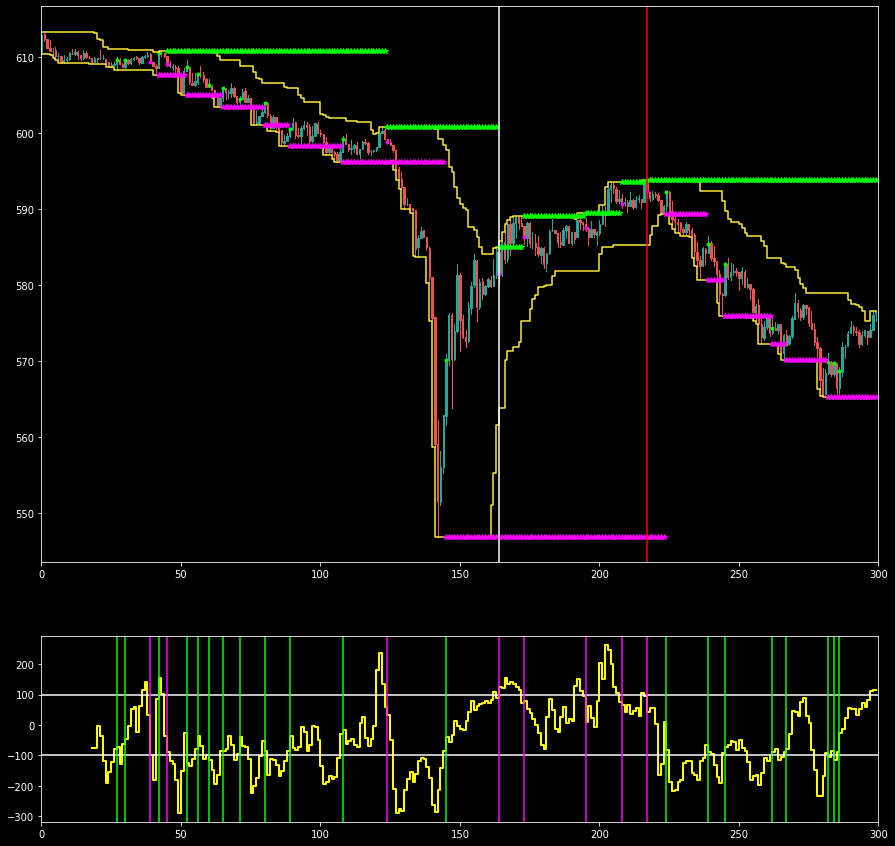

In [ ]:
plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(15, 15))
nrows, ncols = 2, 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols,
                        height_ratios=[3, 1]
                        )

ax = fig.add_subplot(gs[0])

# ------ candles ------ #
candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax, alpha=1.0, wickwidth=1.0)
# _ = [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]

len_df = len(t_df)   
len_df_range = np.arange(len_df).astype(int)

# ============ ============ ============ #
# ============ ============ ============ #

wave_high_fill_ = t_df['wave_high_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_low_fill_ = t_df['wave_low_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_high_terms_cnt_fill_ = t_df['wave_high_terms_cnt_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_low_terms_cnt_fill_ = t_df['wave_low_terms_cnt_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

wave_cu_idx_ = get_index_bybool(t_df['wave_cu_{}{}'.format(wave_itv1, wave_period1)].to_numpy(), len_df_range)
wave_co_idx_ = get_index_bybool(t_df['wave_co_{}{}'.format(wave_itv1, wave_period1)].to_numpy(), len_df_range)
# wave_cu_bool_idx_ = get_index_bybool(t_df['wave_cu_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy(), len_df_range)
# wave_co_bool_idx_ = get_index_bybool(t_df['wave_co_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy(), len_df_range)
wave_update_low_cu_bool_idx_ = get_index_bybool(t_df['wave_update_low_cu_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy(), len_df_range)
wave_update_high_co_bool_idx_ = get_index_bybool(t_df['wave_update_high_co_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy(), len_df_range)

wave_cu_prime_idx_ = t_df['wave_cu_prime_idx_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_co_prime_idx_ = t_df['wave_co_prime_idx_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_cu_prime_idx_fill_ = t_df['wave_cu_prime_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_co_prime_idx_fill_ = t_df['wave_co_prime_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

wave_cu_post_idx_ = t_df['wave_cu_post_idx_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_co_post_idx_ = t_df['wave_co_post_idx_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_cu_post_idx_fill_ = t_df['wave_cu_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_co_post_idx_fill_ = t_df['wave_co_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

wave_cu_marker_ = t_df['wave_cu_marker_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
wave_co_marker_ = t_df['wave_co_marker_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

# high_prime_idx = t_df['wave_high_prime_idx_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
# low_prime_idx = t_df['wave_low_prime_idx_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
# high_prime_idx_fill = t_df['wave_high_prime_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
# low_prime_idx_fill = t_df['wave_low_prime_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

# ============ plot_check ============ #
# dc_base_ = t_df['dc_base_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
# plt.step(len_df_range, dc_base_, alpha=1.0, color='cyan', linewidth=1)

plt.step(len_df_range, wave_cu_marker_, "o", alpha=1.0, color='#ff00ff', markersize=3)
plt.step(len_df_range, wave_co_marker_, "o", alpha=1.0, color='#00ff00', markersize=3)

plt.step(len_df_range, t_df['dc_upper_{}{}'.format(wave_itv1, wave_period1)], color='#ffeb3b')
plt.step(len_df_range, t_df['dc_lower_{}{}'.format(wave_itv1, wave_period1)], color='#ffeb3b')

# [plt.axvline(int(idx_), color="#ff0000") for idx_ in wave_cu_bool_idx_ if not np.isnan(idx_)]
# [plt.axvline(int(idx_), color="#0000ff") for idx_ in wave_co_bool_idx_ if not np.isnan(idx_)]
[plt.axvline(int(idx_), color="#ff0000") for idx_ in wave_update_low_cu_bool_idx_ if not np.isnan(idx_)]
[plt.axvline(int(idx_), color="#0000ff") for idx_ in wave_update_high_co_bool_idx_ if not np.isnan(idx_)]

# [plt.axvline(int(idx_), color="#ff00ff") for idx_ in wave_cu_idx_ if not np.isnan(idx_)]
# [plt.axvline(int(idx_), color="#00ff00") for idx_ in wave_co_idx_ if not np.isnan(idx_)]

# [plt.axvline(int(idx_), color="#00ff00") for idx_ in wave_high_prime_idx if not np.isnan(idx_)]
# [plt.axvline(int(idx_), color="#ff00ff") for idx_ in wave_low_prime_idx if not np.isnan(idx_)]

plt.step(len_df_range, wave_high_fill_, "*", alpha=1.0, color='#00ff00', markersize=6)
plt.step(len_df_range, wave_low_fill_, "*", alpha=1.0, color='#ff00ff', markersize=6)

# ------ data check in gs[0] ------ #
plt.axvline(wave_cu_post_idx_fill_[230], color='r')
plt.axvline(wave_cu_prime_idx_fill_[230])

plt.xlim(0, len_df)

plt.subplot(gs[1])

# --- cci --- #
cci_ = t_df['cci_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
plt.step(len_df_range, cci_, alpha=1.0, color='yellow', linewidth=2)
plt.axhline(100, color="#ffffff")
plt.axhline(-100, color="#ffffff")

# --- stoch --- #
# stoch_ = t_df['stoch_{}{}33'.format(wave_itv1, wave_period1)].to_numpy()
# plt.step(len_df_range, stoch_, alpha=1.0, color='yellow', linewidth=2)
# plt.axhline(67, color="#ffffff")
# plt.axhline(33, color="#ffffff")

[plt.axvline(int(idx_), color="#ff00ff") for idx_ in wave_cu_idx_ if not np.isnan(idx_)]
[plt.axvline(int(idx_), color="#00ff00") for idx_ in wave_co_idx_ if not np.isnan(idx_)]   # long 이라서 초록색임

# plt.step(len_df_range, wave_high_terms_cnt_fill_, alpha=1.0, color='yellow', linewidth=2)
# plt.step(len_df_range, wave_low_terms_cnt_fill_, alpha=1.0, color='yellow', linewidth=2)
# plt.step(len_df_range, wave_high_terms_cnt_fill_, "*", alpha=1.0, color='#00ff00', markersize=6)
# plt.step(len_df_range, wave_low_terms_cnt_fill_, "*", alpha=1.0, color='#ff00ff', markersize=6)


plt.xlim(0, len_df)  # for sync. with gs[0]

plt.show()

###### data_window

In [ ]:
# print(valid_high_prime_idx)  # = valid_co_prime_idx
# print(roll_prev_high_idx_arr)   # = roll_prev_co_idx_arr
print(valid_low_prime_idx)  # = valid_co_prime_idx
print(roll_prev_low_idx_arr)   # = roll_prev_co_idx_arr

[ 39  45 124 164]
[[ 39  45 124]
 [ 45 124 164]]


In [ ]:
idx = 239
# print(wave_cu_post_idx_fill_[idx])
# print(wave_co_prime_idx_fill_[idx - 1])
# print(wave_co_post_idx_fill_[idx - 1])
# print(wave_co_prime_idx_fill_[idx])
print(wave_co_post_idx_fill_[int(wave_cu_post_idx_fill_[idx])])
print(wave_co_idx_[idx])

# print(len(t_df))
# len(wave_co_prime_idx_fill_)

145.0
239.0


In [ ]:
wave_co_idx_[~np.isnan(wave_co_idx_)]

In [ ]:
roll_hl_cnt = 3
high_prime_idx = t_df['wave_high_prime_idx_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
low_prime_idx = t_df['wave_low_prime_idx_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

valid_high_prime_idx = high_prime_idx[~np.isnan(high_prime_idx)].astype(int)  # roll_high 를 위한 prime_idx
valid_low_prime_idx = low_prime_idx[~np.isnan(low_prime_idx)].astype(int)  # roll_low 를 위한 prime_idx

roll_high_idx_arr = np.array([valid_high_prime_idx[idx_ + 1 - roll_hl_cnt:idx_ + 1] for idx_ in range(len(valid_high_prime_idx)) if
                              idx_ + 1 >= roll_hl_cnt])  # cnt 수를 만족시키기 위해 idx 제한
roll_low_idx_arr = np.array(
    [valid_low_prime_idx[idx_ + 1 - roll_hl_cnt:idx_ + 1] for idx_ in range(len(valid_low_prime_idx)) if idx_ + 1 >= roll_hl_cnt])

In [ ]:
%timeit -n1 -r1 wave_range_v10(res_df[-100000:], period1, ltf_df=None) # 23.7 s per loop
%timeit -n1 -r1 wave_range_v11(res_df[-100000:], period1, ltf_df=None) # 574 ms per loop

##### legacy

In [ ]:
def get_next_fibo_gap(x):
  if 0 < x < 0.214:
    return -0.786
  elif 0.214 < x < 0.382:
    return -0.618
  elif 0.382 < x < 0.5:
    return -0.5
  elif 0.5 < x < 0.618:
    return -0.382
  elif 0.618 < x < 0.764:
    return -0.236
  elif 0.764 < x < 1:
    return 0
  else:
    return np.nan # 일단은, wrr_32 < 1 만 허용키로.


def get_next_fibo_gap2(x):
  if 0 < x < 0.214:
    return -0.618
  elif 0.214 < x < 0.382:
    return -0.5
  elif 0.382 < x < 0.5:
    return -0.382
  elif 0.5 < x < 0.618:
    return -0.236
  elif 0.618 < x < 0.764:
    return 0
  elif 0.764 < x < 1:
    return 0
  else:
    return np.nan # 일단은, wrr_32 < 1 만 허용키로.

##### dump

In [ ]:
roll_hl_cnt = 3
wave_itv = pd.infer_freq(t_df.index)
wave_period = config.tr_set.wave_period

len_df = len(t_df)

high_prime_idx = t_df['wave_high_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()   # cu_post_idx
low_prime_idx = t_df['wave_low_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()    

valid_high_prime_idx = high_prime_idx[~np.isnan(high_prime_idx)].astype(int)  # roll_high 를 위한 prime_idx
valid_low_prime_idx = low_prime_idx[~np.isnan(low_prime_idx)].astype(int)  # roll_low 를 위한 prime_idx

roll_high_idx_arr = np.array([valid_high_prime_idx[idx_ + 1 - roll_hl_cnt:idx_ + 1] for idx_ in range(len(valid_high_prime_idx)) if idx_ + 1 >= roll_hl_cnt])  # cnt 수를 만족시키기 위해 idx 제한
roll_low_idx_arr = np.array([valid_low_prime_idx[idx_ + 1 - roll_hl_cnt:idx_ + 1] for idx_ in range(len(valid_low_prime_idx)) if idx_ + 1 >= roll_hl_cnt])


In [ ]:
t_df = cci_v2(t_df, wave_period)

cci_ = t_df['cci_{}{}'.format(itv, wave_period)].to_numpy()
b1_cci_ = t_df['cci_{}{}'.format(itv, wave_period)].shift(1).to_numpy()

band_width = 100
upper_band = band_width
lower_band = -band_width

len_df = len(t_df)
len_df_range = np.arange(len_df).astype(int)

data_cols = ['open', 'high', 'low', 'close']
open, high, low, close = [t_df[col_].to_numpy() for col_ in data_cols]
# b1_close = t_df.close.shift(itv_num).to_numpy()

# ============ modules ============ #
# ------ define co, cu ------ # <- point missing 과 관련해 정교해아함
cu_bool = (b1_cci_ > upper_band) & (upper_band > cci_)
co_bool = (b1_cci_ < lower_band) & (lower_band < cci_)

cu_idx = get_index_bybool(cu_bool, len_df_range)
co_idx = get_index_bybool(co_bool, len_df_range)

cu_fill_idx, co_fill_idx, cu_prime_idx, co_prime_idx, cu_prime_fill_idx, co_prime_fill_idx, valid_cu_bool, valid_co_bool = get_terms_info_v4(
    cu_idx, co_idx, len_df, len_df_range)

# ------ get post_terms ------ #
high_post_terms = np.vstack((co_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
low_post_terms = np.vstack((cu_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)

high_post_terms_cnt = high_post_terms[:, 1] - high_post_terms[:, 0]
low_post_terms_cnt = low_post_terms[:, 1] - low_post_terms[:, 0]

paired_post_cu_idx = high_post_terms[:, 1]
paired_post_co_idx = low_post_terms[:, 1]

# ------ get prime_terms ------ # # 기본은 아래 logic 으로 수행하고, update_hl 도 해당 term 구간의 hl 이 더 작거나 클경우 적용 가능할 것
# high_prime_terms = np.vstack((co_prime_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
# low_prime_terms = np.vstack((cu_prime_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)

# high_prime_terms_cnt = high_prime_terms[:, 1] - high_prime_terms[:, 0]
# low_prime_terms_cnt = low_prime_terms[:, 1] - low_prime_terms[:, 0]

# paired_prime_cu_idx = high_prime_terms[:, 1]
# paired_prime_co_idx = low_prime_terms[:, 1]

# ====== get wave_hl & terms ====== #
wave_high_ = np.full(len_df, np.nan)
wave_low_ = np.full(len_df, np.nan)

wave_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_post_terms])
wave_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_post_terms])

wave_high_[paired_post_cu_idx] = wave_highs
wave_low_[paired_post_co_idx] = wave_lows

wave_high_fill_ = fill_arr(wave_high_)
wave_low_fill_ = fill_arr(wave_low_)

# ------ Todo, update_hl 에 대해서, post_terms_hl 적용 ------ #
wave_high_terms_low_ = np.full(len_df, np.nan)
wave_low_terms_high_ = np.full(len_df, np.nan)

wave_high_terms_lows = np.array([low[iin:iout + 1].min() for iin, iout in high_post_terms])  # for point rejection, Todo, min_max 설정 항상 주의
wave_low_terms_highs = np.array([high[iin:iout + 1].max() for iin, iout in low_post_terms])

wave_high_terms_low_[paired_post_cu_idx] = wave_high_terms_lows
wave_low_terms_high_[paired_post_co_idx] = wave_low_terms_highs

update_low_cu_bool = wave_high_terms_low_ < wave_low_fill_
update_high_co_bool = wave_low_terms_high_ > wave_high_fill_

# ------ term cnt ------ #
wave_high_terms_cnt_ = np.full(len_df, np.nan)
wave_low_terms_cnt_ = np.full(len_df, np.nan)

wave_high_terms_cnt_[paired_post_cu_idx] = high_post_terms_cnt
wave_low_terms_cnt_[paired_post_co_idx] = low_post_terms_cnt

wave_high_terms_cnt_fill_ = fill_arr(wave_high_terms_cnt_)
wave_low_terms_cnt_fill_ = fill_arr(wave_low_terms_cnt_)

# ------ hl_fill 의 prime_idx 를 찾아야함 ------ #
# b1_wave_high_fill_ = pd.Series(wave_high_fill_).shift(1).to_numpy()
# b1_wave_low_fill_ = pd.Series(wave_low_fill_).shift(1).to_numpy()
# wave_high_prime_idx = np.where((wave_high_fill_ != b1_wave_high_fill_) & ~np.isnan(wave_high_fill_), len_df_range, np.nan)
# wave_low_prime_idx = np.where((wave_low_fill_ != b1_wave_low_fill_) & ~np.isnan(wave_low_fill_), len_df_range, np.nan)
#
# high_prime_idx_fill_ = fill_arr(wave_high_prime_idx)
# low_prime_idx_fill_ = fill_arr(wave_low_prime_idx)

# ============ enlist to df_cols ============ #
t_df['wave_high_fill_{}{}'.format(itv, wave_period)] = wave_high_fill_
t_df['wave_low_fill_{}{}'.format(itv, wave_period)] = wave_low_fill_
t_df['wave_high_terms_cnt_fill_{}{}'.format(itv, wave_period)] = wave_high_terms_cnt_fill_
t_df['wave_low_terms_cnt_fill_{}{}'.format(itv, wave_period)] = wave_low_terms_cnt_fill_

# ------ for roll prev_hl ------ #
# high_post_idx 를 위해 co_prime_idx 입력
t_df['wave_high_prime_idx_{}{}'.format(itv, wave_period)] = co_prime_idx # co_prime_idx wave_high_prime_idx  # high 갱신을 고려해, prev_hl 는 prime_idx 기준으로 진행
t_df['wave_low_prime_idx_{}{}'.format(itv, wave_period)] = cu_prime_idx # cu_prime_idx wave_low_prime_idx  # cu_prime_idx's low 를 사용하겠다라는 의미, 즉 roll_prev 임

# ------ for first_high ------ #
t_df['wave_high_prime_idx_fill_{}{}'.format(itv, wave_period)] = co_prime_fill_idx # co_prime_fill_idx high_prime_idx_fill_
t_df['wave_low_prime_idx_fill_{}{}'.format(itv, wave_period)] = cu_prime_fill_idx # cu_prime_fill_idx low_prime_idx_fill_

# ------ for plot_checking ------ #
t_df['wave_cu_bool_{}{}'.format(itv, wave_period)] = cu_bool  # temporary, for plot_check
t_df['wave_co_bool_{}{}'.format(itv, wave_period)] = co_bool
t_df['wave_cu_{}{}'.format(itv, wave_period)] = cu_bool * ~update_low_cu_bool
t_df['wave_co_{}{}'.format(itv, wave_period)] = co_bool * ~update_high_co_bool
t_df['wave_cu_marker_{}{}'.format(itv, wave_period)] = get_line(cu_idx, close)
t_df['wave_co_marker_{}{}'.format(itv, wave_period)] = get_line(co_idx, close)
# t_df['update_low_cu_bool_{}{}'.format(itv, wave_period)] = update_low_cu_bool
# t_df['update_high_co_bool_{}{}'.format(itv, wave_period)] = update_high_co_bool

if itv != 'T':
    join_cols = np.arange(-15, 0, 1).astype(int)  # wave vars. + wave_unit's col
    res_df.drop(t_df.columns[join_cols], inplace=True, axis=1, errors='ignore')
    try:
        res_df = res_df.join(to_lower_tf_v3(res_df, t_df, join_cols, backing_i=0), how='inner')
    except Exception as e:
        print("error in wave_range()'s join() :", e)

    return res_df

else:
    return t_df

In [ ]:


def get_roll_wave_data_v2(valid_prime_idx, roll_idx_arr, len_df, data, roll_prev_hl_cnt):

    roll_data = pd.DataFrame(np.full((len_df, roll_prev_hl_cnt), np.nan))
    roll_data.iloc[valid_prime_idx[roll_prev_hl_cnt:], :] = data[roll_idx_arr]  # 제한된 idx 를 제외한 row 에 roll_hl 입력

    return roll_data.ffill().to_numpy()

def roll_wave_hl_v5(t_df, config, roll_prev_hl_cnt=3):
  
    wave_itv = pd.infer_freq(t_df.index)
    wave_period = config.tr_set.wave_period

    len_df = len(t_df)

    high_prime_idx = t_df['wave_high_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()
    low_prime_idx = t_df['wave_low_prime_idx_{}{}'.format(wave_itv, wave_period)].to_numpy()    

    valid_high_prime_idx = high_prime_idx[~np.isnan(high_prime_idx)].astype(int)  # roll_high 를 위한 prime_idx
    valid_low_prime_idx = low_prime_idx[~np.isnan(low_prime_idx)].astype(int)  # roll_low 를 위한 prime_idx

    roll_prev_high_idx_arr = np.array([valid_high_prime_idx[idx_ - roll_prev_hl_cnt:idx_] for idx_ in range(len(valid_high_prime_idx)) if idx_ >= roll_prev_hl_cnt])  # cnt 수를 만족시키기 위해 idx 제한
    roll_prev_low_idx_arr = np.array([valid_low_prime_idx[idx_ - roll_prev_hl_cnt:idx_] for idx_ in range(len(valid_low_prime_idx)) if idx_ >= roll_prev_hl_cnt])

    return valid_high_prime_idx, valid_low_prime_idx, roll_prev_high_idx_arr, roll_prev_low_idx_arr

In [ ]:
t_df[roll_cols].tail(100)

In [ ]:
data_col = 'wave_high_fill_{}{}'.format(wave_itv1, wave_period1)
data = htf_df[data_col].to_numpy()
len_htf_df = len(htf_df)


roll_data = pd.DataFrame(index=htf_df.index, data=np.full((len_htf_df, roll_hl_cnt), np.nan))
roll_data.iloc[valid_high_prime_idx[roll_hl_cnt - 1:], :] = data[roll_prev_high_idx_arr]  # 제한된 idx 를 제외한 row 에 roll_hl 입력

# roll_data.ffill()
htf_df[roll_cols] = roll_data.ffill()
htf_df[roll_cols]

# htf_df[roll_cols] = np.nan
# htf_df[roll_cols].iloc[valid_high_prime_idx[roll_hl_cnt - 1:]] = data[roll_prev_high_idx_arr]  # 제한된 idx 를 제외한 row 에 roll_hl 입력

# htf_df[roll_cols] = htf_df[roll_cols].ffill().to_numpy()

# valid_high_prime_idx
# np.sum(~np.isnan(roll_high))
# htf_df[roll_cols]
# roll_prev_low_idx_arr

In [ ]:
# t_df
to_lower_tf_v2(res_df, t_df, join_cols)

In [ ]:
wave_post_highs = np.array([high[iin:iout + 1].max() for iin, iout in high_post_terms])
wave_post_lows = np.array([low[iin:iout + 1].min() for iin, iout in low_post_terms])

# print(len(paired_cu_idx))
# print(len(wave_post_highs))
# print(len(cu_bool))

update_paired_cu_bool = (cu_bool * (wave_high_terms_low_ < wave_low_fill_))[paired_cu_idx]
update_paired_cu_idx = paired_cu_idx[update_paired_cu_bool]
wave_high_[update_paired_cu_idx] = wave_post_highs[update_paired_cu_bool]

update_paired_co_bool = (co_bool * (wave_low_terms_high_ > wave_high_fill_))[paired_co_idx]
update_paired_co_idx = paired_co_idx[update_paired_co_bool]
wave_low_[update_paired_co_idx] = wave_post_lows[update_paired_co_bool]

wave_high_fill2_ = fill_arr(wave_high_)
wave_low_fill2_ = fill_arr(wave_low_)

In [ ]:
# wave_post_highs
# update_cu_bool = (cu_bool * (wave_high_terms_low_ < wave_low_fill_))[paired_cu_idx]
# print(paired_cu_idx[update_cu_bool])
# print(paired_cu_idx)
print(len(update_paired_cu_idx))
print(len(wave_post_highs[update_paired_cu_bool]))
# print(high_prime_terms[:, 1])
# print(high_post_terms[:, 1])

11
11


In [ ]:
cu_idx = get_index_bybool(cu_bool, len_df_range)
co_idx = get_index_bybool(co_bool, len_df_range)

cu_fill_idx = fill_arr(cu_idx)
co_fill_idx = fill_arr(co_idx)

notnan_cu_bool = ~np.isnan(cu_idx)
notnan_co_bool = ~np.isnan(co_idx)

# ------ 생략된 idx 에 대한 prime_idx 탐색 ------ #
high_bool = cu_fill_idx < co_fill_idx  # 이렇게 해야 high_terms[:, 1] 이 cu_idx 가 나옴
low_bool = co_fill_idx < cu_fill_idx

high_terms_vec = get_index_bybool(high_bool, len_df_range)
low_terms_vec = get_index_bybool(low_bool, len_df_range) # -> low_terms

high_terms_list = using_clump(high_terms_vec)
low_terms_list = using_clump(low_terms_vec)

valid_cu_prime_idx = np.array([terms.min() for terms in low_terms_list])
valid_co_prime_idx = np.array([terms.min() for terms in high_terms_list])

cu_prime_idx = np.full(len_df, np.nan)
co_prime_idx = np.full(len_df, np.nan)

cu_prime_idx[valid_cu_prime_idx] = valid_cu_prime_idx
co_prime_idx[valid_co_prime_idx] = valid_co_prime_idx

cu_prime_fill_idx = fill_arr(cu_prime_idx)
co_prime_fill_idx = fill_arr(co_prime_idx)

# ------ get co, cu terms_v2 ------ # # 기본은 아래 logic 으로 수행하고, update_hl 도 해당 term 구간의 hl 이 더 작거나 클경우 적용 가능할 것
valid_cu_bool = notnan_cu_bool * ~np.isnan(co_fill_idx) * ~np.isnan(co_prime_fill_idx)
valid_co_bool = notnan_co_bool * ~np.isnan(cu_fill_idx) * ~np.isnan(cu_prime_fill_idx)

high_post_terms = np.vstack((co_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
low_post_terms = np.vstack((cu_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)

high_terms_cnt = high_post_terms[:, 1] - high_post_terms[:, 0] 
low_terms_cnt = low_post_terms[:, 1] - low_post_terms[:, 0] 

high_prime_terms = np.vstack((co_prime_fill_idx[valid_cu_bool], cu_idx[valid_cu_bool])).T.astype(int)
low_prime_terms = np.vstack((cu_prime_fill_idx[valid_co_bool], co_idx[valid_co_bool])).T.astype(int)

In [ ]:
# co_prime_idx
# co_prime_fill_idx
high_prime_terms

In [ ]:
#  get_index_bybool(notnan_cu_bool, len_df_range)
valid_cu_idx = cu_idx[notnan_cu_bool]
valid_shift_cu_idx = pd.Series(valid_cu_idx).shift(1).to_numpy()
valid_co_idx = co_idx[notnan_co_bool]
valid_shift_co_idx = pd.Series(valid_co_idx).shift(1).to_numpy()

valid_cu_idx - valid_shift_cu_idx
valid_co_idx - valid_shift_co_idx

array([nan,  2.,  7.,  2.,  4.,  2.,  7.,  5.,  4.,  6.,  9.,  2.,  5., 11., 14.])

#### legacy

##### volume_profile

In [ ]:
session_df = res_df_.iloc[-1440:] # 0.159 -> 0.024 (14400 -> 1440)
volume = session_df['volume'].to_numpy()
close = session_df['close'].to_numpy()
# px.histogram(session_df, x='volume', y='close', nbins=150, orientation='h').show()

In [ ]:
kde_factor = 0.05
num_samples = 100

start_0 = time.time()
kde = stats.gaussian_kde(close,weights=volume,bw_method=kde_factor)
kdx = np.linspace(close.min(),close.max(),num_samples)
kdy = kde(kdx)
ticks_per_sample = (kdx.max() - kdx.min()) / num_samples
print("ticks_per_sample :", ticks_per_sample)  # sample 당 가격
print("kdy elapsed_time :", time.time() - start_0)

In [ ]:
peaks,_ = signal.find_peaks(kdy)
pkx = kdx[peaks]
pky = kdy[peaks]

plt.figure(figsize=(10,5))
# plt.hist(close, bins=num_samples, weights=volume, alpha=.8, color='#1592e6')
# plt.plot(kdx, kdy, color='white')
# plt.plot(pkx, pky, 'bo', color='yellow')
plt.plot(kdy, kdx, color='white')
plt.plot(pky, pkx, 'bo', color='yellow')
plt.show()

In [ ]:
pkx

In [ ]:
# ------ vp 의 indi. 화가 필요함 -> point 설정 ------ #
# 1. 4 level 은 미리 만들어놓는게 맞는걸로 보임 -> 추종하는 function 이 많음 (utils_tr, ep_out ...)
#   a. 4 level 에 국한하는게 아니라, 모든 peaks 에 대해 levels 설정
#   b. 각 session 별로 peak_list 가 주어질 것
#     i. prev_data 사용해야하는점 주의 (session vp 는 future_data)

###### prominence_info

In [ ]:
start_0 = time.time()
min_prom = kdy.max() * 0.0
pipsize = 0.01
max_width_pips = 20
# width_range=(1, max_width_pips * pipsize / ticks_per_sample)
width_range= max_width_pips * pipsize / ticks_per_sample
peaks, peak_props = signal.find_peaks(kdy, prominence=min_prom, width=width_range)

peak_x = kdx[peaks]
peak_y = kdy[peaks]
# ------ prominence lines ------ #
left_base = peak_props['left_bases']
right_base = peak_props['right_bases']
line_x = peak_x
line_y0 = peak_y
line_y1 = peak_y # - peak_props['prominences']
print("prom_line elapsed_time :", time.time() - start_0)


for x, y0, y1 in zip(line_x, line_y0, line_y1):
    fig.add_shape(type='line',
        xref='x', yref='y',
        # x0=x, y0=y0, x1=x, y1=y1,
        x0=x, y0=0, x1=x, y1=y1,
        line=dict(
            color='red',
            width=2,
        )
    )

# ------ width ------ #
left_ips = peak_props['left_ips']
right_ips = peak_props['right_ips']
# width_x0 = kdx.min() + (left_ips * ticks_per_sample)
# width_x1 = kdx.min() + (right_ips * ticks_per_sample)
width_x0 = kdx.min() + (left_base * ticks_per_sample)
width_x1 = kdx.min() + (right_base * ticks_per_sample)

# int_from = kdx.min() + (left_base * ticks_per_sample)
# int_to = kdx.min() + (right_base * ticks_per_sample)
# [kde.integrate_box_1d(x0, x1) for x0, x1 in zip(int_from, int_to)]

width_y = peak_props['width_heights']

for x0, x1, y in zip(width_x0, width_x1, width_y):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x0, y0=y, x1=x1, y1=y,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

In [ ]:
# peaks  # ndarray
# kdx  # ndarray
# kdy  # ndarray
# kdx.min()
left_base * ticks_per_sample
# volume

In [ ]:
print(peak_y)
print(peak_props['prominences'])
peak_props

##### imb.

In [ ]:
t_df = res_df_.iloc[-120:-100]
a_data = t_df.to_numpy()

In [ ]:
plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(15, 9))
nrows, ncols = 1, 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols
                        # height_ratios=[3, 1]
                        )

ax = fig.add_subplot(gs[0])

# ------ candles ------ #
candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax, alpha=1.0, wickwidth=1.0)
_ = [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]

In [ ]:
def imb_ratio_v4(df, itv):

  itv_num = to_itvnum(itv)

  close = df['close_{}'.format(itv)].to_numpy()
  open = df['open_{}'.format(itv)].to_numpy()

  b1_close = df['close_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_open = df['open_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_high = df['high_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_low = df['low_{}'.format(itv)].shift(itv_num).to_numpy()

  body_range = abs(close - open)
  b1_body_range = abs(b1_close - b1_open)

  df['body_rel_ratio_{}'.format(itv)] = body_range / b1_body_range

  short_body_range = np.where(close <= b1_low, body_range, b1_body_range)
  long_body_range = np.where(close >= b1_high, body_range, b1_body_range)

  # 추후에 통계 측정해야함 -> bir 에 따른 개별 trader 의 epout / tpep 이라던가 => short 에 양봉은 취급안함 (why use np.nan)
  df['short_ir_{}'.format(itv)] = np.where(close < open, (b1_low - close) / short_body_range, np.nan) # close < open & close < b1_low
  df['long_ir_{}'.format(itv)] = np.where(close > open, (close - b1_high) / long_body_range, np.nan) # close > open & close > b1_high

  return

In [ ]:
def imb_ratio_v3(df, itv):

  itv_num = to_itvnum(itv)

  # high = df['high_{}'.format(itv)].to_numpy()
  # low = df['low_{}'.format(itv)].to_numpy()
  # candle_range = high - low

  close = df['close_{}'.format(itv)].to_numpy()
  open = df['open_{}'.format(itv)].to_numpy()

  b1_close = df['close_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_open = df['open_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_high = df['high_{}'.format(itv)].shift(itv_num).to_numpy()
  b1_low = df['low_{}'.format(itv)].shift(itv_num).to_numpy()

  body_range = abs(close - open)
  b1_body_range = abs(b1_close - b1_open)

  df['body_rel_ratio_{}'.format(itv)] = body_range / b1_body_range

  short_body_ratio = np.where(close <= b1_low, body_range, b1_body_range)
  long_body_range = np.where(close >= b1_high, body_range, b1_body_range)

  # 추후에 통계 측정해야함 -> bir 에 따른 개별 trader 의 epout / tpep 이라던가 => short 에 양봉은 취급안함 (why use np.nan)
  df['short_ir_{}'.format(itv)] = np.where(close < open, (b1_low - close) / body_range, np.nan) # close < open & close < b1_low
  df['long_ir_{}'.format(itv)] = np.where(close > open, (close - b1_high) / body_range, np.nan) # close > open & close > b1_high

  return

In [ ]:
imb_ratio(t_df, "5T")
# imb_ratio_v3(t_df, "5T")
# imb_ratio_v4(t_df, "5T")

t_df.tail(100).short_ir_5T  # .461871
# t_df.iloc[:, -10:]
# t_df.dtypes

In [ ]:
# imb_ratio(t_df, "5T")
# imb_ratio_v3(t_df, "5T")
imb_ratio_v4(t_df, "5T")

t_df.tail(100).short_ir_5T  # .461871
# t_df.iloc[:, -10:]
# t_df.dtypes

In [ ]:
# ------ rtc 1, 0 개념 ------ #
# short_rtc_1 = close
# short_rtc_0 = b1_low

# long_rtc_1 = close
# long_rtc_0 = b1_high

# rtc 로 활용하려면, col 로 추가해야할 것 -> 추가할만한 col_name 은 아님
# 1. h_candle 인 경우 -> ?
#   a. h_candle_v3 먹이고, open_{}.shift(num_itv).to_numpy() 진행 -> ex. res_df['close_{}'.format(hc_itv)].shift(itv_num).to_numpy() 

In [ ]:
# 1. 현재 종가 - 이전 고가 = imb_range (long)
long_imb_range = t_df.close - t_df.high.shift(1)
# 2. 이전 저가 - 현재 종가 - imb_range (short)
short_imb_range = t_df.low.shift(1) - t_df.close

In [ ]:
from math import floor


def _calc_dev(base_price, price):
    return 100 * (price - base_price) / base_price


def zigzag(highs, lows, depth=10, dev_threshold=5):
    def pivots(src_raw, length, isHigh):
        src = list(reversed(src_raw))
        bar_index = list(range(len(src)))
        for start in range(0, len(src)):
            if start + 2 * length + 1 > len(src) - 1:
                return
            p = 0
            if length < len(src) - start:
                p = src[start + length]
            if length == 0:
                yield 0, p
            else:
                isFound = True
                for i in range(start, start + length):
                    if isHigh and src[i] > p:
                        isFound = False
                    if not isHigh and src[i] < p:
                        isFound = False
                for i in range(start + length + 1, start + 2 * length + 1):
                    if isHigh and src[i] >= p:
                        isFound = False
                    c = not isHigh and src[i] <= p
                    if c:
                        isFound = False
                if isFound:
                    yield (bar_index[start + length], p)
                else:
                    yield None, None

    data_highs = [x for x in pivots(highs, floor(depth / 2), True) if x[0]]
    data_lows = [x for x in pivots(lows, floor(depth / 2), False) if x[0]]

    raw_pairs = []

    for i, (ind, p) in enumerate(data_highs):
        lows_d = sorted([(ind_l, p_l) for ind_l, p_l in data_lows if ind > ind_l], key=lambda x: x[0])
        if lows_d:
            lows = lows_d[-1]

            if abs(_calc_dev(lows[1], p)) >= dev_threshold:
                raw_pairs.append(
                    ((ind, p),
                     (lows[0], lows[1]))
                )

    result = []

    for (i_h, p_h),(i_l, p_l) in raw_pairs:
        if not result:
            result.append(((i_h, p_h),(i_l, p_l)))
            continue

        if i_l == result[-1][1][0]:
            if p_h > result[-1][0][1]:
                result = result[:-1]
            else:
                continue

        result.append(((i_h, p_h),(i_l, p_l)))

    return result

# highs, lows = t_df.high.to_numpy(), t_df.low.to_numpy()
# zigzag(highs, lows, depth=5, dev_threshold=5)

In [ ]:
t_df = res_df_.iloc[-120:]
a_data = t_df.to_numpy()

In [ ]:
# import plotly.express as px
# import plotly.graph_objects as go

def get_dist_plot(c, v, kx, ky):
    fig = go.Figure()
    fig.add_trace(go.Histogram(name='Vol Profile', x=c, y=v, nbinsx=150, 
                               histfunc='sum', histnorm='probability density',
                               marker_color='#B0C4DE'))
    fig.add_trace(go.Scatter(name='KDE', x=kx, y=ky, mode='lines', marker_color='#D2691E'))    

    peaks,_ = signal.find_peaks(kdy)
    pkx = kdx[peaks]
    pky = kdy[peaks]
    pk_marker_args=dict(size=10, color='black')
    fig.add_trace(go.Scatter(name="Peaks", x=pkx, y=pky, mode='markers', marker=pk_marker_args))
    fig.show()

    return fig

##### instant.

In [ ]:
def wave_range_ratio(res_df, config, bb_itv, bb_period):

  wave_itv = pd.infer_freq(res_df.index)
  wave_period = config.tr_set.wave_period

  bb_upper_ = res_df['bb_upper_{}{}'.format(bb_itv, bb_period)].to_numpy()
  bb_lower_ = res_df['bb_lower_{}{}'.format(bb_itv, bb_period)].to_numpy()
  
  cu_prime_idx_fill_ = res_df['wave_cu_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
  co_prime_idx_fill_ = res_df['wave_co_prime_idx_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()

  cu_bb_range = get_line(co_prime_idx_fill_, bb_upper_) - get_line(co_prime_idx_fill_, bb_lower_)  # cu 에서 co_prime 의 bb_range 사용
  co_bb_range = get_line(cu_prime_idx_fill_, bb_upper_) - get_line(cu_prime_idx_fill_, bb_lower_)

  wave_range = res_df['wave_high_fill_{}{}'.format(wave_itv, wave_period)].to_numpy() - res_df['wave_low_fill_{}{}'.format(wave_itv, wave_period)].to_numpy()
  
  res_df['cu_wrr_{}{}'.format(wave_itv, wave_period)] = wave_range / cu_bb_range   # for cu (currently, long)
  res_df['co_wrr_{}{}'.format(wave_itv, wave_period)] = wave_range / co_bb_range

  return res_df

In [ ]:
# Todo, future_data
def enough_space(res_df, itv, period):

  dc_upper_ = res_df['dc_upper_{}{}'.format(itv, period)].to_numpy()
  dc_base_ = res_df['dc_base_{}{}'.format(itv, period)].to_numpy()
  dc_lower_ = res_df['dc_lower_{}{}'.format(itv, period)].to_numpy()  
  high_ = res_df['high_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
  low_ = res_df['low_{}'.format(config.loc_set.point.tf_entry)].to_numpy()

  half_dc_gap = dc_upper_ - dc_base_

  res_df['cu_es_{}{}'.format(itv, period)] = (low_ - dc_lower_) / half_dc_gap
  res_df['co_es_{}{}'.format(itv, period)] = (dc_upper_ - high_) / half_dc_gap

  return res_df

In [ ]:
# Todo, future_data
def candle_range_ratio(res_df, c_itv, bb_itv, bb_period):

  itv_num = to_itvnum(c_itv)

  b1_bb_upper_ = res_df['bb_upper_{}{}'.format(bb_itv, bb_period)].shift(itv_num).to_numpy()
  b1_bb_lower_ = res_df['bb_lower_{}{}'.format(bb_itv, bb_period)].shift(itv_num).to_numpy()
  bb_range = b1_bb_upper_ - b1_bb_lower_   # <-- h_candle's open_idx 의 bb_gap 사용

  high_ = res_df['high_{}'.format(c_itv)].to_numpy()
  low_ = res_df['low_{}'.format(c_itv)].to_numpy()
  candle_range = high_ - low_  # 부호로 양 / 음봉 구분 (양봉 > 0)
  
  res_df['crr_{}'.format(c_itv)] = candle_range / bb_range

  return res_df

In [ ]:
def body_rel_ratio(res_df, c_itv):

  itv_num = to_itvnum(c_itv)
  
  b1_close_ = res_df['close_{}'.format(c_itv)].shift(itv_num).to_numpy()
  b1_open_ = res_df['open_{}'.format(c_itv)].shift(itv_num).to_numpy()
  b1_body_range = abs(b1_close_ - b1_open_)

  close_ = res_df['close_{}'.format(c_itv)].to_numpy()
  open_ = res_df['open_{}'.format(c_itv)].to_numpy()
  body_range = abs(close_ - open_)
  
  res_df['body_rel_ratio_{}'.format(c_itv)] = body_range / b1_body_range

  return res_df

def dc_over_body_ratio(res_df, c_itv, dc_itv, dc_period):
  close_ = res_df['close_{}'.format(c_itv)].to_numpy()
  open_ = res_df['open_{}'.format(c_itv)].to_numpy()
  body_range = abs(close_ - open_)
  
  dc_upper_ = res_df['dc_upper_{}{}'.format(dc_itv, dc_period)].to_numpy()
  dc_lower_ = res_df['dc_lower_{}{}'.format(dc_itv, dc_period)].to_numpy() 

  res_df['dc_upper_{}{}_br'.format(dc_itv, dc_period)] = (close_ - dc_upper_) / body_range
  res_df['dc_lower_{}{}_br'.format(dc_itv, dc_period)] = (dc_lower_ - close_) / body_range

  return res_df

In [ ]:
def candle_pumping_ratio_v2(res_df, c_itv, dc_itv, period):

  res_df = dc_line_v3(res_df, dc_itv, dc_period=period)

  dc_upper_ = res_df['dc_upper_{}{}'.format(dc_itv, period)].to_numpy()
  dc_lower_ = res_df['dc_lower_{}{}'.format(dc_itv, period)].to_numpy()
  dc_range = dc_upper_ - dc_lower_
 
  open_ = res_df['open_{}'.format(c_itv)].to_numpy()
  close_ = res_df['close_{}'.format(c_itv)].to_numpy()
  body = close_ - open_  # 부호로 양 / 음봉 구분 (양봉 > 0)
  
  res_df['cppr_{}'.format(c_itv)] = body / dc_range

  return res_df


# Todo, future_data
def candle_pumping_ratio(res_df, c_itv, bb_itv, period):

  itv_num = to_itvnum(c_itv)

  # 여기에도 v2 처럼 bb_indi. 추가 (자동화)

  b1_bb_upper_ = res_df['bb_upper_{}{}'.format(bb_itv, period)].shift(itv_num).to_numpy()
  b1_bb_lower_ = res_df['bb_lower_{}{}'.format(bb_itv, period)].shift(itv_num).to_numpy()
  bb_range = b1_bb_upper_ - b1_bb_lower_

  open_ = res_df['open_{}'.format(c_itv)].to_numpy()
  close_ = res_df['close_{}'.format(c_itv)].to_numpy()
  body = close_ - open_  # 부호로 양 / 음봉 구분 (양봉 > 0)
  
  res_df['cppr_{}'.format(c_itv)] = body / bb_range

  return res_df


def pumping_ratio(res_df, config, itv, period1, period2):

  bb_lower_5T = res_df['bb_lower_5T'].to_numpy()
  bb_upper_5T = res_df['bb_upper_5T'].to_numpy()
  bb_range = bb_upper_5T - bb_lower_5T

  selection_id = config.selection_id
  
  res_df['short_ppr_{}'.format(selection_id)] = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() / get_line(res_df['short_wave_high_idx_{}{}{}'.format(itv, period1, period2)].to_numpy(), bb_range)
  res_df['long_ppr_{}'.format(selection_id)] = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() / get_line(res_df['long_wave_low_idx_{}{}{}'.format(itv, period1, period2)].to_numpy(), bb_range)


In [ ]:
def wave_body_ratio(res_df_, itv, period):
  dc_upper_ = res_df_['dc_upper_{}{}'.format(itv, period)].to_numpy()
  dc_lower_ = res_df_['dc_lower_{}{}'.format(itv, period)].to_numpy()
  close_ = res_df_['close_{}'.format(itv)].to_numpy()
  open_ = res_df_['open_{}'.format(itv)].to_numpy()

  dc_range = dc_upper_ - dc_lower_
  body_range = abs(close_ - open_)

  res_df_['wave_body_ratio'] = body_range / dc_range
  res_df_['dc_upper_body_ratio'] = (np.maximum(close_, open_) - dc_upper_) / body_range
  res_df_['dc_lower_body_ratio'] = (dc_lower_) - np.minimum(close_, open_) / body_range

  return

In [ ]:
# res_df_['wave_body_ratio'].tail(200)

itv = 'H'
period = 5
wave_body_ratio(res_df_, itv, period)

##### dump

### calc recursive indi's min_period

In [ ]:
ticker_prcn = get_precision_by_price(res_df.close.iloc[-1]) + 2

target_len = 300000
slice_len_list = list(range(50, 10000, 100))
slice_len_list.insert(0, target_len)

start_0 = time.time()
# prev_int_, prev_pnts_ = None, None
offset = 1

for sl_idx, sample_len in enumerate(slice_len_list):

  sample_df = res_df.iloc[-sample_len -offset:-offset]
  sample_len2 = sample_len

  # --------- input using indi.s --------- #
  # res = ema_v0(sample_df['close'], 190)
  res = rsi(sample_df, 14)

    #    to_htf()    #
  # df_5T = to_htf(sample_df, itv_='5T', offset='1h')
  # sample_len2 = len(df_5T)

  # # --------- input using htf_indi. --------- #
  # res = ema(df_5T['close'], 195)
  # -------------------------------------- #

  res_last_row = res.iloc[-1]
  if pd.isnull(res_last_row):
    continue

  # print(res_last_row)
  # break

  # sample_df = sample_df.join(to_lower_tf_v2(sample_df, df_5T, [-1]), how='inner')


  #   자리수 분할 계산    #
  int_, points_ = str(res_last_row).split('.')
  pnts_ = points_[:ticker_prcn]

  if sl_idx == 0:
    target_int_ = int_
    target_pnts_ = pnts_
    print("target {} ({}) -> {} {}".format(sample_len, sample_len2, int_, points_))

  else:
    if target_int_ == int_ and target_pnts_ == pnts_:
      # print(sample_len, "({})".format(sample_len2), '->', int_, pnts_, end='\n\n')
      print("{} ({}) -> {} {}\n".format(sample_len, sample_len2, int_, points_))
      break

print(time.time() - start_0)  # (1301)(1361)(1301)

## import utils & config

In [154]:
frame_ver = "0114_htf"
ID_arr = np.array(['v3', 'v5_2'])

utils_public_name = "{}.utils.{}_utils_public".format(strat_pkg, frame_ver)
utils_public_lib = importlib.import_module(utils_public_name)
utils_public = utils_public_lib   # temporary

u_name_list = ["{}.utils.{}_utils_{}".format(strat_pkg, frame_ver, id_) for id_ in ID_arr]
utils_arr = np.array([importlib.import_module(u_name) for u_name in u_name_list])

config_name_list = ["{}_config_{}.json".format(frame_ver, id_) for id_ in ID_arr]
cfg_path_list = [os.path.join(current_path, strat_pkg, "config", name_) for name_ in config_name_list]
cfg_file_list = [open(cfg_path) for cfg_path in cfg_path_list]
config_arr = np.array([EasyDict(json.load(cfg_)) for cfg_ in cfg_file_list])

# ------ opened files should be closed --> 닫지 않으면 reopen 시 error occurs ------ #
_ = [cfg_.close() for cfg_ in cfg_file_list]
show_plot = 1   # idep's var - do not touch

### utils_

In [155]:
# import pandas as pd
# import numpy as np
# import logging

def enlist_tr(res_df, config, np_timeidx, mode='OPEN', show_detail=True):

    # ================== enlist wave_unit ================== #
    selection_id = config.selection_id
    
    len_df = len(res_df)
    len_df_range = np.arange(len_df)

    # if config.tr_set.check_hlm == 2:  # 동일한 param 으로도 p2_hlm 시도를 충분히 할 수 있음 (csdbox 와 같은)
    #   assert not (wave_itv1 == wave_itv2 and wave_period1 == wave_period2)

    # ------------ get wave_features ------------ #      
    wave_itv1 = config.tr_set.wave_itv1
    wave_period1 = config.tr_set.wave_period1
    wave_itv2 = config.tr_set.wave_itv2
    wave_period2 = config.tr_set.wave_period2
    tc_period = config.tr_set.tc_period
    roll_hl_cnt = 3

    roll_highs1 = [res_df['wave_high_fill_{}{}_-{}'.format(wave_itv1, wave_period1, cnt_ + 1)].to_numpy() for cnt_ in reversed(range(roll_hl_cnt))]
    roll_lows1 = [res_df['wave_low_fill_{}{}_-{}'.format(wave_itv1, wave_period1, cnt_ + 1)].to_numpy() for cnt_ in reversed(range(roll_hl_cnt))]

    wave_high_fill1_ = res_df['wave_high_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    wave_low_fill1_ = res_df['wave_low_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

    roll_highs2 = [res_df['wave_high_fill_{}{}_-{}'.format(wave_itv2, wave_period2, cnt_ + 1)].to_numpy() for cnt_ in reversed(range(roll_hl_cnt))]
    roll_lows2 = [res_df['wave_low_fill_{}{}_-{}'.format(wave_itv2, wave_period2, cnt_ + 1)].to_numpy() for cnt_ in reversed(range(roll_hl_cnt))]

    wave_high_fill2_ = res_df['wave_high_fill_{}{}'.format(wave_itv2, wave_period2)].to_numpy()
    wave_low_fill2_ = res_df['wave_low_fill_{}{}'.format(wave_itv2, wave_period2)].to_numpy()
    
    # res_df['short_wave_spread_fill_{}{}'.format(wave_itv1, wave_period1)] = roll_highs1[-1] / wave_low_fill1_
    # res_df['long_wave_spread_fill_{}{}'.format(wave_itv1, wave_period1)] = wave_high_fill1_ / roll_lows1[-1]
    res_df['short_wave_spread_fill_{}{}'.format(wave_itv1, wave_period1)] = wave_high_fill1_ / wave_low_fill1_
    res_df['long_wave_spread_fill_{}{}'.format(wave_itv1, wave_period1)] = wave_high_fill1_ / wave_low_fill1_

    # ------------ enlist tr_unit ------------ #
    # cu's roll_high_[:, -1] = prev_high & cu's roll_low_[:, -1] = current_low
    # co's roll_low_[:, -1] = prev_low & co's roll_high_[:, -1] = current_high
    res_df['short_tp_1_{}'.format(selection_id)] = wave_low_fill1_   # wave_low_fill_ b2_low_5T
    res_df['short_tp_0_{}'.format(selection_id)] = roll_highs1[-1]   # roll_highs1[-1] wave_high_fill1_  # roll_high_[:, -2]
    res_df['long_tp_1_{}'.format(selection_id)] = wave_high_fill1_   # wave_high_fill_ b2_high_5T
    res_df['long_tp_0_{}'.format(selection_id)] = roll_lows1[-1]    # roll_lows1[-1]  wave_low_fill1_   # roll_low_[:, -2]

    res_df['short_ep1_1_{}'.format(selection_id)] = wave_low_fill1_   # b2_low_5T
    res_df['short_ep1_0_{}'.format(selection_id)] = wave_high_fill1_  # roll_high_[:, -2]
    res_df['long_ep1_1_{}'.format(selection_id)] = wave_high_fill1_   # b2_high_5T
    res_df['long_ep1_0_{}'.format(selection_id)] = wave_low_fill1_    # roll_low_[:, -2]

    # --> out use p1's low, (allow prev_low as out for p1_hhm only)
    res_df['short_out_1_{}'.format(selection_id)] = wave_low_fill1_   # wave_low_fill1_   # wave_low_fill2_   # b2_low_5T
    res_df['short_out_0_{}'.format(selection_id)] = wave_high_fill1_ # roll_highs1[-1] if not config.tr_set.check_hlm else wave_high_fill1_   # roll_highs2[-1]  # roll_high_[:, -2]
    res_df['long_out_1_{}'.format(selection_id)] = wave_high_fill1_   # wave_high_fill1_   # wave_high_fill2_   # b2_high_5T
    res_df['long_out_0_{}'.format(selection_id)] = wave_low_fill1_ # roll_lows1[-1] if not config.tr_set.check_hlm else wave_low_fill1_   # roll_lows2[-1]    # roll_low_[:, -2]

    # --> p2's ep use p1's ep
    res_df['short_ep2_1_{}'.format(selection_id)] = wave_low_fill1_  # wave_low_fill2_   # b2_low_5T
    res_df['short_ep2_0_{}'.format(selection_id)] = wave_high_fill1_ # wave_high_fill2_  # roll_high_[:, -2]
    res_df['long_ep2_1_{}'.format(selection_id)] = wave_high_fill1_  # wave_high_fill2_   # b2_high_5T
    res_df['long_ep2_0_{}'.format(selection_id)] = wave_low_fill1_   # wave_low_fill2_    # roll_low_[:, -2]

    # --- inversion --- #
    if config.pos_set.short_inversion or config.pos_set.long_inversion:
        res_df.rename({short_tp_1_: long_tp_1_, long_tp_1_: short_tp_1_}, axis=1, inplace=True)
        res_df.rename({short_tp_0_: long_tp_0_, long_tp_0_: short_tp_0_}, axis=1, inplace=True)
        res_df.rename({short_epout_1_: long_epout_1_, long_epout_1_: short_epout_1_}, axis=1, inplace=True)
        res_df.rename({short_epout_0_: long_epout_0_, long_epout_0_: short_epout_0_}, axis=1, inplace=True)

    res_df['short_tp_gap_{}'.format(selection_id)] = abs(res_df['short_tp_1_{}'.format(selection_id)] - res_df['short_tp_0_{}'.format(selection_id)])
    res_df['long_tp_gap_{}'.format(selection_id)] = abs(res_df['long_tp_1_{}'.format(selection_id)] - res_df['long_tp_0_{}'.format(selection_id)])
    res_df['short_ep1_gap_{}'.format(selection_id)] = abs(res_df['short_ep1_1_{}'.format(selection_id)] - res_df['short_ep1_0_{}'.format(selection_id)])
    res_df['long_ep1_gap_{}'.format(selection_id)] = abs(res_df['long_ep1_1_{}'.format(selection_id)] - res_df['long_ep1_0_{}'.format(selection_id)])

    res_df['short_out_gap_{}'.format(selection_id)] = abs(res_df['short_out_1_{}'.format(selection_id)] - res_df['short_out_0_{}'.format(selection_id)])
    res_df['long_out_gap_{}'.format(selection_id)] = abs(res_df['long_out_1_{}'.format(selection_id)] - res_df['long_out_0_{}'.format(selection_id)])
    res_df['short_ep2_gap_{}'.format(selection_id)] = abs(res_df['short_ep2_1_{}'.format(selection_id)] - res_df['short_ep2_0_{}'.format(selection_id)])
    res_df['long_ep2_gap_{}'.format(selection_id)] = abs(res_df['long_ep2_1_{}'.format(selection_id)] - res_df['long_ep2_0_{}'.format(selection_id)])


    data_cols = ['open', 'high', 'low', 'close']  # Todo - public_indi 이전에 해야할지도 모름 # 'close', 'haopen', 'hahigh', 'halow', 'haclose'
    open, high, low, close = [res_df[col_].to_numpy() for col_ in data_cols]

    # ================== point ================== #     
    short_open_res1 = np.ones(len_df) #.astype(object)
    long_open_res1 = np.ones(len_df)  #.astype(object)
    short_open_res2 = np.ones(len_df) #.astype(object)
    long_open_res2 = np.ones(len_df)  #.astype(object)
    
    # ------------ wave_point ------------ #
    notnan_cu = ~pd.isnull(res_df['wave_cu_{}{}'.format(wave_itv1, wave_period1)].to_numpy())  # isnull for object
    notnan_co = ~pd.isnull(res_df['wave_co_{}{}'.format(wave_itv1, wave_period1)].to_numpy())

    short_open_res1 *= res_df['wave_cu_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(bool) * notnan_cu  # object로 변환되는 경우에 대응해, bool 로 재정의
    long_open_res1 *= res_df['wave_co_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(bool) * notnan_co  # np.nan = bool type 으로 True 임..
    # short_open_res2 *= res_df['short_tc_{}{}'.format(wave_itv2, tc_period)].to_numpy()
    # long_open_res2 *= res_df['long_tc_{}{}'.format(wave_itv2, tc_period)].to_numpy()

    if show_detail:
      sys_log.warning("wave_point")
      sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
      sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))  
      # sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
      # sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))  
    
    # ------ reject wave_update_hl ------ #
    notnan_update_low_cu = ~pd.isnull(res_df['wave_update_low_cu_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy())
    notnan_update_high_co = ~pd.isnull(res_df['wave_update_high_co_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy())

    short_open_res1 *= ~(res_df['wave_update_low_cu_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(bool)) * notnan_update_low_cu
    long_open_res1 *= ~(res_df['wave_update_high_co_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy().astype(bool)) * notnan_update_high_co
    # short_open_res2 *= ~(res_df['wave_update_low_cu_bool_{}{}'.format(wave_itv2, wave_period2)].to_numpy().astype(bool)) * notnan_update_low_cu
    # long_open_res2 *= ~(res_df['wave_update_high_co_bool_{}{}'.format(wave_itv2, wave_period2)].to_numpy().astype(bool)) * notnan_update_high_co

    # short_open_res1 *= ~res_df['wave_update_low_cu_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    # long_open_res1 *= ~res_df['wave_update_high_co_bool_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    # short_open_res2 *= ~res_df['wave_update_low_cu_bool_{}{}'.format(wave_itv2, wave_period2)].to_numpy()
    # long_open_res2 *= ~res_df['wave_update_high_co_bool_{}{}'.format(wave_itv2, wave_period2)].to_numpy()

    if show_detail:
      sys_log.warning("reject update_hl")
      sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
      sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))  
      # sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
      # sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))  

    # ------ wave_itv ------ #    
    if wave_itv1 != 'T':      
      wave_itv1_num = to_itvnum(wave_itv1)
      short_open_res1 *= np_timeidx % wave_itv1_num == (wave_itv1_num - 1)
      long_open_res1 *= np_timeidx % wave_itv1_num == (wave_itv1_num - 1) 

      if show_detail:
        sys_log.warning("wave_itv1")
        sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
        sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))  
    
    if wave_itv2 != 'T':
      wave_itv2_num = to_itvnum(wave_itv2)
      short_open_res2 *= np_timeidx % wave_itv2_num == (wave_itv2_num - 1)
      long_open_res2 *= np_timeidx % wave_itv2_num == (wave_itv2_num - 1) 

      if show_detail:
        sys_log.warning("wave_itv2")
        sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
        sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))

    # ------ wave_mm ------ #
    wave_high_terms_cnt_fill1_ = res_df['wave_high_terms_cnt_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    wave_low_terms_cnt_fill1_ = res_df['wave_low_terms_cnt_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

    short_open_res1 *= (wave_high_terms_cnt_fill1_ > config.tr_set.wave_greater2) & (wave_low_terms_cnt_fill1_ > config.tr_set.wave_greater1)
    long_open_res1 *= (wave_low_terms_cnt_fill1_ > config.tr_set.wave_greater2) & (wave_high_terms_cnt_fill1_ > config.tr_set.wave_greater1)

    # wave_high_terms_cnt_fill2_ = res_df['wave_high_terms_cnt_fill_{}{}'.format(wave_itv2, wave_period2)].to_numpy()
    # wave_low_terms_cnt_fill2_ = res_df['wave_low_terms_cnt_fill_{}{}'.format(wave_itv2, wave_period2)].to_numpy()

    # short_open_res2 *= (wave_high_terms_cnt_fill2_ > config.tr_set.wave_greater2) & (wave_low_terms_cnt_fill2_ > config.tr_set.wave_greater1)
    # long_open_res2 *= (wave_low_terms_cnt_fill2_ > config.tr_set.wave_greater2) & (wave_high_terms_cnt_fill2_ > config.tr_set.wave_greater1)

    if show_detail:
      sys_log.warning("wave_mm")
      sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
      sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))
      # sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
      # sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))

    # ------ wave_length ------ #
    if config.tr_set.wave_length1 != "None": 
      short_wave_length_fill_ = res_df['short_wave_length_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      long_wave_length_fill_ = res_df['long_wave_length_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

      short_open_res1 *= short_wave_length_fill_ >= config.tr_set.wave_length1
      long_open_res1 *= long_wave_length_fill_ >= config.tr_set.wave_length1

      if show_detail:
        sys_log.warning("wave_length")
        sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
        sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

    # ------ wave_spread ------ #
    if config.tr_set.wave_spread1 != "None":
      short_wave_spread_fill = res_df['short_wave_spread_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      long_wave_spread_fill = res_df['long_wave_spread_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

      short_open_res1 *= short_wave_spread_fill >= config.tr_set.wave_spread1
      long_open_res1 *= long_wave_spread_fill >= config.tr_set.wave_spread1

      if show_detail:
        sys_log.warning("wave_spread")
        sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
        sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))      

    # ------ wave_time_ratio ------ #
    if config.tr_set.wave_time_ratio1 != "None":
      short_wave_time_ratio = res_df['short_wave_time_ratio_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      long_wave_time_ratio = res_df['long_wave_time_ratio_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

      short_open_res1 *= short_wave_time_ratio >= config.tr_set.wave_time_ratio1
      long_open_res1 *= long_wave_time_ratio >= config.tr_set.wave_time_ratio1

      if show_detail:
        sys_log.warning("wave_time_ratio")
        sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
        sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))     
    


    # ------------ 추세선 리스트 ------------ #
    # ------ ma & prev_low ------ #    
    # ma_period = 60

    # short_prev_ma_ = res_df['short_ma_T{}_-1'.format(ma_period)].to_numpy()
    # long_prev_ma_ = res_df['long_ma_T{}_-1'.format(ma_period)].to_numpy()    
    
    # short_open_res1 *= short_prev_ma_ > roll_highs1[-1]  # Todo, index sync. 요망
    # long_open_res1 *= long_prev_ma_ < roll_lows1[-1]

    # if show_detail:
    #   sys_log.warning("ma & prev_low")
    #   sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
    #   sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))     


    # ================== tr_set ================== #
    # ------------ tp ------------ #
    tpg = config.tr_set.tp_gap
    res_df['short_tp_{}'.format(selection_id)] = res_df['short_tp_1_{}'.format(selection_id)].to_numpy() - res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * tpg
    res_df['long_tp_{}'.format(selection_id)] = res_df['long_tp_1_{}'.format(selection_id)].to_numpy() + res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * tpg
    # res_df['short_tp_{}'.format(selection_id)] = short_tp_1 - short_epout_gap * tpg
    # res_df['long_tp_{}'.format(selection_id)] = long_tp_1 + long_epout_gap * tpg

    # ------ limit_ep1 ------ #
    if config.ep_set.entry_type == "LIMIT":
        epg1 = config.tr_set.ep_gap1

        # ------ epbox as epg ------ #
        res_df['short_ep1_{}'.format(selection_id)] = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy() + res_df['short_ep1_gap_{}'.format(selection_id)].to_numpy() * epg1
        res_df['long_ep1_{}'.format(selection_id)] = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy() - res_df['long_ep1_gap_{}'.format(selection_id)].to_numpy() * epg1     

        # ------ tpbox as epg ------ #
        # p1_hlm 을 위해선, tp_0 를 기준할 수 없음 --> ep1 & ep2 를 기준으로 진행
        # res_df['short_ep1_{}'.format(selection_id)] = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * epg1  # fibonacci 고려하면, tp / out gap 기준이 맞지 않을까
        # res_df['long_ep1_{}'.format(selection_id)] = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * epg1      
        
        # ------ fibo_ep ------ #
        # res_df['short_ep1_{}'.format(selection_id)] = res_df['short_tp_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * epg1  # fibonacci 고려하면, tp / out gap 기준이 맞지 않을까
        # res_df['long_ep1_{}'.format(selection_id)] = res_df['long_tp_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * epg1    
                
    # ------ market_ep1 ------ #
    else:
        res_df['short_ep1_{}'.format(selection_id)] = close
        res_df['long_ep1_{}'.format(selection_id)] = close
    
    # ------ limit_ep2 ------ #   
    if config.ep_set.point2.entry_type == "LIMIT":
        epg2 = config.tr_set.ep_gap2

        # ------ epbox as epg ------ #
        res_df['short_ep2_{}'.format(selection_id)] = res_df['short_ep2_0_{}'.format(selection_id)].to_numpy() + res_df['short_ep2_gap_{}'.format(selection_id)].to_numpy() * epg2
        res_df['long_ep2_{}'.format(selection_id)] = res_df['long_ep2_0_{}'.format(selection_id)].to_numpy() - res_df['long_ep2_gap_{}'.format(selection_id)].to_numpy() * epg2  

        # ------ tpbox as epg ------ #
        # res_df['short_ep2_{}'.format(selection_id)] = res_df['short_ep2_0_{}'.format(selection_id)].to_numpy() + res_df['short_out_gap_{}'.format(selection_id)].to_numpy() * epg2
        # res_df['long_ep2_{}'.format(selection_id)] = res_df['long_ep2_0_{}'.format(selection_id)].to_numpy() - res_df['long_out_gap_{}'.format(selection_id)].to_numpy() * epg2  
        
        # ------ fibo_ep ------ #
        # res_df['short_ep2_{}'.format(selection_id)] = res_df['short_tp_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * epg2  # fibonacci 고려하면, tp / out gap 기준이 맞지 않을까
        # res_df['long_ep2_{}'.format(selection_id)] = res_df['long_tp_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * epg2   

    # ------ market_ep2 ------ #
    else: 
        res_df['short_ep2_{}'.format(selection_id)] = close
        res_df['long_ep2_{}'.format(selection_id)] = close
                

    # ------------ out ------------ #
    outg = config.tr_set.out_gap
    # res_df['short_out_{}'.format(selection_id)] = short_tp_0 + short_tp_gap * outg            # 1. for hhm check -> 규칙성과 wave_range 기반 거래 기준의 hhm 확인
    # res_df['long_out_{}'.format(selection_id)] = long_tp_0 - long_tp_gap * outg

    if config.tr_set.check_hlm == 0:
      res_df['short_out_{}'.format(selection_id)] = res_df['short_tp_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * outg
      res_df['long_out_{}'.format(selection_id)] = res_df['long_tp_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * outg
      
      # ------ ep1box as outg ------ #
      # res_df['short_out_{}'.format(selection_id)] = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy() + res_df['short_ep1_gap_{}'.format(selection_id)].to_numpy() * outg
      # res_df['long_out_{}'.format(selection_id)] = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy() - res_df['long_ep1_gap_{}'.format(selection_id)].to_numpy() * outg 

    elif config.tr_set.check_hlm == 1:    # for p1_hlm
      # ------ irregular - next_fibo ------ #
      # co_wrr_32_ = res_df['co_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      # cu_wrr_32_ = res_df['cu_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

      # short_next_fibo_outg = np.vectorize(get_next_fibo_gap2)(cu_wrr_32_)
      # long_next_fibo_outg = np.vectorize(get_next_fibo_gap2)(co_wrr_32_)

      # res_df['short_out_{}'.format(selection_id)] = res_df['short_tp_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * short_next_fibo_outg  # ep 와 마찬가지로, tpg 기준 가능
      # res_df['long_out_{}'.format(selection_id)] = res_df['long_tp_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * long_next_fibo_outg 

      # ------ ep1box as outg ------ #
      # res_df['short_out_{}'.format(selection_id)] = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy() + res_df['short_ep1_gap_{}'.format(selection_id)].to_numpy() * outg
      # res_df['long_out_{}'.format(selection_id)] = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy() - res_df['long_ep1_gap_{}'.format(selection_id)].to_numpy() * outg 

      # ------ 1_tr - ep1box as outg ------ #
      # res_df['short_out_{}'.format(selection_id)] = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy() + res_df['short_ep1_gap_{}'.format(selection_id)].to_numpy() * outg
      # res_df['long_out_{}'.format(selection_id)] = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy() - res_df['long_ep1_gap_{}'.format(selection_id)].to_numpy() * outg 
      
      # ------ 1_tr - auto_calculation by ep1 ------ #
      # res_df['short_out_{}'.format(selection_id)] = res_df['short_ep1_{}'.format(selection_id)] + (res_df['short_ep1_{}'.format(selection_id)].to_numpy() - res_df['short_tp_{}'.format(selection_id)].to_numpy())
      # res_df['long_out_{}'.format(selection_id)] = res_df['long_ep1_{}'.format(selection_id)].to_numpy() - (res_df['long_tp_{}'.format(selection_id)].to_numpy() - res_df['long_ep1_{}'.format(selection_id)].to_numpy())

      # ------ tpbox as outg ------ #
      # res_df['short_out_{}'.format(selection_id)] = res_df['short_ep1_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * outg  # ep 와 마찬가지로, tpg 기준 가능
      # res_df['long_out_{}'.format(selection_id)] = res_df['long_ep1_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * outg 
      
      # ------ fibo_out ------ #      
      res_df['short_out_{}'.format(selection_id)] = res_df['short_tp_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * outg  # ep 와 마찬가지로, tpg 기준 가능
      res_df['long_out_{}'.format(selection_id)] = res_df['long_tp_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * outg 
    
    else:  # p2_hlm
      res_df['short_out_{}'.format(selection_id)] = res_df['short_out_0_{}'.format(selection_id)].to_numpy() + res_df['short_out_gap_{}'.format(selection_id)].to_numpy() * outg
      res_df['long_out_{}'.format(selection_id)] = res_df['long_out_0_{}'.format(selection_id)].to_numpy() - res_df['long_out_gap_{}'.format(selection_id)].to_numpy() * outg

      # res_df['short_out_{}'.format(selection_id)] = res_df['short_tp_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * outg
      # res_df['long_out_{}'.format(selection_id)] = res_df['long_tp_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * outg

      # res_df['short_out_{}'.format(selection_id)] = res_df['short_ep2_0_{}'.format(selection_id)].to_numpy() + res_df['short_ep2_gap_{}'.format(selection_id)].to_numpy() * outg   # p2's ep_box 를 out 으로 사용한다?
      # res_df['long_out_{}'.format(selection_id)] = res_df['long_ep2_0_{}'.format(selection_id)].to_numpy() - res_df['long_ep2_gap_{}'.format(selection_id)].to_numpy() * outg     
      

    # ------------ point validation ------------ # - vecto. 로 미리 거를 수 있는걸 거르면 좋을 것
    short_tp_ = res_df['short_tp_{}'.format(selection_id)].to_numpy()
    short_ep1_ = res_df['short_ep1_{}'.format(selection_id)].to_numpy()
    short_ep2_ = res_df['short_ep2_{}'.format(selection_id)].to_numpy()
    short_out_ = res_df['short_out_{}'.format(selection_id)].to_numpy()

    long_tp_ = res_df['long_tp_{}'.format(selection_id)].to_numpy()
    long_ep1_ = res_df['long_ep1_{}'.format(selection_id)].to_numpy()
    long_ep2_ = res_df['long_ep2_{}'.format(selection_id)].to_numpy()
    long_out_ = res_df['long_out_{}'.format(selection_id)].to_numpy()

    # ------ p1 point_validation ------ #
    short_open_res1 *= (short_tp_ < short_ep1_) & (short_ep1_ < short_out_)  # tr_set validation reject nan data & 정상 거래 위한 tp > ep / --> p2_box location (cannot be vectorized)
    # short_open_res1 *= close < short_ep1_   # reject entry open_execution
    short_open_res1 *= close < short_out_ # res_df['short_ep1_0_{}'.format(selection_id)].to_numpy()   # reject hl_out open_execution -> close always < ep1_0 at wave_p1
    # short_out_  res_df['short_tp_0_{}'.format(selection_id)].to_numpy() res_df['short_ep1_0_{}'.format(selection_id)].to_numpy()

    long_open_res1 *= (long_tp_ > long_ep1_) & (long_ep1_ > long_out_)  # (long_tp_ > long_ep_) # tr_set validation     
    # long_open_res1 *= close > long_ep1_  # reject entry open_execution    
    long_open_res1 *= close > long_out_ # res_df['long_ep1_0_{}'.format(selection_id)].to_numpy()  # reject hl_out open_execution  
    # long_out_ res_df['long_tp_0_{}'.format(selection_id)].to_numpy() res_df['long_ep1_0_{}'.format(selection_id)].to_numpy()

    # ------ p2 point_validation ------ # --> executed in en_ex_pairing() function.
    # short_open_res2 *= (short_ep2_ < short_out_) # tr_set validation (short_tp_ < short_ep_) # --> p2_box location (cannot be vectorized)
    # short_open_res2 *= close < short_out_    # reject hl_out open_execution

    # long_open_res2 *= (long_ep2_ > long_out_)  # tr_set validation (long_tp_ > long_ep_) &   # p2's ep & out cannot be vectorized
    # long_open_res2 *= close > long_out_    # reject hl_out open_execution

    res_df['short_open1_{}'.format(selection_id)] = short_open_res1 * (not config.pos_set.short_ban)
    res_df['long_open1_{}'.format(selection_id)] = long_open_res1 * (not config.pos_set.long_ban)
    # print("res_df['long_open1_{}'.format(selection_id)].to_numpy() :", res_df['long_open1_{}'.format(selection_id)].to_numpy()) 
    res_df['short_open2_{}'.format(selection_id)] = short_open_res2
    res_df['long_open2_{}'.format(selection_id)] = long_open_res2

    if show_detail:
      sys_log.warning("point validation")
      sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
      sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))
      # sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
      # sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))
    
    # ------------ higher_high momentum ------------ #
    # wb_tpg = config.tr_set.wb_tp_gap
    # wb_outg = config.tr_set.wb_out_gap
    # res_df['short_wave_1_{}'.format(selection_id)] = res_df['short_tp_1_{}'.format(selection_id)].to_numpy() - res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * wb_tpg
    # res_df['long_wave_1_{}'.format(selection_id)] = res_df['long_tp_1_{}'.format(selection_id)].to_numpy() + res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * wb_tpg
    
    # res_df['short_wave_0_{}'.format(selection_id)] = res_df['short_tp_0_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * wb_outg        # hhm check
    # res_df['long_wave_0_{}'.format(selection_id)] = res_df['long_tp_0_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * wb_outg
    # res_df['short_wave_0_{}'.format(selection_id)] = short_epout_0 + short_epout_gap * wb_outg
    # res_df['long_wave_0_{}'.format(selection_id)] = long_epout_0 - long_epout_gap * wb_outg

    # ------ tr ------ #
    if config.tr_set.check_hlm == 2:
      res_df['short_tr_{}'.format(selection_id)] = np.nan
      res_df['long_tr_{}'.format(selection_id)] = np.nan
    else:      
      res_df['short_tr_{}'.format(selection_id)] = abs(
          (short_ep1_ / short_tp_ - config.trader_set.limit_fee - 1) / (short_ep1_ / short_out_ - config.trader_set.market_fee - 1))   # 이게 맞음, loss 의 분모 > 분자 & profit 의 분모 < 분자
      res_df['long_tr_{}'.format(selection_id)] = abs(
          (long_tp_ / long_ep1_ - config.trader_set.limit_fee - 1) / (long_out_ / long_ep1_ - config.trader_set.market_fee - 1))

    # ------ zoned_ep ------ #
    # if config.tr_set.c_ep_gap != "None":
    #     # res_df['short_ep_org_{}'.format(selection_id)] = res_df['short_ep_{}'.format(selection_id)].copy()
    #     # res_df['long_ep_org_{}'.format(selection_id)] = res_df['long_ep_{}'.format(selection_id)].copy()
    #     res_df['short_ep2_{}'.format(selection_id)] = short_epout_1 + short_epout_gap * config.tr_set.c_ep_gap
    #     res_df['long_ep2_{}'.format(selection_id)] = long_epout_1 - long_epout_gap * config.tr_set.c_ep_gap

    # # ------ zoned_out ------ #
    # if config.tr_set.t_out_gap != "None":
    #     # res_df['short_out_org_{}'.format(selection_id)] = res_df['short_out_{}'.format(selection_id)].copy()
    #     # res_df['long_out_org_{}'.format(selection_id)] = res_df['long_out_{}'.format(selection_id)].copy()
    #     res_df['short_out2_{}'.format(selection_id)] = short_epout_0 + short_epout_gap * config.tr_set.t_out_gap
    #     res_df['long_out2_{}'.format(selection_id)] = long_epout_0 - long_epout_gap * config.tr_set.t_out_gap

    return res_df


#### legacy

In [ ]:


    # ------ wave_point 분리 ------ #
    # cci_ = res_df['cci_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    # b1_cci_ = res_df['cci_{}{}'.format(wave_itv1, wave_period1)].shift(1).to_numpy()        
    
    # band_width = 100
    # upper_band = band_width
    # lower_band = -band_width

    # update_low_cu_bool = res_df['update_low_cu_bool_{}{}'.format(wave_itv1, wave_period1)]
    # update_high_co_bool = res_df['update_high_co_bool_{}{}'.format(wave_itv1, wave_period1)]

    # short_open_res1 *= (b1_cci_ > upper_band) & (upper_band > cci_) & ~update_low_cu_bool
    # long_open_res1 *= (b1_cci_ < lower_band) & (lower_band < cci_) & ~update_high_co_bool   

    
# ------------ csd ------------ #
    # ------ dc ------ #
    # dc_upper_ = res_df['dc_upper_T30'].to_numpy()    
    # dc_lower_ = res_df['dc_lower_T30'].to_numpy()    

    # # Todo, post_cu ~ co 의 dc_lower == low (=touched) 여부 조사
    # short_open_idx1 = get_index_bybool(short_open_res1, len_df_range)
    # long_open_idx1 = get_index_bybool(long_open_res1, len_df_range)
    # wave_co_post_idx_fill_ = res_df['wave_co_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    # wave_cu_post_idx_fill_ = res_df['wave_cu_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()   # co_prime_idx (wave_high 정보를 지정하기 위한 front co_idx 지정)

    # # 1. dc_lower == low 여부 조사, np.nan 덕분에 vectorize 불가하다고 봄
    # short_valid_idx_bool = ~(pd.isnull(wave_co_post_idx_fill_) | pd.isnull(short_open_idx1)) # get_index_bybool
    # dc_upper_touch = dc_upper_ <= high
    # dc_upper_touch_span = np.full(len_df, np.nan)
    # dc_upper_touch_span[short_valid_idx_bool] = [dc_upper_touch[int(iin):int(iout) + 1].sum() for iin, iout in zip(wave_co_post_idx_fill_, short_open_idx1) if not pd.isnull(iin) if not pd.isnull(iout)]

    # long_valid_idx_bool = ~(pd.isnull(wave_cu_post_idx_fill_) | pd.isnull(long_open_idx1)) # get_index_bybool
    # dc_lower_touch = dc_lower_ >= low
    # dc_lower_touch_span = np.full(len_df, np.nan)
    # dc_lower_touch_span[long_valid_idx_bool] = [dc_lower_touch[int(iin):int(iout) + 1].sum() for iin, iout in zip(wave_cu_post_idx_fill_, long_open_idx1) if not pd.isnull(iin) if not pd.isnull(iout)]

    # short_open_res1 *= dc_upper_touch_span == 0
    # long_open_res1 *= dc_lower_touch_span == 0

    # if show_detail:
    #   sys_log.warning("csd - dc")
    #   sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
    #   sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))
    #   # sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
    #   # sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))   
    
    # ================== pattern depiction ================== #  
    # bb_upper_ = res_df['bb_upper_{}{}'.format('T', 60)].to_numpy()
    # bb_lower_ = res_df['bb_lower_{}{}'.format('T', 60)].to_numpy()
    # bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].to_numpy()
    # bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].to_numpy()
    # bb_upper3_ = res_df['bb_upper3_{}{}'.format('T', 60)].to_numpy()
    # bb_lower3_ = res_df['bb_lower3_{}{}'.format('T', 60)].to_numpy()
    
    # ------ 양 / 음봉 (long) ------ #
    # short_open_res1 *= close < open
    # long_open_res1 *= close > open

    # if show_detail:
    #   sys_log.warning("close > open")
    #   sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
    #   sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

    
    # # ------ even_break, hhhl (long) ------ #        
    # # cu's roll_high_[:, -1] = prev_high & cu's roll_low_[:, -1] = current_low
    # # co's roll_low_[:, -1] = prev_low & co's roll_high_[:, -1] = current_high
    # short_open_res1 *= (roll_low_[:, -2] > roll_low_[:, -1]) # & (roll_high_[:, -2] > roll_high_[:, -1])
    # long_open_res1 *= (roll_high_[:, -2] < roll_high_[:, -1]) # & (roll_low_[:, -2] < roll_low_[:, -1])

    # if show_detail:
    #   sys_log.warning("even_break")
    #   sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
    #   sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))

    # # ------ roll_high < bb_upper2 (long) ------ #
    # short_open_res1 *= (roll_low_[:, -4] > roll_low_bb_lower2_[:, -4])
    # short_open_res1 *= (roll_low_[:, -3] > roll_low_bb_lower2_[:, -3])
    # short_open_res1 *= (roll_low_[:, -2] > roll_low_bb_lower2_[:, -2])
    # short_open_res1 *= (roll_low_[:, -1] > roll_low_bb_lower2_[:, -1])

    # long_open_res1 *= (roll_high_[:, -4] < roll_high_bb_upper2_[:, -4])
    # long_open_res1 *= (roll_high_[:, -3] < roll_high_bb_upper2_[:, -3])
    # long_open_res1 *= (roll_high_[:, -2] < roll_high_bb_upper2_[:, -2])
    # long_open_res1 *= (roll_high_[:, -1] < roll_high_bb_upper2_[:, -1])
    
    # if show_detail:
    #   sys_log.warning("roll_high < bb_upper2")
    #   sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
    #   sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))


    # ------ get candle_lastidx ------ #        
    # tf_entry = to_itvnum(config.loc_set.point.tf_entry)
    # b1_shift = np_timeidx % tf_entry + 1  # dynamic
    # b1_candle_lastidx = (len_df_range - b1_shift).astype(float)
    # b2_candle_lastidx = (len_df_range - (b1_shift + tf_entry)).astype(float)
    # b3_candle_lastidx = (len_df_range - (b1_shift + 2 * tf_entry)).astype(float)
    # b1_candle_lastidx[b1_candle_lastidx < 0] = np.nan
    # b2_candle_lastidx[b2_candle_lastidx < 0] = np.nan
    # b3_candle_lastidx[b3_candle_lastidx < 0] = np.nan

    # high_5T = res_df['high_5T'].to_numpy()
    # low_5T = res_df['low_5T'].to_numpy()

    # b2_high_5T = get_line(b2_candle_lastidx, high_5T)
    # b2_low_5T = get_line(b2_candle_lastidx, low_5T)
    
        # # ------ bb_stream ------ #        
        # roll_high_bb_upper_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_upper_, roll_hl_cnt)
        # roll_low_bb_upper_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_upper_, roll_hl_cnt)
        # roll_high_bb_upper2_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_upper2_, roll_hl_cnt)
        # roll_low_bb_upper2_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_upper2_, roll_hl_cnt)

        # roll_high_bb_lower_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_lower_, roll_hl_cnt)
        # roll_low_bb_lower_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_lower_, roll_hl_cnt)
        # roll_high_bb_lower2_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_lower2_, roll_hl_cnt)
        # roll_low_bb_lower2_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_lower2_, roll_hl_cnt)

        # wave_base_ = res_df['dc_base_{}{}'.format(wave_itv, wave_period)].to_numpy()

        # roll_high_wave_base_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, wave_base_, roll_hl_cnt)
        # roll_low_wave_base_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, wave_base_, roll_hl_cnt)

        # short_open_res *= (roll_high_bb_lower_[:, -2] > roll_high_wave_base_[:, -2]) & (roll_high_wave_base_[:, -2] > roll_high_bb_lower2_[:, -2])
        # short_open_res *= (roll_low_bb_lower_[:, -1] > roll_low_wave_base_[:, -1]) & (roll_low_wave_base_[:, -1] > roll_low_bb_lower2_[:, -1])
        # short_open_res *= (roll_high_bb_lower_[:, -1] > roll_high_wave_base_[:, -1]) & (roll_high_wave_base_[:, -1] > roll_high_bb_lower2_[:, -1])

        # long_open_res *= (roll_low_bb_upper_[:, -2] < roll_low_wave_base_[:, -2]) & (roll_low_wave_base_[:, -2] < roll_low_bb_upper2_[:, -2])
        # long_open_res *= (roll_high_bb_upper_[:, -1] < roll_high_wave_base_[:, -1]) & (roll_high_wave_base_[:, -1] < roll_high_bb_upper2_[:, -1])
        # long_open_res *= (roll_low_bb_upper_[:, -1] < roll_low_wave_base_[:, -1]) & (roll_low_wave_base_[:, -1] < roll_low_bb_upper2_[:, -1])

        # if show_detail:
        #   sys_log.warning("bb_stream")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))  

        # ------ candle_pattern  ------ #   
        # b3_bb_upper_ = get_line(b3_candle_lastidx, bb_upper_)
        # b3_bb_lower_ = get_line(b3_candle_lastidx, bb_lower_)
        # b3_bb_upper2_ = get_line(b3_candle_lastidx, bb_upper2_)
        # b3_bb_lower2_ = get_line(b3_candle_lastidx, bb_lower2_)
        # b3_close = get_line(b3_candle_lastidx, close)

        # b2_bb_upper2_ = get_line(b2_candle_lastidx, bb_upper2_)
        # b2_bb_lower2_ = get_line(b2_candle_lastidx, bb_lower2_)
        # b2_bb_upper3_ = get_line(b2_candle_lastidx, bb_upper3_)
        # b2_bb_lower3_ = get_line(b2_candle_lastidx, bb_lower3_)
        # b2_close = get_line(b2_candle_lastidx, close)

        # b1_bb_upper_ = get_line(b1_candle_lastidx, bb_upper_)
        # b1_bb_lower_ = get_line(b1_candle_lastidx, bb_lower_)
        # b1_bb_upper2_ = get_line(b1_candle_lastidx, bb_upper2_)
        # b1_bb_lower2_ = get_line(b1_candle_lastidx, bb_lower2_)
        # b1_close = get_line(b1_candle_lastidx, close)
        # b1_high_5T = get_line(b1_candle_lastidx, high_5T)
        # b1_low_5T = get_line(b1_candle_lastidx, low_5T)

        # short_open_res *= (b3_bb_lower_ > b3_close) & (b3_close > b3_bb_lower2_)
        # short_open_res *= (b2_bb_lower2_ > b2_close) & (b2_close > b2_bb_lower3_)
        # short_open_res *= (b1_bb_lower_ > b1_close) & (b1_close > b1_bb_lower2_)

        # long_open_res *= (b3_bb_upper_ < b3_close) & (b3_close < b3_bb_upper2_)
        # long_open_res *= (b2_bb_upper2_ < b2_close) & (b2_close < b2_bb_upper3_)
        # long_open_res *= (b1_bb_upper_ < b1_close) & (b1_close < b1_bb_upper2_)

        # # short_open_res *= (b2_low_5T < b1_low_5T) & (b2_close < b1_close)
        # # long_open_res *= (b2_high_5T > b1_high_5T) & (b2_close > b1_close)

        # if show_detail:
        #   sys_log.warning("candle_pattern")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1))) 


        # ------ low_confirm ------ #
        # short_open_res *= b1_high_5T > wave_high_fill_
        # long_open_res *= b1_low_5T < wave_low_fill_

        # if show_detail:
        #   sys_log.warning("low_confirm")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1))) 
        
        # ------ candle_ratio ------ #
        # b2_candle_range_5T = b2_high_5T - b2_low_5T
        # b1_candle_range_5T = b1_high_5T - b1_low_5T
        
        # short_open_res *= b1_candle_range_5T / b2_candle_range_5T < config.loc_set.point.crr
        # long_open_res *= b1_candle_range_5T / b2_candle_range_5T < config.loc_set.point.crr

        # if show_detail:
        #   sys_log.warning("candle_ratio")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1))) 

        # ------ wick_ratio ------ #
        # upper_wick_ratio_ = res_df['upper_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
        # lower_wick_ratio_ = res_df['lower_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
        # b2_upper_wick_ratio_ = get_line(b2_candle_lastidx, upper_wick_ratio_)
        # b2_lower_wick_ratio_ = get_line(b2_candle_lastidx, lower_wick_ratio_)

        # short_open_res *= b2_upper_wick_ratio_ < config.loc_set.point.short_wick_ratio
        # long_open_res *= b2_upper_wick_ratio_ < config.loc_set.point.long_wick_ratio

        # if show_detail:
        #   sys_log.warning("wick_ratio")
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1))) 

        # ------ large wave1_range ------ #          
        # roll_bb_upper_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_upper_, roll_hl_cnt)
        # roll_bb_lower_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_lower_, roll_hl_cnt)
        # roll_bb_upper3_ = get_roll_wave_data(valid_high_prime_idx, roll_high_idx_arr, len_df, bb_upper3_, roll_hl_cnt)
        # roll_bb_lower3_ = get_roll_wave_data(valid_low_prime_idx, roll_low_idx_arr, len_df, bb_lower3_, roll_hl_cnt)

        # short_open_res *= (roll_bb_upper_[:, -2] < roll_high_[:, -2]) & (roll_low_[:, -1] < roll_bb_lower_[:, -1]) & (roll_low_[:, -1] > roll_bb_lower3_[:, -1])
        # long_open_res *= (roll_bb_upper_[:, -1] < roll_high_[:, -1]) & (roll_low_[:, -2] < roll_bb_lower_[:, -2]) & (roll_high_[:, -1] < roll_bb_upper3_[:, -1])

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))
        
        # ------ low in bb_level3 ------ #  Todo, idx sync 맞춰야할 것
        # short_open_res *= (bb_upper2_ < wave_high_fill_) & (wave_high_fill_ < bb_upper3_)
        # long_open_res *= (bb_lower3_ < wave_low_fill_) & (wave_low_fill_ < bb_lower2_)

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ first_high ------ #        
        # wave_high_prime_idx_fill_= res_df['wave_high_prime_idx_fill_{}{}'.format(itv, period1)].to_numpy()
        # wave_low_prime_idx_fill_= res_df['wave_low_prime_idx_fill_{}{}'.format(itv, period1)].to_numpy()
        # cu_prime_wave_base = get_line(cu_prime_idx_fill_, wave_base_)
        # co_prime_wave_base = get_line(co_prime_idx_fill_, wave_base_)

        # # short_open_res *= (co_roll_high_[:, -1] > dc_base_) & (dc_base_ > co_roll_low_[:, -1])
        # # long_open_res *= (cu_roll_low_[:, -1] < dc_base_) & (dc_base_ < cu_roll_high_[:, -1])

        # short_open_res *= (cu_prime_wave_base > dc_base_) & (dc_base_ > co_prime_wave_base)
        # long_open_res *= (co_prime_wave_base < dc_base_) & (dc_base_ < cu_prime_wave_base)

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # cu_prime_dc_base = get_line(cu_prime_idx_fill_, dc_base_)        
        # co_prime_dc_base = get_line(co_prime_idx_fill_, dc_base_)
        
        # shift_size = to_itvnum(p1_itv1)
        # b1_dc_base_ = res_df['dc_base_{}{}'.format(p1_itv1, p1_period1)].shift(shift_size).to_numpy()

        # short_open_res *= (b1_dc_base_ < dc_base_)
        # long_open_res *= (b1_dc_base_ > dc_base_)

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ b1_base_15T < wave_high ------ #
        # short_open_res *= (b1_dc_base_ > co_roll_low_[:, -1])
        # long_open_res *= (b1_dc_base_ < cu_roll_high_[:, -1])

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))   
        
        
    # b1_itv_num = to_itvnum(config.tr_set.p2_itv0)
    # b2_itv_num = to_itvnum(config.tr_set.p2_itv0) * 2  # multi 2 for imb_v2

    # res_df[short_tp_1_] = res_df['dc_lower_{}{}'.format(itv, period1)]
    # res_df[short_tp_0_] = res_df['dc_upper_{}{}'.format(itv, period2)]
    # # res_df[short_tp_0_] = res_df['dc_upper_15T4']
    # res_df[long_tp_1_] = res_df['dc_upper_{}{}'.format(itv, period1)]
    # res_df[long_tp_0_] = res_df['dc_lower_{}{}'.format(itv, period2)]
    # # res_df[long_tp_0_] = res_df['dc_lower_15T4']
    
        # ------ base_cc ------ #
        dc_base_ = res_df['dc_base_{}{}'.format(p1_itv1, p1_period1)].to_numpy()

        # close_ = res_df['close_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        # b1_dc_base_ = res_df['dc_base_{}{}'.format(p1_itv1, p1_period1)].shift(tf_entry).to_numpy()
        # b1_close_ = res_df['close_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()

        # short_open_res *= ((b1_close_ > dc_base_) & (dc_base_ > close_)) | ((b1_close_ > b1_dc_base_) & (dc_base_ > close_))
        # long_open_res *= ((b1_close_ < dc_base_) & (dc_base_ < close_)) | ((b1_close_ < b1_dc_base_) & (dc_base_ < close_))

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))
        
        # ------ tf_entry ------ #
        # tf_entry = to_itvnum(config.loc_set.point.tf_entry)
        
        # short_open_res *= np_timeidx % tf_entry == (tf_entry - 1)
        # long_open_res *= np_timeidx % tf_entry == (tf_entry - 1) 

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

    
        # ------ cppr 로 양음봉 check ------ # 
        # tf_entry = to_itvnum(config.loc_set.point.tf_entry)

        # res_df['b1_cppr_{}'.format(config.loc_set.point.tf_entry)] = res_df['cppr_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry)
        # b1_cppr_ = res_df['b1_cppr_{}'.format(config.loc_set.point.tf_entry)].to_numpy()  # check b1's cppr in ep_loc
        # cppr_ = res_df['cppr_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        # short_open_res *= (b1_cppr_ > 0) & (cppr_ < 0)
        # long_open_res *= (b1_cppr_ < 0) & (cppr_ > 0)

        # res_df['b1_updbr'] = res_df['dc_upper_15T4_br'].shift(tf_entry).to_numpy()
        # res_df['b1_lwdbr'] = res_df['dc_lower_15T4_br'].shift(tf_entry).to_numpy()
        
        # res_df['b1_updbr_cppr'] = b1_cppr_ * res_df['b1_updbr'].to_numpy()
        # res_df['b1_lwdbr_cppr'] = b1_cppr_ * res_df['b1_lwdbr'].to_numpy()

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ dc_cross ------ #
        # b1_dc_upper_15T4 = res_df['dc_upper_15T4'].shift(tf_entry).to_numpy()
        # b1_dc_lower_15T4 = res_df['dc_lower_15T4'].shift(tf_entry).to_numpy()
        # b1_high_ = res_df['high_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()
        # b1_low_ = res_df['low_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()
        # short_open_res *= b1_high_ > b1_dc_upper_15T4
        # long_open_res *= b1_low_ < b1_dc_lower_15T4
        
        # ------ dc_cc ------ #
        # b1_close_ = res_df['close_{}'.format(config.loc_set.point.tf_entry)].shift(tf_entry).to_numpy()
        # short_open_res *= b1_close_ > b1_dc_upper_15T4
        # long_open_res *= b1_close_ < b1_dc_lower_15T4

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ empty_space ------ #       
        # dc_upper_15T4 = res_df['dc_upper_15T4'].to_numpy()
        # dc_lower_15T4 = res_df['dc_lower_15T4'].to_numpy() 
        # high_ = res_df['high_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        # low_ = res_df['low_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
        # short_open_res *= high_ < dc_upper_15T4
        # long_open_res *= low_ > dc_lower_15T4
        
        # ------ candle_pattern ------ #  
        # pattern_column = "{}_{}".format(config.loc_set.point.candle_pattern, config.loc_set.point.tf_entry)
        # short_open_res *= res_df[pattern_column].to_numpy() < 0
        # long_open_res *= res_df[pattern_column].to_numpy() > 0

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))


        # ------ lower_touch > upper_touch (long) ------ #
        # short_open_res *= res_df['short_upper_touch_idx_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy() > res_df['short_lower_touch_idx_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy()
        # long_open_res *= res_df['long_lower_touch_idx_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy() > res_df['long_upper_touch_idx_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy()

        # ------ base_3T cross ------ #
        # dc_base_3T = res_df['dc_base_3T'].to_numpy()
        # b1_close = res_df['close'].shift(1).to_numpy()
        # short_open_res *= (b1_close > dc_base_3T) & (dc_base_3T > close)
        # long_open_res *= (b1_close < dc_base_3T) & (dc_base_3T < close)

        # ------ wave_low < base_5T (long) ------ #
        # dc_base_5T = res_df['dc_base_5T'].to_numpy()        
        # short_open_res *= res_df['short_upper_touch_line_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy() > dc_base_5T
        # long_open_res *= res_df['long_lower_touch_line_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy() < dc_base_5T      

        # ------ ppr ------ #
        # pumping_ratio(res_df, config, p1_itv1, p1_period1, p1_period2)  

#### dump

In [ ]:

    
    csd_period = 40
    res_df = dc_line_v4(res_df, res_df, dc_period=csd_period)
    
    dc_upper_ = res_df['dc_upper_T{}'.format(csd_period)].to_numpy()    
    dc_lower_ = res_df['dc_lower_T{}'.format(csd_period)].to_numpy()  

    short_open_res2 *= dc_upper_touch_span == 0
    long_open_res2 *= dc_lower_touch_span == 0

    # ------ csdbox ------ # --> 결국 dc's upper & lower
    if show_detail:
      sys_log.warning("csdbox")
      # sys_log.warning("np.sum(short_open_res1 == 1) : {}".format(np.sum(short_open_res1 == 1)))
      # sys_log.warning("np.sum(long_open_res1 == 1) : {}".format(np.sum(long_open_res1 == 1)))
      sys_log.warning("np.sum(short_open_res2 == 1) : {}".format(np.sum(short_open_res2 == 1)))
      sys_log.warning("np.sum(long_open_res2 == 1) : {}".format(np.sum(long_open_res2 == 1)))
      
    # olds,
    # np.nan - np.nan = np.nan -> vectorize 가능할 것 => xx
    # 1. wave_high_prime_idx_ ~ long_open_idx1 의 valid(not_non) 한 idx 를 max_dc_lower 와 min_low 의 비교값으로 채워넣음
    # valid_idx = ~(pd.isnull(wave_cu_post_idx_fill_) | pd.isnull(long_open_idx1))
    # max_dc_lower_ = [dc_lower_[int(iin):int(iout)].max() for iin, iout in zip(wave_cu_post_idx_fill_, long_open_idx1) if not pd.isnull(iin) if not pd.isnull(iout)]
    # min_low = [low[int(iin):int(iout)].min() for iin, iout in zip(wave_high_prime_idx_, long_open_idx1) if not pd.isnull(iin) if not pd.isnull(iout)]
    
    short_tp_1_, long_tp_1_ = 'short_tp_1_{}'.format(selection_id), 'long_tp_1_{}'.format(selection_id)
    short_tp_0_, long_tp_0_ = 'short_tp_0_{}'.format(selection_id), 'long_tp_0_{}'.format(selection_id)
    short_tp_gap_, long_tp_gap_ = 'short_tp_gap_{}'.format(selection_id), 'long_tp_gap_{}'.format(selection_id)

    short_ep_1_, long_ep_1_ = 'short_ep_1_{}'.format(selection_id), 'long_ep_1_{}'.format(selection_id)
    short_ep_0_, long_ep_0_ = 'short_ep_0_{}'.format(selection_id), 'long_ep_0_{}'.format(selection_id)
    short_ep_gap_, long_ep_gap_ = 'short_ep_gap_{}'.format(selection_id), 'long_ep_gap_{}'.format(selection_id)

    short_epout_1_, long_epout_1_ = 'short_epout_1_{}'.format(selection_id), 'long_epout_1_{}'.format(selection_id)
    short_epout_0_, long_epout_0_ = 'short_epout_0_{}'.format(selection_id), 'long_epout_0_{}'.format(selection_id)
    short_epout_gap_, long_epout_gap_ = 'short_epout_gap_{}'.format(selection_id), 'long_epout_gap_{}'.format(selection_id)
    
    # ================== convert unit -> numpy ================== #   
    # tp_cols = [short_tp_1_, short_tp_0_, short_tp_gap_, long_tp_1_, long_tp_0_, long_tp_gap_]
    # epout_cols = [short_epout_1_, short_epout_0_, short_epout_gap_, long_epout_1_, long_epout_0_, long_epout_gap_]

    # short_tp_1, short_tp_0, short_tp_gap, long_tp_1, long_tp_0, long_tp_gap = [res_df[col_].to_numpy() for col_ in tp_cols]
    # short_epout_1, short_epout_0, short_epout_gap, long_epout_1, long_epout_0, long_epout_gap = [res_df[col_].to_numpy() for col_ in epout_cols]

    if p2_itv1 != "None":  # vectorized point2
        short_point1_on2_idx = pd.Series(
            np.where(res_df['short_wave_point_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)], len_df_range, np.nan)).rolling(point1_to2_period,
                                                                                                                                    min_periods=1).max().to_numpy()  # period 내의 max_point1_idx
        long_point1_on2_idx = pd.Series(
            np.where(res_df['long_wave_point_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)], len_df_range, np.nan)).rolling(point1_to2_period,
                                                                                                                                   min_periods=1).max().to_numpy()

        short_point2_idx = pd.Series(
            np.where(res_df['short_wave_point_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)], len_df_range, np.nan)).to_numpy()
        long_point2_idx = pd.Series(
            np.where(res_df['long_wave_point_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)], len_df_range, np.nan)).to_numpy()

        res_df['short_point_idxgap_{}'.format(selection_id)] = short_point2_idx - short_point1_on2_idx
        res_df['long_point_idxgap_{}'.format(selection_id)] = long_point2_idx - long_point1_on2_idx

        # ------ p1 & p2 ------ #
        short_open_res *= ~np.isnan(res_df['short_point_idxgap_{}'.format(selection_id)].to_numpy())
        long_open_res *= ~np.isnan(res_df['long_point_idxgap_{}'.format(selection_id)].to_numpy())

        if show_detail:
          sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
          sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ p2 amax > p1_idx (long) ------ #
        short_open_res *= res_df['short_upper_touch_idx_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)].to_numpy() > short_point1_on2_idx
        long_open_res *= res_df['long_lower_touch_idx_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)].to_numpy() > long_point1_on2_idx

        if show_detail:
          sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
          sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ higher low (long) ------ #
        # short_a_line1_on2_ = get_line(short_point1_on2_idx, res_df['short_a_line_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy())
        # long_a_line1_on2_ = get_line(long_point1_on2_idx, res_df['long_a_line_{}{}{}'.format(p1_itv1, p1_period1, p1_period2)].to_numpy())

        # short_a_line2_ = res_df['short_a_line_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)].to_numpy()
        # long_a_line2_ = res_df['long_a_line_{}{}{}'.format(p2_itv1, p2_period1, p2_period2)].to_numpy()

        # short_open_res *= short_a_line1_on2_ >= short_a_line2_
        # long_open_res *= long_a_line1_on2_ <= long_a_line2_

        # print(np.sum(long_open_res == 1))

        # ------ higher high (long) ------ #
        # short_open_res *= co_roll_low_[:, -2] > co_roll_low_[:, -1]
        # long_open_res *= cu_roll_high_[:, -2] < cu_roll_high_[:, -1]

        # short_open_res *= co_roll_low_[:, -3] > co_roll_low_[:, -2]
        # long_open_res *= cu_roll_high_[:, -3] < cu_roll_high_[:, -2]

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))

        # ------ higher low (long) ------ # 
        # short_open_res *= co_roll_high_[:, -2] > co_roll_high_[:, -1]
        # long_open_res *= cu_roll_low_[:, -2] < cu_roll_low_[:, -1]

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))  

        # ------ tf2_base < wave_low ------ #
        # short_open_res *= (dc_base_ > co_roll_high_[:, -1])
        # long_open_res *= (dc_base_ < cu_roll_low_[:, -1])

        # if show_detail:
        #   sys_log.warning("np.sum(short_open_res == 1) : {}".format(np.sum(short_open_res == 1)))
        #   sys_log.warning("np.sum(long_open_res == 1) : {}".format(np.sum(long_open_res == 1)))  

        # short_open_res *= (cu_prime_wave_base > cu_prime_dc_base) & (dc_base_ > co_prime_wave_base)
        # long_open_res *= (co_prime_wave_base < co_prime_dc_base) & (dc_base_ < cu_prime_wave_base)

        short_open_res *= (co_prime_dc_base < co_roll_low_[:, -2])
        long_open_res *= (cu_prime_dc_base > cu_roll_high_[:, -2])  #  b1_cu_prime_idx’s tf2_base > b1_high -> b1 이 아님 (error)


        res_df[short_epout_1_] = res_df['short_wave_low_{}{}{}'.format(itv, period1, period2)]
        res_df[short_epout_0_] = res_df['short_new_wave_high_{}{}{}'.format(itv, period1, period2)]
        res_df[long_epout_1_] = res_df['long_wave_high_{}{}{}'.format(itv, period1, period2)]
        res_df[long_epout_0_] = res_df['long_new_wave_low_{}{}{}'.format(itv, period1, period2)]
        
        # ------ get candle_lastidx ------ #        
        tf_entry = to_itvnum(config.loc_set.point.tf_entry)
        b1_candle_shift = np_timeidx % tf_entry + 1
        b2_candle_shift = b1_candle_shift + tf_entry
        b3_candle_shift = b1_candle_shift + 2 * tf_entry

        print(b3_candle_shift)

        # bb_upper_ = res_df['bb_upper_{}{}'.format('T', 60)].to_numpy()
        # bb_lower_ = res_df['bb_lower_{}{}'.format('T', 60)].to_numpy()
        # bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].to_numpy()
        # bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].to_numpy()
        # bb_upper3_ = res_df['bb_upper3_{}{}'.format('T', 60)].to_numpy()
        # bb_lower3_ = res_df['bb_lower3_{}{}'.format('T', 60)].to_numpy()

        # ------ compare by back_idx  ------ #   
        b3_bb_upper_ = res_df['bb_upper_{}{}'.format('T', 60)].shift(b3_candle_shift).to_numpy()
        b3_bb_lower_ = res_df['bb_lower_{}{}'.format('T', 60)].shift(b3_candle_shift).to_numpy()
        b3_bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].shift(b3_candle_shift).to_numpy()
        b3_bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].shift(b3_candle_shift).to_numpy()
        b3_close = res_df['close'].shift(b3_candle_shift).to_numpy()

        b2_bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].shift(b2_candle_shift).to_numpy()
        b2_bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].shift(b2_candle_shift).to_numpy()
        b2_bb_upper3_ = res_df['bb_upper3_{}{}'.format('T', 60)].shift(b2_candle_shift).to_numpy()
        b2_bb_lower3_ = res_df['bb_lower3_{}{}'.format('T', 60)].shift(b2_candle_shift).to_numpy()
        b2_close = res_df['close'].shift(b2_candle_shift).to_numpy()

        b1_bb_upper_ = res_df['bb_upper_{}{}'.format('T', 60)].shift(b1_candle_shift).to_numpy()
        b1_bb_lower_ = res_df['bb_lower_{}{}'.format('T', 60)].shift(b1_candle_shift).to_numpy()
        b1_bb_upper2_ = res_df['bb_upper2_{}{}'.format('T', 60)].shift(b1_candle_shift).to_numpy()
        b1_bb_lower2_ = res_df['bb_lower2_{}{}'.format('T', 60)].shift(b1_candle_shift).to_numpy()
        b1_close = res_df['close'].shift(b1_candle_shift).to_numpy()


### utils_public

In [9]:
# from funcs.funcs_indicator import *
# from funcs.funcs_trader import *
# import logging
# from ast import literal_eval

pd.set_option('mode.chained_assignment',  None)
sys_log = logging.getLogger()


class OrderSide:
    BUY = "BUY"
    SELL = "SELL"
    INVALID = None


def lvrg_set(res_df, config, open_side, ep_, out_, fee, limit_leverage=50):
    selection_id = config.selection_id
    if not pd.isnull(out_) and not config.lvrg_set.static_lvrg:
        if selection_id in ['v3']:
            if open_side == OrderSide.SELL:
                loss = out_ / ep_
            else:
                loss = ep_ / out_
        else:  # 이 phase 가 정석, 윗 phase 는 결과가 수익 극대화라 사용함
            if open_side == OrderSide.SELL:
                loss = ep_ / out_
            else:
                loss = out_ / ep_

        config.lvrg_set.leverage = config.lvrg_set.target_pct / abs(loss - 1 - (fee + config.trader_set.market_fee))

    # ------------ leverage rejection ------------ #
    # 감당하기 힘든 fluc. 의 경우 진입하지 않음 - dynamic_lvrg 사용 경우
    if config.lvrg_set.leverage < 1 and config.lvrg_set.lvrg_rejection:
        # if config.lvrg_set.leverage >= 1 and config.lvrg_set.lvrg_rejection:
        return None

    if not config.lvrg_set.allow_float:
        config.lvrg_set.leverage = int(config.lvrg_set.leverage)

    config.lvrg_set.leverage = min(limit_leverage, max(config.lvrg_set.leverage, 1))

    return config.lvrg_set.leverage


def sync_check(df_, config, order_side="OPEN", row_slice=True):
    try:
        make_itv_list = [m_itv.replace('m', 'T') for m_itv in literal_eval(config.trader_set.itv_list)]
        row_list = literal_eval(config.trader_set.row_list)
        rec_row_list = literal_eval(config.trader_set.rec_row_list)
        offset_list = literal_eval(config.trader_set.offset_list)

        assert len(make_itv_list) == len(offset_list), "length of itv & offset_list should be equal"
        htf_df_list = [to_htf(df_, itv_=itv_, offset=offset_) for itv_idx, (itv_, offset_)
                       in enumerate(zip(make_itv_list, offset_list)) if itv_idx != 0]  #
        htf_df_list.insert(0, df_)

        # for htf_df_ in htf_df_list:
        #     print(htf_df_.tail())

        #       Todo        #
        #        1. row_list calc.
        #           a. indi. 를 만들기 위한 최소 period 가 존재하고, 그 indi. 를 사용한 lb_period 가 존재함
        #           b. => default_period + lb_period
        #               i. from sync_check, public_indi, ep_point2, ep_dur 의 tf 별 max lb_period check
        #                   1. default_period + max lb_period check
        #                       a. 현재까지 lb_period_list
        #                           h_prev_idx (open / close) 60
        #                           dc_period 135
        #                           zone_dc_period 135

        # --------- slicing (in trader phase only) --------- #
        #               --> latency 영향도가 높은 곳은 이곳
        if row_slice:  # recursive 가 아닌 indi. 의 latency 를 고려한 slicing
            df, df_3T, df_5T, df_15T, df_30T, df_H, df_4H = [df_s.iloc[-row_list[row_idx]:].copy() for row_idx, df_s in enumerate(htf_df_list)]
            rec_df, rec_df_3T, rec_df_5T, rec_df_15T, rec_df_30T, rec_df_H, rec_df_4H = [df_s.iloc[-rec_row_list[row_idx]:].copy() for row_idx, df_s
                                                                                         in
                                                                                         enumerate(htf_df_list)]
        else:
            df, df_3T, df_5T, df_15T, df_30T, df_H, df_4H = htf_df_list
            rec_df, rec_df_3T, rec_df_5T, rec_df_15T, rec_df_30T, rec_df_H, rec_df_4H = htf_df_list

        # --------- add indi. --------- #

        #        1. 필요한 indi. 는 enlist_epouttp & mr_check 보면서 삽입
        #        2. min use_rows 계산을 위해서, tf 별로 gathering 함        #
        # start_0 = time.time()

        # ------ T ------ #
        # df = dc_line(df, None, 'T', dc_period=20)
        # df = bb_line(df, None, 'T')
        #
        # ------ 3T ------ #
        # df = dc_line(df, df_3T, '3T')

        # ------ 5T ------ #
        # h_candle_v3(df, '5T')
        df = dc_line(df, df_5T, '5T')
        df = bb_line(df, df_5T, '5T')
        #
        # ------ 15T ------ #
        # h_candle_v3(df, '15T')
        df = dc_line(df, df_15T, '15T')
        df = bb_line(df, df_15T, '15T')
        #
        # ------ 30T ------ #
        # df = bb_line(df, df_30T, '30T')
        #
        # ------ H ------ #
        # h_candle_v3(df, 'H')
        # df = dc_line(df, df_H, 'H')

        # ------ 4H ------ #
        # df = bb_line(df, df_4H, '4H')

        # rec_df['rsi_1m'] = rsi(rec_df, 14)  # Todo - recursive, 250 period
        # df = df.join(to_lower_tf_v2(df, rec_df.iloc[:, [-1]], [-1], backing_i=0), how='inner')  # <-- join same_tf manual
        #
        # if order_side in ["OPEN"]:
        #     rec_df_5T['ema_5T'] = ema(rec_df_5T['close'], 195)  # Todo - recursive, 1100 period (5T)
        #     df = df.join(to_lower_tf_v2(df, rec_df_5T, [-1]), how='inner')

    except Exception as e:
        sys_log.error("error in sync_check :", e)
    else:
        return df


    return wave_publics_v2(t_df, cu_bool, co_bool, ohlc_list, wave_period)

def public_indi(res_df, config, np_timeidx, order_side="OPEN"):

    selection_id = config.selection_id

    wave_itv1 = config.tr_set.wave_itv1
    wave_itv2 = config.tr_set.wave_itv2
    wave_period1 = config.tr_set.wave_period1
    wave_period2 = config.tr_set.wave_period2
    tc_period = config.tr_set.tc_period
    roll_hl_cnt = 3
  
    # assert to_itvnum(wave_itv1) > 1  # wave_itv2 == 'T' and 
    # ====== public ====== #
    # res_df = wave_range_dcbase_v11_3(res_df, config, over_period=2) 
    
    # ------------ wave_period1 ------------ #
    if to_itvnum(wave_itv1) > 1: 
      offset = '1h' if wave_itv1 != 'D' else '9h'
      htf_df = to_htf(res_df, wave_itv1, offset=offset)
      htf_df = wave_range_cci_v4_1(htf_df, wave_period1)
      
      # cols = list(htf_df.columns[-15:-4])  # except idx col
      cols = list(htf_df.columns[4:])  # 15T_ohlc 를 제외한 wave_range_cci_v4 로 추가된 cols, 다 넣어버리기 (추후 혼란 방지)

      valid_co_prime_idx, valid_cu_prime_idx, roll_co_idx_arr, roll_cu_idx_arr = roll_wave_hl_idx_v5(htf_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)

      htf_df = get_roll_wave_data_v2(htf_df, valid_co_prime_idx, roll_co_idx_arr, 'wave_high_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
      cols += list(htf_df.columns[-roll_hl_cnt:])

      htf_df = get_roll_wave_data_v2(htf_df, valid_cu_prime_idx, roll_cu_idx_arr, 'wave_low_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
      cols += list(htf_df.columns[-roll_hl_cnt:])

      htf_df = wave_range_ratio_v4_3(htf_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)
      cols += list(htf_df.columns[-4:])

      # ------ 필요한 cols 만 join (htf's idx 정보는 ltf 와 sync. 가 맞지 않음 - join 불가함) ------ #
      res_df.drop(cols, inplace=True, axis=1, errors='ignore')
      res_df = res_df.join(to_lower_tf_v3(res_df, htf_df, cols, backing_i=1), how='inner')
    else:
      # res_df = wave_range_cci_v4(res_df, wave_period1)
      res_df = wave_range_cci_v4_1(res_df, wave_period1)
      # res_df = wave_range_stoch_v1(res_df, wave_period1)
      # res_df = wave_range_dc_envel_v1(res_df, wave_period1)

      res_df = get_wave_time_ratio(res_df, wave_itv1, wave_period1)

      valid_co_prime_idx, valid_cu_prime_idx, roll_co_idx_arr, roll_cu_idx_arr = roll_wave_hl_idx_v5(res_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)

      # res_df = add_roll_idx(res_df, valid_cu_prime_idx, roll_cu_idx_arr, 'wave_cu_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
      # res_df = add_roll_idx(res_df, valid_co_prime_idx, roll_co_idx_arr, 'wave_co_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)

      res_df = get_roll_wave_data_v2(res_df, valid_co_prime_idx, roll_co_idx_arr, 'wave_high_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)  # Todo, 갱신되는 high 의 last_high 를 추리기 위해 co_prime 사용함
      res_df = get_roll_wave_data_v2(res_df, valid_cu_prime_idx, roll_cu_idx_arr, 'wave_low_fill_{}{}'.format(wave_itv1, wave_period1), roll_hl_cnt)
      
      res_df = wave_range_ratio_v4_3(res_df, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)
      # res_df = get_wave_length(res_df, valid_co_prime_idx, valid_cu_prime_idx, roll_co_idx_arr, roll_cu_idx_arr, wave_itv1, wave_period1, roll_hl_cnt=roll_hl_cnt)

      # res_df = tc_dc_base(res_df, tc_period)
      # res_df = tc_cci(res_df, tc_period)
      # res_df = tc_cci_v2(res_df, tc_period)

      # ------ prev_low vs ma ------ #
      # ma_period = 60
      # res_df = ma(res_df, ma_period)
      
      # res_df['short_ma_T{}'.format(ma_period)] = res_df['ma_T{}'.format(ma_period)]
      # res_df['long_ma_T{}'.format(ma_period)] = res_df['ma_T{}'.format(ma_period)]
      
      # res_df = get_roll_wave_data_v2(res_df, valid_co_prime_idx, roll_co_idx_arr, 'short_ma_T{}'.format(ma_period), roll_hl_cnt)   # Todo, for index sync.
      # res_df = get_roll_wave_data_v2(res_df, valid_cu_prime_idx, roll_cu_idx_arr, 'long_ma_T{}'.format(ma_period), roll_hl_cnt)   # Todo, for index sync.

    # ------------ wave_period2 ------------ #
    if wave_itv1 != wave_itv2 or wave_period1 != wave_period2:
      assert wave_itv2 == 'T'      
      
      res_df = wave_range_cci_v4_1(res_df, wave_period2, band_width=99)

      valid_co_prime_idx, valid_cu_prime_idx, roll_co_idx_arr, roll_cu_idx_arr = roll_wave_hl_idx_v5(res_df, wave_itv2, wave_period2, roll_hl_cnt=roll_hl_cnt)
      res_df = get_roll_wave_data_v2(res_df, valid_co_prime_idx, roll_co_idx_arr, 'wave_high_fill_{}{}'.format(wave_itv2, wave_period2), roll_hl_cnt)
      res_df = get_roll_wave_data_v2(res_df, valid_cu_prime_idx, roll_cu_idx_arr, 'wave_low_fill_{}{}'.format(wave_itv2, wave_period2), roll_hl_cnt)

      res_df = wave_range_ratio_v4_3(res_df, wave_itv2, wave_period2, roll_hl_cnt=roll_hl_cnt)
      

    # ------ wave_loc_pct (bb) ------ #
    # res_df = wave_loc_pct_v2(res_df, config, 'T', 60)
    # res_df = wave_loc_pct(res_df, config, 'T', 60)

    # future_cols = ['cu_es_15T1', 'co_es_15T1', 'upper_wick_ratio_15T', 'lower_wick_ratio_15T']
    # itv_list = ['15T', '15T', '15T', '15T']
    # res_df = backing_future_data(res_df, future_cols, itv_list)

    # ====== intervaly ====== #    
    # ------ 5T ------ #
    # res_df = dc_level(res_df, '5T', 1)
    # res_df = bb_level(res_df, '5T', 1)

    # res_df = st_level(res_df, '5T', 1)

    # ------ 15T ------ #
    # res_df = dc_level(res_df, '15T', 1)
    # res_df = bb_level(res_df, '15T', 1)
    # res_df = dtk_plot(res_df, dtk_itv2='15T', hhtf_entry=15, use_dtk_line=config.loc_set.zone1.use_dtk_line, np_timeidx=np_timeidx)

    # res_df = st_level(res_df, '15T', 1)

    # ------ 30T ------ #
    # res_df = dc_level(res_df, '30T', 1)
    # res_df = bb_level(res_df, '30T', 1)
    # res_df = st_level(res_df, '30T', 1)

    # ------ H ------ #
    # res_df = bb_level(res_df, 'H', 1)

    # ------ 4H ------ #
    # res_df = bb_level(res_df, '4H', 1)

    # res_df['dc_upper_v2'.format(selection_id)] = res_df['high'].rolling(config.loc_set.zone1.dc_period).max()   # Todo, consider dc_period
    # res_df['dc_lower_v2'.format(selection_id)] = res_df['low'].rolling(config.loc_set.zone1.dc_period).min()

    # res_df['zone_dc_upper_v2'.format(selection_id)] = res_df['high'].rolling(config.loc_set.zone1.zone_dc_period).max()   # Todo, consider zone_dc_period
    # res_df['zone_dc_lower_v2'.format(selection_id)] = res_df['low'].rolling(config.loc_set.zone1.zone_dc_period).min()

    # if order_side in ["OPEN"]:
        # candle_score_v3(res_df, 'T', unsigned=False)
        # candle_score_v3(res_df, config.loc_set.point1.exp_itv, unsigned=False)

    #     temp indi.    #
    # res_df["ma30_1m"] = res_df['close'].rolling(30).mean()
    # res_df["ma60_1m"] = res_df['close'].rolling(60).mean()
    # res_df = dtk_plot(res_df, dtk_itv2='15T', hhtf_entry=15, use_dtk_line=config.loc_set.zone1.use_dtk_line, np_timeidx=np_timeidx)

    return res_df


def expiry_v0(res_df, config, op_idx, e_j, tp_j, np_datas, open_side):
    high, low = np_datas
    selection_id = config.selection_id
    expire = 0

    if config.tr_set.expire_tick != "None":
        if e_j - op_idx >= config.tr_set.expire_tick:
            expire = 1

    if config.tr_set.expire_k1 != "None":
        if open_side == OrderSide.SELL:
            short_tp_1_ = res_df['short_tp_1_{}'.format(selection_id)].to_numpy()  # id 에 따라 dynamic 변수라 이곳에서 numpy 화 진행
            short_tp_gap_ = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy()
            if low[e_j] <= short_tp_1_[tp_j] - short_tp_gap_[tp_j] * config.tr_set.expire_k1:
                expire = 1
        else:
            long_tp_1_ = res_df['long_tp_1_{}'.format(selection_id)].to_numpy()  # iloc 이 빠를까, to_numpy() 가 빠를까  # 3.94 ms --> 5.34 ms (iloc)
            long_tp_gap_ = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy()
            if high[e_j] >= long_tp_1_[tp_j] + long_tp_gap_[tp_j] * config.tr_set.expire_k1:
                expire = 1

    return expire


def expiry(res_df, config, op_idx, e_j, tp_j, np_datas, open_side):
    high, low = np_datas
    selection_id = config.selection_id
    expire = 0

    if config.tr_set.expire_tick != "None":
        if e_j - op_idx >= config.tr_set.expire_tick:
            expire = 1

    if config.tr_set.expire_k1 != "None":
        if open_side == OrderSide.SELL:
            short_tp_ = res_df['short_tp_{}'.format(selection_id)].to_numpy()  # id 에 따라 dynamic 변수라 이곳에서 numpy 화 진행
            short_tp_gap_ = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy()
            if low[e_j] <= short_tp_[tp_j] + short_tp_gap_[tp_j] * config.tr_set.expire_k1:
                expire = 1
        else:
            long_tp_ = res_df['long_tp_{}'.format(selection_id)].to_numpy()  # iloc 이 빠를까, to_numpy() 가 빠를까  # 3.94 ms --> 5.34 ms (iloc)
            long_tp_gap_ = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy()
            if high[e_j] >= long_tp_[tp_j] - long_tp_gap_[tp_j] * config.tr_set.expire_k1:
                expire = 1

    return expire


# def expiry_p1(res_df, config, op_idx1, i, op_idx2, np_datas, open_side):
def expiry_p1(res_df, config, op_idx1, op_idx2, tp1, tp0, tp_gap, np_datas, open_side):
    high, low = np_datas
    selection_id = config.selection_id
    expire = 0
    touch_idx = None

    # if config.tr_set.expire_tick != "None":
    #     if e_j - op_idx >= config.tr_set.expire_tick:
    #         expire = 1

    # Todo, p1's tp1, 0 cannot be vectorized
    #   a. expiration 의 조건은 wave1, 0 의 broken
    idx_range = np.arange(op_idx1, op_idx2)
    if config.tr_set.expire_k1 != "None":
        if open_side == OrderSide.SELL:
            touch_idx = np.where((low[op_idx1:op_idx2] <= tp1 + tp_gap * config.tr_set.expire_k1) | \
                                 (high[op_idx1:op_idx2] >= tp0 - tp_gap * config.tr_set.expire_k1),
                                 idx_range, np.nan)
            # if op_idx1 >= 16353:
            #   print("high[16353], tp0 :", high[16353], tp0)
            if np.sum(~np.isnan(touch_idx)) > 0:  # touch 가 존재하면, 
            # if low[op_idx1:op_idx2].min() <= tp1 + tp_gap * config.tr_set.expire_k1 or \
            # high[op_idx1:op_idx2].max() >= tp0 - tp_gap * config.tr_set.expire_k1:   # p2_box loc. 이 있어서, op_idx2 + 1 안함
                expire = 1
        else:
            touch_idx = np.where((high[op_idx1:op_idx2] >= tp1 - tp_gap * config.tr_set.expire_k1) | \
                                  (low[op_idx1:op_idx2] <= tp0 + tp_gap * config.tr_set.expire_k1),
                                  idx_range, np.nan)
            if np.sum(~np.isnan(touch_idx)) > 0:                                  
            # if high[op_idx1:op_idx2].max() >= tp1 - tp_gap * config.tr_set.expire_k1 or \
            # low[op_idx1:op_idx2].min() <= tp0 + tp_gap * config.tr_set.expire_k1:
                expire = 1

    return expire, np.nanmin(touch_idx)


def expiry_p2(res_df, config, op_idx, e_j, wave1, wave_gap, np_datas, open_side):
    high, low = np_datas
    selection_id = config.selection_id
    expire = 0

    if config.tr_set.expire_tick != "None":
        if e_j - op_idx >= config.tr_set.expire_tick:
            expire = 1

    if config.tr_set.expire_k2 != "None":
        if open_side == OrderSide.SELL:
            if low[e_j] <= wave1 + wave_gap * config.tr_set.expire_k2:
                expire = 1
        else:
            if high[e_j] >= wave1 - wave_gap * config.tr_set.expire_k2:
                expire = 1

    return expire


# def ep_loc_point2_v2(res_df, config, i, out_j, side=OrderSide.SELL):
#     allow_ep_in = 1
#     if config.selection_id in ['v5_2']:
#         if side == OrderSide.SELL:
#             dc_upper_T = res_df['dc_upper_T'].to_numpy()
#             dc_upper_15T = res_df['dc_upper_15T'].to_numpy()
#             allow_ep_in *= (dc_upper_T[i - 1] <= dc_upper_15T[i]) & \
#                            (dc_upper_15T[i - 1] != dc_upper_15T[i])
#         else:
#             dc_lower_T = res_df['dc_lower_T'].to_numpy()
#             dc_lower_15T = res_df['dc_lower_15T'].to_numpy()
#             allow_ep_in *= (dc_lower_T[i - 1] >= dc_lower_15T[i]) & \
#                            (dc_lower_15T[i - 1] != dc_lower_15T[i])

#     if config.selection_id in ['v3_4']:
#         wick_score_list = literal_eval(config.ep_set.point2.wick_score_list)
#         wick_scores = [res_df['wick_score_{}'.format(s_itv)].to_numpy() for s_itv in literal_eval(config.ep_set.point2.score_itv_list)]
#         close = res_df['close'].to_numpy()
#         if side == OrderSide.SELL:
#             sup_T = res_df['sup_T'].to_numpy()
#             allow_ep_in *= close[i] < sup_T[i - 1]
#             if len(wick_score_list) != 0:
#                 allow_ep_in *= wick_scores[0][i] < -wick_score_list[0]
#         else:
#             resi_T = res_df['resi_T'].to_numpy()
#             allow_ep_in *= close[i] > resi_T[i - 1]
#             if len(wick_score_list) != 0:
#                 allow_ep_in *= wick_scores[0][i] > wick_score_list[0]

#     if allow_ep_in:
#         out_j = i
#     return allow_ep_in, out_j


# vectorized calc.
# multi-stem 에 따라 dynamic vars.가 입력되기 때문에 class 내부 vars. 로 종속시키지 않음
def ep_loc_p1_v3(res_df, config, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL):
    # ------- param init ------- #
    selection_id = config.selection_id
    c_i = config.trader_set.complete_index
    len_df = len(res_df)
    mr_res = np.ones(len_df)
    zone_arr = np.full(len_df, 'n')

    # ------ process 한번에 처리해서 param_check 만 ver. 별로 하면 될 것 ------ #
    #     => public_indi() 가 될 것
    #     1. 사용한 param 정보와 matching 된 data 병렬로 나열 logging 될 것
    tp_fee, out_fee = calc_tp_out_fee_v2(config)

    # ============ tr_thresh ============ #  # vectorize allow only for p1_hhm
    if config.loc_set.point1.short_tr_thresh != "None":  #  and not config.tr_set.check_hlm:
        if ep_loc_side == OrderSide.SELL:
            short_tr_ = res_df['short_tr_{}'.format(selection_id)].to_numpy()
            mr_res *= short_tr_ >= config.loc_set.point1.short_tr_thresh
            # mr_res *= short_tr_ <= config.loc_set.point1.short_tr_thresh + 0.1
            if show_detail:
                sys_log.warning(
                    "short_tr_ >= short_tr_thresh : {:.5f} {:.5f} ({})".format(short_tr_[c_i], config.loc_set.point1.short_tr_thresh, mr_res[c_i]))
        else:
            long_tr_ = res_df['long_tr_{}'.format(selection_id)].to_numpy()
            mr_res *= long_tr_ >= config.loc_set.point1.long_tr_thresh
            # mr_res *= long_tr_ <= config.loc_set.point1.long_tr_thresh + 0.1
            if show_detail:
                sys_log.warning(
                    "long_tr_ >= long_tr_thresh : {:.5f} {:.5f} ({})".format(long_tr_[c_i], config.loc_set.point1.long_tr_thresh, mr_res[c_i]))

    # ============ spread - independent to tr_set ============ #  --> Todo, 사용 안하고 싶은 wave_point1
    if config.loc_set.point1.short_spread != "None":
        if selection_id in ['v3']:
            if ep_loc_side == OrderSide.SELL:
                bb_base_5T = res_df['bb_base_5T'].to_numpy()  # to_numpy() 는 ep_loc 에서 진행됨
                bb_lower_5T = res_df['bb_lower_5T'].to_numpy()
                short_spread = (bb_base_5T - bb_lower_5T - tp_fee * bb_base_5T) / (bb_base_5T - bb_lower_5T + out_fee * bb_base_5T)
                mr_res *= short_spread >= config.loc_set.point1.short_spread
                if show_detail:
                    sys_log.warning(
                        "short_spread >= config.loc_set.point1.short_spread : {:.5f} {:.5f} ({})".format(short_spread[c_i], config.loc_set.point1.short_spread, mr_res[c_i]))
            else:
                bb_upper_5T = res_df['bb_upper_5T'].to_numpy()
                dc_lower_5T = res_df['dc_lower_5T'].to_numpy()
                # mr_res *= (bb_base_5T - dc_lower_5T - tp_fee * bb_upper_5T) / (bb_base_5T - dc_lower_5T + out_fee * bb_base_5T) >= config.loc_set.point1.long_spread
                long_spread = (bb_upper_5T - dc_lower_5T - tp_fee * bb_upper_5T) / (bb_upper_5T - dc_lower_5T + out_fee * bb_upper_5T)
                mr_res *= long_spread >= config.loc_set.point1.long_spread
                if show_detail:
                    sys_log.warning(
                        "long_spread >= config.loc_set.point1.long_spread : {:.5f} {:.5f} ({})".format(long_spread[c_i], config.loc_set.point1.long_spread, mr_res[c_i]))                  

    # ============ point1 ratios ============ #
    # ------ wave_range_ratio ------ #    
    if config.loc_set.point1.wrr_10 != "None":   # for excessive range rejection         
      wave_itv1 = config.tr_set.wave_itv1
      wave_period1 = config.tr_set.wave_period1
      co_wrr_10_ = res_df['co_wrr_10_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      cu_wrr_10_ = res_df['cu_wrr_10_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= cu_wrr_10_ <= config.loc_set.point1.wrr_10
        # mr_res *= cu_wrr_10_ >= config.loc_set.point1.wrr_10
        if show_detail:
            sys_log.warning("cu_wrr_10_ <= config.loc_set.point1.wrr_10 : {:.5f} {:.5f} ({})".format(cu_wrr_10_[c_i], config.loc_set.point1.wrr_10, mr_res[c_i]))
      else:
        mr_res *= co_wrr_10_ <= config.loc_set.point1.wrr_10
        # mr_res *= co_wrr_10_ >= config.loc_set.point1.wrr_10
        if show_detail:
            sys_log.warning("co_wrr_10_ <= config.loc_set.point1.wrr_10 : {:.5f} {:.5f} ({})".format(co_wrr_10_[c_i], config.loc_set.point1.wrr_10, mr_res[c_i]))

    if config.loc_set.point1.wrr_21 != "None":   # for excessive range rejection         
      wave_itv1 = config.tr_set.wave_itv1
      wave_period1 = config.tr_set.wave_period1
      co_wrr_21_ = res_df['co_wrr_21_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      cu_wrr_21_ = res_df['cu_wrr_21_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= cu_wrr_21_ <= config.loc_set.point1.wrr_21
        # mr_res *= cu_wrr_21_ >= config.loc_set.point1.wrr_21
        if show_detail:
            sys_log.warning("cu_wrr_21_ <= config.loc_set.point1.wrr_21 : {:.5f} {:.5f} ({})".format(cu_wrr_21_[c_i], config.loc_set.point1.wrr_21, mr_res[c_i]))
      else:
        mr_res *= co_wrr_21_ <= config.loc_set.point1.wrr_21
        # mr_res *= co_wrr_21_ >= config.loc_set.point1.wrr_21
        if show_detail:
            sys_log.warning("co_wrr_21_ <= config.loc_set.point1.wrr_21 : {:.5f} {:.5f} ({})".format(co_wrr_21_[c_i], config.loc_set.point1.wrr_21, mr_res[c_i]))

    if config.loc_set.point1.wrr_32 != "None":            
      wave_itv1 = config.tr_set.wave_itv1
      wave_period1 = config.tr_set.wave_period1
      co_wrr_32_ = res_df['co_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      cu_wrr_32_ = res_df['cu_wrr_32_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= cu_wrr_32_ <= config.loc_set.point1.wrr_32 #+ 0.1  # 0.1 0.05
        # mr_res *= (cu_wrr_32_ >= config.loc_set.point1.wrr_32) # & (cu_wrr_32_ <= 1)
        # mr_res *= cu_wrr_32_ >= config.loc_set.point1.wrr_32 - 0.1
        if show_detail:
            sys_log.warning("cu_wrr_32_ <= config.loc_set.point1.wrr_32 : {:.5f} {:.5f} ({})".format(cu_wrr_32_[c_i], config.loc_set.point1.wrr_32, mr_res[c_i]))
      else:
        mr_res *= co_wrr_32_ <= config.loc_set.point1.wrr_32 #+ 0.1  # 0.1 0.05
        # mr_res *= (co_wrr_32_ >= config.loc_set.point1.wrr_32) # & (co_wrr_32_ <= 1)
        # mr_res *= co_wrr_32_ >= config.loc_set.point1.wrr_32 - 0.1
        if show_detail:
            sys_log.warning("co_wrr_32_ <= config.loc_set.point1.wrr_32 : {:.5f} {:.5f} ({})".format(co_wrr_32_[c_i], config.loc_set.point1.wrr_32, mr_res[c_i]))

    # ------ enough_space - Todo, future_data ------ #
    if config.loc_set.point1.co_es != "None":      
      itv, period1 = config.tr_set.p1_itv1, config.tr_set.p1_period1 
      b1_cu_es_ = res_df['b1_cu_es_{}{}'.format(itv, period1)].to_numpy()
      b1_co_es_ = res_df['b1_co_es_{}{}'.format(itv, period1)].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= b1_co_es_ >= config.loc_set.point1.co_es
        mr_res *= b1_co_es_ <= config.loc_set.point1.co_es + 2
        if show_detail:
            sys_log.warning("b1_co_es_ >= config.loc_set.point1.co_es : {:.5f} {:.5f} ({})".format(b1_co_es_[c_i], config.loc_set.point1.co_es, mr_res[c_i]))
      else:
        mr_res *= b1_cu_es_ >= config.loc_set.point1.cu_es
        mr_res *= b1_cu_es_ <= config.loc_set.point1.cu_es + 1
        if show_detail:
            sys_log.warning("b1_cu_es_ >= config.loc_set.point1.cu_es : {:.5f} {:.5f} ({})".format(b1_cu_es_[c_i], config.loc_set.point1.cu_es, mr_res[c_i]))

    # ------------ wick_ratio - Todo, future_data ------------ #
    # if config.loc_set.point1.short_wick_ratio != "None":
    #   b1_upper_wick_ratio_ = res_df['b1_upper_wick_ratio_{}'.format(config.loc_set.point1.wick_itv)].to_numpy()
    #   b1_lower_wick_ratio_ = res_df['b1_lower_wick_ratio_{}'.format(config.loc_set.point1.wick_itv)].to_numpy()      
    #   if ep_loc_side == OrderSide.SELL:
    #       # mr_res *= b1_upper_wick_ratio_ >= config.loc_set.point1.short_wick_ratio
    #       mr_res *= b1_lower_wick_ratio_ >= config.loc_set.point1.short_wick_ratio
    #       if show_detail:
    #           sys_log.warning("b1_lower_wick_ratio_ >= config.loc_set.point1.short_wick_ratio : {:.5f} {:.5f} ({})".format(b1_lower_wick_ratio_[c_i], config.loc_set.point1.short_wick_ratio, mr_res[c_i]))
    #   else:
    #       # mr_res *= b1_lower_wick_ratio_ >= config.loc_set.point1.long_wick_ratio
    #       mr_res *= b1_upper_wick_ratio_ >= config.loc_set.point1.long_wick_ratio
    #       if show_detail:
    #           sys_log.warning("b1_upper_wick_ratio_ >= config.loc_set.point1.long_wick_ratio : {:.5f} {:.5f} ({})".format(b1_upper_wick_ratio_[c_i], config.loc_set.point1.long_wick_ratio, mr_res[c_i]))

    # ------ candle_range_ratio - Todo, future_data ------ #
    # if config.loc_set.point1.crr != "None":   
    #   tf_entry = to_itvnum(config.loc_set.point1.tf_entry)
    #   b1_crr_ = res_df['crr_{}'.format(config.loc_set.point1.tf_entry)].shift(tf_entry).to_numpy()
    #   mr_res *= b1_crr_ >= config.loc_set.point1.crr
    #   if show_detail:
    #       sys_log.warning("b1_crr_ >= config.loc_set.point1.crr : {:.5f} {:.5f} ({})".format(b1_crr_[c_i], config.loc_set.point1.crr, mr_res[c_i]))
    
    # ------ dc_over_body_ratio ------ #
    if config.loc_set.point1.dbr != "None":
      b1_lwdbr = res_df['b1_lwdbr'].to_numpy()
      b1_updbr = res_df['b1_updbr'].to_numpy()
      if ep_loc_side == OrderSide.SELL:        
        mr_res *= b1_lwdbr >= config.loc_set.point1.dbr
        if show_detail:
            sys_log.warning(
                "b1_lwdbr >= config.loc_set.point1.dbr : {:.5f} {:.5f} ({})".format(b1_lwdbr[c_i], config.loc_set.point1.dbr, mr_res[c_i]))
      else:
        mr_res *= b1_updbr >= config.loc_set.point1.dbr
        if show_detail:
            sys_log.warning(
                "b1_updbr >= config.loc_set.point1.dbr : {:.5f} {:.5f} ({})".format(b1_updbr[c_i], config.loc_set.point1.dbr, mr_res[c_i]))
            
    if config.loc_set.point1.dbr2 != "None":
      b1_lwdbr = res_df['b1_lwdbr'].to_numpy()
      b1_updbr = res_df['b1_updbr'].to_numpy()
      if ep_loc_side == OrderSide.SELL:    
        mr_res *= b1_updbr >= config.loc_set.point1.dbr2
        if show_detail:
            sys_log.warning(
                "b1_updbr >= config.loc_set.point1.dbr2 : {:.5f} {:.5f} ({})".format(b1_updbr[c_i], config.loc_set.point1.dbr2, mr_res[c_i]))
      else:
        mr_res *= b1_lwdbr >= config.loc_set.point1.dbr2
        if show_detail:
            sys_log.warning(
                "b1_lwdbr >= config.loc_set.point1.dbr2 : {:.5f} {:.5f} ({})".format(b1_lwdbr[c_i], config.loc_set.point1.dbr2, mr_res[c_i]))

    # ------ wick_body_ratio ------ #
    if config.loc_set.point1.wbr != "None":
        wave_body_ratio = res_df['wave_body_ratio'].to_numpy()
        mr_res *= wave_body_ratio >= config.loc_set.point1.wbr
        if show_detail:
            sys_log.warning(
                "wave_body_ratio >= config.loc_set.point1.wbr : {:.5f} {:.5f} ({})".format(wave_body_ratio[c_i], config.loc_set.point1.wbr, mr_res[c_i]))
            
    # ------ body_rel_ratio ------ #
    if config.loc_set.point1.brr != "None":
        body_rel_ratio_ = res_df['body_rel_ratio_{}'.format(config.loc_set.point1.tf_entry)].to_numpy()
        mr_res *= body_rel_ratio_ <= config.loc_set.point1.brr
        if show_detail:
            sys_log.warning(
                "body_rel_ratio_ <= config.loc_set.point1.brr : {:.5f} {:.5f} ({})".format(body_rel_ratio_[c_i], config.loc_set.point1.brr, mr_res[c_i]))

    # ------ pumping_ratio ------ #
    if config.loc_set.point1.ppr != "None":
      if ep_loc_side == OrderSide.SELL:
        short_ppr_ = res_df['short_ppr_{}'.format(selection_id)].to_numpy()
        mr_res *= short_ppr_ >= config.loc_set.point1.ppr
        if show_detail:
            sys_log.warning("short_ppr_ >= config.loc_set.point1.ppr : {:.5f} {:.5f} ({})".format(short_ppr_[c_i], config.loc_set.point1.ppr, mr_res[c_i]))
      else:
        long_ppr_ = res_df['long_ppr_{}'.format(selection_id)].to_numpy()
        mr_res *= long_ppr_ >= config.loc_set.point1.ppr
        if show_detail:
            sys_log.warning("long_ppr_ >= config.loc_set.point1.ppr : {:.5f} {:.5f} ({})".format(long_ppr_[c_i], config.loc_set.point1.ppr, mr_res[c_i]))
 
    # ============ rtc_zone  ============ #  --> Todo, 사용 안하고 싶은 wave_dur., 추후 zone 으로 옮길 것
    # ------ dtk ------ #
    if config.loc_set.zone1.dt_k != "None":
        # ------ dc_v2 ------ #
        dc_lower_v2 = res_df['dc_lower_v2'.format(selection_id)].to_numpy()
        short_dtk_1_ = res_df['short_dtk_1_{}'.format(selection_id)].to_numpy() - \
                       res_df['short_dtk_gap_{}'.format(selection_id)].to_numpy() * config.loc_set.zone1.dt_k
        dc_upper_v2 = res_df['dc_upper_v2'.format(selection_id)].to_numpy()
        long_dtk_1_ = res_df['long_dtk_1_{}'.format(selection_id)].to_numpy() + \
                      res_df['long_dtk_gap_{}'.format(selection_id)].to_numpy() * config.loc_set.zone1.dt_k
        if ep_loc_side == OrderSide.SELL:
            mr_res *= dc_lower_v2 >= short_dtk_1_
            if show_detail:
                sys_log.warning(
                    "dc_lower_v2 >= short_dtk_1_ : {:.5f} {:.5f} ({})".format(dc_lower_v2[c_i], short_dtk_1_[c_i], mr_res[c_i]))
        else:
            mr_res *= dc_upper_v2 <= long_dtk_1_
            if show_detail:
                sys_log.warning(
                    "dc_upper_v2 <= long_dtk_1_ : {:.5f} {:.5f} ({})".format(dc_upper_v2[c_i], long_dtk_1_[c_i], mr_res[c_i]))
                
    # ============ zone ============ #
    # ------ config var. 이 등록되지 않은 dur. 은 selection_id 으로 조건문을 나눔 (lvrg_set 과 동일) ------ #
    if config.loc_set.zone1.use_zone:

      # ------------ 추세선 리스트 on_price ------------ #
      wave_itv1 = config.tr_set.wave_itv1
      wave_period1 = config.tr_set.wave_period1      
      
      wave_high_fill1_ = res_df['wave_high_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      wave_low_fill1_ = res_df['wave_low_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

        # ------ ma ------ #
      # ma_period = 60
      # # res_df = ma(res_df, ma_period)       
      # ma_ = res_df['ma_T{}'.format(ma_period)].to_numpy()

      # if ep_loc_side == OrderSide.SELL:
      #   mr_res *= wave_high_fill1_ < ma_
      #   if show_detail:
      #     sys_log.warning("wave_high_fill1_ < ma_ : {:.5f} {:.5f} ({})".format(wave_high_fill1_[c_i], ma_[c_i], mr_res[c_i]))
      # else:
      #   mr_res *= wave_low_fill1_ > ma_
      #   if show_detail:
      #     sys_log.warning("wave_low_fill1_ > ma_ : {:.5f} {:.5f} ({})".format(wave_low_fill1_[c_i], ma_[c_i], mr_res[c_i]))
        
        # ------ dc_base ------ #      
      # dc_base_ = res_df['dc_base_T30'].to_numpy()

      # if ep_loc_side == OrderSide.SELL:
      #   mr_res *= wave_high_fill1_ < dc_base_
      #   if show_detail:
      #     sys_log.warning("wave_high_fill1_ < dc_base_ : {:.5f} {:.5f} ({})".format(wave_high_fill1_[c_i], dc_base_[c_i], mr_res[c_i]))
      # else:
      #   mr_res *= wave_low_fill1_ > dc_base_
      #   if show_detail:
      #     sys_log.warning("wave_low_fill1_ > dc_base_ : {:.5f} {:.5f} ({})".format(wave_low_fill1_[c_i], dc_base_[c_i], mr_res[c_i]))    

      dc_base_T20 = res_df['dc_base_T20'].to_numpy()
      dc_base_5T20 = res_df['dc_base_5T20'].to_numpy()
      dc_base_15T20 = res_df['dc_base_15T20'].to_numpy()

      if ep_loc_side == OrderSide.SELL:
        mr_res *= dc_base_T20 < dc_base_5T20
        if show_detail:
          sys_log.warning("dc_base_T20 < dc_base_5T20 : {:.5f} {:.5f} ({})".format(dc_base_T20[c_i], dc_base_5T20[c_i], mr_res[c_i]))
      else:
        mr_res *= dc_base_T20 > dc_base_5T20
        if show_detail:
          sys_log.warning("dc_base_T20 > dc_base_5T20 : {:.5f} {:.5f} ({})".format(dc_base_T20[c_i], dc_base_5T20[c_i], mr_res[c_i]))  
          
      if ep_loc_side == OrderSide.SELL:
        mr_res *= dc_base_5T20 < dc_base_15T20
        if show_detail:
          sys_log.warning("dc_base_5T20 < dc_base_15T20 : {:.5f} {:.5f} ({})".format(dc_base_5T20[c_i], dc_base_15T20[c_i], mr_res[c_i]))
      else:
        mr_res *= dc_base_5T20 > dc_base_15T20
        if show_detail: 
          sys_log.warning("dc_base_5T20 > dc_base_15T20 : {:.5f} {:.5f} ({})".format(dc_base_5T20[c_i], dc_base_15T20[c_i], mr_res[c_i]))  
      
      # ------------ out_price ------------ #
        # ------ macd ------ #
      # # macd_ = res_df['macd_T535'].to_numpy()
      # macd_ = res_df['macd_hist_T53515'].to_numpy()

      # if ep_loc_side == OrderSide.SELL:
      #   mr_res *= macd_ < 0
      #   if show_detail:
      #     sys_log.warning("macd_ < 0 : {:.5f} {:.5f} ({})".format(macd_[c_i], 0, mr_res[c_i]))
      # else:
      #   mr_res *= macd_ > 0
      #   if show_detail:
      #     sys_log.warning("macd_ > 0 : {:.5f} {:.5f} ({})".format(macd_[c_i], 0, mr_res[c_i]))

      # ------ bb_base uptrend ------ #
      # bb_base_T100 = res_df['bb_base_T100'].to_numpy()
      # b1_bb_base_T100 = res_df['bb_base_T100'].shift(1).to_numpy()

      # lb_period = config.loc_set.zone1.bb_trend_period
      # bb_base_downtrend = pd.Series(b1_bb_base_T100 < bb_base_T100).rolling(lb_period).sum().to_numpy() == 0
      # bb_base_uptrend = pd.Series(b1_bb_base_T100 > bb_base_T100).rolling(lb_period).sum().to_numpy() == 0

      # if ep_loc_side == OrderSide.SELL:
      #   mr_res *= bb_base_downtrend
      #   if show_detail:
      #       sys_log.warning("bb_base_downtrend : {:.5f} ({})".format(bb_base_downtrend[c_i], mr_res[c_i]))       
      # else:
      #   mr_res *= bb_base_uptrend
      #   if show_detail:
      #       sys_log.warning("bb_base_uptrend : {:.5f} ({})".format(bb_base_uptrend[c_i], mr_res[c_i]))    

    # -------------- zoned tr_set - post_work -------------- #
    if config.tr_set.c_ep_gap != "None" or config.tr_set.t_out_gap != "None":
        #       by zone_dtk       #
        #         c_zone        #
        zone_dc_upper_v2_ = res_df['zone_dc_upper_v2'.format(selection_id)].to_numpy()
        long_dtk_plot_1 = res_df['long_dtk_plot_1'].to_numpy() + res_df['long_dtk_plot_gap'].to_numpy() * config.loc_set.zone1.zone_dt_k
        zone_dc_lower_v2_ = res_df['zone_dc_lower_v2'.format(selection_id)].to_numpy()
        short_dtk_plot_1 = res_df['short_dtk_plot_1'].to_numpy() - res_df['short_dtk_plot_gap'].to_numpy() * config.loc_set.zone1.zone_dt_k
        if ep_loc_side == OrderSide.SELL:
            zone_res = zone_dc_upper_v2_ > long_dtk_plot_1  # mr_res 와는 별개임
            pos = 'short'
        else:
            zone_res = zone_dc_lower_v2_ < short_dtk_plot_1
            pos = 'long'

        # static 여부에 따른 vectorized adj. - dynamic 은 vectorize 불가
        if config.ep_set.static_ep and config.tr_set.c_ep_gap != "None":
            res_df['{}_ep_{}'.format(pos, selection_id)][zone_res] = res_df['{}_ep2_{}'.format(pos, selection_id)][zone_res]
        if config.out_set.static_out and config.tr_set.t_out_gap != "None":
            res_df['{}_out_{}'.format(pos, selection_id)][~zone_res] = res_df['{}_out2_{}'.format(pos, selection_id)][
                ~zone_res]  # t_zone 에 대한 out2 setting
        zone_arr = np.where(zone_res == 1, 'c', 't')

    return mr_res, zone_arr  # mr_res 의 True idx 가 open signal


def ep_loc_p2_v3(res_df, config, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL):
    # ------- param init ------- #
    selection_id = config.selection_id
    c_i = config.trader_set.complete_index
    len_df = len(res_df)
    mr_res = np.ones(len_df)
    zone_arr = np.full(len_df, 'n')

    # ------ process 한번에 처리해서 param_check 만 ver. 별로 하면 될 것 ------ #
    #     => public_indi() 가 될 것
    #     1. 사용한 param 정보와 matching 된 data 병렬로 나열 logging 될 것
    # tp_fee, out_fee = calc_tp_out_fee_v2(config)

    # ============ point1 ratios ============ #
    # ------ wave_range_ratio ------ #
    # if config.loc_set.point2.cu_wrr_21 != "None":   # for excessive range rejection         
    #   wave_itv1 = config.tr_set.wave_itv1
    #   wave_period1 = config.tr_set.wave_period1
    #   co_wrr_21_ = res_df['co_wrr_21_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    #   cu_wrr_21_ = res_df['cu_wrr_21_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
    #   if ep_loc_side == OrderSide.SELL:
    #     mr_res *= cu_wrr_21_ <= config.loc_set.point2.cu_wrr_21
    #     mr_res *= cu_wrr_21_ >= config.loc_set.point2.cu_wrr_21 - 0.2
    #     if show_detail:
    #         sys_log.warning("cu_wrr_21_ <= config.loc_set.point2.cu_wrr_21 : {:.5f} {:.5f} ({})".format(cu_wrr_21_[c_i], config.loc_set.point2.cu_wrr_21, mr_res[c_i]))
    #   else:
    #     mr_res *= co_wrr_21_ <= config.loc_set.point2.co_wrr_21
    #     mr_res *= co_wrr_21_ >= config.loc_set.point2.co_wrr_21 - 0.2
    #     if show_detail:
    #         sys_log.warning("co_wrr_21_ <= config.loc_set.point2.co_wrr_21 : {:.5f} {:.5f} ({})".format(co_wrr_21_[c_i], config.loc_set.point2.co_wrr_21, mr_res[c_i]))

    if config.loc_set.point2.wrr_32 != "None":            
      wave_itv2 = config.tr_set.wave_itv2
      wave_period2 = config.tr_set.wave_period2
      co_wrr_32_ = res_df['co_wrr_32_{}{}'.format(wave_itv2, wave_period2)].to_numpy()
      cu_wrr_32_ = res_df['cu_wrr_32_{}{}'.format(wave_itv2, wave_period2)].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= cu_wrr_32_ <= config.loc_set.point2.wrr_32  #  + 0.1  # 0.1 0.05
        # mr_res *= cu_wrr_32_ >= config.loc_set.point2.wrr_32
        if show_detail:
            sys_log.warning("cu_wrr_32_ <= config.loc_set.point2.wrr_32 : {:.5f} {:.5f} ({})".format(cu_wrr_32_[c_i], config.loc_set.point2.wrr_32, mr_res[c_i]))
      else:
        mr_res *= co_wrr_32_ <= config.loc_set.point2.wrr_32  #  + 0.1  # 0.1 0.05
        # mr_res *= co_wrr_32_ >= config.loc_set.point2.wrr_32
        if show_detail:
            sys_log.warning("co_wrr_32_ <= config.loc_set.point2.wrr_32 : {:.5f} {:.5f} ({})".format(co_wrr_32_[c_i], config.loc_set.point2.wrr_32, mr_res[c_i]))

    if config.loc_set.point2.csd_period != "None":
      wave_itv2 = config.tr_set.wave_itv2
      csd_period = config.loc_set.point2.csd_period
      
      res_df = dc_line_v4(res_df, res_df, dc_period=csd_period)
      dc_upper_ = res_df['dc_upper_{}{}'.format(wave_itv2, csd_period)].to_numpy()    
      dc_lower_ = res_df['dc_lower_{}{}'.format(wave_itv2, csd_period)].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        csdbox = res_df['short_tp_1_{}'.format(selection_id)].to_numpy() + res_df['short_tp_gap_{}'.format(selection_id)].to_numpy() * config.loc_set.point2.csdbox_range
        mr_res *= dc_upper_ <= csdbox
        if show_detail:
            sys_log.warning("dc_upper_ <= csdbox : {:.5f} {:.5f} ({})".format(dc_upper_[c_i], csdbox[c_i], mr_res[c_i]))
      else:
        csdbox = res_df['long_tp_1_{}'.format(selection_id)].to_numpy() - res_df['long_tp_gap_{}'.format(selection_id)].to_numpy() * config.loc_set.point2.csdbox_range
        mr_res *= dc_lower_ >= csdbox
        if show_detail:
            sys_log.warning("dc_lower_ >= csdbox : {:.5f} {:.5f} ({})".format(dc_lower_[c_i], csdbox[c_i], mr_res[c_i]))

    # ============ zone ============ #    
    # ------------ 추세선 리스트 on_price ------------ #
    if config.loc_set.zone2.use_zone:
      wave_itv1 = config.tr_set.wave_itv1
      wave_period1 = config.tr_set.wave_period1      
      
      wave_high_fill1_ = res_df['wave_high_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      wave_low_fill1_ = res_df['wave_low_fill_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

      dc_base_T20 = res_df['dc_base_T20'].to_numpy()
      dc_base_5T20 = res_df['dc_base_5T20'].to_numpy()
      dc_base_15T20 = res_df['dc_base_15T20'].to_numpy()
      dc_base_H20 = res_df['dc_base_H20'].to_numpy()
      dc_base_4H20 = res_df['dc_base_4H20'].to_numpy()

        # ------ ma ------ #
      # ma_period = 60
      # # res_df = ma(res_df, ma_period)       
      # ma_ = res_df['ma_T{}'.format(ma_period)].to_numpy()

      # if ep_loc_side == OrderSide.SELL:
      #   mr_res *= wave_high_fill1_ < ma_
      #   if show_detail:
      #     sys_log.warning("wave_high_fill1_ < ma_ : {:.5f} {:.5f} ({})".format(wave_high_fill1_[c_i], ma_[c_i], mr_res[c_i]))
      # else:
      #   mr_res *= wave_low_fill1_ > ma_
      #   if show_detail:
      #     sys_log.warning("wave_low_fill1_ > ma_ : {:.5f} {:.5f} ({})".format(wave_low_fill1_[c_i], ma_[c_i], mr_res[c_i]))
        
        # ------ out0 & dcbase ------ #      
      if ep_loc_side == OrderSide.SELL:
        # mr_res *= wave_high_fill1_ < dc_base_5T20
        mr_res *= wave_high_fill1_ < dc_base_H20
        if show_detail:
          # sys_log.warning("wave_high_fill1_ < dc_base_5T20 : {:.5f} {:.5f} ({})".format(wave_high_fill1_[c_i], dc_base_5T20[c_i], mr_res[c_i]))
          sys_log.warning("wave_high_fill1_ < dc_base_H20 : {:.5f} {:.5f} ({})".format(wave_high_fill1_[c_i], dc_base_H20[c_i], mr_res[c_i]))
      else:
        # mr_res *= wave_low_fill1_ > dc_base_5T20
        mr_res *= wave_low_fill1_ > dc_base_H20
        if show_detail:
          # sys_log.warning("wave_low_fill1_ > dc_base_5T20 : {:.5f} {:.5f} ({})".format(wave_low_fill1_[c_i], dc_base_5T20[c_i], mr_res[c_i]))
          sys_log.warning("wave_low_fill1_ > dc_base_H20 : {:.5f} {:.5f} ({})".format(wave_low_fill1_[c_i], dc_base_H20[c_i], mr_res[c_i]))

        # ------ dcbase ------ #
      if ep_loc_side == OrderSide.SELL:
        # mr_res *= dc_base_T20 < dc_base_5T20
      #   mr_res *= dc_base_5T20 < dc_base_15T20
        mr_res *= dc_base_15T20 < dc_base_H20
        if show_detail:
      #     sys_log.warning("dc_base_T20 < dc_base_5T20 : {:.5f} {:.5f} ({})".format(dc_base_T20[c_i], dc_base_5T20[c_i], mr_res[c_i]))
      #     sys_log.warning("dc_base_5T20 < dc_base_15T20 : {:.5f} {:.5f} ({})".format(dc_base_5T20[c_i], dc_base_15T20[c_i], mr_res[c_i]))
          sys_log.warning("dc_base_5T20 < dc_base_H20 : {:.5f} {:.5f} ({})".format(dc_base_5T20[c_i], dc_base_H20[c_i], mr_res[c_i]))
      else:
      #   mr_res *= dc_base_T20 > dc_base_5T20
      #   mr_res *= dc_base_5T20 > dc_base_15T20
        mr_res *= dc_base_15T20 > dc_base_H20
        if show_detail:
      #     sys_log.warning("dc_base_T20 > dc_base_5T20 : {:.5f} {:.5f} ({})".format(dc_base_T20[c_i], dc_base_5T20[c_i], mr_res[c_i]))  
      #     sys_log.warning("dc_base_5T20 > dc_base_15T20 : {:.5f} {:.5f} ({})".format(dc_base_5T20[c_i], dc_base_15T20[c_i], mr_res[c_i]))
          sys_log.warning("dc_base_5T20 > dc_base_H20 : {:.5f} {:.5f} ({})".format(dc_base_5T20[c_i], dc_base_H20[c_i], mr_res[c_i]))
      


    return mr_res, zone_arr  # mr_res 의 True idx 가 open signal

#### legacy

In [ ]:
      
    # ------ hl_loc_pct ------ #
    if config.loc_set.zone.hl_loc_pct != "None":      
      wave_high_loc_pct_ = res_df['wave_high_loc_pct_{}{}'.format(wave_itv1, wave_period1)].to_numpy()
      wave_low_loc_pct_ = res_df['wave_low_loc_pct_{}{}'.format(wave_itv1, wave_period1)].to_numpy()

      if ep_loc_side == OrderSide.SELL:
        mr_res *= wave_high_loc_pct_ >= config.loc_set.zone.hl_loc_pct
        mr_res *= wave_high_loc_pct_ <= config.loc_set.zone.hl_loc_pct + 0.5
        if show_detail:
            sys_log.warning("wave_high_loc_pct_ >= config.loc_set.zone.hl_loc_pct : {:.5f} {:.5f} ({})".format(wave_high_loc_pct_[c_i], config.loc_set.zone.hl_loc_pct, mr_res[c_i]))
      else:
        mr_res *= wave_low_loc_pct_ >= config.loc_set.zone.hl_loc_pct
        mr_res *= wave_low_loc_pct_ <= config.loc_set.zone.hl_loc_pct + 0.5
        if show_detail:
            sys_log.warning("wave_low_loc_pct_ >= config.loc_set.zone.hl_loc_pct : {:.5f} {:.5f} ({})".format(wave_low_loc_pct_[c_i], config.loc_set.zone.hl_loc_pct, mr_res[c_i]))

            
        # ------------------ wave_biaser (sr_confirmer) ------------------ #
        if selection_id in ['3_9']:     
          itv, period1, period2 = config.tr_set.p1_itv1, config.tr_set.p1_period1, config.tr_set.p1_period2          

          if ep_loc_side == OrderSide.SELL:
            short_wave_high_ = res_df['short_wave_high_{}{}{}'.format(itv, period1, period2)]
            bb_lower_5T_amax = get_line(res_df['short_wave_high_idx_{}{}{}'.format(itv, period1, period2)].to_numpy(), res_df['bb_lower_5T'].to_numpy())
            mr_res *= short_wave_high_ <= bb_lower_5T_amax
            if show_detail:
                sys_log.warning("short_wave_high_ <= bb_lower_5T_amax : {:.5f} {:.5f} ({})".format(short_wave_high_[c_i], bb_lower_5T_amax[c_i], mr_res[c_i]))
          else:
            long_wave_low_ = res_df['long_wave_low_{}{}{}'.format(itv, period1, period2)]
            bb_upper_5T_amax = get_line(res_df['long_wave_low_idx_{}{}{}'.format(itv, period1, period2)].to_numpy(), res_df['bb_upper_5T'].to_numpy())
            mr_res *= long_wave_low_ >= bb_upper_5T_amax
            if show_detail:
                sys_log.warning("long_wave_low_ >= bb_upper_5T_amax : {:.5f} {:.5f} ({})".format(long_wave_low_[c_i], bb_upper_5T_amax[c_i], mr_res[c_i]))


        if selection_id in ['4_3', '3_5', '3_51']:
            dc_base_T20 = res_df['dc_base_T20'].to_numpy()
            dc_base_3T20 = res_df['dc_base_3T20'].to_numpy()
            # b1_dc_base_3T20 = res_df['dc_base_3T20'].shift(3).to_numpy()
            # dc_base_5T = res_df['dc_base_5T'].to_numpy()
            # dc_base_15T = res_df['dc_base_15T'].to_numpy()
            # dc_base_30T = res_df['dc_base_30T'].to_numpy()
            dc_base_H20 = res_df['dc_base_H20'].to_numpy()
            # dc_base_4H = res_df['dc_base_4H'].to_numpy()
            # dc_base_D = res_df['dc_base_D'].to_numpy()

            itv, period1, period2 = config.tr_set.p1_itv1, config.tr_set.p1_period1, config.tr_set.p1_period2
            if ep_loc_side == OrderSide.SELL:
                # ------ short_base_ <= dc_base_3T20 ------ #
                short_base_ = res_df['short_base_{}{}{}'.format(itv, period1, period2)].to_numpy()
                mr_res *= short_base_ <= dc_base_3T20
                if show_detail:
                    sys_log.warning("short_base_ <= dc_base_3T20 : {:.5f} {:.5f} ({})".format(short_base_[c_i], dc_base_3T20[c_i], mr_res[c_i]))

                # mr_res *= short_base_ <= dc_base_T20
                # if show_detail:
                #     sys_log.warning("short_base_ <= dc_base_T20 : {:.5f} {:.5f} ({})".format(short_base_[c_i], dc_base_T20[c_i], mr_res[c_i]))

                # ------ reject csd ------ #
                # dc_upper_ = res_df['dc_upper_{}{}'.format(itv, period1)].to_numpy()
                # mr_res *= dc_upper_ <= dc_base_3T
                # if show_detail:
                #     sys_log.warning("dc_upper_ <= dc_base_3T20 : {:.5f} {:.5f} ({})".format(dc_upper_[c_i], dc_base_3T[c_i], mr_res[c_i]))

                # Todo, 부호 조심
                # dc_upper2_ = res_df['dc_upper_{}{}'.format(itv, period2)].to_numpy()
                # mr_res *= dc_upper2_ >= dc_base_H
                # if show_detail:
                #     sys_log.warning("dc_upper2_ >= dc_base_H20 : {:.5f} {:.5f} ({})".format(dc_upper2_[c_i], dc_base_H[c_i], mr_res[c_i]))  

                # long 과 동일한 dur.
                dc_lower2_ = res_df['dc_lower_{}{}'.format(itv, period2)].to_numpy()
                mr_res *= dc_lower2_ >= dc_base_H20
                if show_detail:
                    sys_log.warning("dc_lower2_ >= dc_base_H20 : {:.5f} {:.5f} ({})".format(dc_lower2_[c_i], dc_base_H20[c_i], mr_res[c_i]))  

                # ------ consecutive base ascender ------ #
                # ------ 1. roll_min ------ #
                dc_base_3T20_rollmin = res_df['dc_base_3T20'].rolling(config.loc_set.zone.base_roll_period).min().to_numpy()
                mr_res *= dc_base_3T20_rollmin == dc_base_3T20
                if show_detail:
                    sys_log.warning(
                        "dc_base_3T20_rollmin == dc_base_3T2020 : {:.5f} {:.5f} ({})".format(dc_base_3T20_rollmin[c_i], dc_base_3T20[c_i], mr_res[c_i]))
            else:
                # ------ long_base >= dc_base_3T20 ------ #
                long_base_ = res_df['long_base_{}{}{}'.format(itv, period1, period2)].to_numpy()
                mr_res *= long_base_ >= dc_base_3T20
                if show_detail:
                    sys_log.warning("long_base_ >= dc_base_3T20 : {:.5f} {:.5f} ({})".format(long_base_[c_i], dc_base_3T20[c_i], mr_res[c_i]))

                # mr_res *= long_base_ >= dc_base_T20
                # if show_detail:
                #     sys_log.warning("long_base_ >= dc_base_T20 : {:.5f} {:.5f} ({})".format(long_base_[c_i], dc_base_T20[c_i], mr_res[c_i]))

                # ------ reject csd ------ #
                # dc_lower_ = res_df['dc_lower_{}{}'.format(itv, period1)].to_numpy()
                # mr_res *= dc_lower_ >= dc_base_3T
                # if show_detail:
                #     sys_log.warning("dc_lower_ >= dc_base_3T20 : {:.5f} {:.5f} ({})".format(dc_lower_[c_i], dc_base_3T[c_i], mr_res[c_i]))

                dc_lower2_ = res_df['dc_lower_{}{}'.format(itv, period2)].to_numpy()
                mr_res *= dc_lower2_ >= dc_base_H20
                if show_detail:
                    sys_log.warning("dc_lower2_ >= dc_base_H20 : {:.5f} {:.5f} ({})".format(dc_lower2_[c_i], dc_base_H20[c_i], mr_res[c_i]))

                # bb_lower_5T = res_df['bb_lower_5T'].to_numpy()
                # mr_res *= dc_lower2_ >= bb_lower_5T
                # if show_detail:
                #     sys_log.warning("dc_lower2_ >= bb_lower_5T : {:.5f} {:.5f} ({})".format(dc_lower2_[c_i], bb_lower_5T[c_i], mr_res[c_i]))

                # ------ alignment ------ #
                # mr_res *= (dc_base_3T20 > dc_base_5T) & (dc_base_5T > dc_base_15T) & (dc_base_15T > dc_base_30T)

                # ------ consecutive base ascender ------ #
                # ------ 1. roll_max ------ #
                dc_base_3T20_rollmax = res_df['dc_base_3T20'].rolling(config.loc_set.zone.base_roll_period).max().to_numpy()
                mr_res *= dc_base_3T20_rollmax == dc_base_3T20
                if show_detail:
                    sys_log.warning(
                        "dc_base_3T20_rollmax == dc_base_3T2020 : {:.5f} {:.5f} ({})".format(dc_base_3T20_rollmax[c_i], dc_base_3T20[c_i], mr_res[c_i]))

                # ------ 2. roll_max_v2 - ascender  ------ #
                # dc_base_3T_ascend = (res_df['dc_base_3T'] >= res_df['dc_base_3T'].shift(3)).rolling(config.loc_set.zone.base_roll_period).sum().to_numpy()
                # # mr_res *= dc_base_3T_ascend == config.loc_set.zone.base_roll_period
                # mr_res *= dc_base_3T_ascend != config.loc_set.zone.base_roll_period
                # if show_detail:
                #     sys_log.warning("dc_base_3T_ascend == config.loc_set.zone.base_roll_period : {:.5f} {:.5f} ({})".format(dc_base_3T_ascend[c_i], config.loc_set.zone.base_roll_period, mr_res[c_i]))


    if config.loc_set.point.wrr != "None":            
      wave_itv = 'T'
      wave_period = config.tr_set.wave_period
      co_wrr_ = res_df['co_wrr_{}{}'.format(wave_itv, wave_period)].to_numpy()
      cu_wrr_ = res_df['cu_wrr_{}{}'.format(wave_itv, wave_period)].to_numpy()
      if ep_loc_side == OrderSide.SELL:
        mr_res *= co_wrr_ <= config.loc_set.point.wrr
        if show_detail:
            sys_log.warning("co_wrr_ <= config.loc_set.point.wrr : {:.5f} {:.5f} ({})".format(co_wrr_[c_i], config.loc_set.point.wrr, mr_res[c_i]))
      else:
        mr_res *= cu_wrr_ <= config.loc_set.point.wrr
        if show_detail:
            sys_log.warning("cu_wrr_ <= config.loc_set.point.wrr : {:.5f} {:.5f} ({})".format(cu_wrr_[c_i], config.loc_set.point.wrr, mr_res[c_i]))
            
      # if ep_loc_side == OrderSide.SELL:
      #   mr_res *= cu_es_ >= config.loc_set.point.cu_es
      #   mr_res *= cu_es_ <= config.loc_set.point.cu_es + 2
      #   if show_detail:
      #       sys_log.warning("cu_es_ >= config.loc_set.point.cu_es : {:.5f} {:.5f} ({})".format(cu_es_[c_i], config.loc_set.point.cu_es, mr_res[c_i]))
      # else:
      #   mr_res *= co_es_ >= config.loc_set.point.co_es
      #   mr_res *= co_es_ <= config.loc_set.point.co_es + 1
      #   if show_detail:
      #       sys_log.warning("co_es_ >= config.loc_set.point.co_es : {:.5f} {:.5f} ({})".format(co_es_[c_i], config.loc_set.point.co_es, mr_res[c_i]))


      if ep_loc_side == OrderSide.SELL:
          mr_res *= lower_wick_ratio_ >= config.loc_set.point.wick_ratio
          # mr_res *= upper_wick_ratio_ >= config.loc_set.point.wick_ratio
          if show_detail:
              sys_log.warning("upper_wick_ratio_ >= config.loc_set.point.wick_ratio : {:.5f} {:.5f} ({})".format(upper_wick_ratio_[c_i], config.loc_set.point.wick_ratio, mr_res[c_i]))
      else:
          mr_res *= upper_wick_ratio_ >= config.loc_set.point.wick_ratio
          mr_res *= upper_wick_ratio_ <= config.loc_set.point.wick_ratio + 0.1
          # mr_res *= lower_wick_ratio_ >= config.loc_set.point.wick_ratio
          if show_detail:
              sys_log.warning("lower_wick_ratio_ >= config.loc_set.point.wick_ratio : {:.5f} {:.5f} ({})".format(lower_wick_ratio_[c_i], config.loc_set.point.wick_ratio, mr_res[c_i]))
              
      crr_ = res_df['crr_{}'.format(config.loc_set.point.tf_entry)].to_numpy()
      mr_res *= crr_ >= config.loc_set.point.crr
     
      if show_detail:
          sys_log.warning("crr_ >= config.loc_set.point.crr : {:.5f} {:.5f} ({})".format(crr_[c_i], config.loc_set.point.crr, mr_res[c_i]))

      b1_upper_wick_ratio_ = res_df['upper_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].shift(itv_num).to_numpy()
      b1_lower_wick_ratio_ = res_df['lower_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].shift(itv_num).to_numpy()

      if ep_loc_side == OrderSide.SELL:
          upper_wick_ratio_ = res_df['upper_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
          mr_res *= upper_wick_ratio_ >= config.loc_set.point.wick_ratio
          if show_detail:
              sys_log.warning("upper_wick_ratio_ >= config.loc_set.point.wick_ratio : {:.5f} {:.5f} ({})".format(upper_wick_ratio_[c_i], config.loc_set.point.wick_ratio, mr_res[c_i]))
      else:
          lower_wick_ratio_ = res_df['lower_wick_ratio_{}'.format(config.loc_set.point.wick_itv)].to_numpy()
          mr_res *= lower_wick_ratio_ >= config.loc_set.point.wick_ratio
          if show_detail:
              sys_log.warning("lower_wick_ratio_ >= config.loc_set.point.wick_ratio : {:.5f} {:.5f} ({})".format(lower_wick_ratio_[c_i], config.loc_set.point.wick_ratio, mr_res[c_i]))

    if config.loc_set.point.cppr != "None":   
      tf_entry = to_itvnum(config.loc_set.point.tf_entry)
      b1_cppr_ = res_df['b1_cppr_{}'.format(config.loc_set.point.tf_entry)].to_numpy()  # check b1's cppr in ep_loc
      if ep_loc_side == OrderSide.SELL:
        mr_res *= b1_cppr_ >= config.loc_set.point.cppr
        if show_detail:
            sys_log.warning("b1_cppr_ >= config.loc_set.point.cppr : {:.5f} {:.5f} ({})".format(b1_cppr_[c_i], config.loc_set.point.cppr, mr_res[c_i]))
      else:
        mr_res *= b1_cppr_ <= -config.loc_set.point.cppr
        if show_detail:
            sys_log.warning("b1_cppr_ <= -config.loc_set.point.cppr : {:.5f} {:.5f} ({})".format(b1_cppr_[c_i], config.loc_set.point.cppr, mr_res[c_i]))
            
    # ------------ candle_score ------------ #
    wick_score_list = literal_eval(config.loc_set.point.wick_score_list)
    if len(wick_score_list) != 0:
        score_itv_list = literal_eval(config.loc_set.point.score_itv_list)
        # ------ candle_score_v0 (1m initial tick 기준임) ------ #  Todo - higher timeframe 경우 back_data 사용해야함
        for wick_score_, score_itv_ in zip(wick_score_list, score_itv_list):
            wick_score = res_df['wick_score_{}'.format(score_itv_)].to_numpy()
            if ep_loc_side == OrderSide.SELL:
                mr_res *= wick_score <= -wick_score_
                if show_detail:
                    sys_log.warning("wick_score <= -wick_score_ : {:.5f} {:.5f} ({})".format(wick_score[c_i], -wick_score_, mr_res[c_i]))
            else:
                mr_res *= wick_score >= wick_score_
                if show_detail:
                    sys_log.warning("wick_score >= wick_score_ : {:.5f} {:.5f} ({})".format(wick_score[c_i], wick_score_, mr_res[c_i]))
            

        # ------------------ swing_middle ------------------ #
        # ------------ 1. envelope ------------ #

        # ------ a. dc ------ #
        # ep_loc check 기준 idx 가 entry 기준이라는 걸 명심
        if selection_id in ['v3_2']:
            hc_itv = '15T'
            dc_itv = '15T'
            shift_num = [0, to_itvnum(hc_itv)]
            div_res = [1, 0]
            for itv_num, res in zip(shift_num, div_res):
                close_ = res_df['close_{}'.format(hc_itv)].shift(itv_num).to_numpy()  # close_bar timein 사용하는 경우, 특수로 shift(0) 사용가능
                if ep_loc_side == OrderSide.SELL:
                    dc_lower_ = res_df['dc_lower_%s' % dc_itv].shift(itv_num).to_numpy()
                    mr_res *= (close_ < dc_lower_) == res
                else:
                    dc_upper_ = res_df['dc_upper_%s' % dc_itv].shift(itv_num).to_numpy()
                    mr_res *= (close_ > dc_upper_) == res

        # ------------ 2. degree ------------ #
        # ------ a. norm_body_ratio ------ #
        if config.loc_set.zone.abs_ratio != "None":
            itv = config.loc_set.point.tf_entry
            abs_ratio_ = res_df['abs_ratio_{}'.format(itv)].to_numpy()
            mr_res *= abs_ratio_ >= config.loc_set.zone.abs_ratio
            # mr_res *= abs_ratio_ <= config.loc_set.zone.abs_ratio

    # ------------ 2. imbalance_ratio ------------ #
    if config.loc_set.zone.ir != "None":
        itv = config.loc_set.point.tf_entry
        itv_num = to_itvnum(itv)
        if ep_loc_side == OrderSide.SELL:
            short_ir_ = res_df['short_ir_{}'.format(itv)].to_numpy()
            # short_ir_ = res_df['short_ir_{}'.format(itv)].shift(itv_num).to_numpy()

            # mr_res *= short_ir_ >= config.loc_set.zone.ir     # greater
            mr_res *= short_ir_ <= config.loc_set.zone.ir  # lesser
            if show_detail:
                sys_log.warning(
                    "short_ir_ <= config.loc_set.zone.ir : {:.5f} {:.5f} ({})".format(short_ir_[c_i], config.loc_set.zone.ir, mr_res[c_i]))
        else:
            long_ir_ = res_df['long_ir_{}'.format(itv)].to_numpy()
            # long_ir_ = res_df['long_ir_{}'.format(itv)].shift(itv_num).to_numpy()

            # mr_res *= long_ir_ >= config.loc_set.zone.ir
            mr_res *= long_ir_ <= config.loc_set.zone.ir
            if show_detail:
                sys_log.warning(
                    "long_ir_ <= config.loc_set.zone.ir : {:.5f} {:.5f} ({})".format(long_ir_[c_i], config.loc_set.zone.ir, mr_res[c_i]))
                
        # if selection_id in ['3_6']:
        #   itv, period1, period2 = config.loc_set.point.p1_itv0, config.loc_set.point.p1_period1, config.loc_set.point.p1_period2          

        #   if ep_loc_side == OrderSide.SELL:
        #     high_5T = res_df['high_5T'].to_numpy()  # Todo, tf_entry - 1 open 기준이라 future_data 사용 가능
        #     short_base_ = res_df['short_base_{}{}{}'.format(itv, period1, period2)]
        #     mr_res *= high_5T < short_base_
        #     if show_detail:
        #         sys_log.warning(
        #             "high_5T < short_base_ : {:.5f} {:.5f} ({})".format(high_5T[c_i], short_base_[c_i], mr_res[c_i]))
        #   else:
        #     low_5T = res_df['low_5T'].to_numpy()  # Todo, tf_entry - 1 open 기준이라 future_data 사용 가능
        #     long_base_ = res_df['long_base_{}{}{}'.format(itv, period1, period2)]
        #     mr_res *= low_5T > long_base_
        #     if show_detail:
        #         sys_log.warning(
        #             "low_5T > long_base_ : {:.5f} {:.5f} ({})".format(low_5T[c_i], long_base_[c_i], mr_res[c_i]))'
        
        # ------ dc_base ------ #
        # if selection_id in ['4']:  # 'v3_3', 'v3_4',
        #   hc_itv = '5T'
        #   dc_itv = '5T'
        #   itv_num = to_itvnum(hc_itv)
        #   close_ = res_df['close_{}'.format(hc_itv)].shift(itv_num).to_numpy()   # 따라서 future_data 사용시, shifting 필요함
        #   if ep_loc_side == OrderSide.SELL:
        #     dc_lower_ = res_df['dc_lower_%s' % dc_itv].shift(itv_num).to_numpy()
        #     mr_res *= close_ < dc_lower_
        #   else:
        #     dc_upper_ = res_df['dc_upper_%s' % dc_itv].shift(itv_num).to_numpy()
        #     mr_res *= close_ > dc_upper_

        # ------ ema ------ #
        # if selection_id in ['v5_2']: # 'v3'
        #   ema_5T = res_df['ema_5T'].to_numpy()
        #   if ep_loc_side == OrderSide.SELL:
        #     mr_res *= close < ema_5T
        #   else:
        #     mr_res *= close > ema_5T
        
        # ------ b. bb ------ #
        # close = res_df['close'].to_numpy()

        # if selection_id in ['v3_3']:
        #   open = res_df['open'].to_numpy()
        #   if ep_loc_side == OrderSide.SELL:
        #     bb_lower_1m = res_df['bb_lower_1m'].to_numpy()
        #     # mr_res *= close <= bb_lower_1m
        #     mr_res *= open <= bb_lower_1m
        #   else:
        #     bb_upper_1m = res_df['bb_upper_1m'].to_numpy()
        #     # mr_res *= close >= bb_upper_1m
        #     mr_res *= open >= bb_upper_1m

        if selection_id in ['4_1']:
            if ep_loc_side == OrderSide.SELL:
                bb_lower_15T = res_df['bb_lower_15T'].to_numpy()
                short_ep_ = res_df['short_ep_{}'.format(selection_id)].to_numpy()
                mr_res *= bb_lower_15T >= short_ep_
            else:
                bb_upper_15T = res_df['bb_upper_15T'].to_numpy()
                long_ep_ = res_df['long_ep_{}'.format(selection_id)].to_numpy()
                mr_res *= bb_upper_15T <= long_ep_

        # if selection_id in ['v5_2']:
        #   bb_upper2_ = res_df['bb_upper2_%s' % config.loc_set.zone.bbz_itv].to_numpy()
        #   bb_lower2_ = res_df['bb_lower2_%s' % config.loc_set.zone.bbz_itv].to_numpy()
        #   if ep_loc_side == OrderSide.SELL:
        #     mr_res *= bb_upper2_ < close
        #   else:
        #     mr_res *= bb_lower2_ > close

        # degree_list = literal_eval(config.loc_set.zone.degree_list)
        # if len(degree_list) != 0:
        # # if selection_id in ['v3_3', 'v3_4']:
        #   norm_close_15 = res_df['norm_close_15'].to_numpy()   # -> 이거 뭘로 만들었는지 불분명함,,
        #   b1_norm_close_15 = res_df['norm_close_15'].shift(15).to_numpy()

        #   if ep_loc_side == OrderSide.SELL:
        #     mr_res *= norm_close_15 <= -degree_list[0]
        #     # mr_res *= b1_norm_close_15 <= -degree_list[1]
        #   else:
        #     mr_res *= norm_close_15 >= degree_list[0]
        #     # mr_res *= b1_norm_close_15 >= degree_list[1]

        # ------ b. dc ------ #
        # if selection_id in ['v3_3']:
        #   if ep_loc_side == OrderSide.SELL:
        #     dc_lower_ = res_df['dc_lower_1m'].to_numpy()
        #     b1_dc_lower_ = res_df['dc_lower_1m'].shift(1).to_numpy()
        #     mr_res *= dc_lower_ < b1_dc_lower_
        #   else:
        #     dc_upper_ = res_df['dc_upper_1m'].to_numpy()
        #     b1_dc_upper_ = res_df['dc_upper_1m'].shift(1).to_numpy()
        #     mr_res *= dc_upper_ > b1_dc_upper_

        # ------ c. sar ------ #
        # if selection_id in ['v3_3']:
        # sar_uptrend_3T = res_df['sar_uptrend_3T'].to_numpy()
        # if ep_loc_side == OrderSide.SELL:
        #   mr_res *= sar_uptrend_3T == 0
        # else:
        #   mr_res *= sar_uptrend_3T == 1

### set config (override available)

In [10]:
#     caution : MARKET / LIMIT spelling   #
#      json doesn't support single quotes     #

param_dict = {
  "selection_id": "5_49",
  "trader_set": {
    "backtrade": 0,
    "back_data_path": "C:\\Users\\Lenovo\\PycharmProjects\\System_Trading\\JnQ\\candlestick_concated\\database_bn\\2022-02-17\\2022-02-17 ETHUSDT_1m.ftr",
    "start_datetime": "2020-09-05 00:00:59.999",
    "run": 1,
    "df_log": 0,
    "latest_index": -1,
    "complete_index": -2,
    "limit_fee": 1e-10,
    "market_fee": 1e-10,
    "initial_asset": 24500,
    "asset_changed": 0,
    "symbol": "ETHUSDT",
    "symbol_changed": 0,
    "itv_list": "['T', '3T', '5T', '15T', '30T', 'H', '4H']",
    "row_list": "[100, 50, 1, 1, 1, 50, 1]",
    "rec_row_list": "[1, 1, 1, 1, 1, 1, 1]",
    "offset_list": "['1h', '1h', '1h', '1h', '1h', '1h', '1h']",
    "bar_close_second": 59,
    "realtime_term": 0.01,
    "order_term": 0.25,
    "api_retry_term": 1,
    "check_entry_sec": 10,
    "entry_execution_wait": 60,
    "breakout_qty_ratio": 0.97,
    "qty_check_term": 30,
    "exit_execution_wait": 60,
    "close_complete_term": 5,
    "save_stacked_df": 0,
    "stacked_df_exist": 1
  },
  "pos_set": {
    "short_inversion": 0,
    "long_inversion": 0,
    "short_ban": 0,
    "long_ban": 0
  },
  "loc_set": {      
    "point1": {
      "exp_itv": "5T",
      "tf_entry": "15T",
      "candle_pattern": "CDLMARUBOZU",
      "short_spread": "None",
      "long_spread": "None",
      "short_tr_thresh": "None",
      "long_tr_thresh": "None",
      "short_wick_ratio": "None",
      "long_wick_ratio": "None",
      "wick_itv": "5T",
      "wrr_10": "None",
      "wrr_21": "None",
      "wrr_32": 0.3,
      "co_es": "None",
      "cu_es": "None",
      "crr": "None",
      "cppr": "None",
      "ppr": "None",
      "wbr": "None",
      "dbr": "None",
      "dbr2": "None",
      "brr": "None",
      "ir": "None",
      "abs_ratio": "None"
    },
    "point2": {
      "wrr_32": "None",
      "csdbox_range": 0.3,
      "short_tr_thresh": "None",
      "long_tr_thresh": "None",
      "csd_period": "None"
    },
    "zone1": {
      "use_zone": 0,
      "base_roll_period": 50,
      "degree_list": "[]",
      "dtk_itv": "5T",
      "dt_k": "None",
      "dc_period": 135,
      "use_dtk_line": 0,
      "zone_dt_k": 0.4,
      "zone_dc_period": 135
    },
    "zone2": {
      "use_zone": 0
    }
  },
  "tr_set": {
    "check_hlm": 0,
    "wave_itv1" : "T",
    "wave_period1": 20,
    "wave_length1": "None",
    "wave_spread1": "None",
    "wave_time_ratio1": "None",
    "wave_itv2" : "T",    
    "wave_period2": 20,
    "tc_period": 20,
    "wave_greater1": 0,
    "wave_greater2": 0,
    "wave_lesser1": 2,
    "wave_lesser2": 2,
    "expire_k1": 0.0,
    "expire_k2": 0.0,
    "expire_tick": "None",
    "p2_box_k1" : 0,
    "p2_box_k2" : 0,
    "p1p2_low": 0.0,
    "tp_gap": 0.0,
    "ep_gap1": -0.12,
    "ep_gap2": -0.12,
    "out_gap": 0,
    "decay_gap": "None",
    "c_ep_gap": "None",
    "t_out_gap": "None",
    "wb_tp_gap": 0,
    "wb_out_gap": 0,
    "bias_tick": 100
  },
  "ep_set": {
    "entry_type": "LIMIT",
    "static_ep": 1,
    "point2": {
      "entry_type": "MARKET"
    }
  },
  "tp_set": {
    "non_tp": 0,
    "static_tp": 1,
    "tp_onexec": 0,
    "decay_term": 60,
    "p_ranges": "[1]",
    "p_qty_ratio": "[1]"
  },
  "out_set": {
    "hl_out": 0,
    "static_out": 1,
    "out_onexec": 0,
    "tf_exit": "None",
    "rsi_exit": 0
  },
  "lvrg_set": {
    "static_lvrg": 0,
    "leverage": 5,
    "target_pct": 0.03,
    "allow_float": 0,
    "lvrg_rejection": 0
  }
}

config = EasyDict(param_dict)

#### legacy

In [ ]:
,
      "hc_itv": 60,
      "osc_band": 20
      
      "wick_score_list": "[]",
      "body_score_list": "[]",
      "score_itv_list": "[]",,

      "wick_score_list": "[]",
      "body_score_list": "[]",
      "score_itv_list": "['T']"

## run

In [156]:
# funcs = [expire_v2, ep_loc_point2_v2, lvrg_set]  # expire for p1 & p2
funcs = [expiry_p1, expiry_p2, lvrg_set]     # expire for p1-only
# funcs = [expire_v0, ep_loc_point2_v2, lvrg_set]  # expire for v3

id_idx_list = [0]  # ID_arr 에서 import 할 id_idx 선택
public_override = 1
utils_override = 1
config_override = 1

# ------ config_list 와 같은 org_var 에 override 하는거 다시 생각하기 ------ #
ID_list = ID_arr[id_idx_list]
utils_list = utils_arr[id_idx_list]
config_list = config_arr[id_idx_list]

if config_override or utils_override:
  assert len(config_list) == 1
  if config_override:    
    config_list[0] = config
    ID_list[0] = config.selection_id
  
config = config_list[0]  # base config = config_list[0]
tp_fee, out_fee = calc_tp_out_fee_v2(config)   # -> rev_pr 때문에 일단 이곳에도 선언함

# ------- inversion set ------- #
inversion = 0
fdist_thresh = 1
# ------- plot param ------- #
show_detail = 0
# ------- temp param ------- #
allow_osc_touch = 0
rsi_gap = 5

# ------- just printing config ------- #
_ = [print(json.dumps(config[key_], indent=1), end=' ') for key_ in ['selection_id', 'loc_set', 'tr_set', 'ep_set', 'tp_set', 'out_set', 'lvrg_set']] #  'trader_set',

"5_49" {
 "point1": {
  "exp_itv": "5T",
  "tf_entry": "15T",
  "candle_pattern": "CDLMARUBOZU",
  "short_spread": "None",
  "long_spread": "None",
  "short_tr_thresh": "None",
  "long_tr_thresh": 5,
  "short_wick_ratio": "None",
  "long_wick_ratio": "None",
  "wick_itv": "5T",
  "wrr_10": "None",
  "wrr_21": "None",
  "wrr_32": 0.3,
  "co_es": "None",
  "cu_es": "None",
  "crr": "None",
  "cppr": "None",
  "ppr": "None",
  "wbr": "None",
  "dbr": "None",
  "dbr2": "None",
  "brr": "None",
  "ir": "None",
  "abs_ratio": "None"
 },
 "point2": {
  "wrr_32": "None",
  "csdbox_range": 0.3,
  "short_tr_thresh": "None",
  "long_tr_thresh": "None",
  "csd_period": "None"
 },
 "zone1": {
  "use_zone": 0,
  "base_roll_period": 50,
  "degree_list": "[]",
  "dtk_itv": "5T",
  "dt_k": "None",
  "dc_period": 135,
  "use_dtk_line": 0,
  "zone_dt_k": 0.4,
  "zone_dc_period": 135,
  "bb_trend_period": 150
 },
 "zone2": {
  "use_zone": 0
 }
} {
 "check_hlm": 0,
 "wave_itv1": "T",
 "wave_period1": 20,
 

In [145]:
# config.trader_set.start_datetime = "2020-09-05 00:00:59.999" #  "2020-09-05 00:00:59.999" # 2022-02-01 16:34:59.999000 2022-01-14 16:34:59.999000  "2020-09-05 00:00:59.999" "2022-01-10 00:00:59.999" "2021-10-04 02:39:59.999000"
# ------ p1_hhm 의 경우 out_box 를 위해 wave_itv 1 & 2 를 동일하게 설정해야함 ------ #
config_list[0].tr_set.wave_itv1 = 'T'
config_list[0].tr_set.wave_period1 = 20
config_list[0].tr_set.wave_itv2 = 'T'
config_list[0].tr_set.wave_period2 = 20
config_list[0].tr_set.tc_period = 20

In [157]:
# ------ slicing res_df ------ #
res_df = res_df_.loc[pd.to_datetime(config.trader_set.start_datetime):]

np_timeidx = np.array([intmin_np(date_) for date_ in res_df.index.to_numpy()])

# ------------ public_indi ------------ # - 딱히 반복될 이유가 없는 phase - annot. 달때, why 까지 적어주면 좋음
start_0 = time.time()
if public_override:
    res_df = public_indi(res_df, config_list[0], np_timeidx)  # 현재 대부분의 시간은 h_candle 에서 소비되고 있음
else:
    res_df = utils_public.public_indi(res_df, config_list[0], np_timeidx)
print("public_indi elapsed time :", time.time() - start_0)

# ------------ make data_list ------------ # - 반복될 이유가 없는 phase - public_indo 에 종속
start_0 = time.time()
ohlc_cols = ['open', 'high', 'low', 'close']
ohlc_list = [res_df[col_].to_numpy() for col_ in ohlc_cols]
print("make data_list elapsed time :", time.time() - start_0)

public_indi elapsed time : 0.7072582244873047
make data_list elapsed time : 0.0003046989440917969


### idep_plot

In [148]:
# ------ edit utils config ------ #
# config_list[0].tr_set.check_hlm = 2
# config_list[0].loc_set.point.candle_pattern = talib.get_function_groups()['Pattern Recognition'][51]   # "None" # 0.5 0.7
# config_list[0].pos_set.short_ban = 0
# config_list[0].pos_set.long_ban = 0
# config_list[0].tr_set.wave_lesser = 3
# config_list[0].tr_set.wave_length1 = "None"  # "None" 45 15 110 100 
# config_list[0].tr_set.wave_spread1 = "None"  # "None" 15 110 100 
# config_list[0].tr_set.wave_time_ratio1 = "None"  # "None" 6
# config_list[0].tr_set.wave_greater1 = 0  # 0 50 
# config_list[0].tr_set.wave_greater2 = 0  # 10
# config_list[0].tr_set.p1_period1 = 5
# config_list[0].tr_set.p1_period2 = 5
# # config_list[0].tr_set.p2_period1 = 20
# # config_list[0].tr_set.p2_period2 = 20
config_list[0].ep_set.entry_type = "MARKET" # "LIMIT" # "MARKET"
# config_list[0].ep_set.point2.entry_type = "LIMIT" # "LIMIT" # "MARKET"
# config_list[0].tr_set.tp_gap = 0.5
config_list[0].tr_set.ep_gap1 = -0.12 # -0.8 -0.618 -0.23 -0.382 0.19 0.8 -0.12 -0.26
# config_list[0].tr_set.ep_gap2 = -0.5 # -0.618 -0.23 -0.382 0.19 
config_list[0].tr_set.out_gap = -0.0  # 0 -0.35 -0.6
# config_list[0].tr_set.wb_tp_gap = 0.5
# config_list[0].tr_set.wb_out_gap = -0.0
config_list[0].trader_set.limit_fee = 1e-10
config_list[0].trader_set.market_fee = 1e-10
# config_list[0].trader_set.limit_fee = 0.0002
# config_list[0].trader_set.market_fee = 0.0004
# config_list[0].loc_set.point.short_wick_ratio = 0.2 # "None" # 2.5
# config_list[0].loc_set.point.long_wick_ratio = 0.2 # "None" # 2.5
# config_list[0].loc_set.point.crr = 0.5

In [158]:
if utils_override:   # 현재, utils_override 하는 경우 1개의 ID 만 허용함 
  # start_0 = time.time()
  # res_df = enlist_rtc(res_df, config_list[0], np_timeidx)
  # print("enlist_rtc elapsed time :", time.time() - start_0)
  start_0 = time.time()
  res_df = enlist_tr(res_df, config_list[0], np_timeidx)    # 36995.0 -> 152766.0 # 4044 np.sum(long_open_res == 1) : 4325
  print("enlist_tr elapsed time :", time.time() - start_0)
else:
    start_0 = time.time()
    for utils_, config_ in zip(utils_list, config_list):
        # res_df = utils_.enlist_rtc(res_df, config_, np_timeidx)
        res_df = utils_.enlist_tr(res_df, config_, np_timeidx)
    print("elapsed time :", time.time() - start_0)

enlist_tr elapsed time : 0.14493107795715332


In [123]:
# ------ edit loc_set config ------ #
config_list[0].loc_set.point1.wrr_10 = "None" # "None" 0.3
config_list[0].loc_set.point1.wrr_21 = "None" # "None" 
config_list[0].loc_set.point1.wrr_32 = 0.3 # "None" 1 0.5 0.482 0.302
config_list[0].loc_set.point2.wrr_32 = "None" # "None" 1 0.5 0.382 0.302 0.25
config_list[0].loc_set.point2.csd_period = "None"  # "None" 100
config_list[0].loc_set.zone1.use_zone = 0
config_list[0].loc_set.zone1.bb_trend_period = 150
# config_list[0].loc_set.zone1.hl_loc_pct = "None" # "None" 1 0.5
config_list[0].loc_set.zone2.use_zone = 0
# config_list[0].loc_set.point1.cu_es = "None" # "None" # -2
# config_list[0].loc_set.point1.co_es = "None" # "None" # -3
# config_list[0].loc_set.point1.cppr = 0.5   # "None" # 0.5 0.7
# config_list[0].loc_set.point1.wbr = "None" # 0.7
# config_list[0].loc_set.point1.dbr = "None"   # 0.7
# config_list[0].loc_set.point1.dbr2 = "None"  # 0.7
# config_list[0].loc_set.point1.brr = "None"   # 0.8
# config_list[0].loc_set.point1.ir = "None" # "None" 0.8
# config_list[0].loc_set.point1.wick_score_list = "[]"
# config_list[0].loc_set.point1.score_itv_list = "['H']"
# # config_list[0].loc_set.point1.abs_ratio = "None"  # 0.7
config_list[0].loc_set.point1.short_tr_thresh = "None"  #  "None" 0.5 2 0.8 # # 0.7  5 # tr_thresh 엄청 민감함
config_list[0].loc_set.point1.long_tr_thresh = 5  #  "None" 2 0.8 ## 0.7 5 
# # config_list[0].loc_set.zone1.base_roll_period = 60

In [159]:
open_info_df1 = get_open_info_df_v2(ep_loc_p1_v3, res_df, np_timeidx, ID_list, config_list, id_idx_list, open_num=1)  # --> point * dur. 관련 (loc_set) param 에 종속 (open_info 가 변경되는게 아니라면, 재실행할 필요없음)
open_info_df2 = get_open_info_df_v2(ep_loc_p2_v3, res_df, np_timeidx, ID_list, config_list, id_idx_list, open_num=2)
open_info_df_list = [open_info_df1, open_info_df2]

get_open_info_df elapsed time : 0.5050156116485596
get_open_info_df elapsed time : 1.4147357940673828


In [23]:
# ------ edit entry & exit (ep, tp, out, ..) config ------ #
# config_list[0].tr_set.expire_k = -0.5
# config_list[0].tr_set.expire_tick = "None"
# config_list[0].tr_set.p2_box_k1 = 0.0  # 0 default --> 0 ~ 1 사이 값 사용 tp_1 로부터 떨어지는 거리
# config_list[0].tr_set.p2_box_k2 = 0.0  # 0.5 0 default --> "None" 불가, 0 ~ 1 사이 값 사용 tp_0 로부터 떨어지는 거리, 본디 p2_box 는 p1_box 내부에 존재해야, 정확한 hhm 이 측정가능해짐
# config_list[0].tr_set.p1p2_low = 0.5  # 0.5 0.7 0  0 is equal to "None", 마찬가지로 tp_0 로부터 떨어지는 거리
# config_list[0].loc_set.point2.short_tr_thresh = "None"  #  "None" 0.5 2 0.8 # # 0.7 # tr_thresh 엄청 민감함
# config_list[0].loc_set.point2.long_tr_thresh = "None"  #  "None" 2 0.8 ## 0.7
# # # config_list[0].ep_set.point2.entry_type = "LIMIT"
# # # config_list[0].ep_set.point2.wick_score_list = str([])
# # # config_list[0].tp_set.static_tp = 1
# # # config_list[0].tp_set.non_tp = 0 # 0 1
# config_list[0].tp_set.p_ranges = "[1]"
# config_list[0].tp_set.p_qty_ratio = "[1]"
# config_list[0].tp_set.p_ranges = "[0.2, 0.66, 1]"
# config_list[0].tp_set.p_qty_ratio = "[0.25, 0.25, 0.5]"
# config_list[0].tp_set.p_ranges = "[0.66, 1]"
# config_list[0].tp_set.p_qty_ratio = "[0.3, 0.7]"
# config_list[0].out_set.hl_out = 1
# # # config_list[0].out_set.tf_exit = "None" # 15 "None"
# config_list[0].lvrg_set.static_lvrg = 1
# # config_list[0].lvrg_set.leverage = 1
config_list[0].lvrg_set.target_pct = 0.03 # 0.1 0.03
# # config_list[0].lvrg_set.allow_float = 0
# config_list[0].lvrg_set.lvrg_rejection = 0

en_ex_pairing elapsed time : 0.2533433437347412


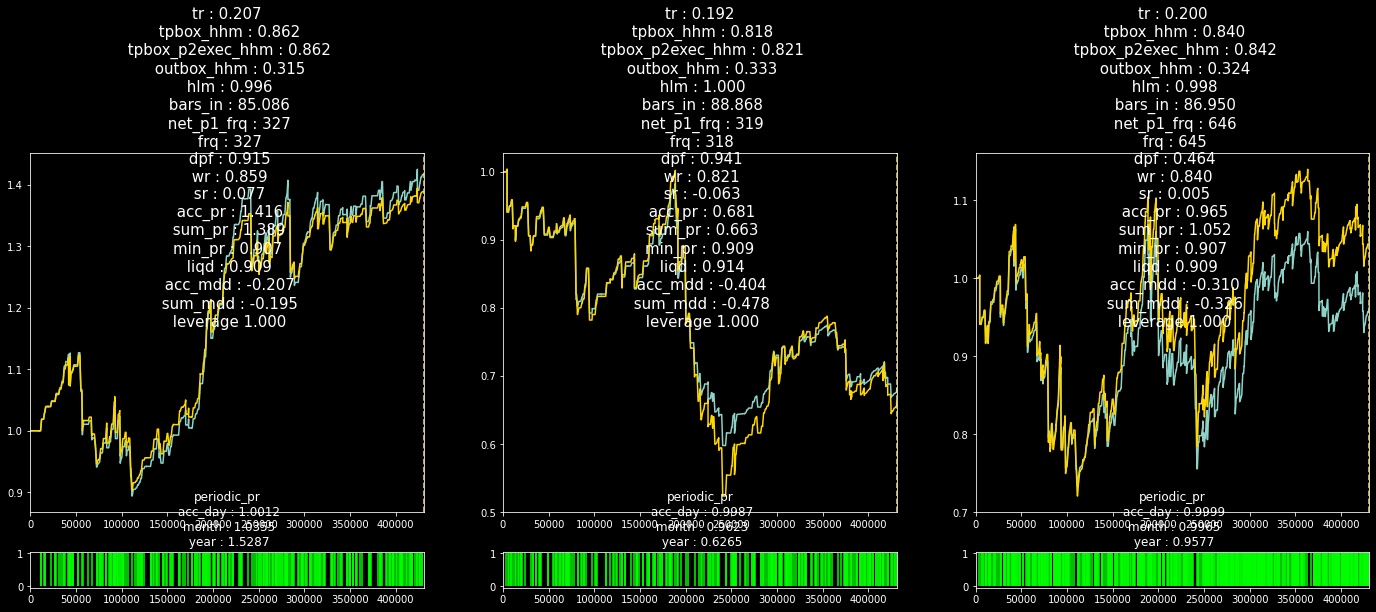

idep_plot elapsed time : 1.1793534755706787


In [160]:
test_ratio = 0.0
short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_tr_arr, short_bias_arr, short_net_p1_bias_tick, short_p2exec_p1_bias_tick, short_net_p1_idx_arr, short_p2_idx_arr, short_tp_1, short_tp_0, short_out_1, short_out_0, short_ep2_0, \
      long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_tr_arr, long_bias_arr, long_net_p1_bias_tick, long_p2exec_p1_bias_tick, long_net_p1_idx_arr, long_p2_idx_arr, long_tp_1, long_tp_0, long_out_1, long_out_0, long_ep2_0 = \
get_res_v9(res_df, open_info_df_list, ohlc_list, config_list, np_timeidx, funcs, test_ratio=test_ratio, plot_is=1, signi=0, show_detail=0)   # open 이 많을 수록 en_ex_pairing elapsed time : 11.58370590209961

In [ ]:
# ------ inversion ------ #
_ = get_res_v5(res_df, open_info_df, ohlc_list, config_list, np_timeidx, funcs, inversion=True, test_ratio=test_ratio, plot_is=1, signi=False)

### statistics (stem 별로 진행)

In [ ]:
selection_id = config.selection_id

short_p1_idx = short_obj[-1].astype(int)
long_p1_idx = long_obj[-1].astype(int)

short_open_tp_1 = res_df['short_tp_1_{}'.format(selection_id)].to_numpy()[short_p1_idx]
long_open_tp_1 = res_df['long_tp_1_{}'.format(selection_id)].to_numpy()[long_p1_idx]

short_open_tp_0 = res_df['short_tp_0_{}'.format(selection_id)].to_numpy()[short_p1_idx]
long_open_tp_0 = res_df['long_tp_0_{}'.format(selection_id)].to_numpy()[long_p1_idx]

short_open_tp_gap = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy()[short_p1_idx]  # use open_i
long_open_tp_gap = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy()[long_p1_idx]

short_open_out_0 = res_df['short_out_0_{}'.format(selection_id)].to_numpy()[short_p1_idx]
long_open_out_0 = res_df['long_out_0_{}'.format(selection_id)].to_numpy()[long_p1_idx]

short_open_out_gap = res_df['short_out_gap_{}'.format(selection_id)].to_numpy()[short_p1_idx]  # use open_i
long_open_out_gap = res_df['long_out_gap_{}'.format(selection_id)].to_numpy()[long_p1_idx]

# ------ out case 의 max_high check (long) ------ #
short_max_tpg = get_max_tpg_v2(OrderSide.SELL, ohlc_list, short_pr, short_obj[:4], short_open_tp_1, short_open_tp_gap)
long_max_tpg = get_max_tpg_v2(OrderSide.BUY, ohlc_list, long_pr, long_obj[:4], long_open_tp_1, long_open_tp_gap)
# short_max_tpg = get_max_tpg_v2(OrderSide.SELL, ohlc_list, short_pr, short_obj[:4], short_open_tp_1, short_open_out_gap)
# long_max_tpg = get_max_tpg_v2(OrderSide.BUY, ohlc_list, long_pr, long_obj[:4], long_open_tp_1, long_open_out_gap)

# ------ true_bias 의 outg 확인 ------ # --> 추후, outg 로 tp_gap / out_gap custom 여부를 위해, 본 cell 을 지우지 않음
short_max_outg = get_max_outg_v4(OrderSide.SELL, config, ohlc_list, short_obj, short_tpout_arr, short_open_tp_0, short_open_tp_gap)  # tp_box's mean_low 확인 위해 tp_gap 입력함
long_max_outg = get_max_outg_v4(OrderSide.BUY, config, ohlc_list, long_obj, long_tpout_arr, long_open_tp_0, long_open_tp_gap)

current_tpg = config.tr_set.tp_gap
current_outg = config.tr_set.out_gap

#### consecutive dur. value survey on bias

In [ ]:
res_df.dtypes

In [ ]:
# ------------ dependent vars. ------------ #
# res_df 에 존재하는 col 는 모두 사용가능함

# ------ 1. 도출한 outg 와 vars. pairing 진행 (by valid_idx) ------ #
devided_cols, public_cols = [], []

devided_cols.append('tr_{}'.format(selection_id))

devided_cols.append('wave_length_fill_{}{}'.format(wave_itv1, wave_period1))
devided_cols.append('wave_spread_fill_{}{}'.format(wave_itv1, wave_period1))

wave_itv1 = 'T'
wave_period1 = config.tr_set.wave_period1

# public_cols.append('cu_wrr_21_{}{}'.format(wave_itv1, wave_period1))
public_cols.append('cu_wrr_32_{}{}'.format(wave_itv1, wave_period1))
# public_cols.append('co_wrr_21_{}{}'.format(wave_itv1, wave_period1))
public_cols.append('co_wrr_32_{}{}'.format(wave_itv1, wave_period1))

# public_cols.append('wave_high_terms_cnt_fill_T5')
# public_cols.append('wave_low_terms_cnt_fill_T5')
# public_cols.append('wave_high_loc_pct_T5')
# public_cols.append('wave_low_loc_pct_T5')

# public_cols.append('b1_co_es_15T1')
# public_cols.append('b1_cu_es_15T1')
# public_cols.append('b1_upper_wick_ratio_15T')
# public_cols.append('b1_lower_wick_ratio_15T')

#  'co_wrr_T5', 'cu_wrr_T5', 'b1_cppr_15T', 'b1_updbr', 'b1_lwdbr', 'b1_updbr_cppr', 'b1_lwdbr_cppr' 'abs_ratio_5T', 'rel_ratio_5T', 'body_rel_ratio_5T'

# devided_cols = ['tr_{}'.format(selection_id)]  # , 'ir_5T'
# public_cols = ['wave_high_terms_cnt_fill_T5', 'wave_low_terms_cnt_fill_T5', 'wave_high_loc_pct_T5', 'wave_low_loc_pct_T5', 
#                'b1_co_es_15T1', 'b1_cu_es_15T1', 'b1_upper_wick_ratio_15T', 'b1_lower_wick_ratio_15T']

short_datas = [res_df['short_' + col].to_numpy() for col in devided_cols] + [res_df[col].to_numpy() for col in public_cols]
long_datas = [res_df['long_' + col].to_numpy() for col in devided_cols] + [res_df[col].to_numpy() for col in public_cols]

titles = devided_cols + public_cols

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


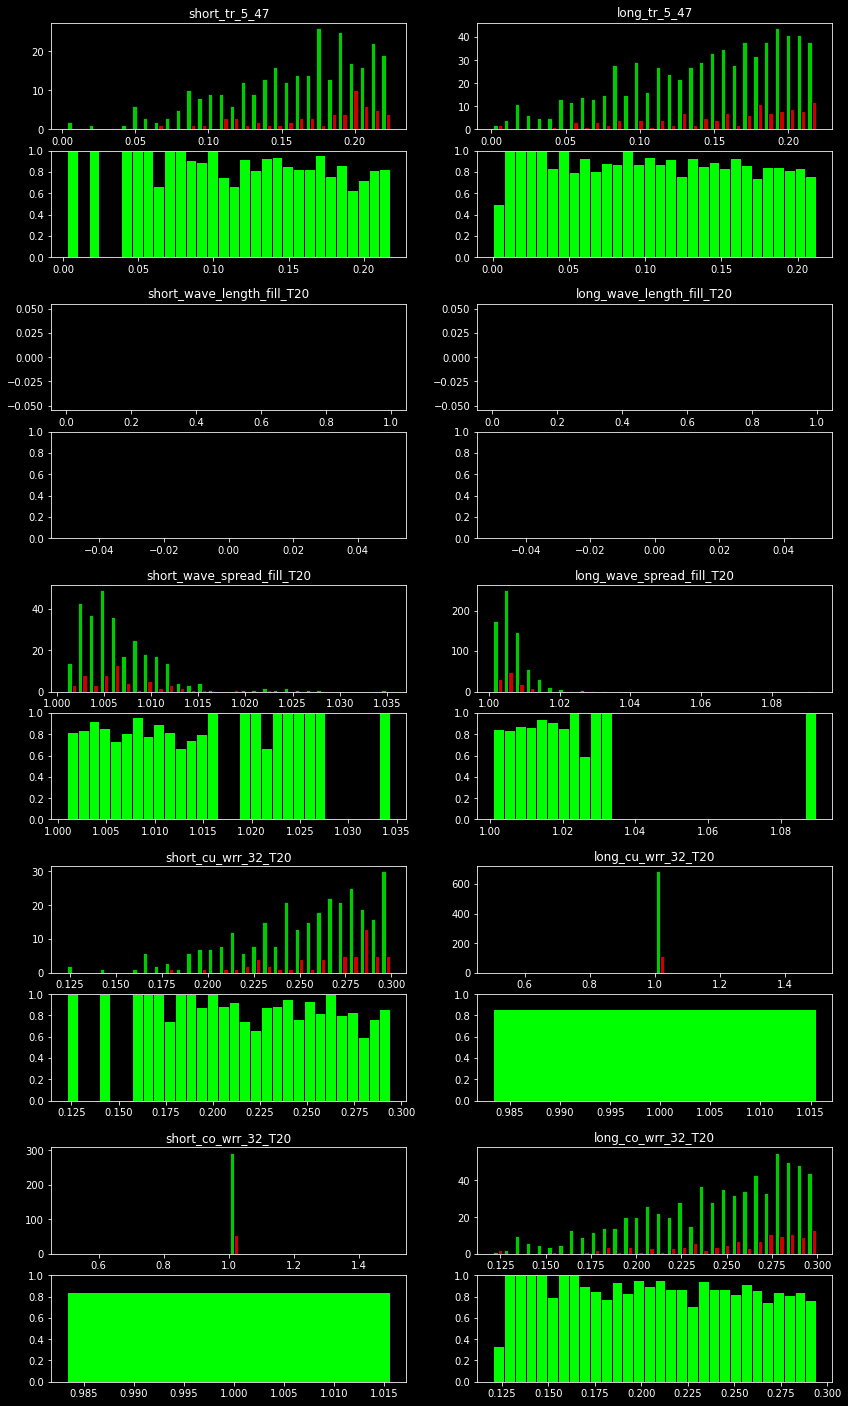

In [ ]:
plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(14, len(titles) * 5))
nrows, ncols = len(short_datas), 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols
                        )

num_samples = 30
alpha = 0.8
xmin = 0
xmax = 10

for ings_idx, (title, short_data, long_data) in enumerate(zip(titles, short_datas, long_datas)):
  inner_gs = gs[ings_idx].subgridspec(nrows=2, ncols=2)

  short_open_data = short_data[short_p1_idx]
  long_open_data = long_data[long_p1_idx]

  short_true_data = short_open_data[short_bias_arr.ravel()]
  # short_false_data = short_open_data[short_false_bias_arr.ravel()]
  short_false_data = short_open_data[~short_bias_arr.ravel()]
  long_true_data = long_open_data[long_bias_arr.ravel()]
  # long_false_data = long_open_data[long_false_bias_arr.ravel()]
  long_false_data = long_open_data[~long_bias_arr.ravel()]
  
  short_true_valid_idx = np.ones_like(short_true_data).astype(bool)
  short_false_valid_idx = np.ones_like(short_false_data).astype(bool)
  long_true_valid_idx = np.ones_like(long_true_data).astype(bool)
  long_false_valid_idx = np.ones_like(long_false_data).astype(bool)

  short_true_valid_idx *= ~np.isinf(short_true_data)
  short_false_valid_idx *= ~np.isinf(short_false_data)
  long_true_valid_idx *= ~np.isinf(long_true_data)
  long_false_valid_idx *= ~np.isinf(long_false_data)

  try:
    short_true_valid_idx *= short_true_data > xmin
    short_false_valid_idx *= short_false_data > xmin
    long_true_valid_idx *= long_true_data > xmin
    long_false_valid_idx *= long_false_data > xmin

  except:
    pass

  try:
    short_true_valid_idx *= short_true_data < xmax
    short_false_valid_idx *= short_false_data < xmax
    long_true_valid_idx *= long_true_data < xmax
    long_false_valid_idx *= long_false_data < xmax
    
  except:
    pass
    
  plt.subplot(inner_gs[0])
  ns, bins, patches = plt.hist([short_true_data[short_true_valid_idx], short_false_data[short_false_valid_idx]], 
           bins=num_samples, alpha=alpha, color=['#00ff00', '#ff0000'], edgecolor='black')  
  plt.title('short_' + title)  

  plt.subplot(inner_gs[2])
  total_ns = np.sum(ns, axis=0)
  hist_ratio = ns[0] / total_ns
  # valid_idx = total_ns > 1
  valid_idx = np.full(len(hist_ratio), True)
  valid_hist_ratio = hist_ratio[valid_idx]
  plt.hist(bins[:-1][valid_idx], weights=valid_hist_ratio, bins=num_samples, color='#00ff00', edgecolor='black')
  plt.ylim(0, 1)
  

  plt.subplot(inner_gs[1])
  ns, bins, patches = plt.hist([long_true_data[long_true_valid_idx], long_false_data[long_false_valid_idx]], 
           bins=num_samples, alpha=alpha, color=['#00ff00', '#ff0000'], edgecolor='black')
  plt.title('long_' + title)
  
  plt.subplot(inner_gs[3])
  total_ns = np.sum(ns, axis=0)
  hist_ratio = ns[0] / total_ns
  # valid_idx = total_ns > 1
  valid_idx = np.full(len(hist_ratio), True)
  valid_hist_ratio = hist_ratio[valid_idx]
  plt.hist(bins[:-1][valid_idx], weights=valid_hist_ratio, bins=num_samples, color='#00ff00', edgecolor='black')
  plt.ylim(0, 1)

  
# plt.suptitle(title)
plt.show()

#### tpg & outg survey

223
533
223
533
223
533
223
533
pkx : [0.05994977 0.14818175 0.35111529 0.74815919]
pkx : [0.09816775 0.30374184 0.78029994]

56
84
56
84
56
84
56
84
pkx : [-0.23140658 -0.19827966 -0.16515274 -0.14385686 -0.11072994 -0.07287061 -0.01371539]
pkx : [-0.32640606 -0.24710795 -0.18102619 -0.11494443 -0.03234223]



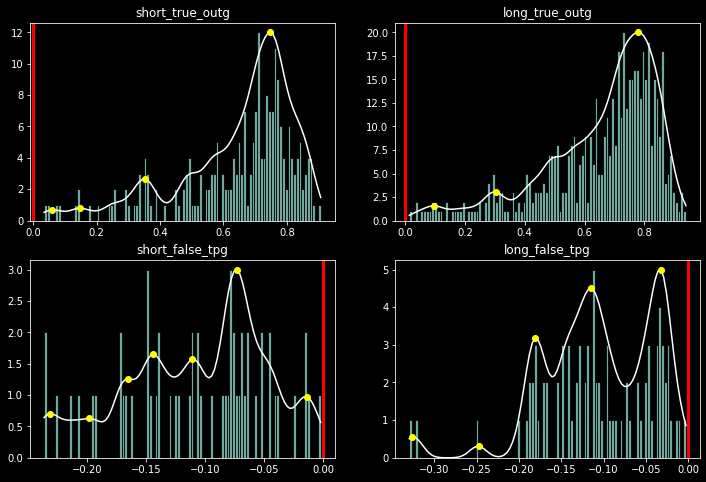

In [ ]:
# 1. outg 는 partial 을 위한 histogram 작성 진행
# 현재, outg 내부에는 tp 한것과 out 한것이 공존하는 상태
titles = ['outg', 'tpg']
short_max_datas = [short_max_outg[short_bias_arr], short_max_tpg]
long_max_datas = [long_max_outg[long_bias_arr], long_max_tpg]

# titles = ['tpg']
# short_max_datas = [short_max_tpg]
# long_max_datas = [long_max_tpg]

plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(12, 8))
nrows, ncols = 2, 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols
                        )
  
for ings_idx, (title, short_max_data, long_max_data) in enumerate(zip(titles, short_max_datas, long_max_datas)):

  inner_gs = gs[ings_idx].subgridspec(nrows=1, ncols=2)
  if ings_idx == 0:
    axvline = current_outg
    title_add = 'true_' + title
  else:
    axvline = current_tpg
    title_add = 'false_' + title

  print(len(short_max_data))
  print(len(long_max_data))

  short_plot_idx = np.ones_like(short_max_data).astype(bool)
  long_plot_idx = np.ones_like(long_max_data).astype(bool)
  # short_plot_idx = short_max_data <= axvline
  # long_plot_idx = long_max_data <= axvline

  print(np.sum(short_plot_idx))
  print(np.sum(long_plot_idx))    

  short_plot_idx *= ~np.isnan(short_max_data)
  long_plot_idx *= ~np.isnan(long_max_data)  # nan 과 inf 때문에 이 방식 채택

  print(np.sum(short_plot_idx))
  print(np.sum(long_plot_idx))

  short_plot_idx *= ~np.isinf(short_max_data)
  long_plot_idx *= ~np.isinf(long_max_data)  # nan 과 inf 때문에 이 방식 채택
  
  print(np.sum(short_plot_idx))
  print(np.sum(long_plot_idx))
    
  plt.subplot(inner_gs[0])
  kde_plot_v2(*np.unique(short_max_data[short_plot_idx], return_counts=True))
  plt.title('short_' + title_add)  
  plt.axvline(axvline, color='red', linewidth=3)

  plt.subplot(inner_gs[1])
  kde_plot_v2(*np.unique(long_max_data[long_plot_idx], return_counts=True))
  plt.title('long_' + title_add)
  plt.axvline(axvline, color='red', linewidth=3)

  print()

# plt.suptitle(title)
plt.show()

#### legacy

##### outg survey for precision (eploc vars. dependency)

In [ ]:
# ------------ dependent vars. ------------ #
# res_df 에 존재하는 col 는 모두 사용가능함
# ------ 1. 도출한 outg 와 vars. pairing 진행 (by valid_idx) ------ #
devided_cols = ['tr_{}'.format(strat_version)]  # , 'ir_5T'
public_cols = ['wave_body_ratio']  # 'abs_ratio_5T', 'rel_ratio_5T', 'body_rel_ratio_5T'

short_datas = [res_df['short_' + col].to_numpy() for col in devided_cols] + [res_df[col].to_numpy() for col in public_cols]
long_datas = [res_df['long_' + col].to_numpy() for col in devided_cols] + [res_df[col].to_numpy() for col in public_cols]

titles = devided_cols + public_cols

In [ ]:
plot_outg_range = (-1, 10)
plot_data_range = (-10, 100)

plt.style.use(['dark_background', 'fast'])
fig = plt.figure(figsize=(12, 18))
nrows, ncols = len(short_datas), 1
gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                        ncols=ncols
                        )

for ings_idx, (title, short_data, long_data) in enumerate(zip(titles, short_datas, long_datas)):
  inner_gs = gs[ings_idx].subgridspec(nrows=1, ncols=2)

  print(len(long_max_outg))

  short_plot_idx = (plot_outg_range[0] <= short_max_outg) & (short_max_outg <= plot_outg_range[1])
  long_plot_idx = (plot_outg_range[0] <= long_max_outg) & (long_max_outg <= plot_outg_range[1])  # nan 과 inf 때문에 이 방식 채택

  print(np.sum(long_plot_idx))

  short_open_data = short_data[short_open_idx]
  long_open_data = long_data[long_open_idx]
  
  short_plot_idx *= (plot_data_range[0] <= short_open_data) * (short_open_data <= plot_data_range[1])
  long_plot_idx *= (plot_data_range[0] <= long_open_data) * (long_open_data <= plot_data_range[1]) # nan 과 inf 때문에 이 방식 채택

  short_plot_idx *= ~np.isnan(short_open_data)
  long_plot_idx *= ~np.isnan(long_open_data)  # nan 과 inf 때문에 이 방식 채택

  print(np.sum(long_plot_idx))

  short_plot_idx *= ~np.isinf(short_open_data)
  long_plot_idx *= ~np.isinf(long_open_data)  # nan 과 inf 때문에 이 방식 채택

  print(np.sum(long_plot_idx))

  short_true_idx = short_plot_idx * short_true_open_idxth
  long_true_idx = long_plot_idx * long_true_open_idxth
  
  short_false_idx = short_plot_idx * ~short_true_open_idxth
  long_false_idx = long_plot_idx * ~long_true_open_idxth

  plt.subplot(inner_gs[0])
  # ------ true_bias ------ #
  x, y = short_max_outg[short_true_idx].ravel(), short_open_data[short_true_idx].ravel()  
  plt.scatter(x, y, color='white', alpha=0.5)
  # ------ false_bias ------ #
  x, y = short_max_outg[short_false_idx].ravel(), short_open_data[short_false_idx].ravel()
  plt.scatter(x, y, color='fuchsia', alpha=0.3)
  plt.axvline(current_outg, color='red', linewidth=3)
  plt.title("{} coef : {:0.3f}".format(title, np.corrcoef(-x, y)[0, 1]))

  plt.subplot(inner_gs[1])    
  # ------ true_bias ------ #
  x, y = long_max_outg[long_true_idx].ravel(), long_open_data[long_true_idx].ravel()  
  plt.scatter(x, y, color='white', alpha=0.5)
  # ------ false_bias ------ #
  x, y = long_max_outg[long_false_idx].ravel(), long_open_data[long_false_idx].ravel()
  plt.scatter(x, y, color='fuchsia', alpha=0.3)
  plt.axvline(current_outg, color='red', linewidth=3)
  plt.title("{} coef : {:0.3f}".format(title, np.corrcoef(-x, y)[0, 1]))

  print()  

# plt.suptitle(title)
plt.show()
# print()

#### dump

In [ ]:
# len(np.unique(long_obj[-1]))
p1_hhm_p1_idx = long_obj[-1]

In [ ]:
p1_hlm_p1_idx = long_obj[-1]

In [ ]:
# len(p1_hhm_p1_idx[~np.isin(p1_hhm_p1_idx, p1_hlm_p1_idx)])
p1_hlm_p1_idx[~np.isin(p1_hlm_p1_idx, p1_hhm_p1_idx)]

array([350065., 440065., 502833., 735204., 836258.])

In [ ]:
org_p1_idx = long_p2_idx_arr  # long_obj[-1]

In [ ]:
new_p1_idx = long_p2_idx_arr  # long_obj[-1]

In [ ]:
uniq_org_p1_idx = np.unique(org_p1_idx)
uniq_new_p1_idx = np.unique(new_p1_idx)
print(len(uniq_org_p1_idx))
print(len(uniq_new_p1_idx))
uniq_new_p1_idx[~np.isin(uniq_new_p1_idx, uniq_org_p1_idx)]
# np.unique(new_p1_idx).remove(np.unique(org_p1_idx))

153
163


array([ 35609, 105164, 188999, 347399, 358994, 379304, 379544, 397274, 482474, 550919, 656774, 833129])

In [ ]:
open_idx = open_info_df.index.to_numpy()
# len_df = len(res_df)
# s_idx = (open_idx < int(len_df * (1 - test_ratio))) == plot_is
# s_open_info_df = open_info_df[s_idx]
# s_open_idx = open_idx[s_idx]

# open_info_list = [s_open_info_df[col_].to_numpy() for col_ in s_open_info_df.columns]
# side_arr, zone_arr, id_arr, id_idx_arr = open_info_list

long_open_ = res_df['long_open_{}'.format(config.selection_id)].to_numpy()
short_open_ = res_df['short_open_{}'.format(config.selection_id)].to_numpy()

long_open_idx = get_index_bybool(long_open_, np.arange(len(res_df)))
short_open_idx = get_index_bybool(short_open_, np.arange(len(res_df)))

In [ ]:
valid_long_open_idx = long_open_idx[~np.isnan(long_open_idx)]
valid_short_open_idx = short_open_idx[~np.isnan(short_open_idx)]

# print(valid_long_open_idx[valid_long_open_idx > 4000][:10])
# print(valid_short_open_idx[valid_short_open_idx > 4000][:10])

print(open_idx[open_idx > 4000][:10])

print(np.hstack((long_obj[-1], long_obj[3]))[:10])
print(np.hstack((short_obj[-1], short_obj[3]))[:10])
# print([:10])

In [ ]:
# short_max_outg, short_outg_open_idx = get_max_outg_v2("SELL", config, ohlc_list, short_obj, short_tpout_arr, short_open_epout_0, short_open_epout_gap)
# long_max_outg, long_outg_open_idx = get_max_outg_v2("BUY", config, ohlc_list, long_obj, long_tpout_arr, long_open_epout_0, long_open_epout_gap)
# short_max_outg, short_open_idx, short_true_open_idxth = get_max_outg_v3("SELL", config, ohlc_list, short_obj, short_tpout_arr, short_open_epout_0, short_open_epout_gap)
# long_max_outg, long_open_idx, long_true_open_idxth = get_max_outg_v3("BUY", config, ohlc_list, long_obj, long_tpout_arr, long_open_epout_0, long_open_epout_gap)

### significance_v4

get_open_info_df elapsed time : 0.9912905693054199
get_open_info_df elapsed time : 1.119309425354004
en_ex_pairing elapsed time : 0.2864546775817871


idep_plot elapsed time : 0.24003958702087402


get_open_info_df elapsed time : 0.9702315330505371
get_open_info_df elapsed time : 1.1136088371276855
en_ex_pairing elapsed time : 0.28760790824890137


idep_plot elapsed time : 0.23279881477355957


get_open_info_df elapsed time : 0.9772036075592041
get_open_info_df elapsed time : 1.1121675968170166
en_ex_pairing elapsed time : 0.2862434387207031


idep_plot elapsed time : 0.23788022994995117


get_open_info_df elapsed time : 0.9769313335418701
get_open_info_df elapsed time : 1.113098382949829
en_ex_pairing elapsed time : 0.29978251457214355


idep_plot elapsed time : 0.24538660049438477


get_open_info_df elapsed time : 0.9852426052093506
get_open_info_df elapsed time : 1.1182096004486084
en_ex_pairing elapsed time : 0.256350040435791


idep_plot elapsed time : 0.23582172393798828


get_open_info_df elapsed time : 0.9720909595489502
get_open_info_df elapsed time : 1.1168534755706787
en_ex_pairing elapsed time : 0.23292207717895508


idep_plot elapsed time : 0.22757911682128906


get_open_info_df elapsed time : 0.9739437103271484
get_open_info_df elapsed time : 1.1390419006347656
en_ex_pairing elapsed time : 0.21771883964538574


idep_plot elapsed time : 0.22835493087768555


get_open_info_df elapsed time : 0.9923019409179688
get_open_info_df elapsed time : 1.1408772468566895
en_ex_pairing elapsed time : 0.19428110122680664


idep_plot elapsed time : 0.22899723052978516


get_open_info_df elapsed time : 0.9736478328704834
get_open_info_df elapsed time : 1.128516674041748
en_ex_pairing elapsed time : 0.1870872974395752


idep_plot elapsed time : 0.22847270965576172


get_open_info_df elapsed time : 1.0014326572418213
get_open_info_df elapsed time : 1.1383976936340332
en_ex_pairing elapsed time : 0.16617369651794434


idep_plot elapsed time : 0.23203444480895996


get_open_info_df elapsed time : 0.9996623992919922
get_open_info_df elapsed time : 1.1266658306121826
en_ex_pairing elapsed time : 0.15009403228759766


idep_plot elapsed time : 0.21766376495361328


get_open_info_df elapsed time : 0.9762172698974609
get_open_info_df elapsed time : 1.1154649257659912
en_ex_pairing elapsed time : 0.134476900100708


idep_plot elapsed time : 0.2238919734954834


get_open_info_df elapsed time : 0.9701650142669678
get_open_info_df elapsed time : 1.120518445968628
en_ex_pairing elapsed time : 0.11980915069580078


idep_plot elapsed time : 0.22379755973815918


get_open_info_df elapsed time : 0.9762673377990723
get_open_info_df elapsed time : 1.1230545043945312
en_ex_pairing elapsed time : 0.11132669448852539


idep_plot elapsed time : 0.21326851844787598


get_open_info_df elapsed time : 0.9717617034912109
get_open_info_df elapsed time : 1.1186952590942383
en_ex_pairing elapsed time : 0.09841537475585938


idep_plot elapsed time : 0.21537470817565918


get_open_info_df elapsed time : 0.967862606048584
get_open_info_df elapsed time : 1.1132185459136963
en_ex_pairing elapsed time : 0.09138727188110352


idep_plot elapsed time : 0.21971392631530762


get_open_info_df elapsed time : 0.9735586643218994
get_open_info_df elapsed time : 1.1202800273895264
en_ex_pairing elapsed time : 0.08235740661621094


idep_plot elapsed time : 0.21437716484069824


get_open_info_df elapsed time : 0.9798078536987305
get_open_info_df elapsed time : 1.1410536766052246
en_ex_pairing elapsed time : 0.07582592964172363
idep_plot elapsed time : 0.21589303016662598


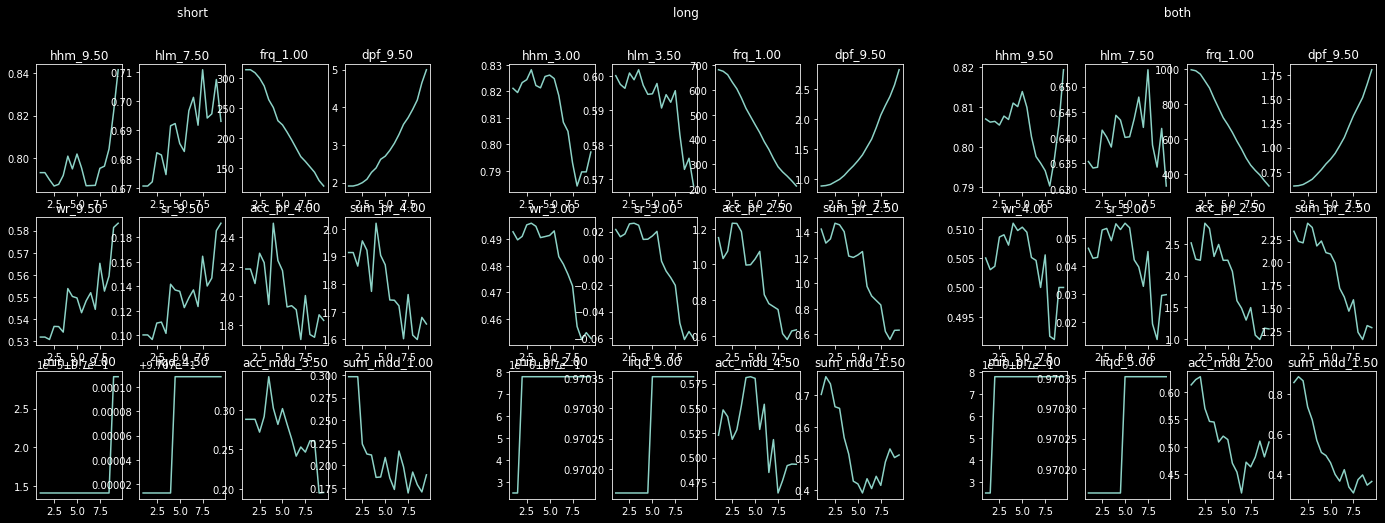

In [ ]:
# from google.colab import output
# ------------ survey param ------------ #
# itv_num_list = [1, 3, 5, 15]
# itv_list = ['15m', '30m', '1h', '4h']
# itv_list = ['3m', '5m', '15m', '30m', '1h', '4h']
val_list = np.arange(1, 10, 0.5)     # prcn 1
# val_list = np.arange(-0.5, 0.5, 0.05)  # prcn 2
# val_list = np.arange(-0.5, 0., 0.03)  # prcn 2
# val_list = np.arange(-0.5, -0.6, -0.005)    # prcn 3
# val_list = np.arange(0.944, 0.945, 0.0001)    # prcn 4
# val_list = np.arange(1, 10, 1)   # prcn -1
# val_list = np.arange(100, 120, 1)   # prcn -2
# val_list = talib.get_function_groups()['Pattern Recognition']

# ------------ get survey_res ------------ #
result = []
res_shape = (3, 12)  # short, long, both x data
config_list_copy = copy.deepcopy(config_list)
for set_val in val_list:
  # ------------ open 결정 이전의 인자값 ------------ #
  # ------ point * dur. ------ #
  # config_list_copy[0].loc_set.point1.wrr_32 = set_val
  # config_list_copy[0].loc_set.point1.candle_pattern = set_val
  # config_list_copy[0].loc_set.zone.degree_list = set_val
  # config_list_copy[0].loc_set.point2.wick_score_list = str([set_val])
  # config_list_copy[0].loc_set.zone.ir = set_val  
  # config_list_copy[0].loc_set.zone.abs_ratio = set_val

  # ------------ open 결정 이후의 인자값 ------------ #
  # ------ utils ------ #
  # config_list_copy[0].tr_set.tp_gap = set_val  
  # config_list_copy[0].tr_set.ep_gap1 = set_val 
  # config_list_copy[0].tr_set.ep_gap2 = set_val 
  # config_list_copy[0].tr_set.out_gap = set_val  
  # config_list_copy[0].tr_set.wave_length1 = set_val  
  config_list_copy[0].tr_set.wave_time_ratio1 = set_val

  # config_list_copy[0].tr_set.tp_gap = abs(set_val) - 0.5
  # config_list_copy[0].tr_set.out_gap = set_val + 0.5
  # config_list_copy[0].tr_set.wb_tp_gap = config_list_copy[0].tr_set.tp_gap
  # config_list_copy[0].tr_set.wb_out_gap = config_list_copy[0].tr_set.out_gap

  # ------ entry, exit (ep, tp, out vars.) ------ #
  # config_list_copy[0].tr_set.expire_k = set_val
  # config_list_copy[0].ep_set.expire_tick = set_val  
 
  for utils_, config_ in zip(utils_list, config_list_copy):
    enlist_tr(res_df, config_, np_timeidx)
  # open_info_df = get_open_info_df(ep_loc_v3, res_df, np_timeidx, ID_list, config_list_copy, id_idx_list)   # point * mr_res 이기 때문에 utils_tr & rtc 의 영향을 충분히 받음
  open_info_df1 = get_open_info_df_v2(ep_loc_p1_v3, res_df, np_timeidx, ID_list, config_list_copy, id_idx_list, open_num=1)  # --> point * dur. 관련 (loc_set) param 에 종속 (open_info 가 변경되는게 아니라면, 재실행할 필요없음)
  open_info_df2 = get_open_info_df_v2(ep_loc_p2_v3, res_df, np_timeidx, ID_list, config_list_copy, id_idx_list, open_num=2)
  open_info_df_list = [open_info_df1, open_info_df2]

  try:
    result.append(get_res_v9(res_df, open_info_df_list, ohlc_list, config_list_copy, np_timeidx, funcs, test_ratio=test_ratio, plot_is=1, signi=True))    
  except:
    result.append(np.full(res_shape, np.nan))
    # pass

survey_res_list = [np.array(result)[:, s_i::3] for s_i in range(3)]   # 3 for s, l, b
# short_res, long_res, both_res = survey_res_list

# ------------ plot survey_res ------------ #
title_list = ["short", "long", "both"]
sub_title_list = ['hhm', 'hlm', 'frq', 'dpf', 'wr', 'sr', 'acc_pr', 'sum_pr', 'min_pr', 'liqd', 'acc_mdd', 'sum_mdd']
space_ = " " * 120

fig = plt.figure(figsize=(24, 8))
plt.style.use('dark_background')
gs = gridspec.GridSpec(nrows=1,
                        ncols=3,
                        # height_ratios=[1, 1, 1]
                      )
# nrows, ncols, h_r = 3, 3, [1, 1, 1]
nrows, ncols, h_r = 3, 4, [1, 1, 1]
# nrows, ncols, h_r = 4, 3, [1, 1, 1, 1]
# if d_idx == 0:
# else:
  # nrows, ncols, h_r = 2, 2, [1, 1]

for d_idx, (title_name, survey_res) in enumerate(zip(title_list, survey_res_list)):  
  inner_gs = gs[d_idx].subgridspec(nrows=nrows,
                        ncols=ncols,
                        height_ratios=h_r
                      )
  for in_idx, (data_, sub_title) in enumerate(zip(survey_res.T, sub_title_list)):
    plt.subplot(inner_gs[in_idx])
    data = data_.ravel()
    valid_idx = ~np.isnan(data)
    if np.sum(valid_idx) > 0:
      if type(val_list[0]) == str:
        x, y = np.arange(len(val_list))[valid_idx], data[valid_idx]
      else:
        x, y = val_list[valid_idx], data[valid_idx]
      plt.plot(x, y)  # 앞에서부터 len(result) 만큼만    
      plt.title(sub_title + '_{:.2f}'.format(x[np.argmax(y)]))
    else:
      plt.title(sub_title)

plt.suptitle(space_.join(title_list))
plt.show()
# print("\n")

### backtrader validation

In [ ]:
trade_log_name = "ETHUSDT_1658210884.pkl"
trade_log_dir_path = "./trade_log/0717_5_47_trader"

with open(os.path.join(trade_log_dir_path, trade_log_name), 'rb') as f:
  trade_log = pickle.load(f)

In [ ]:
trade_log  # both pos_side's log

In [ ]:
# 1. ts 에 pair 된 en_p, ex_p 만 비교하면 될 것
#   -> open_idx, en_idx, ex_idx 조회하면 될 것

pos_side = "SELL" # BUY
val_obj = short_obj if pos_side == "SELL" else long_obj

# ------ get idep trade_info ------ #
op_ts = list(map(lambda x : str(x), res_df.index[val_obj[4].astype(int).ravel()])) 
en_ts = list(map(lambda x : str(x), res_df.index[val_obj[2].astype(int).ravel()])) 
ex_ts = list(map(lambda x : str(x), res_df.index[val_obj[3].astype(int).ravel()])) 
en_p = val_obj[0].ravel()
ex_p = val_obj[1].ravel()

for order_type, ts_ in zip(['open', 'entry', 'exit'], [op_ts, en_ts, ex_ts]):
  trade_log_ts = [k for k, v in trade_log.items() if order_type in v if pos_side in v]
  lacked_ts = [ts for ts in ts_ if not ts in trade_log_ts]
  added_ts = [ts for ts in trade_log_ts if not ts in ts_]

  print("lacked_{}_ts :".format(order_type), lacked_ts)
  print("added_{}_ts :".format(order_type), added_ts)
  print()

lacked_open_ts : []
added_open_ts : ['2022-01-14 17:27:59.999000']

lacked_entry_ts : []
added_entry_ts : ['2022-01-14 17:28:59.999000']

lacked_exit_ts : []
added_exit_ts : ['2022-01-14 19:53:59.999000']



In [ ]:
# ex_ts
# [k for k, v in trade_log.items() if order_type in v if pos_side in v]
# list(trade_log.keys())[1]
res_df.iloc[-0:]

#### check added_ts

In [ ]:
keys = list(trade_log.keys())

for k_i in range(len(keys)):
  if keys[k_i] in added_ts:
    # print(trade_log[keys[k_i]])
    # print(trade_log[keys[k_i + 1]])
    print(keys[k_i], trade_log[keys[k_i]])
    print(keys[k_i + 1], trade_log[keys[k_i + 1]])

#### price sync_check

In [ ]:
accept_price_gap = 0.1
for i in range(len(en_ts)):
  try:
    print(en_ts[i], trade_log[en_ts[i]][0] - en_p[i])
    # print(trade_log[str(ex_ts[i])])
    # print(ex_ts[i], trade_log[ex_ts[i]][0] - ex_p[i])
    # print(ex_ts[i])
    print()

  except Exception as e:
    print(e)


2022-01-17 03:19:59.999000 -0.00580000000036307

2022-01-18 16:49:59.999000 0.0

2022-01-27 05:56:59.999000 -0.007399999999961437

2022-01-27 11:51:59.999000 0.0

2022-02-03 01:29:59.999000 0.0

2022-02-05 10:58:59.999000 0.0

2022-02-08 17:00:59.999000 -0.00559999999950378

2022-02-13 07:03:59.999000 -0.003800000000410364

2022-02-16 10:32:59.999000 -0.0039999999999054126

2022-02-16 13:43:59.999000 0.0



### legacy

#### main_functions

In [ ]:
def get_open_info_df_v2(ep_loc_v2, res_df, np_timeidx, ID_list, config_list, id_idx_list, open_num=1):
  start_0 = time.time()
  # ------ get mr_res, zone_arr ------ #
  short_mr_res_obj = np.array([ep_loc_v2(res_df, config_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.SELL) for config_ in config_list])
  long_mr_res_obj = np.array([ep_loc_v2(res_df, config_, np_timeidx, show_detail=True, ep_loc_side=OrderSide.BUY) for config_ in config_list])
  short_open_idx_list = [np.where(res_df['short_open{}_{}'.format(open_num, id)].to_numpy() * mr_res)[0] for id, mr_res in zip(ID_list, short_mr_res_obj[:, 0].astype(np.float64))]   # "point * mr_Res"
  long_open_idx_list = [np.where(res_df['long_open{}_{}'.format(open_num, id)].to_numpy() * mr_res)[0] for id, mr_res in zip(ID_list, long_mr_res_obj[:, 0].astype(np.float64))]  # zip 으로 zone (str) 과 묶어서 dtype 변경됨

  # ------ open_info_arr ------ #
  short_side_list = [np.full(len(list_), OrderSide.SELL) for list_ in short_open_idx_list]
  long_side_list = [np.full(len(list_), OrderSide.BUY) for list_ in long_open_idx_list]

  short_zone_list = [zone_res[short_open_idx] for zone_res, short_open_idx in zip(short_mr_res_obj[:, 1], short_open_idx_list)]
  long_zone_list = [zone_res[long_open_idx] for zone_res, long_open_idx in zip(long_mr_res_obj[:, 1], long_open_idx_list)]

  short_id_list = [np.full(len(list_), id) for id, list_ in zip(ID_list, short_open_idx_list)]
  long_id_list = [np.full(len(list_), id) for id, list_ in zip(ID_list, long_open_idx_list)]

  selected_id_idx = np.arange(len(id_idx_list))
  short_id_idx_list = [np.full(len(list_), id) for id, list_ in zip(selected_id_idx, short_open_idx_list)]
  long_id_idx_list = [np.full(len(list_), id) for id, list_ in zip(selected_id_idx, long_open_idx_list)]

  # ------ get open_info_df ------ #
  #   series 만들어서 short / long 끼리 합치고 둘이 합치고, 중복은 우선 순위 정해서 제거
  short_open_df_list = [pd.DataFrame(index=index_, data=np.vstack((data_)).T, columns=['side', 'zone', 'id', 'id_idx']) for index_, data_ in zip(short_open_idx_list, zip(short_side_list, short_zone_list, short_id_list, short_id_idx_list))]
  long_open_df_list = [pd.DataFrame(index=index_, data=np.vstack((data_)).T, columns=['side', 'zone', 'id', 'id_idx']) for index_, data_ in zip(long_open_idx_list, zip(long_side_list, long_zone_list, long_id_list, long_id_idx_list))]

  open_info_df = pd.concat(short_open_df_list + long_open_df_list)
  # ------ sorting + unique ------ #
  open_info_df.sort_index(inplace=True)
  # print(len(open_info_df))
  # print(len(open_info_df))
  # open_info_df.head()
  print("get_open_info_df elapsed time :", time.time() - start_0)
  return open_info_df[~open_info_df.index.duplicated(keep='first')]  # 먼저 순서를 우선으로 지정  

In [ ]:
def get_res_v9(res_df, open_info_df_list, ohlc_list, config_list, np_timeidx, funcs, inversion=False, test_ratio=0.3, plot_is=True, signi=False, show_detail=False):
  # ------------ make open_info_list ------------ #
  open_idx1, open_idx2 = [open_info_df.index.to_numpy() for open_info_df in open_info_df_list]
  len_df = len(res_df)

  sample_len = int(len_df * (1 - test_ratio))
  sample_idx1 = (open_idx1 < sample_len) == plot_is  # in / out sample plot 여부
  sample_open_idx1 = open_idx1[sample_idx1]  
  sample_idx2 = (open_idx2 < sample_len) == plot_is  # in / out sample plot 여부

  # ------------ open_info_list 기준 = p1 ------------ #
  sample_open_info_df1, sample_open_info_df2 = [df_[idx_] for df_, idx_ in zip(open_info_df_list, [sample_idx1, sample_idx2])]
  open_info1 = [sample_open_info_df1[col_].to_numpy() for col_ in sample_open_info_df1.columns]

  if config_list[0].tr_set.check_hlm in [0, 1]:   # 여기서 open_info 자동화하더라도, utils info 는 직접 실행해주어야함
    sample_open_idx2 = sample_open_idx1
    open_info2 = open_info1
  else:
    sample_open_idx2 = open_idx2[sample_idx2]
    open_info2 = [sample_open_info_df2[col_].to_numpy() for col_ in sample_open_info_df2.columns]

  # ------------ get paired_res ------------ #
  start_0 = time.time()
  paired_res = en_ex_pairing_v9_3(res_df, [sample_open_idx1, sample_open_idx2], [open_info1, open_info2], ohlc_list, config_list, np_timeidx, funcs, show_detail)
  # valid_openi_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr = paired_res
  print("en_ex_pairing elapsed time :", time.time() - start_0)  #  0.37 --> 0.3660471439361572 --> 0.21(lesser if)

  # ------------ idep_plot ------------ #
  start_0 = time.time()
  high, low = ohlc_list[1:3]
  res = idep_plot_v16_2(res_df, len_df, config_list[0], high, low, sample_open_info_df1, paired_res, inversion=inversion, sample_ratio=1 - test_ratio, signi=signi)
  print("idep_plot elapsed time :", time.time() - start_0)   # 1.40452 (v6) 1.4311 (v5)

  return res

In [ ]:
def plot_info_v9(gs, gs_idx, len_df, sample_len, tr, hhm, p2_hhm, out_hhm, mean_low, hlm, bars_in, net_p1_frq, pr, total_pr, cum_pr, liqd, leverage, title_position, fontsize):
  try:
    plt.subplot(gs[gs_idx])
    idep_res_obj = get_res_info_nb_v2(sample_len, pr, total_pr, cum_pr, liqd)
    plt.plot(cum_pr)
    plt.plot(idep_res_obj[-1], color='gold')
    if sample_len is not None:
      plt.axvline(sample_len, alpha=1., linestyle='--', color='#ffeb3b')
    plt.xlim(0, len_df)

    title_str = "tr : {:.3f}\n tpbox_hhm : {:.3f}\n tpbox_p2exec_hhm : {:.3f}\n outbox_hhm : {:.3f}\n tpbox_mean_low : {:.3f}\n hlm : {:.3f}\n bars_in : {:.3f}\n net_p1_frq : {}\n frq : {}\n dpf : {:.3f}\n wr : {:.3f}\n sr : {:.3f}\n acc_pr : {:.3f}\n sum_pr : {:.3f}\n" +\
              "min_pr : {:.3f}\n liqd : {:.3f}\n acc_mdd : -{:.3f}\n sum_mdd : -{:.3f}\n leverage {:.3f}"
    plt.title(title_str.format(tr, hhm, p2_hhm, out_hhm, mean_low, hlm, bars_in, net_p1_frq, *idep_res_obj[:-1], leverage), position=title_position, fontsize=fontsize)
  except Exception as e:
    print("error in plot_info :", e)

  return gs_idx + 1

In [ ]:
def get_pr_v4(open_side, h, l, obj, tpout, lvrg, fee, p_ranges, p_qty_ratio, inversion=False):  # --> 여기서 사용하는 ex_p = ex_p

    en_p = obj[0]
    # ex_p = obj[1]
    tp, out = np.split(tpout, 2, axis=1)
    len_p = len(p_ranges)
    en_ps, tps, outs, lvrgs, fees = [np.tile(arr_, (1, len_p)) for arr_ in [en_p, tp, out, lvrg, fee]]

    np_obj = np.array(obj).T[0]
    assert len(np_obj.shape) == 2

    # iin == iout 인 경우 분리
    en_idx = np_obj[:, 2]
    ex_idx = np_obj[:, 3]
    equal_idx = en_idx == ex_idx    # equal_idx 는 어차피 out 임

    min_low = np.full_like(en_p, np.nan)
    min_low[~equal_idx] = np.array([np.min(l[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)  # start from iin + 1 (tp 체결을 entry_idx 부터 보지 않음)
    max_high = np.full_like(en_p, np.nan)
    max_high[~equal_idx] = np.array([np.max(h[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)

    if open_side == "SELL":
        p_tps = en_ps - (en_ps - tps) * p_ranges
        # min_low = np.full_like(en_p, np.nan)
        # min_low[~equal_idx] = np.array([np.min(l[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)  # start from iin + 1 (tp 체결을 entry_idx 부터 보지 않음)
        tp_idx = (np.tile(min_low, (1, len_p)) <= p_tps) * (np.tile(max_high, (1, len_p)) <= outs)  # entry_idx 포함해서 out touch 금지 (보수적 검증)
    else:
        p_tps = en_ps + (tps - en_ps) * p_ranges
        # max_high = np.full_like(en_p, np.nan)
        # max_high[~equal_idx] = np.array([np.max(h[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
        tp_idx = (np.tile(max_high, (1, len_p)) >= p_tps) * (np.tile(min_low, (1, len_p)) >= outs)

    ex_ps = tps.copy()
    ex_ps[tp_idx] = p_tps[tp_idx]

    if open_side == "SELL":
        if not inversion:
            pr = ((en_ps / ex_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            max_high = np.full_like(en_p, np.nan)
            max_high[~equal_idx] = np.array([np.max(h[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((en_p / max_high - fee - 1) * lvrg + 1)
        else:
            pr = ((ex_ps / en_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            min_low = np.full_like(en_p, np.nan)
            min_low[~equal_idx] = np.array([np.min(l[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((min_low / en_p - fee - 1) * lvrg + 1)
    else:
        if not inversion:
            pr = ((ex_ps / en_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            min_low = np.full_like(en_p, np.nan)
            min_low[~equal_idx] = np.array([np.min(l[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((min_low / en_p - fee - 1) * lvrg + 1)
        else:
            pr = ((en_ps / ex_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            max_high = np.full_like(en_p, np.nan)
            max_high[~equal_idx] = np.array([np.max(h[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((en_p / max_high - fee - 1) * lvrg + 1)

    return pr.reshape(-1, 1), liqd

In [ ]:
def idep_plot_v16_2(res_df, len_df, config, high, low, open_info_df1, paired_res, inversion=False, sample_ratio=0.7, title_position=(0.5, 0.5),
                  fontsize=15, signi=False):  # open_idx, side_arr
    if not signi:
        plt.style.use(['dark_background', 'fast'])
        plt.figure(figsize=(24, 8))
        gs = gridspec.GridSpec(nrows=2,  # row 몇 개
                               ncols=3,  # col 몇 개
                               height_ratios=[10, 1]
                               # height_ratios=[10, 10, 1]
                               )
    gs_idx = 0
    # plt.suptitle(key)

    p_ranges, p_qty_ratio = literal_eval(config.tp_set.p_ranges), literal_eval(config.tp_set.p_qty_ratio)
    assert np.sum(p_qty_ratio) == 1.0
    assert len(p_ranges) == len(p_qty_ratio)

    if sample_ratio is not None:
        sample_len = int(len_df * sample_ratio)
    else:
        sample_len = len_df

    # ------ short & long data preparation ------ #
    # start_0 = time.time()

    net_p1_idx_arr, p1_idx_arr, p2_idx_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr, tr_arr = paired_res
    assert len(p1_idx_arr) != 0, "assert len(p1_idx_arr) != 0"

    short_net_p1_idx_arr = net_p1_idx_arr[np.where(open_info_df1.side.loc[net_p1_idx_arr] == OrderSide.SELL)[0]]
    long_net_p1_idx_arr = net_p1_idx_arr[np.where(open_info_df1.side.loc[net_p1_idx_arr] == OrderSide.BUY)[0]]

    short_net_p1_frq = len(short_net_p1_idx_arr)
    long_net_p1_frq = len(long_net_p1_idx_arr)
    # print("len(short_net_p1_true_bias_bool) :", len(short_net_p1_idx_arr))
    # print("len(long_net_p1_true_bias_bool) :", len(long_net_p1_idx_arr))

    short_p1_openi_idx = np.where(open_info_df1.side.loc[p1_idx_arr] == OrderSide.SELL)[0]  # p1_idx_arr 에 대한 idx, # side_arr,
    long_p1_openi_idx = np.where(open_info_df1.side.loc[p1_idx_arr] == OrderSide.BUY)[0]

    # p1_idx = open_idx[p1_openi_arr].reshape(-1, 1)   # != p1_idx_arr, p1_openi_arr 은 exit_done 기준임

    np_obj = np.hstack((pair_price_arr, pair_idx_arr, p1_idx_arr.reshape(-1, 1)))  # p1_idx_arr is 1d, need to be changed to 2d (for stacking)
    short_obj = np_obj[short_p1_openi_idx]
    long_obj = np_obj[long_p1_openi_idx]
    both_obj = np.vstack((short_obj, long_obj))
    # print("short_obj.shape :", short_obj.shape)
    # print("long_obj.shape :", long_obj.shape)

    short_obj, long_obj, both_obj = [np.split(obj_, 5, axis=1) for obj_ in [short_obj, long_obj, both_obj]]

    short_p2_idx_arr, long_p2_idx_arr = [p2_idx_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_lvrg_arr, long_lvrg_arr = [lvrg_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_fee_arr, long_fee_arr = [fee_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_tpout_arr, long_tpout_arr = [tpout_arr[openi_idx_] for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    # short_bias_arr, long_bias_arr = [bias_arr[openi_idx_] for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_tr_arr, long_tr_arr = [tr_arr[openi_idx_] for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    # print("long_bias_arr.shape :", long_bias_arr.shape)
    # print("short / long arr setting elapsed time :", time.time() - start_0)

    # start_0 = time.time()

    short_tpbox_hhm, long_tpbox_hhm, short_tpbox_p2exec_hhm, long_tpbox_p2exec_hhm, short_outbox_hhm, long_outbox_hhm, \
          short_net_p1_bias_tick, long_net_p1_bias_tick, short_p2exec_p1_bias_tick, long_p2exec_p1_bias_tick, short_p2_true_bias_bool, long_p2_true_bias_bool, \
          short_tp_1, short_tp_0, long_tp_1, long_tp_0, short_out_1, short_out_0, long_out_1, long_out_0, short_ep2_0, long_ep2_0 = \
      get_wave_bias_v6(res_df, config, high, low, len_df, short_net_p1_idx_arr, long_net_p1_idx_arr, short_p2_idx_arr, long_p2_idx_arr, short_obj, long_obj)

    # print("get_wave_bias elapsed time :", time.time() - start_0)
    # print("short_net_p1_bias_tick, long_net_p1_bias_tick, short_p2exec_p1_bias_tick, long_p2exec_p1_bias_tick :", short_net_p1_bias_tick, long_net_p1_bias_tick, short_p2exec_p1_bias_tick, long_p2exec_p1_bias_tick)

    len_short, len_long = len(short_p1_openi_idx), len(long_p1_openi_idx)

    # ------ plot_data ------ #
    try:
        # start_0 = time.time()
        if len_short == 0:
            short_pr = []
            gs_idx += 1
        else:
            short_tr = short_tr_arr.mean()
            short_pr, short_liqd = get_pr_v4(OrderSide.SELL, high, low, short_obj, short_tpout_arr, short_lvrg_arr, short_fee_arr, p_ranges,
                                             p_qty_ratio, inversion)
            short_total_pr = to_total_pr(len_df, short_pr, short_obj[-2])
            short_cum_pr = np.cumprod(short_total_pr)
            short_hlm = hlm(short_pr, short_p2_true_bias_bool)
            short_trade_ticks = np.mean(short_obj[-2] - short_obj[-1])
            if signi:
                short_idep_res_obj = (short_tpbox_p2exec_hhm, short_hlm) + get_res_info_nb_v2(sample_len, short_pr, short_total_pr, short_cum_pr, short_liqd)
            else:
                gs_idx = plot_info_v8(gs, gs_idx, len_df, sample_len, short_tr, short_tpbox_hhm, short_tpbox_p2exec_hhm, short_outbox_hhm, short_hlm, short_trade_ticks, short_net_p1_frq, short_pr, short_total_pr,
                                      short_cum_pr, short_liqd, short_lvrg_arr.mean(), title_position, fontsize)
        # print("short plot_data elapsed time :", time.time() - start_0)

    except Exception as e:
        gs_idx += 1
        print("error in short plot_data :", e)

    try:
        # start_0 = time.time()
        if len_long == 0:
            long_pr = []
            gs_idx += 1
        else:
            long_tr = long_tr_arr.mean()
            long_pr, long_liqd = get_pr_v4(OrderSide.BUY, high, low, long_obj, long_tpout_arr, long_lvrg_arr, long_fee_arr, p_ranges, p_qty_ratio,
                                           inversion)
            long_total_pr = to_total_pr(len_df, long_pr, long_obj[-2])
            long_cum_pr = np.cumprod(long_total_pr)
            # long_hhm = long_net_p1_hhm
            long_hlm = hlm(long_pr, long_p2_true_bias_bool)
            long_trade_ticks = np.mean(long_obj[-2] - long_obj[-1])
            if signi:
                long_idep_res_obj = (long_tpbox_p2exec_hhm, long_hlm) + get_res_info_nb_v2(sample_len, long_pr, long_total_pr, long_cum_pr, long_liqd)
            else:
                gs_idx = plot_info_v8(gs, gs_idx, len_df, sample_len, long_tr, long_tpbox_hhm, long_tpbox_p2exec_hhm, long_outbox_hhm, long_hlm, long_trade_ticks, long_net_p1_frq, long_pr, long_total_pr,
                                      long_cum_pr, long_liqd, long_lvrg_arr.mean(), title_position, fontsize)
        # print("long plot_data elapsed time :", time.time() - start_0)
    except Exception as e:
        gs_idx += 1
        print("error in long plot_data :", e)

    try:
        # start_0 = time.time()
        if len_short * len_long == 0:
            both_pr = []
            gs_idx += 1
        else:
            both_tr = (short_tr + long_tr) / 2
            both_pr = np.vstack((short_pr, long_pr))  # for 2d arr, obj 를 1d 로 만들지 않는 이상, pr 은 2d 유지될 것
            both_total_pr = to_total_pr(len_df, both_pr, both_obj[-2])
            both_cum_pr = np.cumprod(both_total_pr)
            both_liqd = min(short_liqd, long_liqd)
            both_p2_true_bias_bool = np.hstack((short_p2_true_bias_bool, long_p2_true_bias_bool))  # hstack for 1d arr, vstack for 2d arr
            both_tpbox_hhm = (short_tpbox_hhm + long_tpbox_hhm) / 2
            both_tpbox_p2exec_hhm, both_hlm = (short_tpbox_p2exec_hhm + long_tpbox_p2exec_hhm) / 2, (short_hlm + long_hlm) / 2
            both_outbox_hhm = (short_outbox_hhm + long_outbox_hhm) / 2
            both_trade_ticks = np.mean(both_obj[-2] - both_obj[-1])
            both_net_p1_frq = short_net_p1_frq + long_net_p1_frq
            if signi:
                both_idep_res_obj = (both_tpbox_p2exec_hhm, both_hlm) + get_res_info_nb_v2(sample_len, both_pr, both_total_pr, both_cum_pr, both_liqd)
            else:
                gs_idx = plot_info_v8(gs, gs_idx, len_df, sample_len, both_tr, both_tpbox_hhm, both_tpbox_p2exec_hhm, both_outbox_hhm, both_hlm, both_trade_ticks, both_net_p1_frq, both_pr, both_total_pr,
                                      both_cum_pr, both_liqd, lvrg_arr.mean(), title_position, fontsize)
        # print("both plot_data elapsed time :", time.time() - start_0)
    except Exception as e:
        gs_idx += 1
        print("error in both plot_data :", e)

    if not signi:
        if len_short * len_long > 0:
            for obj, bias_arr, cum_pr in zip([short_obj, long_obj, both_obj], [short_p2_true_bias_bool, long_p2_true_bias_bool, both_p2_true_bias_bool],
                                             [short_cum_pr, long_cum_pr, both_cum_pr]):
                try:
                    # start_0 = time.time()
                    gs_idx = frq_dev_plot_v4(gs, gs_idx, len_df, sample_len, obj[-2], bias_arr, cum_pr[-1], fontsize)
                    # print("frq_dev_plot elapsed time :", time.time() - start_0)
                except Exception as e:
                    gs_idx += 1
                    print("error in frq_dev_plot :", e)
            plt.show()
            plt.close()

        return short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_tr_arr, short_p2_true_bias_bool, short_net_p1_bias_tick, short_p2exec_p1_bias_tick, short_net_p1_idx_arr, short_p2_idx_arr, short_tp_1, short_tp_0, short_out_1, short_out_0, short_ep2_0, \
               long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_tr_arr, long_p2_true_bias_bool, long_net_p1_bias_tick, long_p2exec_p1_bias_tick, long_net_p1_idx_arr, long_p2_idx_arr, long_tp_1, long_tp_0, long_out_1, long_out_0, long_ep2_0  # long_net_p1_idx_arr long_p2_idx_arr

    else:
        return [short_idep_res_obj[:-1], long_idep_res_obj[:-1], both_idep_res_obj[:-1]]

#### get paired_res function

In [ ]:
def en_ex_pairing_v9_3(res_df, open_idx_list, open_info_list, ohlc_list, config_list, np_timeidx, funcs, show_detail=False):  # 이미 충분히 줄여놓은 idx 임

    open_info1, open_info2 = open_info_list
    side_arr1, _, _, id_idx_arr1 = open_info1
    side_arr2, _, _, _ = open_info2

    expiry_p1, expiry_p2, lvrg_set = funcs

    net_p1_idx_list, p1_idx_list, p2_idx_list, pair_idx_list, pair_price_list, lvrg_list, fee_list, tpout_list, tr_list = [[] for li in range(9)]
    len_df = len(res_df)

    open, high, low, close = ohlc_list
    
    open_idx1, open_idx2 = open_idx_list
    len_open_idx1 = len(open_idx1)
    len_open_idx2 = len(open_idx2)
    i, open_i1, open_i2 = 0, -1, -1  # i for total_res_df indexing

    while 1:   # for p1's loop

        # Todo, 
        #   1. (갱신) p1's open_i + 1 과 op_idx 를 꺼내오는 건, eik1 또는 tp 체결의 경우만 해당됨, 
        #   2. out 의 경우 p2's op_idx 기준으로 retry 필요
        #     a. 또한, p2's op_idx > p1's op_idx

        # ============ get p1_info ============ #
        # if eik1 or tp_done or first loop:
        open_i1 += 1  # 확인 끝났으면 조기 이탈(+1), 다음 open_idx 조사 진행
        if open_i1 >= len_open_idx1:
            break

        if show_detail:
            print("open_i1 :", open_i1, side_arr1[open_i1])

        op_idx1 = open_idx1[open_i1]  # open_i1 는 i 와 별개로 운영
        if op_idx1 < i:  # i = 이전 거래 끝난후의 res_df index - "거래 종료후 거래 시작", '<' : 거래 종료시점 진입 가능하다는 의미
            continue

        # ------ set loop index i ------ #
        i = op_idx1      # + 1 --> op_idx1 = op_idx2 가능함 # open_signal 이 close_bar.shift(1) 이라고 가정하고 다음 bar 부터 체결확인한다는 의미
        if i >= len_df:  # res_df 의 last_index 까지 돌아야함
            break        

        # ------ dynamic arr info by ID ------ #
        #     1. 해당 id 로 config 재할당해야함
        #       a. use open_i1
        open_side = side_arr1[open_i1]
        id_idx = id_idx_arr1.astype(int)[open_i1]
        config = config_list[id_idx]
        selection_id = config.selection_id
        check_hlm = config.tr_set.check_hlm   

        # check_net_hhm = 1 if (config.tr_set.wave_itv1 == config.tr_set.wave_itv2) and (config.tr_set.wave_period1 == config.tr_set.wave_period2) else 0

        side_pos = 'short' if open_side == OrderSide.SELL else 'long'   
        if show_detail:
          print("============ op_idx1 : {} {} ============".format(op_idx1, open_side))
     
        # if show_detail:
        #   print("check_hlm :", check_hlm)

        # ------ load tr_data ------ #
        tp_arr = res_df['{}_tp_{}'.format(side_pos, selection_id)].to_numpy()
        ep1_arr = res_df['{}_ep1_{}'.format(side_pos, selection_id)].to_numpy()
        ep2_arr = res_df['{}_ep2_{}'.format(side_pos, selection_id)].to_numpy()
        out_arr = res_df['{}_out_{}'.format(side_pos, selection_id)].to_numpy()

        tr_arr = res_df['{}_tr_{}'.format(side_pos, selection_id)].to_numpy()  # just for p1_hhm

        tp_1_ = res_df['{}_tp_1_{}'.format(side_pos, selection_id)].to_numpy()[op_idx1]  # for p2_box location & p1's exipiry
        tp_0_ = res_df['{}_tp_0_{}'.format(side_pos, selection_id)].to_numpy()[op_idx1]
        tp_gap_ = res_df['{}_tp_gap_{}'.format(side_pos, selection_id)].to_numpy()[op_idx1]    

        # if not check_net_hhm:  # this phase exist for p1 entry (net hhm sync.) in p2_platform
        exec_j, ep_j, tp_j, out_j, entry_done, en_p, fee = check_entry_v6(res_df, config, config.ep_set.entry_type, op_idx1, tp_1_, tp_gap_, len_df, open_side,
                                                                                [*ohlc_list, ep1_arr], expiry_p2)        
        i = exec_j  # = entry_loop 를 돌고 나온 e_j
        if not entry_done:
            if show_detail:
              print("p1's expiry by expiry_p2 function in p1's loop : continue")
            continue   
        # else:        
        #   tp_j = op_idx1

        prev_open_i2 = open_i2
        net_p1_idx_list.append(op_idx1)
        # if check_hlm in [0, 1]:
        #   i = op_idx1  # allow op_idx2 = op_idx1
        allow_exit = 1
        # ============ entry loop ============ #
        while 1:  # for p2's loop (allow retry)

          # ============ get p2_info ============ #
          if check_hlm in [1, 2]:
            open_i2 += 1  # 확인 끝났으면 조기 이탈(+1), 다음 open_idx 조사 진행
            if open_i2 >= len_open_idx2:  # open_i2 소진
                break

            if show_detail:
              print("open_i2 :", open_i2, side_arr2[open_i2])

            # ------ check side sync. ------ #
            if open_side != side_arr2[open_i2]:
              continue

            # ------ assert, op_idx2 >= exec_j ------ #
            op_idx2 = open_idx2[open_i2]  # open_i2 는 i 와 별개로 운영
            if check_hlm == 1 and allow_exit:
              if op_idx2 < op_idx1:
                continue
            else:
              if op_idx2 < i:   # p1 execution 이후의 i 를 허용 (old, 이곳 i = op_idx1 + 1 or p2's exec_j or exit_loop's i + 1)
                continue
            
            if check_hlm == 2:
              i = op_idx2 + 1  # open_signal 이 close_bar.shift(1) 이라고 가정하고 다음 bar 부터 체결확인한다는 의미
              if i >= len_df:  # res_df 의 last_index 까지 돌아야함
                  break

            if show_detail:
              print("op_idx1, op_idx2 :", op_idx1, op_idx2, side_arr2[open_i2])
              
          else:
            op_idx2 = op_idx1

          tp_ = tp_arr[op_idx1]          
          ep2_ = ep2_arr[op_idx2]
          out_ = out_arr[op_idx2]

          out_1_ = res_df['{}_out_1_{}'.format(side_pos, selection_id)].to_numpy()[op_idx2]
          out_0_ = res_df['{}_out_0_{}'.format(side_pos, selection_id)].to_numpy()[op_idx2]
          out_gap_ = res_df['{}_out_gap_{}'.format(side_pos, selection_id)].to_numpy()[op_idx2]  

          if check_hlm in [1, 2]:
            # ------ check p1's expiry - Todo, priority ------ # - p2_box 생성 이전의 hl_survey
            # 1. op_idx1 ~ op_idx2 까지의 hl_check 
            # if check_hlm:  # p1_hlm, p2_hlm --> Todo, 이거를 왜 p1_hlm 에도 적용했는지 잘 모르겠음
            if op_idx1 < op_idx2:
              expire, touch_idx = expiry_p1(res_df, config, op_idx1, op_idx2, tp_1_, tp_0_, tp_gap_, ohlc_list[1:3], open_side)
              if expire:   # p1's expiry
                  if show_detail:
                    print("expiry_p1, touch_idx = {} : break".format(touch_idx))
                  i = touch_idx  #  + 1  --> 이거 아닌것 같음 # op_idx1 과 op_idx2 사이의 op_idx1' 을 살리기 위함, 즉 바로 다음 op_idx1 로 회귀 (건너뛰지 않고)
                  open_i2 = prev_open_i2
                  break   # change op_idx1

            if check_hlm == 2:
              # ------ p2 point_validation - vectorization unavailable ------ # p1_loop 로 return 되는 정확한 i 를 반환하기 위해서 expiry_p1 에 순서 양보  # Todo, 새로운 tp, ep, out 에 대한 처리 필요 (p1_hlm 사용시)
              if open_side == OrderSide.SELL:
                if not (tp_ < ep2_):  # tr_set validation & reject hl_out open_exec.
                  break  # change op_idx1
                elif not (ep2_ < out_ and close[op_idx2] < out_):
                  if show_detail:
                    print("point validation : continue")
                  continue  # change op_idx2
              else:
                if not (tp_ > ep2_):              
                  break
                elif not (ep2_ > out_ and close[op_idx2] > out_):
                  if show_detail:
                    print("point validation : continue")
                  continue

              # ------ p2_box location ------ #
              if open_side == OrderSide.SELL:
                if not ((tp_1_ + tp_gap_ * config.tr_set.p2_box_k1 <= out_1_) and (out_0_ <= tp_0_ - tp_gap_ * config.tr_set.p2_box_k2)):  # tp1, tp0 에 닿으면 expiry
                # if not ((tp_1_ + tp_gap_ * config.tr_set.p2_box_k1 >= out_1_) and (out_0_ <= tp_0_ - tp_gap_ * config.tr_set.p2_box_k2)):  # tp1, tp0 에 닿으면 expiry
                  if show_detail:
                      print("p2_box rejection : continue")
                  continue
                else:                
                  # ------ p1p2_low ------ #
                  if not high[op_idx1:op_idx2 + 1].max() < tp_0_ - tp_gap_ * config.tr_set.p1p2_low:
                    if show_detail:
                      print("p1p2_low rejection : continue")
                    continue
              else:
                if not ((tp_1_ - tp_gap_ * config.tr_set.p2_box_k1 >= out_1_) and (out_0_ >= tp_0_ + tp_gap_ * config.tr_set.p2_box_k2)):
                # if not ((tp_1_ - tp_gap_ * config.tr_set.p2_box_k1 <= out_1_) and (out_0_ >= tp_0_ + tp_gap_ * config.tr_set.p2_box_k2)):
                  if show_detail:
                      print("p2_box rejection : continue")
                  continue
                else:
                  # ------ p1p2_low ------ #
                  if not low[op_idx1:op_idx2 + 1].min() > tp_0_ + tp_gap_ * config.tr_set.p1p2_low:
                    if show_detail:
                      print("p1p2_low rejection : continue")
                    continue

              # ------ check p2's expiry ------ # - 현재, op_idx2 기준의 ep2_arr 을 사용 중임.
              # exec_j, ep_j, _, out_j, entry_done, en_p, fee = check_entry_v6(res_df, config, config.ep_set.point2.entry_type, op_idx2, tp_1_, tp_gap_, len_df, open_side,
              #                                                                         [*ohlc_list, ep2_arr], expiry_p2)   # Todo, tp_1 & tp_gap 사용이 맞을 것으로 봄                                                                                      
              exec_j, ep_j, _, out_j, entry_done, en_p, fee = check_entry_v6(res_df, config, config.ep_set.point2.entry_type, op_idx2, out_1_, out_gap_, len_df, open_side,
                                                                                      [*ohlc_list, ep2_arr], expiry_p2)   # Todo, tp_1 & tp_gap 사용이 맞을 것으로 봄
              i = exec_j  # = entry_loop 를 돌고 나온 e_j
              if not entry_done:   # p2's expiry
                  if show_detail:
                      print("expiry_p2, i = {} : continue".format(i))
                  continue  # change op_idx2            
              
              # ------ devectorized tr_calc ------ # - en_p 에 대해 하는게 맞을 것으로봄
              if open_side == OrderSide.SELL:
                tr_ = abs((en_p / tp_ - config.trader_set.limit_fee - 1) / (en_p / out_ - config.trader_set.market_fee - 1))
              else:
                tr_ = abs((tp_ / en_p - config.trader_set.limit_fee - 1) / (out_ / en_p - config.trader_set.market_fee - 1))              

              # ------ tr_threshold ------ #
              if config.loc_set.point2.short_tr_thresh != "None":
                if open_side == OrderSide.SELL:
                  if tr_ < config.loc_set.point2.short_tr_thresh:
                    if show_detail:
                      print("tr_threshold : continue")
                    continue
                else:
                  if tr_ < config.loc_set.point2.long_tr_thresh:
                    if show_detail:
                      print("tr_threshold : continue")
                    continue
                
          if not allow_exit:  # p1_hlm 의 경우, 한번 out 되면 price 가 wave_range 에 닿기전까지 retrade 를 허용하지 않는다. (expiry_p1 을 이용해 op_idx1 을 변경할 것)  
            if show_detail:
              print("allow_exit = {} : continue".format(allow_exit))
            continue

          if check_hlm in [0, 1]:
            tr_ = tr_arr[op_idx1]

          # ------ leverage ------ #
          # out = out_arr[out_j]  # lvrg_set use out on out_j (out_j shoud be based on p2)
          leverage = lvrg_set(res_df, config, open_side, en_p, out_, fee)  # res_df 변수 사용됨 - 주석 처리 된 상태일뿐
          if leverage is None:
              if show_detail:
                    print("leverage is None : continue")
              if check_hlm:
                continue  # change op_idx2
              else:
                break   # change op_idx1

          exit_done, cross_on = 0, 0
          # ------ check tpout_onexec ------ #
          # if not config.ep_set.static_ep and config.ep_set.entry_type == "LIMIT" and config.ep_set.tpout_onexec:
          if config.ep_set.entry_type == "LIMIT":
              if config.tp_set.tp_onexec:  # dynamic 은 tp_onexec 사용하는 의미가 없음
                  tp_j = exec_j
              if config.out_set.out_onexec:  # dynamic 은 out_onexec 사용하는 의미가 없음
                  out_j = exec_j

          # ============ exit loop ============ #
          while 1:
            if not config.tp_set.static_tp:  # 앞으로 왠만하면 static 만 사용할 예정
                tp_j = i
            if not config.out_set.static_out:
                out_j = i

            # ------------ out ------------ #  # out 우선 (보수적 검증)
            # ------ signal_out ------ #
            if not exit_done:
                exit_done, cross_on, ex_p, fee = check_signal_out_v3(res_df, config, open_i2, i, len_df, fee, open_side, cross_on, exit_done, [*ohlc_list, np_timeidx])
            # ------ hl_out ------ #
            if config.out_set.hl_out:
                if not exit_done:  # and i != len_df - 1:
                    exit_done, ex_p, fee = check_hl_out_v2(config, i, out_j, len_df, fee, open_side, exit_done, [*ohlc_list, out_arr])

            # ------------ tp ------------ #
            if not config.tp_set.non_tp and i != exec_j:
              if not exit_done:
                exit_done, ex_p, fee = check_limit_tp_exec(res_df, config, open_i2, i, tp_j, len_df, fee, open_side, exit_done,
                                                          [*ohlc_list, [tp_arr]])  # 여기서는 j -> i 로 변경해야함
                # if config.tp_set.tp_type in ['LIMIT']:  # 'BOTH' -> 앞으로는, LIMIT 밖에 없을거라 주석처리함
                # if not exit_done and config.tp_set.tp_type in ['MARKET', 'BOTH']:

            if exit_done:  # 이 phase 는 exit_phase 뒤에도 있어야할 것 - entry_done var. 사용은 안하겠지만
                # ------ append dynamic vars. ------ #
                p1_idx_list.append(op_idx1)  # side, zone, start_ver arr 모두 openi_list 로 접근하기 위해 open_i 를 담음
                p2_idx_list.append(op_idx2)
                pair_idx_list.append([exec_j, i])  # entry & exit (체결 기준임)
                pair_price_list.append([en_p, ex_p])
                lvrg_list.append(leverage)
                fee_list.append(fee)
                tpout_list.append([tp_arr[tp_j], out_arr[out_j]])  # for tpout_line plot_check
                tr_list.append(tr_)   # Todo, tr vectorize 불가함, 직접 구해주어야할 건데.. (오래걸리지 않을까 --> tr_set 데이터만 모아서 vecto 계산이 나을 것)

                # open_i += 1  # 다음 open_idx 조사 진행
                break

            # 1. 아래있으면, 체결 기준부터 tp, out 허용 -> tp 가 entry_idx 에 체결되는게 다소 염려되기는 함, 일단 진행 (그런 case 가 많지 않았으므로)
            # 2. 위에있으면, entry 다음 tick 부터 exit 허용
            i += 1
            if i >= len_df:  # res_df 의 last_index 까지 돌아야함
                break
          
          if i >= len_df:  # res_df 의 last_index 까지 돌아야함
              break

          if exit_done == 1:  # tp_done 은 check_hlm 여부와 무관하게 op_idx1 을 변경함
            if show_detail:
                    print("exit_done = {}, i = {} : break".format(exit_done, i))
            break   # change op_idx1
          else:  # exit_done -> -1 or 0 (0 means end of df) 
            if check_hlm in [1, 2]:
              if check_hlm == 1:   # exit only once in p1_hlm mode
                allow_exit = 0
              if show_detail:
                      print("exit_done = {}, i = {} : continue".format(exit_done, i))
              continue  # change op_idx2
            else:
              if show_detail:
                      print("exit_done = {}, i = {} : break".format(exit_done, i))
              break   # change op_idx1    

        # if op_idx1 >= 16355:
        #   break

        if i >= len_df:  # or open_i >= len_open_idx:  # res_df 의 last_index 까지 돌아야함
            break
        else:
            continue

    return np.array(net_p1_idx_list), np.array(p1_idx_list), np.array(p2_idx_list), np.array(pair_idx_list), np.array(pair_price_list), np.array(lvrg_list), np.array(
        fee_list), np.array(tpout_list), np.array(tr_list)


def check_entry_v6(res_df, config, entry_type, op_idx, wave1, wave_gap, len_df, open_side, np_datas, expiry):
    open, high, low, close, ep_arr = np_datas
    ep_j = op_idx
    tp_j = op_idx
    out_j = op_idx

    # print("ep_arr[op_idx] :", ep_arr[op_idx])

    selection_id = config.selection_id    
    # allow_ep_in = 0 if config.ep_set.point2.use_point2 else 1
    entry_done = 0
    ep = None

    if entry_type == "LIMIT":
        fee = config.trader_set.limit_fee

        for e_j in range(op_idx + 1, len_df):
            # ------ index setting for dynamic options ------ #
            if not config.ep_set.static_ep:
                ep_j = e_j  # dynamic_ep 를 위한 ep_index var.
                out_j = e_j  # dynamic_out 를 위한 out_index var. - 조건식이 static_ep 와 같이 있는 이유 모름 => dynamic_lvrg 로 사료됨

            if not config.tp_set.static_tp:
                tp_j = e_j

            # ------ expire_k & expire_tick ------ # - limit 사용하면 default 로 expire_k 가 존재해야함
            if expiry(res_df, config, op_idx, e_j, wave1, wave_gap, [high, low], open_side):  # tp_j, 
              break

            # ------ point2 ------ #
            # if not allow_ep_in:
            #     allow_ep_in, out_j = ep_loc_point2(res_df, config, e_j, out_j, side=OrderSide.SELL)
            #     if allow_ep_in:
            #       if config.ep_set.point2.entry_type == "LIMIT":
            #         ep_j = e_j
            #         # print("e_j in point2 :", e_j)
            #         continue

            # ------ check ep_exec ------ #
            # if allow_ep_in:
              # if config.ep_set.point2.use_point2 and config.ep_set.point2.entry_type == 'MARKET':
              #   entry_done = 1
              #   ep = c[e_j]
              #   break
              # else:

            if open_side == OrderSide.SELL:
              if high[e_j] >= ep_arr[ep_j]:
                  entry_done = 1
                  ep = ep_arr[ep_j]
                  if open[e_j] >= ep_arr[ep_j]:  # open comp 는 결국, 수익률에 얹어주는 logic (반보수) -> 사용 보류
                      ep = open[e_j]
                  break
            else:
              if low[e_j] <= ep_arr[ep_j]:
                  entry_done = 1
                  ep = ep_arr[ep_j]
                  if open[e_j] <= ep_arr[ep_j]:
                      ep = open[e_j]
                  break

    else:  # market entry
        e_j = op_idx + 1
        entry_done = 1
        ep = close[op_idx]
        fee = config.trader_set.market_fee

    return e_j, ep_j, tp_j, out_j, entry_done, ep, fee  # 다음 start_i <-- e_j 로 변경
    #   e_j => 다음 phase 의 시작 index <-> ep_j : ep 의 기준 index
    #   ep_j, tp_j, out_j 가 return 되어야함 - exit phase 에서 이어가기 위함


def check_limit_tp_exec(res_df, config, open_i, i, tp_j, len_df, fee, open_side, exit_done, np_datas):

    open, high, low, close, tps = np_datas
    tp = None
    selection_id = config.selection_id
    len_tps = len(tps)

    for tp_i, tp_arr in enumerate(tps):

        #     decay adjustment    #
        #     tp_j includes dynamic_j - functionalize  #
        # try:
        #     if config.tr_set.decay_gap != "None":
        #         decay_share = (j - open_i) // config.tp_set.decay_term
        #         decay_remain = (j - open_i) % config.tp_set.decay_term
        #         if j != open_i and decay_remain == 0:
        #             if open_side == OrderSide.SELL:
        #                 tp_arr[tp_j] += res_df['short_tp_gap_{}'.format(selection_id)].iloc[open_i] * config.tr_set.decay_gap * decay_share
        #             else:
        #                 tp_arr[tp_j] -= res_df['long_tp_gap_{}'.format(selection_id)].iloc[open_i] * config.tr_set.decay_gap * decay_share
        # except:
        #     pass

        if open_side == OrderSide.SELL:
            if low[i] <= tp_arr[tp_j]:  # and partial_tp_cnt == tp_i:  # we use static tp now
                # if low[i] <= tp_arr[i] <= h[i]: --> 이건 잘못되었음
                # partial_tp_cnt += 1 --> partial_tp 보류

                # ------ dynamic tp ------ #
                if tp_arr[i] != tp_arr[i - 1] and not config.tp_set.static_tp:
                    # tp limit 이 불가한 경우 - open 이 이미, tp 를 넘은 경우
                    if open[i] < tp_arr[i]:
                        tp = open[i]
                    # tp limit 이 가능한 경우 - open 이 아직, tp 를 넘지 않은 경우
                    else:
                        tp = tp_arr[i]

                # ------ static tp ------ #
                else:
                    #   tp limit 이 불가한 경우 - open 이 이미, tp 를 넘은 경우
                    if open[i] < tp_arr[tp_j]:  # static 해놓고 decay 사용하면 dynamic 이니까
                        if config.tr_set.decay_gap != "None" and decay_remain == 0:
                            tp = open[i]  # tp_j -> open_i 를 가리키기 때문에 decay 는 한번만 진행되는게 맞음
                        else:
                            tp = tp_arr[tp_j]
                    else:
                        tp = tp_arr[tp_j]

                if tp_i == len_tps - 1:
                    exit_done = 1  # partial 을 고려해 exit_done = 1 상태는 tp_i 가 last_index 로 체결된 경우만 해당

        else:
            if high[i] >= tp_arr[tp_j]:
                # ------ dynamic tp ------ #
                if tp_arr[i] != tp_arr[i - 1] and not config.tp_set.static_tp:
                    if open[i] > tp_arr[i]:
                        tp = open[i]
                    else:
                        tp = tp_arr[i]

                # ------ static tp ------ #
                else:
                    if open[i] > tp_arr[tp_j]:
                        if config.tr_set.decay_gap != "None" and decay_remain == 0:
                            tp = open[i]
                        else:
                            tp = tp_arr[tp_j]
                    else:
                        tp = tp_arr[tp_j]

                if tp_i == len_tps - 1:
                    exit_done = 1  # partial 을 고려해 exit_done = 1 상태는 tp_i 가 last_index 로 체결된 경우만 해당

    if exit_done:
        fee += config.trader_set.limit_fee

    return exit_done, tp, fee


def check_signal_out_v3(res_df, config, open_i, i, len_df, fee, open_side, cross_on, exit_done, np_datas):    

    _, _, _, close, np_timeidx = np_datas
    ex_p = None
    selection_id = config.selection_id

    # ------ timestamp ------ #
    if config.out_set.tf_exit != "None":
        if np_timeidx[i] % config.out_set.tf_exit == config.out_set.tf_exit - 1 and i != open_i:
            exit_done = -1

    # ------ rsi ------ # -> vectorize 가능함 => 추후 적용
    if config.out_set.rsi_exit:
        rsi_T = res_df['rsi_T'].to_numpy()

        if open_side == OrderSide.SELL:
            if (rsi_T[i - 1] >= 50 - config.loc_set.point.osc_band) & (rsi_T[i] < 50 - config.loc_set.point.osc_band):
                exit_done = -1
        else:
            if (rsi_T[i - 1] <= 50 + config.loc_set.point.osc_band) & (rsi_T[i] > 50 + config.loc_set.point.osc_band):
                exit_done = -1

    # ------ heikin_ashi ------ #
    # if selection_id in ['v3_3']:
    #     if open_side == OrderSide.SELL:
    #       if (ha_o[i] < ha_c[i]):# & (ha_o[i] == ha_l[i]):   # 양봉 출현
    #           exit_done = -1
    #     else:
    #       if (ha_o[i] > ha_c[i]):# & (ha_o[i] == ha_h[i]):  # 음봉 출현
    #           exit_done = -1

    # ------------ early out ------------ #
    # ------ bb ------ # --> cross_on 기능은 ide latency 개선 여부에 해당되지 않음
    if selection_id in ['v5_2']:
        bb_upper_5T = res_df['bb_upper_5T'].to_numpy()
        bb_lower_5T = res_df['bb_lower_5T'].to_numpy()

        if open_side == OrderSide.SELL:
            if close[i] < bb_lower_5T[i] < close[i - 1]:
                cross_on = 1
            if cross_on == 1 and close[i] > bb_upper_5T[i] > close[i - 1]:
                exit_done = -1
        else:
            if close[i] > bb_upper_5T[i] > close[i - 1]:
                cross_on = 1
            if cross_on == 1 and close[i] < bb_lower_5T[i] < close[i - 1]:
                exit_done = -1

    if exit_done:
        ex_p = close[i]
        fee += config.trader_set.market_fee

    return exit_done, cross_on, ex_p, fee


def check_hl_out_v2(config, i, out_j, len_df, fee, open_side, exit_done, np_datas):

    open, high, low, close, out_arr = np_datas
    ex_p = None

    if config.out_set.hl_out:
        if open_side == OrderSide.SELL:
            if high[i] >= out_arr[out_j]:  # check out only once
                exit_done = -1
        else:
            if low[i] <= out_arr[out_j]:  # check out only once
                exit_done = -1
    else:  # close_out
        if open_side == OrderSide.SELL:
            if close[i] >= out_arr[out_j]:  # check out only once
                exit_done = -1
        else:
            if close[i] <= out_arr[out_j]:  # check out only once
                ex_p = close[i]
                exit_done = -1

    if exit_done:
        if config.out_set.hl_out:
            ex_p = out_arr[out_j]
        else:
            ex_p = close[i]

        if open_side == OrderSide.SELL:
            if open[i] >= out_arr[out_j]:
                ex_p = open[i]
        else:
            if open[i] <= out_arr[out_j]:
                ex_p = open[i]

        fee += config.trader_set.market_fee

    return exit_done, ex_p, fee

#### ep_loc.point & zone legacy

In [ ]:

    # res_df['entry_{}'.format(selection_id)] = np.where((res_df['open'] >= res_df['cloud_bline_%s' % cb_itv]) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['cloud_bline_%s' % cb_itv]) &
    #                 (res_df['close'] < res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(selection_id)] - 1, res_df['entry_{}'.format(selection_id)])

    # res_df['entry_{}'.format(selection_id)] = np.where((res_df['open'] >= res_df['bb_lower_1m']) &
    #                 # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) <= res_df['bb_lower_1m']) &
    #                 (res_df['close'] < res_df['bb_lower_1m'])
    #                 , res_df['entry_{}'.format(selection_id)] - 1, res_df['entry_{}'.format(selection_id)])

    # res_df['entry_{}'.format(selection_id)] = np.where((res_df['open'] <= res_df['cloud_bline_%s' % cb_itv]) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['cloud_bline_%s' % cb_itv]) &
    #                   (res_df['close'] > res_df['cloud_bline_%s' % cb_itv])
    #                 , res_df['entry_{}'.format(selection_id)] + 1, res_df['entry_{}'.format(selection_id)])

    # res_df['entry_{}'.format(selection_id)] = np.where((res_df['open'] <= res_df['bb_upper_1m']) &
    #                   # (res_df['close'].shift(config.loc_set.point.tf_entry * 1) >= res_df['bb_upper_1m']) &
    #                   (res_df['close'] > res_df['bb_upper_1m'])
    #                 , res_df['entry_{}'.format(selection_id)] + 1, res_df['entry_{}'.format(selection_id)])


    
   # --------------- ema --------------- #   
  # res_df['ema5_1m'] = ema(res_df['close'], 5).shift(1)

  #   # --------------- cloud bline --------------- #   
  # res_df['cloud_bline_1m'] = cloud_bline(res_df, 26).shift(1)
  
    #       stochastic      #
  # res_df['stoch'] = stoch(res_df, 5, 3, 3)

    #       fisher      #
  # res_df['fisher30'] = fisher(res_df, 30)
  # res_df['fisher60'] = fisher(res_df, 60)
  # res_df['fisher120'] = fisher(res_df, 120)

    #       cctbbo      #
  # res_df['cctbbo'], _ = cct_bbo(res_df, 21, 13)

    #       ema_roc      #
  # res_df['ema_roc'] = ema_roc(res_df['close'], 13, 9)


   # ------------------------------ htf data ------------------------------ #    

  #             Todo              #
  # htf_df = pd.read_excel(date_path2 + key.replace("_st1h_backi2", ""), index_col=0)
  # htf_df = pd.read_excel(date_path3 + key.replace("_st1h_backi2", ""), index_col=0)
  # # htf_df = pd.read_excel(date_path4 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # htf_df = pd.read_excel(date_path5 + key.replace("_st1h_backi2", ""), index_col=0)
  # # # # # # htf_df = pd.read_excel(date_path6 + key.replace("_st1h_backi2", ""), index_col=0)

  # # ---- htf index slicing ---- #
  # htf_df = htf_df.loc[:res_df.index[-1]]
  
  # print("res_df.index[-1] :", res_df.index[-1])
  # print("htf_df.index[-1] :", htf_df.index[-1])

  # res_df = dc_line(res_df, htf_df, '5m')
  # res_df = dc_level(res_df, '5m', 1)


  # # # if "sma4" in res_df.columns:
  # # #   res_df.drop("sma4", axis=1, inplace=1)

  # # htf_df['sma'] = htf_df['close'].rolling(60).mean()
  # # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1]), columns=['sma_30m']))
  
  # htf_df['stoch'] = stoch(htf_df, 13, 3, 3)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, htf_df, [-1], backing_i=-1), columns=['stoch_5m']))

   
  # fifth_df['ema'] = ema(fifth_df['close'], 5)
  # res_df = res_df.join(pd.DataFrame(index=res_df.index, data=to_lower_tf_v2(res_df, fifth_df, [-1]), columns=['ema5']))

        # ------------------------------------ short ------------------------------------ # 

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 0:
        #   mr_score += 1

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 0:
        #   mr_score += 1          

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 0:
        #   mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_upper_1m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_upper_3m'].iloc[i] <= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_upper_5m'].iloc[i] <= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == 'MARKET':
        #   mr_const_cnt += 1
        #   if (res_df['close'].iloc[i] - res_df['short_tp'].iloc[i]) / (res_df['short_out'].iloc[i] - res_df['close'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error):  
        #     mr_score += 1

           
        # ------- entry once ------- #   
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == 1:
        #     break

        #   elif res_df['entry'][back_i] == -1:
        #     prev_entry_cnt += 1          
        # # # print("prev_entry_cnt :", prev_entry_cnt)

        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1

        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
        #   #       bb zone     #
        # if res_df['close'].iloc[i] < res_df['bb_lower_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_lower2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] < res_df['bb_base_1h'].iloc[i]:

        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] < res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1

  
        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['low'].iloc[i] > res_df['short_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue

        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1



        # ------------------------------------ long ------------------------------------ # 
          

        # --------- by sar --------- # 
        # mr_const_cnt += 1
        # if res_df['sar_uptrend_3m'].iloc[i] == 1:
        #   mr_score += 1   

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_5m'].iloc[i] == 1:
        #   mr_score += 1     

        # mr_const_cnt += 1
        # if res_df['sar_uptrend_15m'].iloc[i] == 1:
          # mr_score += 1

          #      dc & sar      # 
        # mr_const_cnt += 1
        # # if res_df['dc_lower_1m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        # if res_df['dc_lower_3m'].iloc[i] >= res_df['sar_5m'].iloc[i]:
        # # if res_df['dc_lower_5m'].iloc[i] >= res_df['sar_15m'].iloc[i]:
        #   mr_score += 1

        # -------------- dr scheduling -------------- #
        # if config.ep_set.entry_type == "MARKET":
          # mr_const_cnt += 1        
          # if (res_df['long_tp'].iloc[i] - res_df['close'].iloc[i]) / (res_df['close'].iloc[i] - res_df['long_out'].iloc[i]) <= config.ep_set.tr_thresh * (1 + config.ep_set.dr_error): # 일반적으로 dr 상에서 tp 비율이 더 커짐 (tr 보다)
          #   mr_score += 1

        # -------------- ep limit -------------- #    
        # mr_const_cnt += 1
        # # if (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # if config.ep_set.min_eplim_pct < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        # # if 0 < (res_df['open'].iloc[i] - res_df['long_ep'].iloc[i]) / res_df['open'].iloc[i] < config.ep_set.max_eplim_pct:
        #   # if res_df['st_gap_15m'].iloc[i] / res_df['open'].iloc[i] < 0:
        #   #   print("i, res_df['st_gap_15m'].iloc[i] :", i, res_df['st_gap_15m'].iloc[i])
        #   mr_score += 1


        # -------------- entry once -------------- #    
        # prev_entry_cnt = 0
        # for back_i in range(i - 1, 0, -1):
        #   if res_df['entry'][back_i] == -1:
        #     break

        #   elif res_df['entry'][back_i] == 1:
        #     prev_entry_cnt += 1
          
        # mr_const_cnt += 1
        # # if prev_entry_cnt <= config.ep_set.entry_incycle:
        # # if prev_entry_cnt == config.ep_set.entry_incycle:
        # if prev_entry_cnt >= config.ep_set.entry_incycle:
        #   mr_score += 1


        # ------- htf zoning ------- #   
        # mr_const_cnt += 1
          
        #   #       bb zone     #
        # if res_df['close'].iloc[i] > res_df['bb_upper_%s' % bbz_interval].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_upper2_1h'].iloc[i]:
        # # if res_df['close'].iloc[i] > res_df['bb_base_1h'].iloc[i]:
        
        #   #       cbline zone     #
        # # if res_df['close'].iloc[i] > res_df['cloud_bline_%s' % cb_interval].iloc[i]:

        #   mr_score += 1


        # ------- ben ep_in's tp done ------- #   
        # mr_const_cnt += 1
        # if res_df['high'].iloc[i] < res_df['long_tp'].iloc[i]:
        #   mr_score += 1


        # -------------- feature dist const. -------------- #
        # if initial_i < input_size:
        #   i += 1
        #   if i >= len(res_df):
        #     break
        #   continue
          
        # entry_input_x = min_max_scale(res_df[selected_price_colname].iloc[initial_i - input_size:initial_i].values)
       
        # re_entry_input_x = expand_dims(entry_input_x)

        # entry_vector = model.predict(re_entry_input_x, verbose=0)
        # # print(test_result.shape)

        # f_dist = vector_dist(entry_vector, selected_vector)
        # print("f_dist :", f_dist)

        # if f_dist < fdist_thresh:
          # mr_score += 1

#### legacy

In [ ]:
# np.nanmin([np.nan, 1])
np.nan <= np.nan

False

In [ ]:
def get_wave_bias_v6(res_df, config, high, low, len_df, short_net_p1_idx_arr, long_net_p1_idx_arr, short_p2_idx_arr, long_p2_idx_arr, short_obj,
                     long_obj):
    short_net_p1_idx = short_net_p1_idx_arr.astype(int)  # .reshape(-1, 1)
    short_p1_idx = short_obj[-1].astype(int).ravel()
    short_p2_idx = short_p2_idx_arr.astype(int).ravel()  # .reshape(-1, 1)
    short_en_idx = short_obj[2].astype(int)

    short_tp_1 = ffill_line(res_df['short_tp_1_{}'.format(config.selection_id)].to_numpy(),
                            short_net_p1_idx)  # net_p1_idx ~ net_p1_idx' 사이에 대한 momentum 조사 (net 이유는 logic's validation)
    short_tp_0 = ffill_line(res_df['short_tp_0_{}'.format(config.selection_id)].to_numpy(), short_net_p1_idx)
    short_out_1 = ffill_line(res_df['short_out_1_{}'.format(config.selection_id)].to_numpy(),
                             short_p2_idx)  # 체결된, p2_idx ~ p2_idx' 사이에 대한 momentum 조사
    short_out_0 = ffill_line(res_df['short_out_0_{}'.format(config.selection_id)].to_numpy(), short_p2_idx)
    short_ep2_0 = ffill_line(res_df['short_ep2_0_{}'.format(config.selection_id)].to_numpy(), short_p2_idx)
    # short_net_wave_1 = ffill_line(res_df['short_wave_1_{}'.format(config.selection_id)].to_numpy(), short_op_idx)  # en_idx 에 sync 된 open_idx 를 사용해야함
    # short_net_wave_0 = ffill_line(res_df['short_wave_0_{}'.format(config.selection_id)].to_numpy(), short_op_idx)

    long_net_p1_idx = long_net_p1_idx_arr.astype(int)  # .reshape(-1, 1)
    long_p1_idx = long_obj[-1].astype(int).ravel()
    long_p2_idx = long_p2_idx_arr.astype(int).ravel()  # .reshape(-1, 1)
    long_en_idx = long_obj[2].astype(int)

    long_tp_1 = ffill_line(res_df['long_tp_1_{}'.format(config.selection_id)].to_numpy(), long_net_p1_idx)
    long_tp_0 = ffill_line(res_df['long_tp_0_{}'.format(config.selection_id)].to_numpy(), long_net_p1_idx)
    long_out_1 = ffill_line(res_df['long_out_1_{}'.format(config.selection_id)].to_numpy(), long_p2_idx)  # 체결된, p2_idx ~ p2_idx' 사이에 대한 momentum 조사
    long_out_0 = ffill_line(res_df['long_out_0_{}'.format(config.selection_id)].to_numpy(), long_p2_idx)
    long_ep2_0 = ffill_line(res_df['long_ep2_0_{}'.format(config.selection_id)].to_numpy(), long_p2_idx)

    short_p2exec_p1_idx = np.unique(short_p1_idx)  # .reshape(-1, 1)   # 통일성을 위해 2d 로 설정
    long_p2exec_p1_idx = np.unique(long_p1_idx)  # .reshape(-1, 1)

    # print("long_net_p1_idx.shape :", long_net_p1_idx.shape)
    # print("long_en_idx.shape :", long_en_idx.shape)

    # ================== touch idx ================== #
    # 1. min 에 초점을 맞추는 거니까, touch 없을시 len_df 로 설정
    # 2. future_data 사용이니까, shift(-bias_info_tick) 설정 --> olds
    # 3. entry 다음 idx 부터 -> tp & out 체결 logic 이 현재 entry_idx 부터 되어있어서 취소
    # Todo, high 와 low 중 어디에 먼저닿느냐가 중요함을 key 로 잡고만든 logic 임
    len_df_range = np.arange(len_df)
    last_idx = len_df - 1  # nan 발생하면 대소 비교로 hhm 확인이 불가능해짐, np.nan <= np.nan --> false

    # ------------ pair & idxs ------------ #
    short_net_p1_pair = list(zip(short_net_p1_idx, np.append(short_net_p1_idx[1:], last_idx)))   # p1's 1st & 2nd pair 위해서 last_idx 마지막에 붙여준 것
    long_net_p1_pair = list(zip(long_net_p1_idx, np.append(long_net_p1_idx[1:], last_idx)))

    short_p2_pair = list(zip(short_p2_idx, np.append(short_p2_idx[1:], last_idx)))
    long_p2_pair = list(zip(long_p2_idx, np.append(long_p2_idx[1:], last_idx)))

    short_tp_1_touch_idxs = np.where(low <= short_tp_1, len_df_range, last_idx)
    short_tp_0_touch_idxs = np.where(high >= short_tp_0, len_df_range, last_idx)
    long_tp_1_touch_idxs = np.where(high >= long_tp_1, len_df_range, last_idx)
    long_tp_0_touch_idxs = np.where(low <= long_tp_0, len_df_range, last_idx)

    short_out_1_touch_idxs = np.where(low <= short_out_1, len_df_range, last_idx)
    short_out_0_touch_idxs = np.where(high >= short_out_0, len_df_range, last_idx)
    long_out_1_touch_idxs = np.where(high >= long_out_1, len_df_range, last_idx)
    long_out_0_touch_idxs = np.where(low <= long_out_0, len_df_range, last_idx)

    # ------------ min touch_idx ------------ #
    short_tp_1_touch_idx = get_touch_idx_fill(short_tp_1_touch_idxs, short_net_p1_pair, short_net_p1_idx, len_df)  # pair means 구간
    short_tp_0_touch_idx = get_touch_idx_fill(short_tp_0_touch_idxs, short_net_p1_pair, short_net_p1_idx, len_df)
    long_tp_1_touch_idx = get_touch_idx_fill(long_tp_1_touch_idxs, long_net_p1_pair, long_net_p1_idx, len_df)
    long_tp_0_touch_idx = get_touch_idx_fill(long_tp_0_touch_idxs, long_net_p1_pair, long_net_p1_idx, len_df)

    short_out_1_touch_idx = get_touch_idx_fill(short_out_1_touch_idxs, short_p2_pair, short_p2_idx, len_df)  # pair means 구간
    short_out_0_touch_idx = get_touch_idx_fill(short_out_0_touch_idxs, short_p2_pair, short_p2_idx, len_df)
    long_out_1_touch_idx = get_touch_idx_fill(long_out_1_touch_idxs, long_p2_pair, long_p2_idx, len_df)
    long_out_0_touch_idx = get_touch_idx_fill(long_out_0_touch_idxs, long_p2_pair, long_p2_idx, len_df)

    # ------------ point's touch_idx ------------ #
    short_tp_1_net_p1_touch_idx = short_tp_1_touch_idx[short_net_p1_idx]  # for tp_box's net_hhm
    short_tp_0_net_p1_touch_idx = short_tp_0_touch_idx[short_net_p1_idx]
    long_tp_1_net_p1_touch_idx = long_tp_1_touch_idx[long_net_p1_idx]
    long_tp_0_net_p1_touch_idx = long_tp_0_touch_idx[long_net_p1_idx]
    # print("long_tp_1_net_p1_touch_idx :", long_tp_1_net_p1_touch_idx)

    short_tp_1_p2exec_p1_touch_idx = short_tp_1_touch_idx[short_p2exec_p1_idx]  # p2 까지 체결된 p1's hhm (p2 executed p1_hhm)
    short_tp_0_p2exec_p1_touch_idx = short_tp_0_touch_idx[short_p2exec_p1_idx]
    long_tp_1_p2exec_p1_touch_idx = long_tp_1_touch_idx[long_p2exec_p1_idx]
    long_tp_0_p2exec_p1_touch_idx = long_tp_0_touch_idx[long_p2exec_p1_idx]

    short_tp_1_p2_touch_idx = short_tp_1_touch_idx[short_p2_idx]  # hlm 을 위한 hhm (on p2)
    short_tp_0_p2_touch_idx = short_tp_0_touch_idx[short_p2_idx]
    long_tp_1_p2_touch_idx = long_tp_1_touch_idx[long_p2_idx]
    long_tp_0_p2_touch_idx = long_tp_0_touch_idx[long_p2_idx]

    short_out_1_p2_touch_idx = short_out_1_touch_idx[short_p2_idx]  # for out_box's executed_hhm
    short_out_0_p2_touch_idx = short_out_0_touch_idx[short_p2_idx]
    long_out_1_p2_touch_idx = long_out_1_touch_idx[long_p2_idx]
    long_out_0_p2_touch_idx = long_out_0_touch_idx[long_p2_idx]

    # ------------ get wave's bias_tick ------------ #
    short_tp_1_net_p1_touch_idx2 = np.where(short_tp_1_net_p1_touch_idx == last_idx, np.nan, short_tp_1_net_p1_touch_idx)
    long_tp_1_net_p1_touch_idx2 = np.where(long_tp_1_net_p1_touch_idx == last_idx, np.nan, long_tp_1_net_p1_touch_idx)

    short_tp_1_p2exec_p1_touch_idx2 = np.where(short_tp_1_p2exec_p1_touch_idx == last_idx, np.nan, short_tp_1_p2exec_p1_touch_idx)
    long_tp_1_p2exec_p1_touch_idx2 = np.where(long_tp_1_p2exec_p1_touch_idx == last_idx, np.nan, long_tp_1_p2exec_p1_touch_idx)

    short_net_p1_bias_tick = short_tp_1_net_p1_touch_idx2 - short_net_p1_idx
    long_net_p1_bias_tick = long_tp_1_net_p1_touch_idx2 - long_net_p1_idx

    short_p2exec_p1_bias_tick = short_tp_1_p2exec_p1_touch_idx2 - short_p2exec_p1_idx
    long_p2exec_p1_bias_tick = long_tp_1_p2exec_p1_touch_idx2 - long_p2exec_p1_idx

    # ------------------ bias_bool & hhm ------------------ #
    short_net_p1_true_bias_bool = short_tp_1_net_p1_touch_idx < short_tp_0_net_p1_touch_idx  # true_bias 의 조건
    short_net_p1_false_bias_bool = short_tp_1_net_p1_touch_idx >= short_tp_0_net_p1_touch_idx  # false_bias 의 조건, ~true_bias_bool 와 같지 않음, why ..? = en_idx
    long_net_p1_true_bias_bool = long_tp_1_net_p1_touch_idx < long_tp_0_net_p1_touch_idx
    long_net_p1_false_bias_bool = long_tp_1_net_p1_touch_idx >= long_tp_0_net_p1_touch_idx

    short_p2exec_p1_true_bias_bool = short_tp_1_p2exec_p1_touch_idx < short_tp_0_p2exec_p1_touch_idx  # true_bias 의 조건
    short_p2exec_p1_false_bias_bool = short_tp_1_p2exec_p1_touch_idx >= short_tp_0_p2exec_p1_touch_idx  # false_bias 의 조건, ~true_bias_bool 와 같지 않음, why ..? = en_idx
    long_p2exec_p1_true_bias_bool = long_tp_1_p2exec_p1_touch_idx < long_tp_0_p2exec_p1_touch_idx
    long_p2exec_p1_false_bias_bool = long_tp_1_p2exec_p1_touch_idx >= long_tp_0_p2exec_p1_touch_idx

    short_p2_true_bias_bool = short_tp_1_p2_touch_idx < short_tp_0_p2_touch_idx
    # short_p2_false_bias_bool = short_tp_1_p2_touch_idx >= short_tp_0_p2_touch_idx
    long_p2_true_bias_bool = long_tp_1_p2_touch_idx < long_tp_0_p2_touch_idx
    # long_p2_false_bias_bool = long_tp_1_p2_touch_idx >= long_tp_0_p2_touch_idx

    short_p2_out_true_bias_bool = short_out_1_p2_touch_idx < short_out_0_p2_touch_idx
    short_p2_out_false_bias_bool = short_out_1_p2_touch_idx >= short_out_0_p2_touch_idx
    long_p2_out_true_bias_bool = long_out_1_p2_touch_idx < long_out_0_p2_touch_idx
    long_p2_out_false_bias_bool = long_out_1_p2_touch_idx >= long_out_0_p2_touch_idx

    short_tpbox_hhm = hhm(short_net_p1_true_bias_bool, short_net_p1_false_bias_bool)
    long_tpbox_hhm = hhm(long_net_p1_true_bias_bool, long_net_p1_false_bias_bool)

    short_p2exec_tpbox_hhm = hhm(short_p2exec_p1_true_bias_bool, short_p2exec_p1_false_bias_bool)
    long_p2exec_tpbox_hhm = hhm(long_p2exec_p1_true_bias_bool, long_p2exec_p1_false_bias_bool)

    # short_p2_hhm = hhm(short_p2_true_bias_bool, short_p2_false_bias_bool)
    # long_p2_hhm = hhm(long_p2_true_bias_bool, long_p2_false_bias_bool)

    short_outbox_hhm = hhm(short_p2_out_true_bias_bool, short_p2_out_false_bias_bool)
    long_outbox_hhm = hhm(long_p2_out_true_bias_bool, long_p2_out_false_bias_bool)

    # print("short_tpbox_hhm, short_p2_hhm, short_outbox_hhm :", short_tpbox_hhm, short_p2_hhm, short_outbox_hhm)

    return short_tpbox_hhm, long_tpbox_hhm, short_p2exec_tpbox_hhm, long_p2exec_tpbox_hhm, short_outbox_hhm, long_outbox_hhm, \
           short_net_p1_bias_tick, long_net_p1_bias_tick, short_p2exec_p1_bias_tick, long_p2exec_p1_bias_tick, short_p2_true_bias_bool, long_p2_true_bias_bool, \
           short_tp_1[short_en_idx], short_tp_0[short_en_idx], long_tp_1[long_en_idx], long_tp_0[long_en_idx], \
           short_out_1[short_en_idx], short_out_0[short_en_idx], long_out_1[long_en_idx], long_out_0[long_en_idx], short_ep2_0[short_en_idx], long_ep2_0[long_en_idx]  # plot_check 을 위해 en_idx 넣음

In [ ]:
def idep_plot_v17(res_df, len_df, config, high, low, open_info_df1, paired_res, inversion=False, sample_ratio=0.7, title_position=(0.5, 0.5),
                  fontsize=15, signi=False):  # open_idx, side_arr
    if not signi:
        plt.style.use(['dark_background', 'fast'])
        plt.figure(figsize=(24, 8))
        gs = gridspec.GridSpec(nrows=2,  # row 몇 개
                               ncols=3,  # col 몇 개
                               height_ratios=[10, 1]
                               # height_ratios=[10, 10, 1]
                               )
    gs_idx = 0
    # plt.suptitle(key)

    p_ranges, p_qty_ratio = literal_eval(config.tp_set.p_ranges), literal_eval(config.tp_set.p_qty_ratio)
    assert np.sum(p_qty_ratio) == 1.0
    assert len(p_ranges) == len(p_qty_ratio)

    if sample_ratio is not None:
        sample_len = int(len_df * sample_ratio)
    else:
        sample_len = len_df

    # ------ short & long data preparation ------ #
    # start_0 = time.time()

    net_p1_idx_arr, p1_idx_arr, p2_idx_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr, tr_arr = paired_res
    assert len(p1_idx_arr) != 0, "assert len(p1_idx_arr) != 0"

    short_net_p1_idx_arr = net_p1_idx_arr[np.where(open_info_df1.side.loc[net_p1_idx_arr] == OrderSide.SELL)[0]]
    long_net_p1_idx_arr = net_p1_idx_arr[np.where(open_info_df1.side.loc[net_p1_idx_arr] == OrderSide.BUY)[0]]

    short_net_p1_frq = len(short_net_p1_idx_arr)
    long_net_p1_frq = len(long_net_p1_idx_arr)
    # print("short_net_p1_frq :", short_net_p1_frq)
    # print("long_net_p1_frq :", long_net_p1_frq)

    short_p1_openi_idx = np.where(open_info_df1.side.loc[p1_idx_arr] == OrderSide.SELL)[0]  # p1_idx_arr 에 대한 idx, # side_arr,
    long_p1_openi_idx = np.where(open_info_df1.side.loc[p1_idx_arr] == OrderSide.BUY)[0]

    # p1_idx = open_idx[p1_openi_arr].reshape(-1, 1)   # != p1_idx_arr, p1_openi_arr 은 exit_done 기준임

    np_obj = np.hstack((pair_price_arr, pair_idx_arr, p1_idx_arr.reshape(-1, 1)))  # p1_idx_arr is 1d, need to be changed to 2d (for stacking)
    short_obj = np_obj[short_p1_openi_idx]
    long_obj = np_obj[long_p1_openi_idx]
    both_obj = np.vstack((short_obj, long_obj))
    print("short_obj.shape :", short_obj.shape)
    print("long_obj.shape :", long_obj.shape)

    short_obj, long_obj, both_obj = [np.split(obj_, 5, axis=1) for obj_ in [short_obj, long_obj, both_obj]]

    short_p2_idx_arr, long_p2_idx_arr = [p2_idx_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_lvrg_arr, long_lvrg_arr = [lvrg_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_fee_arr, long_fee_arr = [fee_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_tpout_arr, long_tpout_arr = [tpout_arr[openi_idx_] for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    # short_bias_arr, long_bias_arr = [bias_arr[openi_idx_] for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_tr_arr, long_tr_arr = [tr_arr[openi_idx_] for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    # print("long_bias_arr.shape :", long_bias_arr.shape)
    # print("short / long arr setting elapsed time :", time.time() - start_0)


    # ------ get hhm ------ #    
    # start_0 = time.time()
    short_tpbox_hhm, long_tpbox_hhm, short_tpbox_p2exec_hhm, long_tpbox_p2exec_hhm, short_outbox_hhm, long_outbox_hhm, short_p2_true_bias_bool, long_p2_true_bias_bool, \
          short_tp_1, short_tp_0, long_tp_1, long_tp_0, short_out_1, short_out_0, long_out_1, long_out_0, short_ep2_0, long_ep2_0 = \
      get_wave_bias_v5(res_df, config, high, low, len_df, short_net_p1_idx_arr, long_net_p1_idx_arr, short_p2_idx_arr, long_p2_idx_arr, short_obj, long_obj)
    # print("get_wave_bias elapsed time :", time.time() - start_0)


    # ------ mean_low ------ #    
    # start_0 = time.time()
    selection_id = config.selection_id

    short_p1_idx = short_obj[-1].astype(int)
    long_p1_idx = long_obj[-1].astype(int)    

    short_open_tp_1 = res_df['short_tp_1_{}'.format(selection_id)].to_numpy()[short_p1_idx] # != short_tp_1
    long_open_tp_1 = res_df['long_tp_1_{}'.format(selection_id)].to_numpy()[long_p1_idx]

    short_open_tp_0 = res_df['short_tp_0_{}'.format(selection_id)].to_numpy()[short_p1_idx]
    long_open_tp_0 = res_df['long_tp_0_{}'.format(selection_id)].to_numpy()[long_p1_idx]

    short_open_tp_gap = res_df['short_tp_gap_{}'.format(selection_id)].to_numpy()[short_p1_idx]  # use open_i
    long_open_tp_gap = res_df['long_tp_gap_{}'.format(selection_id)].to_numpy()[long_p1_idx]

    short_max_outg = get_max_outg_v4(OrderSide.SELL, config, ohlc_list, short_obj, short_tpout_arr, short_open_tp_0, short_open_tp_gap)  # tp_box's mean_low 확인 위해 tp_gap 입력함
    long_max_outg = get_max_outg_v4(OrderSide.BUY, config, ohlc_list, long_obj, long_tpout_arr, long_open_tp_0, long_open_tp_gap)

    short_mean_low = short_max_outg[short_p2_true_bias_bool].mean()
    long_mean_low = long_max_outg[long_p2_true_bias_bool].mean()
    both_mean_low = (short_mean_low + long_mean_low) / 2
    # print("short_mean_low :", short_mean_low)
    # print("long_mean_low :", long_mean_low)
    # print("both_mean_low :", both_mean_low)
    # print("mean_low elapsed time :", time.time() - start_0)

    # ------ plot_data ------ #
    len_short, len_long = len(short_p1_openi_idx), len(long_p1_openi_idx)

    try:
        # start_0 = time.time()
        if len_short == 0:
            short_pr = []
            gs_idx += 1
        else:
            short_tr = short_tr_arr.mean()
            short_pr, short_liqd = get_pr_v4(OrderSide.SELL, high, low, short_obj, short_tpout_arr, short_lvrg_arr, short_fee_arr, p_ranges,
                                             p_qty_ratio, inversion)
            short_total_pr = to_total_pr(len_df, short_pr, short_obj[-2])
            short_cum_pr = np.cumprod(short_total_pr)
            short_hlm = hlm(short_pr, short_p2_true_bias_bool)
            short_trade_ticks = np.mean(short_obj[-2] - short_obj[-1])
            if signi:
                short_idep_res_obj = (short_tpbox_p2exec_hhm, short_hlm) + get_res_info_nb_v2(sample_len, short_pr, short_total_pr, short_cum_pr, short_liqd)
            else:
                gs_idx = plot_info_v9(gs, gs_idx, len_df, sample_len, short_tr, short_tpbox_hhm, short_tpbox_p2exec_hhm, short_outbox_hhm, short_mean_low, short_hlm, short_trade_ticks, short_net_p1_frq, short_pr, short_total_pr,
                                      short_cum_pr, short_liqd, short_lvrg_arr.mean(), title_position, fontsize)
        # print("short plot_data elapsed time :", time.time() - start_0)

    except Exception as e:
        gs_idx += 1
        print("error in short plot_data :", e)

    try:
        # start_0 = time.time()
        if len_long == 0:
            long_pr = []
            gs_idx += 1
        else:
            long_tr = long_tr_arr.mean()
            long_pr, long_liqd = get_pr_v4(OrderSide.BUY, high, low, long_obj, long_tpout_arr, long_lvrg_arr, long_fee_arr, p_ranges, p_qty_ratio,
                                           inversion)
            long_total_pr = to_total_pr(len_df, long_pr, long_obj[-2])
            long_cum_pr = np.cumprod(long_total_pr)
            # long_hhm = long_net_p1_hhm
            long_hlm = hlm(long_pr, long_p2_true_bias_bool)
            long_trade_ticks = np.mean(long_obj[-2] - long_obj[-1])
            if signi:
                long_idep_res_obj = (long_tpbox_p2exec_hhm, long_hlm) + get_res_info_nb_v2(sample_len, long_pr, long_total_pr, long_cum_pr, long_liqd)
            else:
                gs_idx = plot_info_v9(gs, gs_idx, len_df, sample_len, long_tr, long_tpbox_hhm, long_tpbox_p2exec_hhm, long_outbox_hhm, long_mean_low, long_hlm, long_trade_ticks, long_net_p1_frq, long_pr, long_total_pr,
                                      long_cum_pr, long_liqd, long_lvrg_arr.mean(), title_position, fontsize)
        # print("long plot_data elapsed time :", time.time() - start_0)
    except Exception as e:
        gs_idx += 1
        print("error in long plot_data :", e)

    try:
        # start_0 = time.time()
        if len_short * len_long == 0:
            both_pr = []
            gs_idx += 1
        else:
            both_tr = (short_tr + long_tr) / 2
            both_pr = np.vstack((short_pr, long_pr))  # for 2d arr, obj 를 1d 로 만들지 않는 이상, pr 은 2d 유지될 것
            both_total_pr = to_total_pr(len_df, both_pr, both_obj[-2])
            both_cum_pr = np.cumprod(both_total_pr)
            both_liqd = min(short_liqd, long_liqd)
            both_p2_true_bias_bool = np.hstack((short_p2_true_bias_bool, long_p2_true_bias_bool))  # hstack for 1d arr, vstack for 2d arr
            both_tpbox_hhm = (short_tpbox_hhm + long_tpbox_hhm) / 2
            both_tpbox_p2exec_hhm, both_hlm = (short_tpbox_p2exec_hhm + long_tpbox_p2exec_hhm) / 2, (short_hlm + long_hlm) / 2
            both_outbox_hhm = (short_outbox_hhm + long_outbox_hhm) / 2
            both_trade_ticks = np.mean(both_obj[-2] - both_obj[-1])
            both_net_p1_frq = short_net_p1_frq + long_net_p1_frq
            if signi:
                both_idep_res_obj = (both_tpbox_p2exec_hhm, both_hlm) + get_res_info_nb_v2(sample_len, both_pr, both_total_pr, both_cum_pr, both_liqd)
            else:
                gs_idx = plot_info_v9(gs, gs_idx, len_df, sample_len, both_tr, both_tpbox_hhm, both_tpbox_p2exec_hhm, both_outbox_hhm, both_mean_low, both_hlm, both_trade_ticks, both_net_p1_frq, both_pr, both_total_pr,
                                      both_cum_pr, both_liqd, lvrg_arr.mean(), title_position, fontsize)
        # print("both plot_data elapsed time :", time.time() - start_0)
    except Exception as e:
        gs_idx += 1
        print("error in both plot_data :", e)

    if not signi:
        if len_short * len_long > 0:
            for obj, bias_arr, cum_pr in zip([short_obj, long_obj, both_obj], [short_p2_true_bias_bool, long_p2_true_bias_bool, both_p2_true_bias_bool],
                                             [short_cum_pr, long_cum_pr, both_cum_pr]):
                try:
                    # start_0 = time.time()
                    gs_idx = frq_dev_plot_v4(gs, gs_idx, len_df, sample_len, obj[-2], bias_arr, cum_pr[-1], fontsize)
                    # print("frq_dev_plot elapsed time :", time.time() - start_0)
                except Exception as e:
                    gs_idx += 1
                    print("error in frq_dev_plot :", e)
            plt.show()
            plt.close()

        return short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_tr_arr, short_p2_true_bias_bool, short_p2_idx_arr, short_tp_1, short_tp_0, short_out_1, short_out_0, short_ep2_0, \
               long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_tr_arr, long_p2_true_bias_bool, long_p2_idx_arr, long_tp_1, long_tp_0, long_out_1, long_out_0, long_ep2_0  # long_net_p1_idx_arr long_p2_idx_arr

    else:
        return [short_idep_res_obj[:-1], long_idep_res_obj[:-1], both_idep_res_obj[:-1]]

In [ ]:
res_df.low.rolling(100) #> 1000

Rolling [window=100,center=False,axis=0,method=single]

#### dump

In [ ]:
def get_pr_v4(open_side, h, l, obj, tpout, lvrg, fee, p_ranges, p_qty_ratio, inversion=False):  # --> 여기서 사용하는 ex_p = ex_p

    en_p = obj[0]
    # ex_p = obj[1]
    tp, out = np.split(tpout, 2, axis=1)
    len_p = len(p_ranges)
    en_ps, tps, outs, lvrgs, fees = [np.tile(arr_, (1, len_p)) for arr_ in [en_p, tp, out, lvrg, fee]]

    np_obj = np.array(obj).T[0]
    assert len(np_obj.shape) == 2

    # iin == iout 인 경우 분리
    en_idx = np_obj[:, 2]
    ex_idx = np_obj[:, 3]
    equal_idx = en_idx == ex_idx    # equal_idx 는 어차피 out 임
    issue_idx = en_idx > ex_idx    # equal_idx 는 어차피 out 임

    print('pass')
    idx_gap_ = (ex_idx - en_idx)[~equal_idx]
    print("en_idx[issue_idx] :", en_idx[issue_idx])
    print("ex_idx[issue_idx] :", ex_idx[issue_idx])
    print("idx_gap_[idx_gap_ <= 0] :", idx_gap_[idx_gap_ <= 0])

    min_low = np.full_like(en_p, np.nan)
    min_low[~equal_idx] = np.array([np.min(l[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)  # start from iin + 1 (tp 체결을 entry_idx 부터 보지 않음)
    max_high = np.full_like(en_p, np.nan)
    max_high[~equal_idx] = np.array([np.max(h[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)

    if open_side == "SELL":
        p_tps = en_ps - (en_ps - tps) * p_ranges
        # min_low = np.full_like(en_p, np.nan)
        # min_low[~equal_idx] = np.array([np.min(l[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)  # start from iin + 1 (tp 체결을 entry_idx 부터 보지 않음)
        tp_idx = (np.tile(min_low, (1, len_p)) <= p_tps) * (np.tile(max_high, (1, len_p)) <= outs)  # entry_idx 포함해서 out touch 금지 (보수적 검증)
    else:
        p_tps = en_ps + (tps - en_ps) * p_ranges
        # max_high = np.full_like(en_p, np.nan)
        # max_high[~equal_idx] = np.array([np.max(h[int(iin + 1):int(iout + 1)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
        tp_idx = (np.tile(max_high, (1, len_p)) >= p_tps) * (np.tile(min_low, (1, len_p)) >= outs)

    ex_ps = outs.copy()
    ex_ps[tp_idx] = p_tps[tp_idx]

    if open_side == "SELL":
        if not inversion:
            pr = ((en_ps / ex_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            max_high = np.full_like(en_p, np.nan)
            max_high[~equal_idx] = np.array([np.max(h[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((en_p / max_high - fee - 1) * lvrg + 1)
        else:
            pr = ((ex_ps / en_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            min_low = np.full_like(en_p, np.nan)
            min_low[~equal_idx] = np.array([np.min(l[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((min_low / en_p - fee - 1) * lvrg + 1)
    else:
        if not inversion:
            pr = ((ex_ps / en_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            min_low = np.full_like(en_p, np.nan)
            min_low[~equal_idx] = np.array([np.min(l[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((min_low / en_p - fee - 1) * lvrg + 1)
        else:
            pr = ((en_ps / ex_ps - fees - 1) * lvrgs * p_qty_ratio).sum(axis=1) + 1
            # ------ liquidation ------ #
            max_high = np.full_like(en_p, np.nan)
            max_high[~equal_idx] = np.array([np.max(h[int(iin):int(iout)]) for _, _, iin, iout in np_obj[~equal_idx, :4]]).reshape(-1, 1)
            liqd = np.nanmin((en_p / max_high - fee - 1) * lvrg + 1)

    return pr.reshape(-1, 1), liqd

In [ ]:
def idep_plot_v16(res_df, len_df, config, high, low, open_info_df1, paired_res, inversion=False, sample_ratio=0.7, title_position=(0.5, 0.5),
                  fontsize=15, signi=False):  # open_idx, side_arr
    if not signi:
        plt.style.use(['dark_background', 'fast'])
        plt.figure(figsize=(24, 8))
        gs = gridspec.GridSpec(nrows=2,  # row 몇 개
                               ncols=3,  # col 몇 개
                               height_ratios=[10, 1]
                               # height_ratios=[10, 10, 1]
                               )
    gs_idx = 0
    # plt.suptitle(key)

    p_ranges, p_qty_ratio = literal_eval(config.tp_set.p_ranges), literal_eval(config.tp_set.p_qty_ratio)
    assert np.sum(p_qty_ratio) == 1.0
    assert len(p_ranges) == len(p_qty_ratio)

    if sample_ratio is not None:
        sample_len = int(len_df * sample_ratio)
    else:
        sample_len = len_df

    # ------ short & long data preparation ------ #
    # start_0 = time.time()

    net_p1_idx_arr, p1_idx_arr, p2_idx_arr, pair_idx_arr, pair_price_arr, lvrg_arr, fee_arr, tpout_arr, tr_arr = paired_res
    assert len(p1_idx_arr) != 0, "assert len(p1_idx_arr) != 0"

    short_net_p1_idx_arr = net_p1_idx_arr[np.where(open_info_df1.side.loc[net_p1_idx_arr] == OrderSide.SELL)[0]]
    long_net_p1_idx_arr = net_p1_idx_arr[np.where(open_info_df1.side.loc[net_p1_idx_arr] == OrderSide.BUY)[0]]

    short_net_p1_frq = len(short_net_p1_idx_arr)
    long_net_p1_frq = len(long_net_p1_idx_arr)
    # print("len(short_net_p1_true_bias_bool) :", len(short_net_p1_idx_arr))
    # print("len(long_net_p1_true_bias_bool) :", len(long_net_p1_idx_arr))

    short_p1_openi_idx = np.where(open_info_df1.side.loc[p1_idx_arr] == OrderSide.SELL)[0]  # p1_idx_arr 에 대한 idx, # side_arr,
    long_p1_openi_idx = np.where(open_info_df1.side.loc[p1_idx_arr] == OrderSide.BUY)[0]

    # p1_idx = open_idx[p1_openi_arr].reshape(-1, 1)   # != p1_idx_arr, p1_openi_arr 은 exit_done 기준임

    np_obj = np.hstack((pair_price_arr, pair_idx_arr, p1_idx_arr.reshape(-1, 1)))  # p1_idx_arr is 1d, need to be changed to 2d (for stacking)
    short_obj = np_obj[short_p1_openi_idx]
    long_obj = np_obj[long_p1_openi_idx]
    both_obj = np.vstack((short_obj, long_obj))
    print("short_obj.shape :", short_obj.shape)
    print("long_obj.shape :", long_obj.shape)

    short_obj, long_obj, both_obj = [np.split(obj_, 5, axis=1) for obj_ in [short_obj, long_obj, both_obj]]

    short_p2_idx_arr, long_p2_idx_arr = [p2_idx_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_lvrg_arr, long_lvrg_arr = [lvrg_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_fee_arr, long_fee_arr = [fee_arr[openi_idx_].reshape(-1, 1) for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_tpout_arr, long_tpout_arr = [tpout_arr[openi_idx_] for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    # short_bias_arr, long_bias_arr = [bias_arr[openi_idx_] for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    short_tr_arr, long_tr_arr = [tr_arr[openi_idx_] for openi_idx_ in [short_p1_openi_idx, long_p1_openi_idx]]
    # print("long_bias_arr.shape :", long_bias_arr.shape)
    # print("short / long arr setting elapsed time :", time.time() - start_0)

    # start_0 = time.time()

    short_tpbox_hhm, long_tpbox_hhm, short_tpbox_p2exec_hhm, long_tpbox_p2exec_hhm, short_outbox_hhm, long_outbox_hhm, short_p2_true_bias_bool, long_p2_true_bias_bool, \
          short_tp_1, short_tp_0, long_tp_1, long_tp_0, short_out_1, short_out_0, long_out_1, long_out_0, short_ep2_0, long_ep2_0 = \
      get_wave_bias_v5(res_df, config, high, low, len_df, short_net_p1_idx_arr, long_net_p1_idx_arr, short_p2_idx_arr, long_p2_idx_arr, short_obj, long_obj)

    # print("get_wave_bias elapsed time :", time.time() - start_0)

    len_short, len_long = len(short_p1_openi_idx), len(long_p1_openi_idx)

    # ------ plot_data ------ #
    try:
        # start_0 = time.time()
        if len_short == 0:
            short_pr = []
            gs_idx += 1
        else:
            short_tr = short_tr_arr.mean()
            short_pr, short_liqd = get_pr_v4(OrderSide.SELL, high, low, short_obj, short_tpout_arr, short_lvrg_arr, short_fee_arr, p_ranges,
                                             p_qty_ratio, inversion)
            short_total_pr = to_total_pr(len_df, short_pr, short_obj[-2])
            short_cum_pr = np.cumprod(short_total_pr)
            short_hlm = hlm(short_pr, short_p2_true_bias_bool)
            short_trade_ticks = np.mean(short_obj[-2] - short_obj[-1])
            if signi:
                short_idep_res_obj = (short_tpbox_p2exec_hhm, short_hlm) + get_res_info_nb_v2(sample_len, short_pr, short_total_pr, short_cum_pr, short_liqd)
            else:
                gs_idx = plot_info_v8(gs, gs_idx, len_df, sample_len, short_tr, short_tpbox_hhm, short_tpbox_p2exec_hhm, short_outbox_hhm, short_hlm, short_trade_ticks, short_net_p1_frq, short_pr, short_total_pr,
                                      short_cum_pr, short_liqd, short_lvrg_arr.mean(), title_position, fontsize)
        # print("short plot_data elapsed time :", time.time() - start_0)

    except Exception as e:
        gs_idx += 1
        print("error in short plot_data :", e)

    try:
        # start_0 = time.time()
        if len_long == 0:
            long_pr = []
            gs_idx += 1
        else:
            long_tr = long_tr_arr.mean()
            long_pr, long_liqd = get_pr_v4(OrderSide.BUY, high, low, long_obj, long_tpout_arr, long_lvrg_arr, long_fee_arr, p_ranges, p_qty_ratio,
                                           inversion)
            long_total_pr = to_total_pr(len_df, long_pr, long_obj[-2])
            long_cum_pr = np.cumprod(long_total_pr)
            # long_hhm = long_net_p1_hhm
            long_hlm = hlm(long_pr, long_p2_true_bias_bool)
            long_trade_ticks = np.mean(long_obj[-2] - long_obj[-1])
            if signi:
                long_idep_res_obj = (long_tpbox_p2exec_hhm, long_hlm) + get_res_info_nb_v2(sample_len, long_pr, long_total_pr, long_cum_pr, long_liqd)
            else:
                gs_idx = plot_info_v8(gs, gs_idx, len_df, sample_len, long_tr, long_tpbox_hhm, long_tpbox_p2exec_hhm, long_outbox_hhm, long_hlm, long_trade_ticks, long_net_p1_frq, long_pr, long_total_pr,
                                      long_cum_pr, long_liqd, long_lvrg_arr.mean(), title_position, fontsize)
        # print("long plot_data elapsed time :", time.time() - start_0)
    except Exception as e:
        gs_idx += 1
        print("error in long plot_data :", e)

    try:
        # start_0 = time.time()
        if len_short * len_long == 0:
            both_pr = []
            gs_idx += 1
        else:
            both_tr = (short_tr + long_tr) / 2
            both_pr = np.vstack((short_pr, long_pr))  # for 2d arr, obj 를 1d 로 만들지 않는 이상, pr 은 2d 유지될 것
            both_total_pr = to_total_pr(len_df, both_pr, both_obj[-2])
            both_cum_pr = np.cumprod(both_total_pr)
            both_liqd = min(short_liqd, long_liqd)
            both_p2_true_bias_bool = np.hstack((short_p2_true_bias_bool, long_p2_true_bias_bool))  # hstack for 1d arr, vstack for 2d arr
            both_tpbox_hhm = (short_tpbox_hhm + long_tpbox_hhm) / 2
            both_tpbox_p2exec_hhm, both_hlm = (short_tpbox_p2exec_hhm + long_tpbox_p2exec_hhm) / 2, (short_hlm + long_hlm) / 2
            both_outbox_hhm = (short_outbox_hhm + long_outbox_hhm) / 2
            both_trade_ticks = np.mean(both_obj[-2] - both_obj[-1])
            both_net_p1_frq = short_net_p1_frq + long_net_p1_frq
            if signi:
                both_idep_res_obj = (both_tpbox_p2exec_hhm, both_hlm) + get_res_info_nb_v2(sample_len, both_pr, both_total_pr, both_cum_pr, both_liqd)
            else:
                gs_idx = plot_info_v8(gs, gs_idx, len_df, sample_len, both_tr, both_tpbox_hhm, both_tpbox_p2exec_hhm, both_outbox_hhm, both_hlm, both_trade_ticks, both_net_p1_frq, both_pr, both_total_pr,
                                      both_cum_pr, both_liqd, lvrg_arr.mean(), title_position, fontsize)
        # print("both plot_data elapsed time :", time.time() - start_0)
    except Exception as e:
        gs_idx += 1
        print("error in both plot_data :", e)

    if not signi:
        if len_short * len_long > 0:
            for obj, bias_arr, cum_pr in zip([short_obj, long_obj, both_obj], [short_p2_true_bias_bool, long_p2_true_bias_bool, both_p2_true_bias_bool],
                                             [short_cum_pr, long_cum_pr, both_cum_pr]):
                try:
                    # start_0 = time.time()
                    gs_idx = frq_dev_plot_v4(gs, gs_idx, len_df, sample_len, obj[-2], bias_arr, cum_pr[-1], fontsize)
                    # print("frq_dev_plot elapsed time :", time.time() - start_0)
                except Exception as e:
                    gs_idx += 1
                    print("error in frq_dev_plot :", e)
            plt.show()
            plt.close()

        return short_pr, short_obj, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_tr_arr, short_p2_true_bias_bool, short_p2_idx_arr, short_tp_1, short_tp_0, short_out_1, short_out_0, short_ep2_0, \
               long_pr, long_obj, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_tr_arr, long_p2_true_bias_bool, long_p2_idx_arr, long_tp_1, long_tp_0, long_out_1, long_out_0, long_ep2_0  # long_net_p1_idx_arr long_p2_idx_arr

    else:
        return [short_idep_res_obj[:-1], long_idep_res_obj[:-1], both_idep_res_obj[:-1]]

In [ ]:

# ------------ plot survey_res ------------ #
title_list = ["short", "long", "both"]
sub_title_list = ['prcn', 'wb', 'len_pr', 'dpf', 'wr', 'sr', 'acc_pr', 'sum_pr', 'min_pr', 'liqd', 'acc_mdd', 'sum_mdd']
space_ = " " * 120

fig = plt.figure(figsize=(24, 8))
plt.style.use('dark_background')
gs = gridspec.GridSpec(nrows=1,
                        ncols=3,
                        # height_ratios=[1, 1, 1]
                      )
# nrows, ncols, h_r = 3, 3, [1, 1, 1]
nrows, ncols, h_r = 3, 4, [1, 1, 1]
# nrows, ncols, h_r = 4, 3, [1, 1, 1, 1]
# if d_idx == 0:
# else:
  # nrows, ncols, h_r = 2, 2, [1, 1]

for d_idx, (title_name, survey_res) in enumerate(zip(title_list, survey_res_list)):  
  inner_gs = gs[d_idx].subgridspec(nrows=nrows,
                        ncols=ncols,
                        height_ratios=h_r
                      )
  for in_idx, (data_, sub_title) in enumerate(zip(survey_res.T, sub_title_list)):
    plt.subplot(inner_gs[in_idx])
    data = data_.ravel()
    valid_idx = ~np.isnan(data)
    if np.sum(valid_idx) > 0:
      if type(val_list[0]) == str:
        x, y = np.arange(len(val_list))[valid_idx], data[valid_idx]
      else:
        x, y = val_list[valid_idx], data[valid_idx]
      plt.plot(x, y)  # 앞에서부터 len(result) 만큼만    
      plt.title(sub_title + '_{:.2f}'.format(x[np.argmax(y)]))
    else:
      plt.title(sub_title)

plt.suptitle(space_.join(title_list))
plt.show()

In [ ]:
# ------ open validation ------ #
pos_side = "SELL" # SELL BUY

if pos_side == "SELL":
  open_ = res_df['short_open1_{}'.format(config.selection_id)].to_numpy()
  open_ts = list(map(lambda x : str(x), res_df.index[open_ == 1]))  
else:
  open_ = res_df['long_open1_{}'.format(config.selection_id)].to_numpy()
  open_ts = list(map(lambda x : str(x), res_df.index[open_ == 1]))  

In [ ]:
pos_index = open_info_df1.side == pos_side
for ts in res_df.index[open_info_df1.index[pos_index]]:
  print(ts)

In [ ]:

def hlm(pr_list, true_bool):   # true_pr in true_bias / true_bias
  true_bias_pr = pr_list[true_bool].ravel()
  print("len(pr_list) :", len(pr_list))
  print("len(true_bias_pr) :", len(true_bias_pr))
  print("np.sum(pr_list > 1) :", np.sum(pr_list > 1))
  print("np.sum(true_bias_pr > 1) :", np.sum(true_bias_pr > 1))
  return np.sum(true_bias_pr > 1) / len(true_bias_pr)  # 차원을 고려한 계산

In [ ]:

def get_wave_bias_v5_1(res_df, config, high, low, len_df, short_net_p1_idx_arr, long_net_p1_idx_arr, short_p2_idx_arr, long_p2_idx_arr, short_obj, long_obj):

    short_net_p1_idx = short_net_p1_idx_arr.astype(int) #.reshape(-1, 1)
    short_p1_idx = short_obj[-1].astype(int).ravel()
    short_p2_idx = short_p2_idx_arr.astype(int).ravel() #.reshape(-1, 1)
    short_en_idx = short_obj[2].astype(int)

    short_prime_net_p1_bool = short_net_p1_idx - pd.Series(short_net_p1_idx).shift(1).to_numpy() > 1
    short_prime_net_p1_bool[0] = True
    short_prime_net_p1_idx = short_net_p1_idx[short_prime_net_p1_bool]
    
    short_prime_p2_bool = short_p2_idx - pd.Series(short_p2_idx).shift(1).to_numpy() > 1
    short_prime_p2_bool[0] = True
    short_prime_p2_idx = short_p2_idx[short_prime_p2_bool]
    
    short_tp_1 = ffill_line(res_df['short_tp_1_{}'.format(config.selection_id)].to_numpy(), short_prime_net_p1_idx)  # net_p1_idx ~ net_p1_idx' 사이에 대한 momentum 조사 (net 이유는 logic's validation)
    short_tp_0 = ffill_line(res_df['short_tp_0_{}'.format(config.selection_id)].to_numpy(), short_prime_net_p1_idx)
    short_out_1 = ffill_line(res_df['short_out_1_{}'.format(config.selection_id)].to_numpy(), short_prime_p2_idx)  # 체결된, p2_idx ~ p2_idx' 사이에 대한 momentum 조사
    short_out_0 = ffill_line(res_df['short_out_0_{}'.format(config.selection_id)].to_numpy(), short_prime_p2_idx)
    short_ep2_0 = ffill_line(res_df['short_ep2_0_{}'.format(config.selection_id)].to_numpy(), short_prime_p2_idx)
    # short_net_wave_1 = ffill_line(res_df['short_wave_1_{}'.format(config.selection_id)].to_numpy(), short_op_idx)  # en_idx 에 sync 된 open_idx 를 사용해야함
    # short_net_wave_0 = ffill_line(res_df['short_wave_0_{}'.format(config.selection_id)].to_numpy(), short_op_idx)

    long_net_p1_idx = long_net_p1_idx_arr.astype(int) #.reshape(-1, 1)
    long_p1_idx = long_obj[-1].astype(int).ravel()
    long_p2_idx = long_p2_idx_arr.astype(int).ravel() #.reshape(-1, 1)
    long_en_idx = long_obj[2].astype(int)

    long_prime_net_p1_bool = long_net_p1_idx - pd.Series(long_net_p1_idx).shift(1).to_numpy() > 1
    long_prime_net_p1_bool[0] = True
    long_prime_net_p1_idx = long_net_p1_idx[long_prime_net_p1_bool]
    
    long_prime_p2_bool = long_p2_idx - pd.Series(long_p2_idx).shift(1).to_numpy() > 1
    long_prime_p2_bool[0] = True
    long_prime_p2_idx = long_p2_idx[long_prime_p2_bool]
    
    long_tp_1 = ffill_line(res_df['long_tp_1_{}'.format(config.selection_id)].to_numpy(), long_prime_net_p1_idx)
    long_tp_0 = ffill_line(res_df['long_tp_0_{}'.format(config.selection_id)].to_numpy(), long_prime_net_p1_idx)
    long_out_1 = ffill_line(res_df['long_out_1_{}'.format(config.selection_id)].to_numpy(), long_prime_p2_idx)  # 체결된, p2_idx ~ p2_idx' 사이에 대한 momentum 조사
    long_out_0 = ffill_line(res_df['long_out_0_{}'.format(config.selection_id)].to_numpy(), long_prime_p2_idx)
    long_ep2_0 = ffill_line(res_df['long_ep2_0_{}'.format(config.selection_id)].to_numpy(), long_prime_p2_idx)

    short_unq_p1_idx = np.unique(short_p1_idx)  #.reshape(-1, 1)   # 통일성을 위해 2d 로 설정
    long_unq_p1_idx = np.unique(long_p1_idx)  #.reshape(-1, 1)

    bias_info_tick = config.tr_set.bias_info_tick

    # print("long_net_p1_idx.shape :", long_net_p1_idx.shape)
    # print("long_en_idx.shape :", long_en_idx.shape)

    # ================== touch idx ================== #
    # 1. min 에 초점을 맞추는 거니까, touch 없을시 len_df 로 설정
    # 2. future_data 사용이니까, shift(-bias_info_tick) 설정
    # 3. entry 다음 idx 부터 -> tp & out 체결 logic 이 현재 entry_idx 부터 되어있어서 취소
    # Todo, high 와 low 중 어디에 먼저닿느냐가 중요함을 key 로 잡고만든 logic 임
    len_df_range = np.arange(len_df)
    last_idx = len_df - 1  # nan 발생하면 대소 비교로 hhm 확인이 불가능해짐
    shift_range = bias_info_tick - 1  # entry_idx 까지 포함해서 wave_bias check

    # ------------ pair & idxs ------------ #
    short_net_p1_pair = list(zip(short_net_p1_idx, np.append(short_net_p1_idx[1:], last_idx)))
    long_net_p1_pair = list(zip(long_net_p1_idx, np.append(long_net_p1_idx[1:], last_idx)))

    short_p2_pair = list(zip(short_p2_idx, np.append(short_p2_idx[1:], last_idx)))
    long_p2_pair = list(zip(long_p2_idx, np.append(long_p2_idx[1:], last_idx)))

    short_tp_1_touch_idxs = np.where(low <= short_tp_1, len_df_range, last_idx)   #.rolling(bias_info_tick, min_periods=1).min().shift(-shift_range).to_numpy()
    short_tp_0_touch_idxs = np.where(high >= short_tp_0, len_df_range, last_idx)   #.rolling(bias_info_tick, min_periods=1).min().shift(-shift_range).to_numpy()
    long_tp_1_touch_idxs = np.where(high >= long_tp_1, len_df_range, last_idx)   #.rolling(bias_info_tick, min_periods=1).min().shift(-shift_range).to_numpy()
    long_tp_0_touch_idxs = np.where(low <= long_tp_0, len_df_range, last_idx)   #.rolling(bias_info_tick, min_periods=1).min().shift(-shift_range).to_numpy()

    short_out_1_touch_idxs = np.where(low <= short_out_1, len_df_range, last_idx)   #.rolling(bias_info_tick, min_periods=1).min().shift(-shift_range).to_numpy()
    short_out_0_touch_idxs = np.where(high >= short_out_0, len_df_range, last_idx)   #.rolling(bias_info_tick, min_periods=1).min().shift(-shift_range).to_numpy()
    long_out_1_touch_idxs = np.where(high >= long_out_1, len_df_range, last_idx)   #.rolling(bias_info_tick, min_periods=1).min().shift(-shift_range).to_numpy()
    long_out_0_touch_idxs = np.where(low <= long_out_0, len_df_range, last_idx)   #.rolling(bias_info_tick, min_periods=1).min().shift(-shift_range).to_numpy()

    # ------------ min touch_idx ------------ #
    short_tp_1_touch_idx = get_touch_idx_fill(short_tp_1_touch_idxs, short_net_p1_pair, short_net_p1_idx, len_df)  # pair means 구간
    short_tp_0_touch_idx = get_touch_idx_fill(short_tp_0_touch_idxs, short_net_p1_pair, short_net_p1_idx, len_df)
    long_tp_1_touch_idx = get_touch_idx_fill(long_tp_1_touch_idxs, long_net_p1_pair, long_net_p1_idx, len_df)
    long_tp_0_touch_idx = get_touch_idx_fill(long_tp_0_touch_idxs, long_net_p1_pair, long_net_p1_idx, len_df)

    short_out_1_touch_idx = get_touch_idx_fill(short_out_1_touch_idxs, short_p2_pair, short_p2_idx, len_df)  # pair means 구간
    short_out_0_touch_idx = get_touch_idx_fill(short_out_0_touch_idxs, short_p2_pair, short_p2_idx, len_df)
    long_out_1_touch_idx = get_touch_idx_fill(long_out_1_touch_idxs, long_p2_pair, long_p2_idx, len_df)
    long_out_0_touch_idx = get_touch_idx_fill(long_out_0_touch_idxs, long_p2_pair, long_p2_idx, len_df)

    # ------------ point's touch_idx ------------ #
    short_tp_1_net_p1_touch_idx = short_tp_1_touch_idx[short_net_p1_idx]   # for tp_box's net_hhm
    short_tp_0_net_p1_touch_idx = short_tp_0_touch_idx[short_net_p1_idx]
    long_tp_1_net_p1_touch_idx = long_tp_1_touch_idx[long_net_p1_idx]
    long_tp_0_net_p1_touch_idx = long_tp_0_touch_idx[long_net_p1_idx]
    # print("long_tp_1_net_p1_touch_idx :", long_tp_1_net_p1_touch_idx)

    short_tp_1_unq_p1_touch_idx = short_tp_1_touch_idx[short_unq_p1_idx]    # p2 까지 체결된 p1's hhm
    short_tp_0_unq_p1_touch_idx = short_tp_0_touch_idx[short_unq_p1_idx]
    long_tp_1_unq_p1_touch_idx = long_tp_1_touch_idx[long_unq_p1_idx]
    long_tp_0_unq_p1_touch_idx = long_tp_0_touch_idx[long_unq_p1_idx]

    short_tp_1_p2_touch_idx = short_tp_1_touch_idx[short_p2_idx]    # hlm 을 위한 hhm (on p2)
    short_tp_0_p2_touch_idx = short_tp_0_touch_idx[short_p2_idx]
    long_tp_1_p2_touch_idx = long_tp_1_touch_idx[long_p2_idx]
    long_tp_0_p2_touch_idx = long_tp_0_touch_idx[long_p2_idx]

    short_out_1_p2_touch_idx = short_out_1_touch_idx[short_p2_idx]   # for out_box's executed_hhm
    short_out_0_p2_touch_idx = short_out_0_touch_idx[short_p2_idx]
    long_out_1_p2_touch_idx = long_out_1_touch_idx[long_p2_idx]
    long_out_0_p2_touch_idx = long_out_0_touch_idx[long_p2_idx]

    # ------------------ bias_bool & hhm ------------------ #
    short_net_p1_true_bias_bool = short_tp_1_net_p1_touch_idx < short_tp_0_net_p1_touch_idx  # true_bias 의 조건
    short_net_p1_false_bias_bool = short_tp_1_net_p1_touch_idx >= short_tp_0_net_p1_touch_idx  # false_bias 의 조건, ~true_bias_bool 와 같지 않음, why ..? = en_idx
    long_net_p1_true_bias_bool = long_tp_1_net_p1_touch_idx < long_tp_0_net_p1_touch_idx
    long_net_p1_false_bias_bool = long_tp_1_net_p1_touch_idx >= long_tp_0_net_p1_touch_idx

    short_unq_p1_true_bias_bool = short_tp_1_unq_p1_touch_idx < short_tp_0_unq_p1_touch_idx  # true_bias 의 조건
    short_unq_p1_false_bias_bool = short_tp_1_unq_p1_touch_idx >= short_tp_0_unq_p1_touch_idx  # false_bias 의 조건, ~true_bias_bool 와 같지 않음, why ..? = en_idx    
    long_unq_p1_true_bias_bool = long_tp_1_unq_p1_touch_idx < long_tp_0_unq_p1_touch_idx
    long_unq_p1_false_bias_bool = long_tp_1_unq_p1_touch_idx >= long_tp_0_unq_p1_touch_idx

    short_p2_true_bias_bool = short_tp_1_p2_touch_idx < short_tp_0_p2_touch_idx
    short_p2_false_bias_bool = short_tp_1_p2_touch_idx >= short_tp_0_p2_touch_idx
    long_p2_true_bias_bool = long_tp_1_p2_touch_idx < long_tp_0_p2_touch_idx
    long_p2_false_bias_bool = long_tp_1_p2_touch_idx >= long_tp_0_p2_touch_idx

    short_p2_out_true_bias_bool = short_out_1_p2_touch_idx < short_out_0_p2_touch_idx
    short_p2_out_false_bias_bool = short_out_1_p2_touch_idx >= short_out_0_p2_touch_idx
    long_p2_out_true_bias_bool = long_out_1_p2_touch_idx < long_out_0_p2_touch_idx
    long_p2_out_false_bias_bool = long_out_1_p2_touch_idx >= long_out_0_p2_touch_idx

    short_net_p1_hhm = hhm(short_net_p1_true_bias_bool, short_net_p1_false_bias_bool)
    long_net_p1_hhm = hhm(long_net_p1_true_bias_bool, long_net_p1_false_bias_bool)

    short_p1_hhm = hhm(short_unq_p1_true_bias_bool, short_unq_p1_false_bias_bool)
    long_p1_hhm = hhm(long_unq_p1_true_bias_bool, long_unq_p1_false_bias_bool)

    # short_p2_hhm = hhm(short_p2_true_bias_bool, short_p2_false_bias_bool)
    # long_p2_hhm = hhm(long_p2_true_bias_bool, long_p2_false_bias_bool)

    short_out_hhm = hhm(short_p2_out_true_bias_bool, short_p2_out_false_bias_bool)
    long_out_hhm = hhm(long_p2_out_true_bias_bool, long_p2_out_false_bias_bool)

    # print("short_net_p1_hhm, short_p2_hhm, short_out_hhm :", short_net_p1_hhm, short_p2_hhm, short_out_hhm)

    return short_net_p1_hhm, long_net_p1_hhm, short_p1_hhm, long_p1_hhm, short_out_hhm, long_out_hhm, short_p2_true_bias_bool, long_p2_true_bias_bool, \
          short_tp_1[short_en_idx], short_tp_0[short_en_idx], long_tp_1[long_en_idx], long_tp_0[long_en_idx], \
          short_out_1[short_en_idx], short_out_0[short_en_idx], long_out_1[long_en_idx], long_out_0[long_en_idx], short_ep2_0[short_en_idx], long_ep2_0[long_en_idx]   # plot_check 을 위해 en_idx 넣음
          

In [ ]:

        # tr_arr = res_df['{}_tr_{}'.format(side_pos, selection_id)].to_numpy()

        # ------ point1 & 2's tp_j ------ #
        # point_idxgap = point_idxgap_arr[op_idx]
        # if np.isnan(point_idxgap):
        #     continue
        # else:
        #     # ------ allow point2 only next to point1 ------ #
        #     open_arr = res_df['{}_open_{}'.format(side_pos, selection_id)].to_numpy()
        #     tp_j = int(op_idx - point_idxgap)
        #     if np.sum(open_arr[tp_j:op_idx]) != 0:
        #         continue

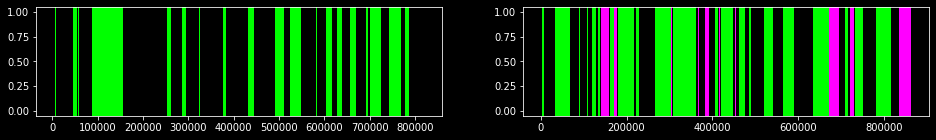

In [ ]:
# ------ bias frquency ------ #
len_df = len(res_df)

plt.figure(figsize=(16, 2))

ax1 = plt.subplot(121)
plt.fill_between(short_obj[-2].ravel(), 0, 1, where=short_bias_arr.ravel() > 0,
                facecolor='#00ff00', alpha=1, transform=ax1.get_xaxis_transform())   # 00ff00
# plt.fill_between(short_obj[-2].ravel(), 0, 1, where=short_bias_arr.ravel() < 1,
#                 facecolor='#ff00ff', alpha=1, transform=ax1.get_xaxis_transform())

ax2 = plt.subplot(122)
plt.fill_between(long_obj[-2].ravel(), 0, 1, where=long_bias_arr.ravel() > 0,
                facecolor='#00ff00', alpha=1, transform=ax2.get_xaxis_transform())
plt.fill_between(long_obj[-2].ravel(), 0, 1, where=long_bias_arr.ravel() < 1,
                facecolor='#ff00ff', alpha=1, transform=ax2.get_xaxis_transform())
plt.show()

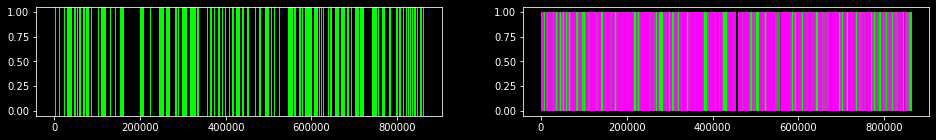

In [ ]:
# ------ bias frquency ------ #
len_df = len(res_df)

plt.figure(figsize=(16, 2))

ax1 = plt.subplot(121)
plt.fill_between(short_obj[-2].ravel(), 0, 1, where=short_bias_arr.ravel() > 0,
                facecolor='#00ff00', alpha=1, transform=ax1.get_xaxis_transform())   # 00ff00
# plt.fill_between(short_obj[-2].ravel(), 0, 1, where=short_bias_arr.ravel() < 1,
#                 facecolor='#ff00ff', alpha=1, transform=ax1.get_xaxis_transform())

ax2 = plt.subplot(122)
plt.vlines(long_obj[-2][long_bias_arr], ymin=0, ymax=1, color='#00ff00')
plt.vlines(long_obj[-2][~long_bias_arr], ymin=0, ymax=1, color='#ff00ff')
# [plt.axvline(x_, color='#ff00ff') for x_, bias_ in zip(long_obj[-2], long_bias_arr) if not bias_]
plt.show()

In [ ]:
%timeit -n1 -r10 plt.vlines(long_obj[-2][long_bias_arr], ymin=0, ymax=1, color='#00ff00')  # 528 ms per loop --> 8.71 ms per loop
%timeit -n1 -r10 [plt.axvline(x_, color='#00ff00') for x_, bias_ in zip(long_obj[-2], long_bias_arr) if bias_]

# np.sum(long_bias_arr == ~long_bias_arr)

In [ ]:
# %timeit -n1 -r10 [plt.axvline(x_) for x_, bias_ in zip(long_obj[-2].ravel(), long_bias_arr.ravel()) if bias_]
%timeit -n1 -r10 plt.fill_between(long_obj[-2].ravel(), 0, 1, where=long_bias_arr.ravel() > 0, facecolor='#00ff00', alpha=1, transform=ax2.get_xaxis_transform())

## plot_check_v3

In [20]:
# ------------------ plot_config ------------------ #
save_mode = 0

front_plot = 0    # 0 : p1_tick, 1 : p2_tick
back_plot = 4     # 0 : post_plot_size, 1 : open, 2 : p2_tick, 3 : ep_tick, 4 : tp_tick
x_max = 300       # back_plot : 0 사용시, custom x_max 반영됨

bias_plot = 0     # 1 : true_bias only, -1 : false_bias only, 0 : both

pr_descend = 1   # 1 : 큰 pr 부터, -1 : 작은 pr 부터, 0 : 순서대로

position = 1      # -1 : short, 0 & 1 : long

x_margin_mult = 1/30
y_margin_mult = 1/30  # 0 

prev_plotsize = 100 #  150 100 20 500 1000
post_plotsize = 200 #

inversion = 0
hedge = 0

# ------ show or save ------ #
if save_mode:
  plot_check_dir = current_path + "plot_check/" +  key.replace(".ftr", "")
  shutil.rmtree(plot_check_dir, ignore_errors=True)  # remove existing dir
  os.makedirs(plot_check_dir)
  print(plot_check_dir)
else:
  plot_check_dir = None

# ------------ 한 방향에 대해 plot_check 함 (by position var.) ------------ #
#   obj by position  
if position == -1:
  pos_str = "SELL"
  pr_, obj_ = short_pr, short_obj
  arr_list = [short_p2_idx_arr, short_lvrg_arr, short_fee_arr, short_tpout_arr, short_bias_arr, short_net_p1_bias_tick, short_tp_1, short_tp_0, short_out_1, short_out_0, short_ep2_0]
else:   # both option currently not supported
  pos_str = "BUY"
  pr_, obj_ = long_pr, long_obj
  arr_list = [long_p2_idx_arr, long_lvrg_arr, long_fee_arr, long_tpout_arr, long_bias_arr, long_net_p1_bias_tick, long_tp_1, long_tp_0, long_out_1, long_out_0, long_ep2_0]

if pr_descend:
  if pr_descend == -1:
    pr_descend = 0
  pr, obj, [p2_idx_arr, lvrg_arr, fee_arr, tpout_arr, bias_arr, bias_tick, tp_1, tp_0, out_1, out_0, ep2_0] = sort_bypr_v4(pr_, obj_, arr_list, descending=pr_descend)  # --> pr_descend 의 의미가 사라짐.. (false -> true plot 으로 이동한 것뿐)
else:
  pr, obj, [p2_idx_arr, lvrg_arr, fee_arr, tpout_arr, bias_arr, bias_tick, tp_1, tp_0, out_1, out_0, ep2_0] = pr_, obj_, arr_list

pr_msg = "%s\n {} ~ {} -> {:.5f}\n lvrg : {}\n fee : {:.4f}" % (pos_str)  # = data_window, pos_str 으로 이곳에서 정의함

try:   # wave_range 단독 실행의 경우 tr_arr 이 존재하지 않기 때문에 try 처리함
  res_df['short_tr_{}'.format(selection_id)].iloc[short_obj[-1].astype(int).ravel()] = short_tr_arr
  res_df['long_tr_{}'.format(selection_id)].iloc[long_obj[-1].astype(int).ravel()] = long_tr_arr
except:
  pass

if front_plot == 0:
  front_idx = obj[4]      # left_margin 기준 - open_idx
else:
  front_idx = p2_idx_arr  # left_margin 기준 - p2_idx

left_end_idx = front_idx - prev_plotsize  
right_end_idx = obj[3] + post_plotsize
invalid_left_end = np.sum(left_end_idx < 0)

np_plot_params = np.hstack((left_end_idx, right_end_idx, pr, *obj, p2_idx_arr, lvrg_arr, fee_arr, tpout_arr, tp_1, tp_0, out_1, out_0, ep2_0))[invalid_left_end:]  # all arr should have same dimension
# plot_idx = np.full(len(np_plot_params), True)

if bias_plot:
  if bias_plot == 1:
    bias_idx = bias_arr[invalid_left_end:].ravel()  # true_bias 만 plot
  else:
    bias_idx = ~bias_arr[invalid_left_end:].ravel()  # false_bias 만 plot
  
  # trendy_idx = bias_tick[invalid_left_end:] < config.tr_set.bias_tick  # temp location

  np_plot_params = np_plot_params[bias_idx] #  * trendy_idx]  

### session_plot

In [21]:
selection_id = config.selection_id

# ============ make col_idx_dict config ============ #
nonstep_col_list = []
step_col_list = []
step_col_list2 = []
stepmark_col_list = []
data_window_p1_col_list = []
data_window_p2_col_list = []

# ============ nonstep_col_list - add info(col, alpha, color, linewidth) ============ #
# nonstep_col_list.append([['close'], 1, '#ffffff', 2])

# ============ step_col_list - add info(col, alpha, color, linewidth) ============ #
# ------ htf_candle ------ #
# hc_tf1 = '5T'
# hc_tf2 = '15T'

# step_col_list.append([['open_{}'.format(hc_tf1), 'close_{}'.format(hc_tf1)], 1, '#ffffff', 2])
# step_col_list.append([['open_{}'.format(hc_tf2), 'close_{}'.format(hc_tf2)], 1, '#ffffff', 4])

# ------ resi_sup ------ #
# rs_tf = 'T'
# step_col_list.append([['resi_{}'.format(rs_tf), 'sup_{}'.format(rs_tf)], 1, '#ffeb3b', 1])
# step_col_list.append([['resi_out_{}'.format(rs_tf), 'sup_out_{}'.format(rs_tf)], 1, 'dodgerblue', 2])

# ------ wave_base ------ #
wave_itv1 = config.tr_set.wave_itv1
wave_itv2 = config.tr_set.wave_itv2
wave_period1 = config.tr_set.wave_period1
wave_period2 = config.tr_set.wave_period2

# step_col_list.append([['dc_base_{}{}'.format(wave_itv1, wave_period1)], 1, '#5b9cf6', 1])
# step_col_list.append([['dc_base_{}{}'.format(wave_itv2, wave_period2)], 1, '#5b9cf6', 5])

# step_col_list.append([['wave_low_fill_{}{}'.format(wave_tf, wave_period)], 1, '#ffeb3b', 1])
# step_col_list.append([['wave_high_fill_{}{}'.format(wave_tf, wave_period)], 1, '#ffeb3b', 1])
# step_col_list.append([['dc_upper_{}{}'.format(wave_tf, wave_period), 'dc_lower_{}{}'.format(wave_tf, wave_period)], 1, '#ffeb3b', 1])

# ------ dc ------ #
dc_tf1 = 'T'
dc_period1 = 20 # wave_period2  # 20
dc_tf2 = '5T'
dc_period2 = 20 # config.loc_set.point2.csd_period if config.loc_set.point2.csd_period != "None" else wave_period2 
dc_tf3 = '15T'
dc_period3 = 20
dc_tf3 = 'H'
dc_period3 = 20

# step_col_list.append([['dc_upper_{}{}'.format(dc_tf1, dc_period1), 'dc_lower_{}{}'.format(dc_tf1, dc_period1)], 1, '#ff00ff', 1]),  # inner #ffeb3b
step_col_list.append([['dc_base_{}{}'.format(dc_tf1, dc_period1)], 1, '#5b9cf6', 1]) # ffee58 5b9cf6 
# step_col_list.append([['dc_upper_{}{}'.format(dc_tf2, dc_period2), 'dc_lower_{}{}'.format(dc_tf2, dc_period2)], 1, '#ffee58', 2]),  # inner #ffeb3b
step_col_list.append([['dc_base_{}{}'.format(dc_tf2, dc_period2)], 1, '#5b9cf6', 3]) # ffee58 5b9cf6
step_col_list.append([['dc_base_{}{}'.format(dc_tf3, dc_period3)], 1, '#5b9cf6', 5]) # ffee58 5b9cf6
step_col_list.append([['dc_base_{}{}'.format(dc_tf3, dc_period3)], 1, '#5b9cf6', 7]) # ffee58 5b9cf6

# ------ bb ------ #
bb_tf1 = 'T'
bb_period1 = 60

# step_col_list.append([['bb_upper_{}{}'.format(bb_tf1, bb_period1), 'bb_lower_{}{}'.format(bb_tf1, bb_period1)], 1, '#ffffff', 1])
# step_col_list.append([['bb_upper2_{}{}'.format(bb_tf1, bb_period1), 'bb_lower2_{}{}'.format(bb_tf1, bb_period1)], 1, '#ffffff', 1])
# step_col_list.append([['bb_upper3_{}{}'.format(bb_tf1, bb_period1), 'bb_lower3_{}{}'.format(bb_tf1, bb_period1)], 1, '#ffffff', 1])
# step_col_list.append([['bb_base_{}{}'.format(bb_tf1, bb_period1)], 1, '#00ff00', 1])


# ------ ma / ema ------ #
# step_col_list.append([['ema_5T'], 1, '#03ed30', 2])

ma_period = 60
step_col_list.append([['ma_T{}'.format(ma_period)], 1, '#03ed30', 2])
# step_col_list.append([['long_ma_T{}_-1'.format(ma_period)], 1, '#03ed30', 2])

# ============ step_col_list2 - add info(col, alpha, color, linewidth) ============ #
# ------ cci ------ #
step_col_list2.append([['cci_{}{}'.format(wave_itv1, wave_period1)], 1, '#00ff00', 3])
step_col_list2.append([['cci_{}{}'.format(wave_itv2, wave_period2)], 1, '#00ff00', 1])

# ------ stoch ------ #
# step_col_list2.append([['stoch_{}{}33'.format(wave_itv1, wave_period1)], 1, '#00ff00', 3])

# ------ macd ------ #
# step_col_list2.append([['macd_T535'], 1, '#00ff00', 1])


# ============ stepmark_col_list - add info(col, alpha, color, linewidth, marker_style) ============ #
# stepmark_col_list.append([['sar_T'], 1, 'dodgerblue', 7])

# ------ wave_range ------ #
stepmark_col_list.append([['wave_low_fill_{}{}'.format(wave_itv1, wave_period1)], 1, '#e91e63', 10, '*'])
stepmark_col_list.append([['wave_high_fill_{}{}'.format(wave_itv1, wave_period1)], 1, '#2962ff', 10, '*'])

stepmark_col_list.append([['wave_low_fill_{}{}'.format(wave_itv2, wave_period2)], 1, '#ff00ff', 7, '*'])
stepmark_col_list.append([['wave_high_fill_{}{}'.format(wave_itv2, wave_period2)], 1, '#00ff00', 7, '*'])
  
# stepmark_col_list.append([['wave_co_marker_{}{}'.format(wave_itv1, wave_period1)], 1, '#00ff00', 3, 'o'])
# stepmark_col_list.append([['wave_cu_marker_{}{}'.format(wave_itv1, wave_period1)], 1, '#ff00ff', 3, 'o'])

# ============ data_window_col_list ============ #
# ------ wrr ------ #
# data_window_col_list.append([['cu_wrr_21_{}{}'.format(wave_itv1, wave_period1)], 'cu_wrr_21_{}{}'.format(wave_itv1, wave_period1)])
# data_window_col_list.append([['co_wrr_21_{}{}'.format(wave_itv1, wave_period1)], 'co_wrr_21_{}{}'.format(wave_itv1, wave_period1)])
data_window_p1_col_list.append([['cu_wrr_32_{}{}'.format(wave_itv1, wave_period1)], 'cu_wrr_32_{}{}'.format(wave_itv1, wave_period1)])
data_window_p1_col_list.append([['co_wrr_32_{}{}'.format(wave_itv1, wave_period1)], 'co_wrr_32_{}{}'.format(wave_itv1, wave_period1)])
# data_window_p2_col_list.append([['cu_wrr_32_{}{}'.format(wave_itv2, wave_period2)], 'cu_wrr_32_{}{}'.format(wave_itv2, wave_period2)])
# data_window_p2_col_list.append([['co_wrr_32_{}{}'.format(wave_itv2, wave_period2)], 'co_wrr_32_{}{}'.format(wave_itv2, wave_period2)])

data_window_p1_col_list.append([['short_tr_{}'.format(selection_id)], 'short_tr_{}'.format(selection_id)])
data_window_p1_col_list.append([['long_tr_{}'.format(selection_id)], 'long_tr_{}'.format(selection_id)])


# ====== str to numbcol ====== #
nonstep_col_arr = strcol_tonumb(res_df, nonstep_col_list)
step_col_arr = strcol_tonumb(res_df, step_col_list)
step_col_arr2 = strcol_tonumb(res_df, step_col_list2)
stepmark_col_arr = strcol_tonumb(res_df, stepmark_col_list)
data_window_p1_col_arr = strcol_tonumb(res_df, data_window_p1_col_list)
data_window_p2_col_arr = strcol_tonumb(res_df, data_window_p2_col_list)

col_idx_dict = \
{
  "ohlc_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close']),
  "vp_col_idxs": get_col_idxs(res_df, ['close', 'volume']),
  "post_cu_idx": get_col_idxs(res_df, ['wave_cu_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)]),
  "post_co_idx": get_col_idxs(res_df, ['wave_co_post_idx_fill_{}{}'.format(wave_itv1, wave_period1)]),
  # "post_cu_idx": get_col_idxs(res_df, ['wave_cu_prime_idx_fill_{}{}'.format(wave_itv1, wave_period1)]),
  # "post_co_idx": get_col_idxs(res_df, ['wave_co_prime_idx_fill_{}{}'.format(wave_itv1, wave_period1)]),
  # "ohlc_col_idxs": get_col_idxs(res_df, ['haopen', 'hahigh', 'halow', 'haclose']),  # heikin-ashi ver.
  "nonstep_col_info": nonstep_col_arr,
  "step_col_info": step_col_arr,
  "step_col_info2": step_col_arr2,
  "stepmark_col_info": stepmark_col_arr,
  "data_window_p1_col_info": data_window_p1_col_arr,
  "data_window_p2_col_info": data_window_p2_col_arr,
  "ylim_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close', 'short_tp_1_{}'.format(selection_id), 'long_tp_1_{}'.format(selection_id), 'short_tp_0_{}'.format(selection_id), 'long_tp_0_{}'.format(selection_id)])  
}   
#   'wave_low_fill_{}{}'.format(wave_itv2, wave_period2), 'wave_high_fill_{}{}'.format(wave_itv2, wave_period2)
#   'dc_upper_H', 'dc_lower_H', 'dc_upper_15T', 'dc_lower_15T', 'short_out_{}'.format(selection_id), 'long_out_{}'.format(selection_id)
#   'wave_1_{}'.format(wave_itv2), 'wave_0_{}'.format(wave_itv2), 'dc_upper_15T', 'dc_lower_15T'

/content/drive/My Drive/Colab Notebooks/JnQ/funcs/funcs_plot_check.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  step_col_arr = np.array(col_list)


#### session_plot main

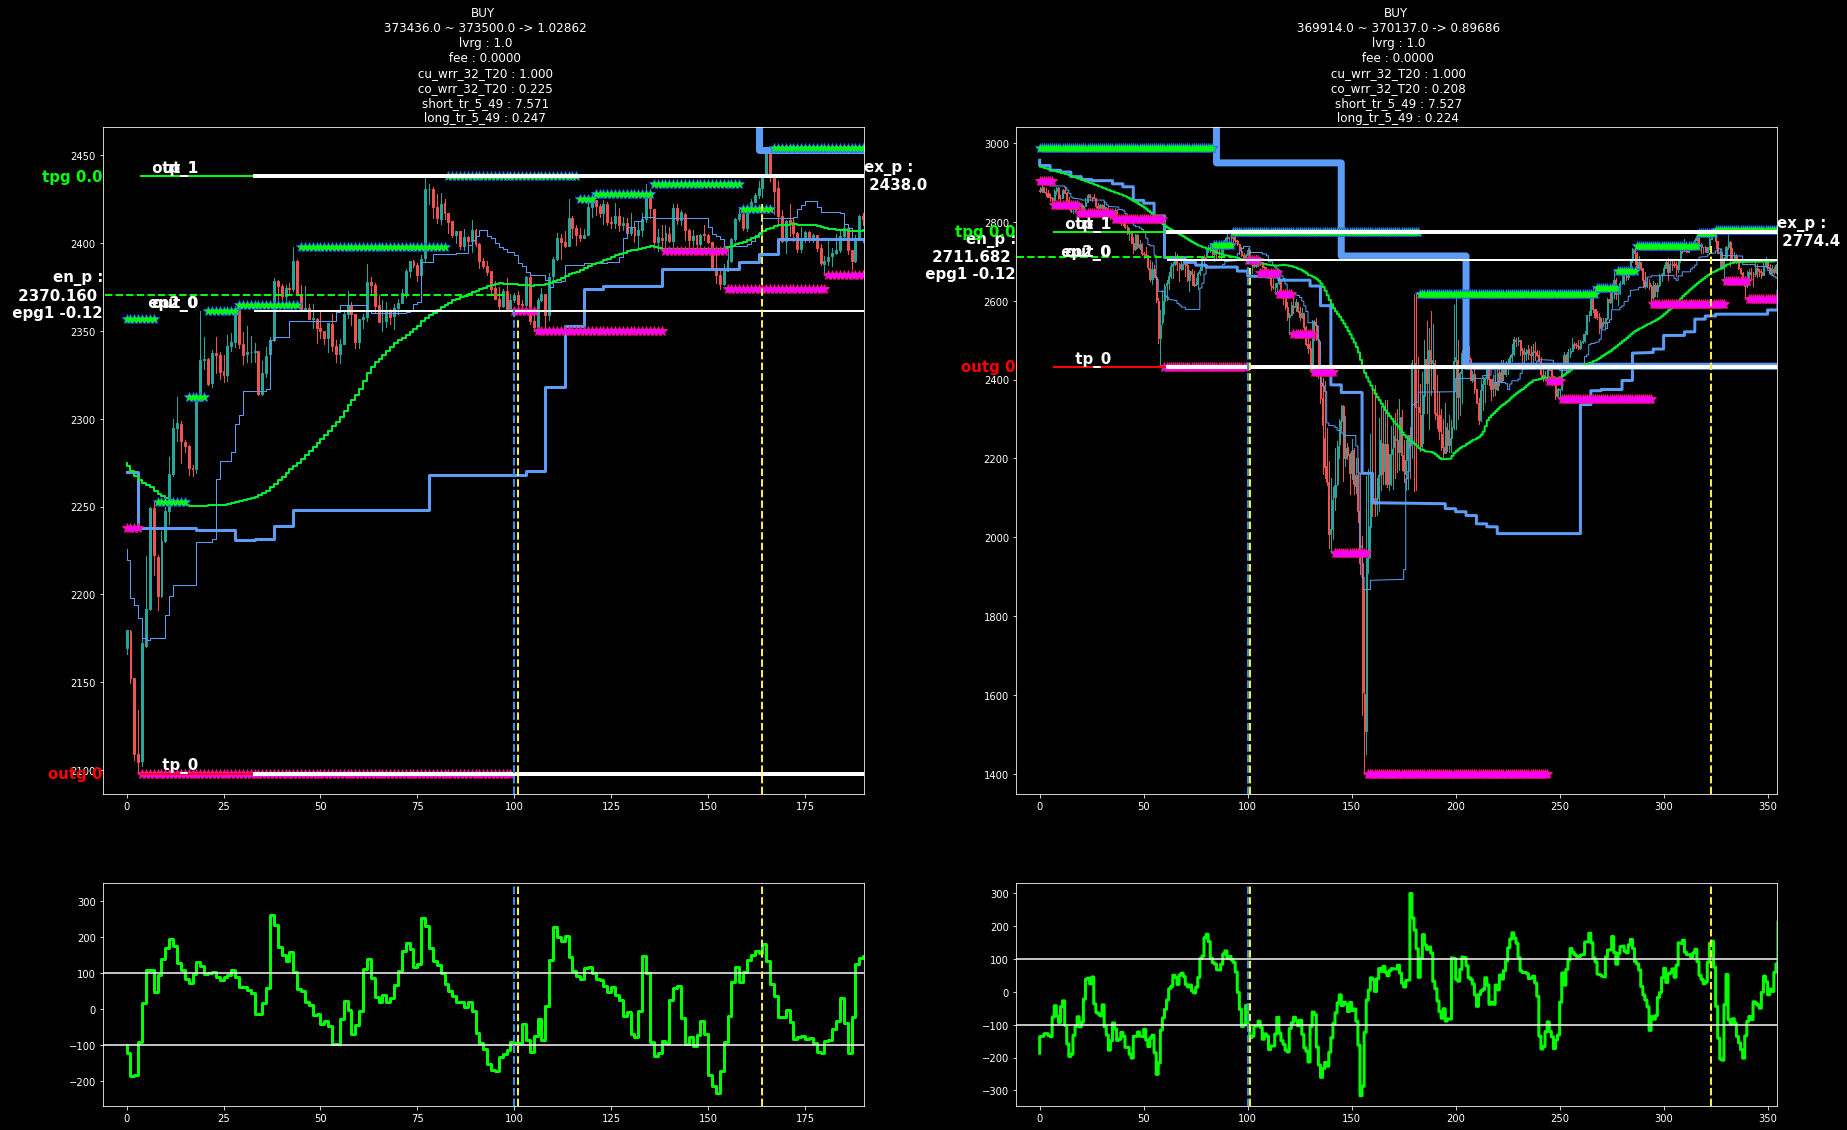

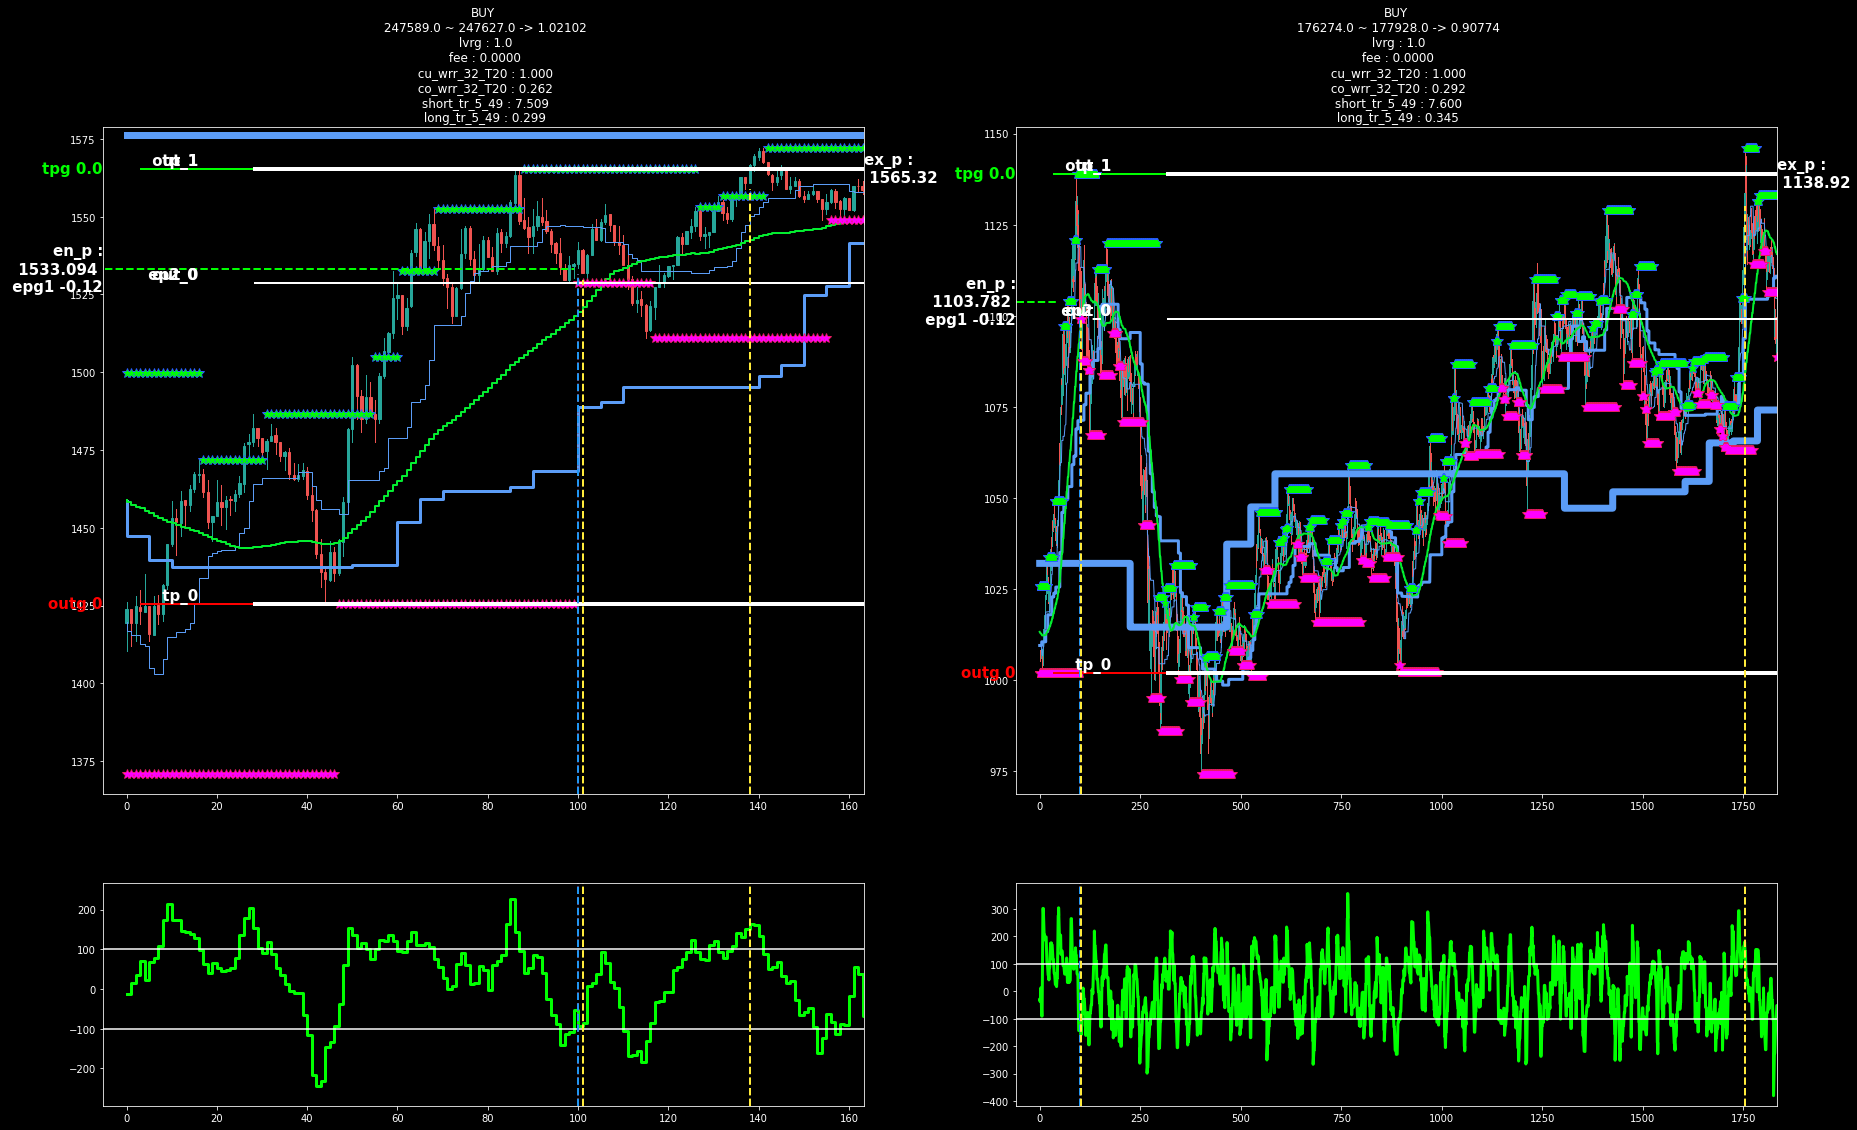

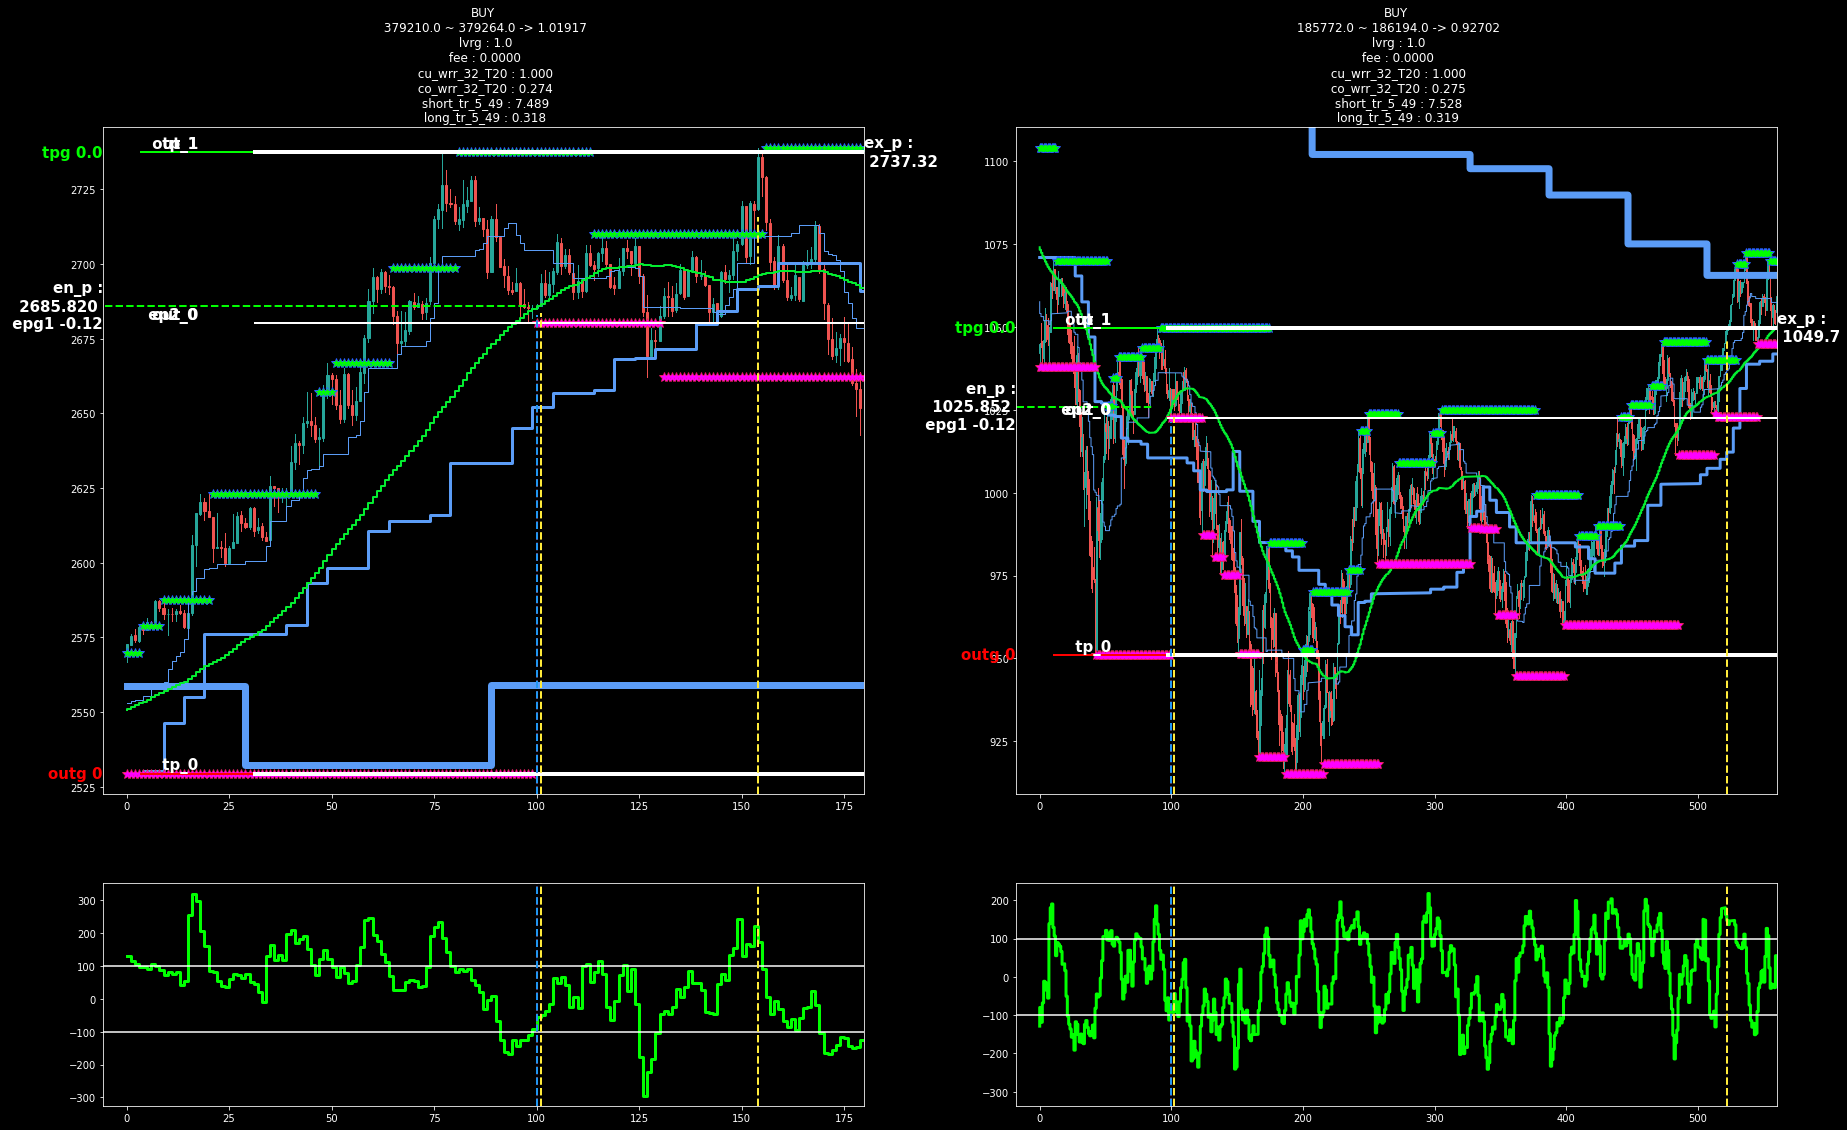

KeyboardInterrupt: ignored

In [22]:
# p2_hlm 의 경우, tr 확인을 우해 session_plot 우선 실행 필요함
_ = [plot_check_v9(res_df, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, back_plot, plot_check_dir, **col_idx_dict) for param_zip in zip(np_plot_params, np_plot_params[::-1])]

### whole_plot

In [ ]:
s_id = config.selection_id

# ------------ make col_idx_dict config ------------ #
nonstep_col_list = []
step_col_list = []
stepmark_col_list = []

# ============ nonstep_col_list - add info(col, alpha, color, linewidth) ============ #
# nonstep_col_list.append([['close'], 1, '#ffffff', 2])

# ============ step_col_list - add info(col, alpha, color, linewidth) ============ #
# ------ htf_candle ------ #
hc_tf1 = '15T'
hc_tf2 = 'H'
hc_tf3 = '4H'

step_col_list.append([['open_{}'.format(hc_tf1), 'close_{}'.format(hc_tf1)], 1, '#ffffff', 1])
step_col_list.append([['open_{}'.format(hc_tf2), 'close_{}'.format(hc_tf2)], 1, '#ffffff', 2])
# step_col_list.append([['open_{}'.format(hc_tf3), 'close_{}'.format(hc_tf3)], 1, '#ffffff', 4])

# ------ resi_sup ------ #
# rs_tf = 'T'
# step_col_list.append([['resi_{}'.format(rs_tf), 'sup_{}'.format(rs_tf)], 1, '#ffeb3b', 1])
# step_col_list.append([['resi_out_{}'.format(rs_tf), 'sup_out_{}'.format(rs_tf)], 1, 'dodgerblue', 2])

# ------ wave_range ------ #
wave_tf1 = config_list[0].tr_set.p1_itv1
wave_period1, wave_period2 = config_list[0].tr_set.p1_period1, config_list[0].tr_set.p1_period2

# step_col_list.append([['dc_upper_{}{}'.format(wave_tf1, wave_period1), 'dc_lower_{}{}'.format(wave_tf1, wave_period1)], 1, '#ffeb3b', 1])
# step_col_list.append([['dc_upper_{}{}'.format(wave_tf1, wave_period2), 'dc_lower_{}{}'.format(wave_tf1, wave_period2)], 1, '#ffeb3b', 1])

# step_col_list.append([['dc_upper_{}{}'.format(wave_tf2, wave_period2), 'dc_lower_{}{}'.format(wave_tf2, wave_period2)], 1, '#e65100', 2])

# ------ dc ------ #
dc_tf1 = '5T'
dc_period1 = 20
dc_tf2 = 'H'
dc_period2 = 20
# step_col_list.append([['dc_upper_{}{}'.format(dc_tf1, dc_period1), 'dc_lower_{}{}'.format(dc_tf1, dc_period1)], 1, '#ffeb3b', 1]),  # inner
# step_col_list.append([['dc_base_{}{}'.format(dc_tf1, dc_period1)], 1, '#5b9cf6', 1])
step_col_list.append([['dc_upper_{}{}'.format(dc_tf2, dc_period2), 'dc_lower_{}{}'.format(dc_tf2, dc_period2)], 1, '#ff00ff', 4]),  # inner
step_col_list.append([['dc_base_{}{}'.format(dc_tf2, dc_period2)], 1, '#5b9cf6', 4])

# ------ bb ------ #
bb_tf1 = 'T'
bb_period1 = 20

# step_col_list.append([['bb_upper_{}{}'.format(bb_tf1, bb_period1), 'bb_lower_{}{}'.format(bb_tf1, bb_period1)], 1, '#ffffff', 1])
# step_col_list.append([['bb_base_{}{}'.format(bb_tf1, bb_period1)], 1, '#00ff00', 1])

# step_col_list.append([['bb_upper_{}'.format(tf2), 'bb_lower_{}'.format(tf2)], 1, '#e91e63', 4])

# ------ ema ------ #
# step_col_list.append([['ema_5T'], 1, '#03ed30', 2])

# ============ stepmark_col_list - add info(col, alpha, color, linewidth) ============ #
# stepmark_col_list.append([['sar_T'], 1, 'dodgerblue', 7])


# ============ str to numbcol ============ #
nonstep_col_arr = strcol_tonumb(res_df, nonstep_col_list)
step_col_arr = strcol_tonumb(res_df, step_col_list)
stepmark_col_arr = strcol_tonumb(res_df, stepmark_col_list)

col_idx_dict = \
{
  "ohlc_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close']),
  "vp_col_idxs": get_col_idxs(res_df, ['close', 'volume']),
  # "ohlc_col_idxs": get_col_idxs(res_df, ['haopen', 'hahigh', 'halow', 'haclose']),  # heikin-ashi ver.
  "nonstep_col_info": nonstep_col_arr,
  "step_col_info": step_col_arr,
  "stepmark_col_info": stepmark_col_arr,
  "ylim_col_idxs": get_col_idxs(res_df, ['open', 'high', 'low', 'close', 'dc_upper_15T4', 'dc_lower_15T4'])  # , 'dc_upper_H', 'dc_lower_H', 'dc_upper_15T', 'dc_lower_15T', 'short_out_{}'.format(selection_id), 'long_out_{}'.format(selection_id)
}   # , 'wave_1_{}'.format(wave_tf2), 'wave_0_{}'.format(wave_tf2), 'dc_upper_15T', 'dc_lower_15T'

#### whole_plot main

In [ ]:
plot_op_idx_nums = 10

win_idxs = (pr_ > 1).ravel()  # [-plot_op_idx_nums:]
selected_op_idxs = obj_[4].ravel().astype(int)  # [-plot_op_idx_nums:]
selected_ex_idxs = obj_[3].ravel().astype(int)  # [-plot_op_idx_nums:]

len_idxs = len(win_idxs)
print("len_idxs :", len_idxs)

split_range = np.arange(plot_op_idx_nums, len_idxs, plot_op_idx_nums)
win_idxs_list = np.split(win_idxs, split_range, axis=0)
selected_op_idxs_list = np.split(selected_op_idxs, split_range, axis=0)
selected_ex_idxs_list = np.split(selected_ex_idxs, split_range, axis=0)

In [ ]:
_ = [whole_plot_check(np_df, a, b, c, plot_check_dir=None, **col_idx_dict) for a, b, c in zip(win_idxs_list, selected_op_idxs_list, selected_ex_idxs_list)]

### plot_funcs

In [ ]:
def whole_plot_check(data, win_idxs, selected_op_idxs, selected_ex_idxs, plot_check_dir=None, **col_idx_dict):
  # start_0 = time.time()
  plt.style.use(['dark_background', 'fast'])
  fig = plt.figure(figsize=(30, 12))
  nrows, ncols = 1, 1
  gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                          ncols=ncols,
                          #height_ratios=[31, 1]
                          )

  ax = fig.add_subplot(gs[0])

  # ------------ add_col section ------------ #
  a_data = data[selected_op_idxs[0]:selected_op_idxs[-1] + 1]

  plot_op_idxs = selected_op_idxs - selected_op_idxs[0]  
  plot_win_op_idxs = plot_op_idxs[win_idxs]
  plot_loss_op_idxs = plot_op_idxs[~win_idxs]

  plot_ex_idxs = selected_ex_idxs - selected_op_idxs[0]
  plot_win_ex_idxs = plot_ex_idxs[win_idxs]
  plot_loss_ex_idxs = plot_ex_idxs[~win_idxs]


  # ------ add cols ------ #
  [nonstep_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['nonstep_col_info']]
  [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]
  [stepmark_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['stepmark_col_info']]

  # [plt.axvline(op_idx, color='#00ff00') for op_idx in plot_win_op_idxs]
  # [plt.axvline(op_idx, color='#ff0000') for op_idx in plot_loss_op_idxs]
  [plt.axvspan(op_idx, ex_idx, alpha=0.5, color='#00ff00') for op_idx, ex_idx in zip(plot_win_op_idxs, plot_win_ex_idxs)]
  [plt.axvspan(op_idx, ex_idx, alpha=0.5, color='#ff0000') for op_idx, ex_idx in zip(plot_loss_op_idxs, plot_loss_ex_idxs)]
  
  plt.show()

  if plot_check_dir is None:
    plt.show()
    print()
  else:
    fig_name = plot_check_dir + "/whole_plot_{}.png".format(selected_op_idxs[0])
    plt.savefig(fig_name)
    print(fig_name, "saved !")
  plt.close()
  # print("elapsed time :", time.time() - start_0)

  return

def plot_check_v9(res_df, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, back_plot, plot_check_dir=None, **col_idx_dict):
  # start_0 = time.time()
  plt.style.use(['dark_background', 'fast'])
  fig = plt.figure(figsize=(30, 18))
  nrows, ncols = 2, 2
  gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                         ncols=ncols,
                         height_ratios=[3, 1]
                         )
  for gs_idx, params in enumerate(param_zip):

    iin, iout, pr, en_p, ex_p, entry_idx, exit_idx, p1_idx, p2_idx, lvrg, fee, tp_line, out_line, tp_1, tp_0, out_1, out_0, ep2_0 = params

    # print("en_p, ex_p :", en_p, ex_p)
    # print("tp_line, out_line, ep2_0 :", tp_line, out_line, ep2_0)

    # temporary
    # if exit_idx - p1_idx < 50:
    # if exit_idx != entry_idx:
    # print("p1_idx :", p1_idx)
    # if p1_idx != 370259:
    #   break

    # ============ define ax1 & ax2 ============ #
    ax1 = fig.add_subplot(gs[gs_idx])
    ax2 = fig.add_subplot(gs[gs_idx + 2])

    # ------ date range ------ #
    if back_plot == 0:
      iout = iin + x_max
      # print("iin, iout :", iin, iout)

    a_data = res_df.iloc[int(iin):int(iout + 1)].to_numpy()
    # a_data = data[iin:iout]

    # ------------ add_col section ------------ #
    # ------ candles ------ #
    candle_plot_v2(ax1, a_data[:, col_idx_dict['ohlc_col_idxs']], alpha=1.0, wickwidth=1.0)

    # ------ add cols ------ #
    [nonstep_col_plot_v2(ax1, a_data[:, params_[0]], *params_[1:]) for params_ in col_idx_dict['nonstep_col_info']]
    [step_col_plot_v2(ax1, a_data[:, params_[0]], *params_[1:]) for params_ in col_idx_dict['step_col_info']]
    [stepmark_col_plot_v2(ax1, a_data[:, params_[0]], *params_[1:]) for params_ in col_idx_dict['stepmark_col_info']]

    [step_col_plot_v2(ax2, a_data[:, params_[0]], *params_[1:]) for params_ in col_idx_dict['step_col_info2']]

    # ------ get vp_info ------ #
    kde_factor = 0.1   # 커질 수록 전체적인 bars_shape 이 곡선이됨, 커질수록 latency 좋아짐 (0.00003s 정도)
    num_samples = 100  # plot 되는 volume bars (y_axis) 와 비례관계
    # vp_data = data[iin - 500:iin, col_idx_dict['vp_col_idxs']].T  # Todo, vp_range should be calculated by wave_point

    if tp_1 < out_0:  # SELL order
      post_co_idx = res_df.iloc[int(p1_idx), col_idx_dict['post_co_idx']]
      # vp_iin = res_df.iloc[int(p1_idx) - 1, col_idx_dict['post_cu_idx']].to_numpy()  # Todo, co_idx 와 co_post_idx 의 차별을 위해서 -1 해줌 <-- 중요 point
      vp_iin = res_df.iloc[post_co_idx, col_idx_dict['post_cu_idx']].to_numpy()  # Todo, co_idx 와 co_post_idx 의 차별을 위해서 -1 해줌 <-- 중요 point
    else:
      post_cu_idx = res_df.iloc[int(p1_idx), col_idx_dict['post_cu_idx']]
      # vp_iin = res_df.iloc[int(p1_idx) - 1, col_idx_dict['post_co_idx']].to_numpy()
      vp_iin = res_df.iloc[int(post_cu_idx), col_idx_dict['post_co_idx']].to_numpy()
    # print("iin, vp_iin, p1_idx :", iin, vp_iin, p1_idx)

    vp_data = res_df.iloc[int(vp_iin):int(p1_idx), col_idx_dict['vp_col_idxs']].to_numpy().T  # Todo, vp_range should be calculated by wave_point
    # print("vp_data :", vp_data)
    # vp_info = [vp_range, *vp_data, kde_factor, num_samples]
    vp_info = [*vp_data, kde_factor, num_samples]

    # ------ ep, tp + xlim ------ #
    try:
      eptp_hvline_v9_1(ax1, ax2, config, *params, back_plot, x_max, x_margin_mult, y_margin_mult, a_data, vp_info, **col_idx_dict)
    except Exception as e:
      print("error in eptp_hvline :", e)

    #     Todo    #
    #     3. outer_price plot 일 경우, gs_idx + nrows 하면 됨

    # ------ trade_info ------ #
    data_msg_list = ["\n {} : {:.3f}".format(*params_[1:], *res_df.iloc[int(p1_idx), params_[0]]) for params_ in col_idx_dict['data_window_p1_col_info']]  # * for unsupported format for arr
    data_msg_list += ["\n {} : {:.3f}".format(*params_[1:], *res_df.iloc[int(p2_idx), params_[0]]) for params_ in col_idx_dict['data_window_p2_col_info']]
    ps_msg_expand = pr_msg.format(p1_idx, exit_idx, pr, lvrg, fee) + ''.join(data_msg_list)
    
    ax1.set_title(ps_msg_expand)   # set_title on ax1

  if plot_check_dir is None:
    plt.show()
    print()
  else:
    fig_name = plot_check_dir + "/{}.png".format(int(entry_idx))
    plt.savefig(fig_name)
    print(fig_name, "saved !")
  plt.close()
  # print("elapsed time :", time.time() - start_0)

  return

def eptp_hvline_v9_1(ax1, ax2, config, iin, iout, pr, en_p, ex_p, entry_idx, exit_idx, p1_idx, p2_idx, lvrg, fee, tp_line, out_line, tp_1, tp_0, out_1, out_0, ep2_0,
                   back_plot, x_max, x_margin_mult, y_margin_mult, a_data, vp_info, **col_idx_dict):
  # ------ get vertical ticks ------ #
  entry_tick = int(entry_idx - iin)
  exit_tick = entry_tick + int(exit_idx - entry_idx)
  p1_tick = entry_tick - int(entry_idx - p1_idx)
  p2_tick = p1_tick + int(p2_idx - p1_idx)

  if back_plot == 1:
    x_max = p1_tick + 20
  elif back_plot == 2:
    x_max = p2_tick + 20 
  elif back_plot == 3:
    x_max = entry_tick + 20 
  elif back_plot == 4:
    x_max = exit_tick + 20

  # ============ xlim ============ #
  if (iout - iin) > x_max:
    x_margin = x_max * x_margin_mult
    ax1.set_xlim(0 - x_margin, x_max + x_margin)
    ax2.set_xlim(0 - x_margin, x_max + x_margin)
  x0, x1 = ax1.get_xlim()

  # ============ hlines ============ #
  # ------------ ax1 ------------ #
  # ------ entry & exit ------ #
  en_xmin = entry_tick / x1
  ex_xmin = exit_tick / x1
  ax1.axhline(en_p, x0, en_xmin, linewidth=2, linestyle='--', alpha=1, color='lime')  # en_p line axhline
  if config.tr_set.check_hlm in [0, 1]:
    ax1.text(x0, en_p, 'en_p :\n {:.3f} \n epg1 {}'.format(en_p, config.tr_set.ep_gap1), ha='right', va='center', fontweight='bold', fontsize=15)  # en_p line label
  else:
    ax1.text(x0, en_p, 'en_p :\n {:.3f} \n epg2 {}'.format(en_p, config.tr_set.ep_gap2), ha='right', va='center', fontweight='bold', fontsize=15)  # en_p line label
  ax1.axhline(ex_p, ex_xmin, 1, linewidth=2, linestyle='--', alpha=1, color='lime')  # ex_p line axhline (signal 도 포괄함, 존재 의미)
  ax1.text(x1, ex_p, 'ex_p :\n {}'.format(ex_p), ha='left', va='center', fontweight='bold', fontsize=15)  # ex_p line label

  # ------ tpout_line ------ #
  ax1.axhline(tp_line, 0.05, 1, linewidth=2, linestyle='-', alpha=1, color='#00ff00')  # ep 와 gap 비교 용이하기 위해 ex_xmin -> 0.1 사용
  ax1.text(x0, tp_line, 'tpg {}'.format(config.tr_set.tp_gap), ha='right', va='center', fontweight='bold', fontsize=15, color='#00ff00')
  ax1.axhline(out_line, 0.05, 1, linewidth=2, linestyle='-', alpha=1, color='#ff0000')
  ax1.text(x0, out_line, 'outg {}'.format(config.tr_set.out_gap), ha='right', va='center', fontweight='bold', fontsize=15, color='#ff0000')

  # ------ tp_box ------ #
  text_x_pos = (x0 + x1) * 0.1
  ax1.axhline(tp_1, 0.2, 1, linewidth=4, linestyle='-', alpha=1, color='#ffffff')
  ax1.text(text_x_pos, tp_1, ' tp_1', ha='right', va='bottom', fontweight='bold', fontsize=15)
  ax1.axhline(tp_0, 0.2, 1, linewidth=4, linestyle='-', alpha=1, color='#ffffff')
  ax1.text(text_x_pos, tp_0, ' tp_0', ha='right', va='bottom', fontweight='bold', fontsize=15)  

  # ------ out_box ------ #
  # text_x_pos = (x0 + x1) * 0.1
  ax1.axhline(out_1, 0.2, 1, linewidth=2, linestyle='-', alpha=1, color='#ffffff')
  ax1.text(text_x_pos, out_1, ' out_1', ha='right', va='bottom', fontweight='bold', fontsize=15)
  ax1.axhline(out_0, 0.2, 1, linewidth=2, linestyle='-', alpha=1, color='#ffffff')
  ax1.text(text_x_pos, out_0, ' out_0', ha='right', va='bottom', fontweight='bold', fontsize=15)  
  # ------ ep_box ------ #
  # text_x_pos = (x0 + x1) * 0.1
  ax1.axhline(ep2_0, 0.2, 1, linewidth=1, linestyle='-', alpha=1, color='#ffffff')
  ax1.text(text_x_pos, ep2_0, ' ep2_0', ha='right', va='bottom', fontweight='bold', fontsize=15)
  
  # ------ volume profile ------ #
  close, volume, kde_factor, num_samples = vp_info
  # if iin >= vp_range:
  # start_0 = time.time()
  kde = stats.gaussian_kde(close, weights=volume, bw_method=kde_factor)
  kdx = np.linspace(close.min(), close.max(), num_samples)
  kdy = kde(kdx)
  kdy_max = kdy.max()
  # print("kde elapsed_time :", time.time() - start_0)

  # peaks,_ = signal.find_peaks(kdy, prominence=kdy_max * 0.3)   # get peak_entries
  # peak_list = kdx[peaks]   # peak_list
  # [ax1.axhline(peak, linewidth=1, linestyle='-', alpha=1, color='orange') for peak in peak_list]
  
  kdy_ratio = p1_tick / kdy_max # 30 / 0.0001   # max_value 가 p1_tick 까지 닿을 수 있게.
  # print("kdx :", kdx)
  # ax1.plot(kdy * kdy_ratio, kdx, color='white')  # Todo, bars 가능 ?
  # ax1.barh(kdy * kdy_ratio, kdx, color='white')  # Todo, bars 가능 ?
  ax1.barh(kdx, kdy * kdy_ratio, color='#00ff00', alpha=0.5)  # Todo, bars 가능 ?

  # ------------ ax2 ------------ #
  # ------ cci_band ------ #
  ax2.axhline(100, color="#ffffff")
  ax2.axhline(-100, color="#ffffff")

  # ------ stoch_band ------ #
  # ax2.axhline(67, color="#ffffff")
  # ax2.axhline(33, color="#ffffff")
  
  # ax2.axhline(0, color="#ffffff")

  # ============ ylim ============ # - ax1 only
  if back_plot:
    y_lim_data = a_data[:x_max + 1, col_idx_dict['ylim_col_idxs']]  # +1 for including p1_tick
  else:
    y_lim_data = a_data[:, col_idx_dict['ylim_col_idxs']]
  
  y_min = y_lim_data.min()
  y_max = y_lim_data.max()
  y_margin = (y_max - y_min) * y_margin_mult
  ax1.set_ylim(y_min - y_margin, y_max + y_margin)

  # ============ vline (p1_tick, entry_tick, exit_tick) ============ # - add p1_tick on ax2
  y0, y1 = ax1.get_ylim()
  low_data = a_data[:exit_tick + 1, col_idx_dict['ohlc_col_idxs'][2]]  # +1 for including exit_tick
  p2_ymax, en_ymax, ex_ymax = [(low_data[tick_] - y0) / (y1 - y0) - .01 for tick_ in [p2_tick, entry_tick, exit_tick]]  # -.05 for margin
  if p1_tick > 0:
    p1_ymax = (low_data[p1_tick] - y0) / (y1 - y0) - .01
    ax1.axvline(p1_tick, 0, p1_ymax, alpha=1, linewidth=2, linestyle='--', color='#ff0000')  # 추후, tick 별 세부 정의가 달라질 수 있음을 고려해 multi_line 작성 유지
    ax2.axvline(p1_tick, 0, 1, alpha=1, linewidth=2, linestyle='--', color='#ff0000')
  ax1.axvline(p2_tick, 0, p2_ymax, alpha=1, linewidth=2, linestyle='--', color='#2196f3')
  ax1.axvline(entry_tick, 0, en_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')
  ax1.axvline(exit_tick, 0, ex_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')
  ax2.axvline(p2_tick, 0, 1, alpha=1, linewidth=2, linestyle='--', color='#2196f3')
  ax2.axvline(entry_tick, 0, 1, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')
  ax2.axvline(exit_tick, 0, 1, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')

  return

#### legacy

In [ ]:
_ = [plot_check_v4(np_df, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, front_plot, plot_check_dir, 500, 0.07, 100, **col_idx_dict) for param_zip in zip(np_plot_params, np_plot_params[::-1])]

In [ ]:
def plot_check_v4(data, config, param_zip, pr_msg, x_max, x_margin_mult, y_margin_mult, front_plot, plot_check_dir=None, vp_range=500, kde_factor=0.05, num_samples=100, **col_idx_dict):
  # start_0 = time.time()
  plt.style.use(['dark_background', 'fast'])
  fig = plt.figure(figsize=(30, 18))
  nrows, ncols = 2, 2
  gs = gridspec.GridSpec(nrows=nrows,  # row 부터 index 채우고 col 채우는 순서임 (gs_idx)
                         ncols=ncols,
                         height_ratios=[3, 1]
                         )
  for gs_idx, params in enumerate(param_zip):
    ax = fig.add_subplot(gs[gs_idx])
    iin, iout, pr, ep, tp, entry_idx, exit_idx, open_idx, lvrg, fee, tp_line, out_line, bias_info, bias_thresh = params

    # ------------ add_col section ------------ #
    iin, iout = int(iin), int(iout)
    a_data = data[iin:iout]
    # ------ candles ------ #
    candle_plot(a_data[:, col_idx_dict['ohlc_col_idxs']], ax, alpha=1.0, wickwidth=1.0)
    
    # ------ add cols ------ #
    [nonstep_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['nonstep_col_info']]
    [step_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['step_col_info']]
    [stepmark_col_plot(a_data[:, params[0]], *params[1:]) for params in col_idx_dict['stepmark_col_info']]

    # vp_data = data[iin - vp_range:iin, col_idx_dict['vp_col_idxs']]
    # vp_info = [vp_range, vp_data[:, 0], vp_data[:, 1], kde_factor, num_samples]
    vp_data = data[iin - vp_range:iin, col_idx_dict['vp_col_idxs']].T
    vp_info = [vp_range, *vp_data, kde_factor, num_samples]

    # ------ ep, tp + xlim ------ #
    eptp_hvline_v4(config, ep, tp, entry_idx, exit_idx, open_idx, tp_line, out_line, bias_info, bias_thresh, 
                   front_plot, iin, iout, x_max, x_margin_mult, y_margin_mult, a_data, vp_info, **col_idx_dict)        

    #     Todo    #
    #     3. outer_price plot 일 경우, gs_idx + nrows 하면 됨

    # ------ trade_info ------ #
    plt.title(pr_msg.format(entry_idx, exit_idx, pr, lvrg, fee))

  if plot_check_dir is None:
    plt.show()
    print()
  else:
    fig_name = plot_check_dir +  "/%s.png" % int(entry_idx)
    plt.savefig(fig_name)
    print(fig_name, "saved !")
  plt.close()
  # print("elapsed time :", time.time() - start_0)  

  return

def eptp_hvline_v4(config, en_p, ex_p, entry_idx, exit_idx, open_idx, tp_line, out_line, bias_info, bias_thresh, 
                   front_plot, iin, iout, x_max, x_margin_mult, y_margin_mult, a_data, vp_info, **col_idx_dict):
  # ------ get vertical ticks ------ #
  entry_tick = int(entry_idx - iin)
  open_tick = entry_tick - int(entry_idx - open_idx)
  exit_tick = entry_tick + int(exit_idx - entry_idx)

  if front_plot == 1:
    x_max = open_tick
  elif front_plot == 2:
    x_max = entry_tick
  if (iout - iin) > x_max:
    x_margin = x_max * x_margin_mult
    plt.xlim(0 - x_margin, x_max + x_margin)
  x0, x1 = plt.gca().get_xlim()
  # ------------ hlines ------------ #
  # ------ entry & exit ------ #
  en_xmin = entry_tick / x1
  ex_xmin = exit_tick / x1
  plt.axhline(en_p, x0, en_xmin, linewidth=2, linestyle='--', alpha=1, color='lime')  # en_p line axhline
  plt.text(x0, en_p, ' en_p :\n {}'.format(en_p), ha='right', va='center', fontweight='bold')  # en_p line label
  plt.axhline(ex_p, ex_xmin, 1, linewidth=2, linestyle='--', alpha=1, color='lime')  # ex_p line axhline (signal 도 포괄함, 존재 의미)
  plt.text(x1, ex_p, ' ex_p :\n {}'.format(ex_p), ha='left', va='center', fontweight='bold')  # ex_p line label

  # ------ tpout_line ------ #
  plt.axhline(tp_line, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='#00ff00')  # ep 와 gap 비교 용이하기 위해 ex_xmin -> 0.1 사용
  plt.text(x0, tp_line, ' %s' % config.tr_set.tp_gap, ha='left', va='center', fontweight='bold')
  plt.axhline(out_line, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='#ff0000')
  plt.text(x0, out_line, ' %s' % config.tr_set.out_gap, ha='left', va='center', fontweight='bold')

  # ------ bias_line ------ #
  plt.axhline(bias_info, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='dodgerblue')
  plt.text(x0, bias_info, ' bias_info', ha='left', va='center', fontweight='bold')
  plt.axhline(bias_thresh, 0.1, 1, linewidth=4, linestyle='-', alpha=1, color='#ff8400')
  plt.text(x0, bias_thresh, ' bias_thresh', ha='left', va='center', fontweight='bold')

  # ------ volume profile ------ #
  vp_range, close, volume, kde_factor, num_samples = vp_info
  if iin >= vp_range:
    start_0 = time.time()
    kde = stats.gaussian_kde(close, weights=volume, bw_method=kde_factor)
    kdx = np.linspace(close.min(), close.max(), num_samples)
    kdy = kde(kdx)
    print("kde elapsed_time :", time.time() - start_0)

    kdy_max = kdy.max()
    # peaks,_ = signal.find_peaks(kdy)
    peaks,_ = signal.find_peaks(kdy, prominence=kdy_max * 0.3)
    peak_list = kdx[peaks]   # peak_list
    [plt.axhline(peak, linewidth=6, linestyle='-', alpha=1, color='white') for peak in peak_list]
    
    kdy_ratio = entry_tick / kdy_max # 30 / 0.0001
    plt.plot(kdy * kdy_ratio, kdx, color='white')
    # plt.plot(pky, pkx, 'bo', color='yellow')

  # ------ ylim ------ #
  if front_plot:
    y_lim_data = a_data[:x_max + 1, col_idx_dict['ylim_col_idxs']]  # +1 for including open_tick
  else:
    y_lim_data = a_data[:, col_idx_dict['ylim_col_idxs']]
  y_min = y_lim_data.min()
  y_max = y_lim_data.max()
  y_margin = (y_max - y_min) * y_margin_mult
  # plt.ylim(y_min - y_margin, y_max + y_margin)

  # ------------ vline (open_tick, entry_tick, exit_tick) ------------ #
  y0, y1 = plt.gca().get_ylim()
  l_data = a_data[:exit_tick + 1, col_idx_dict['ohlc_col_idxs'][2]]  # +1 for including exit_tick
  open_ymax, en_ymax, ex_ymax = [(l_data[tick_] - y0) / (y1 - y0) - .01 for tick_ in [open_tick, entry_tick, exit_tick]]  # -.05 for margin
  plt.axvline(open_tick, 0, open_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')  # 추후, tick 별 세부 정의가 달라질 수 있음을 고려해 multi_line 작성 유지
  plt.axvline(entry_tick, 0, en_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')
  plt.axvline(exit_tick, 0, ex_ymax, alpha=1, linewidth=2, linestyle='--', color='#ffeb3b')

  return

### dump

#### whole_plot thing

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=t_df.index,
                open=t_df.open,
                high=t_df.high,
                low=t_df.low,
                close=t_df.close)])

fig.show()

In [ ]:
cf.go_offline()
init_notebook_mode()

In [ ]:
qf = cf.QuantFig(t_df, title="Apple's stock price in 2021", name='AAPL')
qf.iplot()

#### brief np_pr survey

In [ ]:
# plot_pr_list[:100]
plt.plot(np_pr)
plt.axhline(1)
plt.show()

#### plot indi. legacy

In [ ]:

  # ---------------------- ma ---------------------- #
   # --------- ema --------- #
  # alpha = 1
  # for sm_i, item in enumerate(ema_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#03ed30', linewidth=lw)
  #   alpha -= 0.2

  #   # --------- sma --------- #
  # alpha = 1
  # for sm_i, sma in enumerate(sma_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 4
  #   plt.step(np.arange(len(plot_df)), plot_df[sma].values, alpha=alpha, color='#e91e63', linewidth=lw)
  #   alpha -= 0.2

  
  # ---------------------- cb ---------------------- #
  # alpha = 1
  # for sm_i, item in enumerate(cb_list):
  #   if sm_i > 0:
  #     lw = 5
  #   else:
  #     lw = 2
  #   plt.step(np.arange(len(plot_df)), plot_df[item].values, alpha=alpha, color='#5b9cf6', linewidth=lw)
  #   alpha -= 0.2


  
  # ---------------------- sar ---------------------- #
  # alpha = 1
  # markersize = 5
  # for sar in sar_list:
  #   plt.step(plot_df[sar].values, 'c*', alpha=alpha, markersize=markersize, color='dodgerblue')  # sar mic
  #   markersize += 1
  #   alpha -= 0.1

  # plt.step(plot_df.values[:, [12]], 'co', alpha=1, markersize=7)  # sar mac

  #               cloud               #
  # alpha = 0.7
  # for senkoua, senkoub in zip(senkoua_list, senkoub_list):
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values, # ichimoku
  #                     where=plot_df[senkoua].values >= plot_df[senkoub].values, facecolor='g', alpha=alpha) # ichimoku
  #   plt.fill_between(np.arange(len(plot_df)), plot_df[senkoua].values, plot_df[senkoub].values,
  #                     where=plot_df[senkoua].values <= plot_df[senkoub].values, facecolor='r', alpha=alpha)  
  #   alpha -= 0.05
  


  # ---------------------- outer price indi. ---------------------- #
  #           macd          #
  # plt.subplot(312)
  # plt.subplot(gs[1])
  # alpha = 1
  # for macd in macd_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[macd].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2

  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')

  
  # #           trix          #  
  # # plt.subplot(313)
  # plt.subplot(gs[2])
  # alpha = 1
  # for trix in trix_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[trix].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')

  
  #           fisher          #  
  # plt.subplot(313)
  # plt.subplot(gs[1])
  # alpha = 1
  # for fisher in fisher_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[fisher].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
    
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=0.5, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # plt.axhline(0, linestyle='--')
  # plt.axhline(fisher_upper, linestyle='--')
  # plt.axhline(fisher_lower, linestyle='--')

  #           stoch          #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for stoch_ in stoch_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[stoch_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(stoch_upper, linestyle='--')
  # plt.axhline(stoch_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- cctbbo ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for cctbbo in cctbbo_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[cctbbo].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axhline(50, linestyle='--')
  # plt.axhline(cctbbo_upper, linestyle='--')
  # plt.axhline(cctbbo_lower, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')

  # ---------- ema_roc ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for emaroc in emaroc_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[emaroc].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(0, linestyle='--')
  
  # ---------- bbw ---------- #  
  # plt.subplot(gs[1])
  # alpha = 1
  # for bbwp_ in bbwp_list:
  #   plt.step(np.arange(len(plot_df)), plot_df[bbwp_].values, 'g', alpha=alpha)
  #   # plt.fill_between(np.arange(len(plot_df)), 0, plot_df[macd].values, facecolor='g', alpha=alpha) 
  #   alpha -= 0.2
  # plt.axvline(prev_plotsize, linestyle='--')
  # plt.axvline(prev_plotsize + (tp_idx_list_[-1] - ep_idx_list_[0]), alpha=1, linestyle='--')
  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')
  # plt.axhline(bbwp_thresh, linestyle='--')

  # plt.axvline(prev_plotsize - (ep_idx_list_[0] - open_idx), alpha=0.5, linestyle='--', color='lime')



## legacy

### tr_tresh calc

In [ ]:
res_wr = 0.6
# tr_thresh = 1
# tr_thresh = ((1 - res_wr) / res_wr) ** 0.5
tr_thresh = ((1 - res_wr) / res_wr) + 0.01
# tr_thresh = 2.6
print("res_wr :", res_wr)
print("tr_thresh :", tr_thresh)


#   단리    #
trade_num = 1000
asset = 1 # thousand USDT
test_loss_gap = 0.95  # fee adjusted
test_pr_gap = 1 + (1 - test_loss_gap) * tr_thresh

test_loss_cnt = trade_num * (1 - res_wr)
test_pr_cnt = trade_num * res_wr

test_trade_list = [test_pr_gap] * int(test_pr_cnt) + [test_loss_gap] * int(test_loss_cnt)
random.shuffle(test_trade_list)
# print("len(test_trade_list) :", len(test_trade_list))
print(test_trade_list[:10])
print()

# print("%.5f" % np.cumprod(test_trade_list)[-1])
for tr_thresh_ in np.arange(1, 3, 0.2):
  if (1 + (1 - test_loss_gap) * tr_thresh_) ** test_pr_cnt * test_loss_gap ** test_loss_cnt > 1:
    break
print("복리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumprod(test_trade_list)[-1] :", np.cumprod(test_trade_list)[-1])
print("total_pr : ", np.cumprod(test_trade_list)[-1])
print()
#   복리 tr_thresh  #
#   1. trade_num 에 영향 받지 않음
#   2. loss_gap 에 비례함

for tr_thresh_ in np.arange(1, 3, 0.01):
  if ((1 - test_loss_gap) * tr_thresh_) * test_pr_cnt + (test_loss_gap - 1) * test_loss_cnt > 0:
    break
np_test_trade = np.array(test_trade_list) - 1
print(np_test_trade[:10])
# print("%.3f" % )
print("단리를 위한 tr_thresh_ :", tr_thresh_)
# print("tr_thresh :", tr_thresh)
print("np.cumsum(np_test_trade)[-1] :", np.cumsum(np_test_trade)[-1])
print("total_pr : ", 1 + np.cumsum(np_test_trade)[-1])
